In [24]:
import numpy as np
import pandas as pd
import keras
import keras.backend as kb
import tensorflow as tf
from sklearn import model_selection
import seaborn as sns
from sklearn.preprocessing import StandardScaler


class PreprocessData:
    def __init__(self,filename='data.csv'):
        self.filename = filename
    
    def gToActual(self,x):
        x = str(x)
        if(x[-1]=='k'):
            return int(int(x[:-1],10)*1024)
        elif(x[-1]=='m'):
            return int(int(x[:-1],10)*1024*1024)
        elif(x[-1]=='g'):
            return int(int(x[:-1],10)*1024*1024*1024)
        return int(x,10)

    def gbToActual(self,x):
        x = str(x)
        if(x[-2:]=='kb'):
            return int(int(x[:-2],10)*1024)
        elif(x[-2:]=='mb'):
            return int(int(x[:-2],10)*1024*1024)
        elif(x[-2:]=='gb'):
            return int(int(x[:-2],10)*1024*1024*1024)
        return int(x,10)

    def actualTog(self,x):
        x = int(x)
        if(x>=1024*1024*1024):
            return str(int(x/(1024*1024*1024)))+'g'
        elif(x>=1024*1024):
            return str(int(x/(1024*1024)))+'m'
        elif(x>=1024):
            return str(int(x/1024))+'k'
        return str(int(x))

    def actualTogb(self,x):
        x = int(x)
        if(x>=1024*1024*1024):
            return str(int(x/(1024*1024*1024)))+'gb'
        elif(x>=1024*1024):
            return str(int(x/(1024*1024)))+'mb'
        elif(x>=1024):
            return str(int(x/1024))+'kb'
        return str(int(x))

    def removeG(self,x):
        return int(str(x[:-1]))

    def removeMb(self,x):
        return int(str(x[:-2]))

    def addG(self,x):
        return str(x)+'g'

    def addK(self,x):
        return str(x)+'k'

    def addMb(self,x):
        return str(x)+'mb'
    
    def convertUnitToValue(self):
        self.data = pandas.read_csv(self.filename)
        print(self.data)

        # processing for input data
        self.data['Memory']= self.data['Memory'].apply(removeG)
        self.data['FileSize'] = self.data['FileSize'].apply(gToActual)
        self.data['IoSize'] = self.data['IoSize'].apply(removeG)
        self.data['ThreadMemory'] = self.data['ThreadMemory'].apply(gToActual)
        self.data['IoRateLimits(mb/sec)'] = self.data['IoRateLimits(mb/sec)'].apply(removeMb)
        
        self.data = self.data.drop(columns='Throughput(op/sec)')
    
    def getHihglyCorrelatedColumn(self):
        arr = []
        for col in self.data.columns:
            corr= abs(self.data['ResponseTime(msec/op)'].corr(self.data[col]))
            if(not math.isnan(corr)):
                arr.append(corr)
            else:
                arr.append(0)

        max_ind = arr.index(max(arr[:-1]))
        max_col = data.columns[max_ind]
    
    def getTrainTestData(self,filename="data2.csv"):
        train_dataset = pd.read_csv(filename,usecols=['NoOfCpus','Memory','IoRateLimits(mb/sec)','FileSize','IoSize','NoOfThreads','ThreadMemory'])
        Xn = np.array(train_dataset)
        X = self.scaler(Xn)
        test_dataset = pd.read_csv(filename,usecols=['ResponseTime(msec/op)'])
        y = np.array(test_dataset)
        x_train , x_test , y_train , y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=42)
#         y_train = [float(x) for x in y_train]
#         y_test = [float(x) for x in y_test]
        yn_train=[]
        yn_test=[]
        for i in y_train:
            for j in i:
                yn_train.append(j)
                
        for i in y_test:
            for j in i:
                yn_test.append(j)
                
        return (x_train , x_test , np.array(yn_train) , np.array(yn_test))
    
    def scaler(self,X):
        scl = StandardScaler()
        scl.fit(X)
        return scl.transform(X)


# optimizer = tf.keras.optimizers.SGD(
#     learning_rate=0.001,name='SGD',momentum=0.001
# )


In [25]:
import sys
import pandas 
import numpy
import json
import math

def gToActual(x):
    x = str(x)
    if(x[-1]=='k'):
        return int(int(x[:-1],10)*1024)
    elif(x[-1]=='m'):
        return int(int(x[:-1],10)*1024*1024)
    elif(x[-1]=='g'):
        return int(int(x[:-1],10)*1024*1024*1024)
    return int(x,10)

def gbToActual(x):
    x = str(x)
    if(x[-2:]=='kb'):
        return int(int(x[:-2],10)*1024)
    elif(x[-2:]=='mb'):
        return int(int(x[:-2],10)*1024*1024)
    elif(x[-2:]=='gb'):
        return int(int(x[:-2],10)*1024*1024*1024)
    return int(x,10)
    
def actualTog(x):
    x = int(x)
    if(x>=1024*1024*1024):
        return str(int(x/(1024*1024*1024)))+'g'
    elif(x>=1024*1024):
        return str(int(x/(1024*1024)))+'m'
    elif(x>=1024):
        return str(int(x/1024))+'k'
    return str(int(x))

def actualTogb(x):
    x = int(x)
    if(x>=1024*1024*1024):
        return str(int(x/(1024*1024*1024)))+'gb'
    elif(x>=1024*1024):
        return str(int(x/(1024*1024)))+'mb'
    elif(x>=1024):
        return str(int(x/1024))+'kb'
    return str(int(x))

def removeG(x):
    return int(str(x[:-1]))

def removeMb(x):
    return int(str(x[:-2]))

def addG(x):
    return str(x)+'g'

def addK(x):
    return str(x)+'k'

def addMb(x):
    return str(x)+'mb'
    
n = len(sys.argv)

if(n<2):
	print("invalid command, enter input csv filename")
	sys.exit()

# reading data from csv
data = pandas.read_csv('data_3300_rows.csv')
print(data)

# processing for input data
data['Memory']=data['Memory'].apply(removeG)
data['FileSize'] = data['FileSize'].apply(gToActual)
data['IoSize'] = data['IoSize'].apply(removeG)
data['ThreadMemory'] = data['ThreadMemory'].apply(gToActual)
data['IoRateLimits(mb/sec)'] = data['IoRateLimits(mb/sec)'].apply(removeMb)

data = data.drop(columns='Throughput(op/sec)')


print(data)

data.to_csv("data_3300_rows_unitless.csv")


      NoOfCpus Memory IoRateLimits(mb/sec) FileSize IoSize  NoOfThreads  \
0            1     1g                 10mb      10m     1k            1   
1            1     1g                 10mb      10m     1k            1   
2            1     1g                 10mb      10m     1k          100   
3            1     1g                 10mb      10m     1k          100   
4            1     1g                 10mb      10m   150k            1   
...        ...    ...                  ...      ...    ...          ...   
3339         4     5g                470mb     517m   141k           70   
3340         4     5g                470mb     517m   141k           82   
3341         4     5g                470mb     517m   141k           82   
3342         4     5g                470mb     517m   141k           94   
3343         4     5g                470mb     517m   141k           94   

     ThreadMemory  ResponseTime(msec/op)  Throughput(op/sec)  
0            200k                  0

In [5]:


class LRModel:

    def __init__(self,learning_rate=0.01,batch_size=4,epochs=100):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.history = []
        
    def createLRModel(self,input_len):

        self.model = keras.Sequential([
            keras.layers.Dense(1,use_bias=True,input_shape=(input_len,))
        ])

        self.optimizer = tf.keras.optimizers.Adam(
            learning_rate=self.learning_rate, beta_1 = 0.9, beta_2=0.99 , epsilon=1e-05,amsgrad=False,name='Adam'
        )
#         self.model.compile(loss='mse',optimizer=self.optimizer,metrics = ['mae','mse'])

        self.model.compile(loss='mse',optimizer=self.optimizer,metrics = ['mse'])
    
    def train_model(self,x_train,y_train,n_idle_epochs=50):
       
        earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=n_idle_epochs, min_delta=0.01)
        
#         n_epochs = 200
#         history = model.fit(
#           x_train, y_train, batch_size=1,
#           epochs=n_epochs, validation_split = 0.1, verbose=1, callbacks=[earlyStopping])
        self.history.append(self.model.fit(
          x_train, y_train, batch_size=self.batch_size,
          epochs=self.epochs, validation_split = 0.1, verbose=1, callbacks=[earlyStopping]))
    
    def printStats(self):
        
        # Returning the desired values for plotting and turn to numpy array
        mae = np.asarray(self.history[-1].history['mse'])
        val_mae = np.asarray(self.history[-1].history['val_mse'])

        # Creating the data frame
        num_values = (len(mae))
        values = np.zeros((num_values,2), dtype=float)
        values[:,0] = mae
        values[:,1] = val_mae

        # Using pandas to frame the data
        steps = pd.RangeIndex(start=0,stop=num_values)
        data = pd.DataFrame(values, steps, columns=["mse", "val-mse"])

        # Plotting
        sns.set(style="whitegrid")
        sns.lineplot(data=data, palette="tab10", linewidth=2.5)
        
        
    def predictResult(self,x_test,y_test):
        pred=[]
        for i in  self.model.predict(x_test):
            for j in i:
                pred.append(j)
        dic={
            'ytest' : [float(x) for x in y_test],
            'predicted' :pred
        }
        return pd.DataFrame(dic)


In [6]:
p = PreprocessData()
(x_train , x_test , y_train , y_test) = p.getTrainTestData("data_1200_rows_unitless.csv")

In [6]:
lr = LRModel(0.001,4,5000)
lr.createLRModel(len(x_train[0]))

In [7]:
lr.train_model(x_train,y_train,5000)

Epoch 1/5000
210/210 [==============================] - 1s 2ms/step - loss: 7517.1475 - mse: 7517.1475 - val_loss: 1477.4509 - val_mse: 1477.4509
Epoch 2/5000
210/210 [==============================] - 0s 1ms/step - loss: 7495.3389 - mse: 7495.3389 - val_loss: 1464.1929 - val_mse: 1464.1929
Epoch 3/5000
210/210 [==============================] - 0s 1ms/step - loss: 7475.5591 - mse: 7475.5591 - val_loss: 1452.2194 - val_mse: 1452.2194
Epoch 4/5000
210/210 [==============================] - 0s 1ms/step - loss: 7454.4727 - mse: 7454.4727 - val_loss: 1439.1332 - val_mse: 1439.1332
Epoch 5/5000
210/210 [==============================] - 0s 1ms/step - loss: 7432.1416 - mse: 7432.1416 - val_loss: 1425.8287 - val_mse: 1425.8287
Epoch 6/5000
210/210 [==============================] - 0s 1ms/step - loss: 7411.2373 - mse: 7411.2373 - val_loss: 1413.4629 - val_mse: 1413.4629
Epoch 7/5000
210/210 [==============================] - 0s 1ms/step - loss: 7391.4111 - mse: 7391.4111 - val_loss: 1401.5759

Epoch 57/5000
210/210 [==============================] - 0s 1ms/step - loss: 6512.6123 - mse: 6512.6123 - val_loss: 898.8533 - val_mse: 898.8533
Epoch 58/5000
210/210 [==============================] - 0s 1ms/step - loss: 6496.8721 - mse: 6496.8721 - val_loss: 890.5956 - val_mse: 890.5956
Epoch 59/5000
210/210 [==============================] - 0s 1ms/step - loss: 6481.0806 - mse: 6481.0806 - val_loss: 882.0638 - val_mse: 882.0638
Epoch 60/5000
210/210 [==============================] - 0s 1ms/step - loss: 6466.4297 - mse: 6466.4297 - val_loss: 874.7385 - val_mse: 874.7385
Epoch 61/5000
210/210 [==============================] - 0s 1ms/step - loss: 6452.6016 - mse: 6452.6016 - val_loss: 867.1360 - val_mse: 867.1360
Epoch 62/5000
210/210 [==============================] - 0s 1ms/step - loss: 6438.6333 - mse: 6438.6333 - val_loss: 859.7167 - val_mse: 859.7167
Epoch 63/5000
210/210 [==============================] - 0s 1ms/step - loss: 6423.9463 - mse: 6423.9463 - val_loss: 851.8973 - val

210/210 [==============================] - 0s 1ms/step - loss: 5334.2451 - mse: 5334.2451 - val_loss: 372.6436 - val_mse: 372.6436
Epoch 170/5000
210/210 [==============================] - 0s 1ms/step - loss: 5327.9263 - mse: 5327.9263 - val_loss: 370.7013 - val_mse: 370.7013
Epoch 171/5000
210/210 [==============================] - 0s 1ms/step - loss: 5321.5527 - mse: 5321.5527 - val_loss: 368.6908 - val_mse: 368.6908
Epoch 172/5000
210/210 [==============================] - 0s 1ms/step - loss: 5314.9058 - mse: 5314.9058 - val_loss: 366.6705 - val_mse: 366.6705
Epoch 173/5000
210/210 [==============================] - 0s 1ms/step - loss: 5308.2852 - mse: 5308.2852 - val_loss: 364.7410 - val_mse: 364.7410
Epoch 174/5000
210/210 [==============================] - 0s 1ms/step - loss: 5301.8267 - mse: 5301.8267 - val_loss: 362.8358 - val_mse: 362.8358
Epoch 175/5000
210/210 [==============================] - 0s 1ms/step - loss: 5295.0732 - mse: 5295.0732 - val_loss: 360.8897 - val_mse: 36

210/210 [==============================] - 0s 1ms/step - loss: 4837.2144 - mse: 4837.2144 - val_loss: 292.9850 - val_mse: 292.9850
Epoch 282/5000
210/210 [==============================] - 0s 1ms/step - loss: 4834.3921 - mse: 4834.3921 - val_loss: 293.2240 - val_mse: 293.2240
Epoch 283/5000
210/210 [==============================] - 0s 1ms/step - loss: 4831.9653 - mse: 4831.9653 - val_loss: 293.4749 - val_mse: 293.4749
Epoch 284/5000
210/210 [==============================] - 0s 969us/step - loss: 4829.2578 - mse: 4829.2578 - val_loss: 293.6115 - val_mse: 293.6115
Epoch 285/5000
210/210 [==============================] - 0s 1ms/step - loss: 4826.6299 - mse: 4826.6299 - val_loss: 293.8951 - val_mse: 293.8951
Epoch 286/5000
210/210 [==============================] - 0s 1ms/step - loss: 4823.9277 - mse: 4823.9277 - val_loss: 294.1681 - val_mse: 294.1681
Epoch 287/5000
210/210 [==============================] - 0s 1ms/step - loss: 4821.3740 - mse: 4821.3740 - val_loss: 294.3987 - val_mse: 

210/210 [==============================] - 0s 1ms/step - loss: 4640.7671 - mse: 4640.7671 - val_loss: 350.5454 - val_mse: 350.5454
Epoch 394/5000
210/210 [==============================] - 0s 1ms/step - loss: 4639.6123 - mse: 4639.6123 - val_loss: 351.4135 - val_mse: 351.4135
Epoch 395/5000
210/210 [==============================] - 0s 1ms/step - loss: 4638.6118 - mse: 4638.6118 - val_loss: 352.1004 - val_mse: 352.1004
Epoch 396/5000
210/210 [==============================] - 0s 1ms/step - loss: 4637.5093 - mse: 4637.5093 - val_loss: 352.7990 - val_mse: 352.7990
Epoch 397/5000
210/210 [==============================] - 0s 1ms/step - loss: 4636.4531 - mse: 4636.4531 - val_loss: 353.4949 - val_mse: 353.4949
Epoch 398/5000
210/210 [==============================] - 0s 1ms/step - loss: 4635.4316 - mse: 4635.4316 - val_loss: 354.1819 - val_mse: 354.1819
Epoch 399/5000
210/210 [==============================] - 0s 1ms/step - loss: 4634.4121 - mse: 4634.4121 - val_loss: 354.9163 - val_mse: 35

210/210 [==============================] - 0s 1ms/step - loss: 4563.4795 - mse: 4563.4795 - val_loss: 423.6714 - val_mse: 423.6714
Epoch 506/5000
210/210 [==============================] - 0s 1ms/step - loss: 4563.0264 - mse: 4563.0264 - val_loss: 424.3914 - val_mse: 424.3914
Epoch 507/5000
210/210 [==============================] - 0s 1ms/step - loss: 4562.5723 - mse: 4562.5723 - val_loss: 424.8987 - val_mse: 424.8987
Epoch 508/5000
210/210 [==============================] - 0s 1ms/step - loss: 4562.2393 - mse: 4562.2393 - val_loss: 425.4274 - val_mse: 425.4274
Epoch 509/5000
210/210 [==============================] - 0s 2ms/step - loss: 4561.8467 - mse: 4561.8467 - val_loss: 425.9227 - val_mse: 425.9227
Epoch 510/5000
210/210 [==============================] - 0s 2ms/step - loss: 4561.5293 - mse: 4561.5293 - val_loss: 426.6172 - val_mse: 426.6172
Epoch 511/5000
210/210 [==============================] - 0s 1ms/step - loss: 4560.9722 - mse: 4560.9722 - val_loss: 427.2043 - val_mse: 42

210/210 [==============================] - 0s 1ms/step - loss: 4531.8711 - mse: 4531.8711 - val_loss: 480.7450 - val_mse: 480.7450
Epoch 618/5000
210/210 [==============================] - 0s 1ms/step - loss: 4531.7832 - mse: 4531.7832 - val_loss: 481.2297 - val_mse: 481.2297
Epoch 619/5000
210/210 [==============================] - 0s 1ms/step - loss: 4531.7085 - mse: 4531.7085 - val_loss: 481.5470 - val_mse: 481.5470
Epoch 620/5000
210/210 [==============================] - 0s 1ms/step - loss: 4531.4302 - mse: 4531.4302 - val_loss: 481.9612 - val_mse: 481.9612
Epoch 621/5000
210/210 [==============================] - 0s 1ms/step - loss: 4531.4604 - mse: 4531.4604 - val_loss: 482.0980 - val_mse: 482.0980
Epoch 622/5000
210/210 [==============================] - 0s 1ms/step - loss: 4531.0542 - mse: 4531.0542 - val_loss: 482.7476 - val_mse: 482.7476
Epoch 623/5000
210/210 [==============================] - 0s 1ms/step - loss: 4530.9648 - mse: 4530.9648 - val_loss: 483.2536 - val_mse: 48

210/210 [==============================] - 0s 1ms/step - loss: 4518.3037 - mse: 4518.3037 - val_loss: 520.3158 - val_mse: 520.3158
Epoch 730/5000
210/210 [==============================] - 0s 1ms/step - loss: 4518.1323 - mse: 4518.1323 - val_loss: 520.5665 - val_mse: 520.5665
Epoch 731/5000
210/210 [==============================] - 0s 1ms/step - loss: 4518.0669 - mse: 4518.0669 - val_loss: 520.7874 - val_mse: 520.7874
Epoch 732/5000
210/210 [==============================] - 0s 1ms/step - loss: 4518.2314 - mse: 4518.2314 - val_loss: 520.9141 - val_mse: 520.9141
Epoch 733/5000
210/210 [==============================] - 0s 1ms/step - loss: 4517.9829 - mse: 4517.9829 - val_loss: 521.1309 - val_mse: 521.1309
Epoch 734/5000
210/210 [==============================] - 0s 1ms/step - loss: 4518.1138 - mse: 4518.1138 - val_loss: 521.2138 - val_mse: 521.2138
Epoch 735/5000
210/210 [==============================] - 0s 1ms/step - loss: 4517.8071 - mse: 4517.8071 - val_loss: 521.5911 - val_mse: 52

210/210 [==============================] - 0s 1ms/step - loss: 4511.7915 - mse: 4511.7915 - val_loss: 546.7545 - val_mse: 546.7545
Epoch 842/5000
210/210 [==============================] - 0s 1ms/step - loss: 4511.8516 - mse: 4511.8516 - val_loss: 546.9269 - val_mse: 546.9269
Epoch 843/5000
210/210 [==============================] - 0s 1ms/step - loss: 4511.7285 - mse: 4511.7285 - val_loss: 547.1310 - val_mse: 547.1310
Epoch 844/5000
210/210 [==============================] - 0s 1ms/step - loss: 4511.7700 - mse: 4511.7700 - val_loss: 547.4017 - val_mse: 547.4017
Epoch 845/5000
210/210 [==============================] - 0s 1ms/step - loss: 4511.7280 - mse: 4511.7280 - val_loss: 547.3777 - val_mse: 547.3777
Epoch 846/5000
210/210 [==============================] - 0s 1ms/step - loss: 4511.5381 - mse: 4511.5381 - val_loss: 547.8025 - val_mse: 547.8025
Epoch 847/5000
210/210 [==============================] - 0s 1ms/step - loss: 4511.8564 - mse: 4511.8564 - val_loss: 547.6849 - val_mse: 54

210/210 [==============================] - 0s 1ms/step - loss: 4508.8130 - mse: 4508.8130 - val_loss: 563.0533 - val_mse: 563.0533
Epoch 954/5000
210/210 [==============================] - 0s 1ms/step - loss: 4508.8037 - mse: 4508.8037 - val_loss: 563.1657 - val_mse: 563.1657
Epoch 955/5000
210/210 [==============================] - 0s 1ms/step - loss: 4508.9111 - mse: 4508.9111 - val_loss: 562.9852 - val_mse: 562.9852
Epoch 956/5000
210/210 [==============================] - 0s 1ms/step - loss: 4508.7939 - mse: 4508.7939 - val_loss: 563.3036 - val_mse: 563.3036
Epoch 957/5000
210/210 [==============================] - 0s 1ms/step - loss: 4508.9463 - mse: 4508.9463 - val_loss: 563.1804 - val_mse: 563.1804
Epoch 958/5000
210/210 [==============================] - 0s 1ms/step - loss: 4508.8159 - mse: 4508.8159 - val_loss: 563.3591 - val_mse: 563.3591
Epoch 959/5000
210/210 [==============================] - 0s 1ms/step - loss: 4508.7983 - mse: 4508.7983 - val_loss: 563.2725 - val_mse: 56

Epoch 1065/5000
210/210 [==============================] - 0s 1ms/step - loss: 4507.2393 - mse: 4507.2393 - val_loss: 574.3242 - val_mse: 574.3242
Epoch 1066/5000
210/210 [==============================] - 0s 1ms/step - loss: 4507.1094 - mse: 4507.1094 - val_loss: 574.4692 - val_mse: 574.4692
Epoch 1067/5000
210/210 [==============================] - 0s 1ms/step - loss: 4507.1216 - mse: 4507.1216 - val_loss: 574.6771 - val_mse: 574.6771
Epoch 1068/5000
210/210 [==============================] - 0s 1ms/step - loss: 4507.1284 - mse: 4507.1284 - val_loss: 574.7241 - val_mse: 574.7241
Epoch 1069/5000
210/210 [==============================] - 0s 1ms/step - loss: 4507.0391 - mse: 4507.0391 - val_loss: 574.9304 - val_mse: 574.9304
Epoch 1070/5000
210/210 [==============================] - 0s 1ms/step - loss: 4507.1909 - mse: 4507.1909 - val_loss: 574.9544 - val_mse: 574.9544
Epoch 1071/5000
210/210 [==============================] - 0s 1ms/step - loss: 4507.0366 - mse: 4507.0366 - val_loss: 

Epoch 1121/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.5249 - mse: 4506.5249 - val_loss: 578.6135 - val_mse: 578.6135
Epoch 1122/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.7900 - mse: 4506.7900 - val_loss: 578.3451 - val_mse: 578.3451
Epoch 1123/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.6616 - mse: 4506.6616 - val_loss: 578.5573 - val_mse: 578.5573
Epoch 1124/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.6045 - mse: 4506.6045 - val_loss: 578.5622 - val_mse: 578.5622
Epoch 1125/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.6899 - mse: 4506.6899 - val_loss: 578.5049 - val_mse: 578.5049
Epoch 1126/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.5718 - mse: 4506.5718 - val_loss: 578.5877 - val_mse: 578.5877
Epoch 1127/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.5483 - mse: 4506.5483 - val_loss: 

Epoch 1177/5000
210/210 [==============================] - 0s 2ms/step - loss: 4506.2764 - mse: 4506.2764 - val_loss: 580.8883 - val_mse: 580.8883
Epoch 1178/5000
210/210 [==============================] - 0s 958us/step - loss: 4506.5078 - mse: 4506.5078 - val_loss: 580.5020 - val_mse: 580.5020
Epoch 1179/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.2900 - mse: 4506.2900 - val_loss: 580.7899 - val_mse: 580.7899
Epoch 1180/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.2671 - mse: 4506.2671 - val_loss: 580.7893 - val_mse: 580.7893
Epoch 1181/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.3105 - mse: 4506.3105 - val_loss: 580.8040 - val_mse: 580.8040
Epoch 1182/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.3574 - mse: 4506.3574 - val_loss: 580.9892 - val_mse: 580.9892
Epoch 1183/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.4248 - mse: 4506.4248 - val_loss

Epoch 1233/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.9600 - mse: 4505.9600 - val_loss: 583.2994 - val_mse: 583.2994
Epoch 1234/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.0015 - mse: 4506.0015 - val_loss: 583.3571 - val_mse: 583.3571
Epoch 1235/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.9878 - mse: 4505.9878 - val_loss: 583.2791 - val_mse: 583.2791
Epoch 1236/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.9697 - mse: 4505.9697 - val_loss: 583.4677 - val_mse: 583.4677
Epoch 1237/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.1934 - mse: 4506.1934 - val_loss: 582.9763 - val_mse: 582.9763
Epoch 1238/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.9429 - mse: 4505.9429 - val_loss: 583.5101 - val_mse: 583.5101
Epoch 1239/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.0371 - mse: 4506.0371 - val_loss: 

Epoch 1289/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.7876 - mse: 4505.7876 - val_loss: 585.0299 - val_mse: 585.0299
Epoch 1290/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.8276 - mse: 4505.8276 - val_loss: 585.1853 - val_mse: 585.1853
Epoch 1291/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.7559 - mse: 4505.7559 - val_loss: 585.3674 - val_mse: 585.3674
Epoch 1292/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.7407 - mse: 4505.7407 - val_loss: 585.3185 - val_mse: 585.3185
Epoch 1293/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.7383 - mse: 4505.7383 - val_loss: 585.6006 - val_mse: 585.6006
Epoch 1294/5000
210/210 [==============================] - 0s 1ms/step - loss: 4506.2422 - mse: 4506.2422 - val_loss: 585.1319 - val_mse: 585.1319
Epoch 1295/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.7988 - mse: 4505.7988 - val_loss: 

Epoch 1400/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.5708 - mse: 4505.5708 - val_loss: 587.8156 - val_mse: 587.8156
Epoch 1401/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.5308 - mse: 4505.5308 - val_loss: 587.7373 - val_mse: 587.7373
Epoch 1402/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.5776 - mse: 4505.5776 - val_loss: 587.6867 - val_mse: 587.6867
Epoch 1403/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.5664 - mse: 4505.5664 - val_loss: 587.4634 - val_mse: 587.4634
Epoch 1404/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.6987 - mse: 4505.6987 - val_loss: 587.1205 - val_mse: 587.1205
Epoch 1405/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.5356 - mse: 4505.5356 - val_loss: 587.5619 - val_mse: 587.5619
Epoch 1406/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.5156 - mse: 4505.5156 - val_loss: 

Epoch 1456/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.5210 - mse: 4505.5210 - val_loss: 587.8021 - val_mse: 587.8021
Epoch 1457/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.6108 - mse: 4505.6108 - val_loss: 587.7463 - val_mse: 587.7463
Epoch 1458/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.4951 - mse: 4505.4951 - val_loss: 587.8245 - val_mse: 587.8245
Epoch 1459/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.5137 - mse: 4505.5137 - val_loss: 587.9128 - val_mse: 587.9128
Epoch 1460/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.7896 - mse: 4505.7896 - val_loss: 587.7556 - val_mse: 587.7556
Epoch 1461/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.4922 - mse: 4505.4922 - val_loss: 587.7538 - val_mse: 587.7538
Epoch 1462/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.6265 - mse: 4505.6265 - val_loss: 

Epoch 1512/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2710 - mse: 4505.2710 - val_loss: 589.2844 - val_mse: 589.2844
Epoch 1513/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.4824 - mse: 4505.4824 - val_loss: 589.0293 - val_mse: 589.0293
Epoch 1514/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.4570 - mse: 4505.4570 - val_loss: 589.1300 - val_mse: 589.1300
Epoch 1515/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3604 - mse: 4505.3604 - val_loss: 588.9612 - val_mse: 588.9612
Epoch 1516/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3706 - mse: 4505.3706 - val_loss: 589.0714 - val_mse: 589.0714
Epoch 1517/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3921 - mse: 4505.3921 - val_loss: 589.2088 - val_mse: 589.2088
Epoch 1518/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.6294 - mse: 4505.6294 - val_loss: 

Epoch 1623/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0498 - mse: 4505.0498 - val_loss: 591.8654 - val_mse: 591.8654
Epoch 1624/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1553 - mse: 4505.1553 - val_loss: 591.8184 - val_mse: 591.8184
Epoch 1625/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1694 - mse: 4505.1694 - val_loss: 591.7412 - val_mse: 591.7412
Epoch 1626/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0498 - mse: 4505.0498 - val_loss: 591.7224 - val_mse: 591.7224
Epoch 1627/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1001 - mse: 4505.1001 - val_loss: 591.8871 - val_mse: 591.8871
Epoch 1628/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1548 - mse: 4505.1548 - val_loss: 591.2487 - val_mse: 591.2487
Epoch 1629/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1333 - mse: 4505.1333 - val_loss: 

Epoch 1679/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1934 - mse: 4505.1934 - val_loss: 591.7949 - val_mse: 591.7949
Epoch 1680/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1108 - mse: 4505.1108 - val_loss: 592.0549 - val_mse: 592.0549
Epoch 1681/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0493 - mse: 4505.0493 - val_loss: 592.1055 - val_mse: 592.1055
Epoch 1682/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0342 - mse: 4505.0342 - val_loss: 592.0813 - val_mse: 592.0813
Epoch 1683/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1069 - mse: 4505.1069 - val_loss: 592.2605 - val_mse: 592.2605
Epoch 1684/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0186 - mse: 4505.0186 - val_loss: 592.1343 - val_mse: 592.1343
Epoch 1685/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2119 - mse: 4505.2119 - val_loss: 

Epoch 1735/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9927 - mse: 4504.9927 - val_loss: 592.4474 - val_mse: 592.4474
Epoch 1736/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0298 - mse: 4505.0298 - val_loss: 592.5518 - val_mse: 592.5518
Epoch 1737/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0391 - mse: 4505.0391 - val_loss: 592.1904 - val_mse: 592.1904
Epoch 1738/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0146 - mse: 4505.0146 - val_loss: 592.4118 - val_mse: 592.4118
Epoch 1739/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0112 - mse: 4505.0112 - val_loss: 592.5901 - val_mse: 592.5901
Epoch 1740/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0210 - mse: 4505.0210 - val_loss: 592.5320 - val_mse: 592.5320
Epoch 1741/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0049 - mse: 4505.0049 - val_loss: 

Epoch 1846/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0239 - mse: 4505.0239 - val_loss: 592.5898 - val_mse: 592.5898
Epoch 1847/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9692 - mse: 4504.9692 - val_loss: 592.6486 - val_mse: 592.6486
Epoch 1848/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0483 - mse: 4505.0483 - val_loss: 592.5971 - val_mse: 592.5971
Epoch 1849/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0312 - mse: 4505.0312 - val_loss: 592.7520 - val_mse: 592.7520
Epoch 1850/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0166 - mse: 4505.0166 - val_loss: 592.7054 - val_mse: 592.7054
Epoch 1851/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9966 - mse: 4504.9966 - val_loss: 592.7595 - val_mse: 592.7595
Epoch 1852/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0918 - mse: 4505.0918 - val_loss: 

Epoch 1902/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0737 - mse: 4505.0737 - val_loss: 592.7755 - val_mse: 592.7755
Epoch 1903/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9624 - mse: 4504.9624 - val_loss: 592.9144 - val_mse: 592.9144
Epoch 1904/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0835 - mse: 4505.0835 - val_loss: 592.6384 - val_mse: 592.6384
Epoch 1905/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9722 - mse: 4504.9722 - val_loss: 592.6458 - val_mse: 592.6458
Epoch 1906/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9565 - mse: 4504.9565 - val_loss: 592.9172 - val_mse: 592.9172
Epoch 1907/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9072 - mse: 4504.9072 - val_loss: 592.8702 - val_mse: 592.8702
Epoch 1908/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9937 - mse: 4504.9937 - val_loss: 

Epoch 1958/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0020 - mse: 4505.0020 - val_loss: 592.8908 - val_mse: 592.8908
Epoch 1959/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9370 - mse: 4504.9370 - val_loss: 593.3130 - val_mse: 593.3130
Epoch 1960/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1724 - mse: 4505.1724 - val_loss: 593.1373 - val_mse: 593.1373
Epoch 1961/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9556 - mse: 4504.9556 - val_loss: 593.1754 - val_mse: 593.1754
Epoch 1962/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9453 - mse: 4504.9453 - val_loss: 593.1320 - val_mse: 593.1320
Epoch 1963/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9873 - mse: 4504.9873 - val_loss: 593.1205 - val_mse: 593.1205
Epoch 1964/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0425 - mse: 4505.0425 - val_loss: 

Epoch 2069/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1392 - mse: 4505.1392 - val_loss: 591.7900 - val_mse: 591.7900
Epoch 2070/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1035 - mse: 4505.1035 - val_loss: 592.0563 - val_mse: 592.0563
Epoch 2071/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9805 - mse: 4504.9805 - val_loss: 592.2684 - val_mse: 592.2684
Epoch 2072/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1299 - mse: 4505.1299 - val_loss: 592.3254 - val_mse: 592.3254
Epoch 2073/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1650 - mse: 4505.1650 - val_loss: 592.1366 - val_mse: 592.1366
Epoch 2074/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0615 - mse: 4505.0615 - val_loss: 592.0919 - val_mse: 592.0919
Epoch 2075/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0513 - mse: 4505.0513 - val_loss: 

Epoch 2125/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1060 - mse: 4505.1060 - val_loss: 591.4451 - val_mse: 591.4451
Epoch 2126/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1011 - mse: 4505.1011 - val_loss: 591.5164 - val_mse: 591.5164
Epoch 2127/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2695 - mse: 4505.2695 - val_loss: 591.3062 - val_mse: 591.3062
Epoch 2128/5000
210/210 [==============================] - 0s 2ms/step - loss: 4505.3774 - mse: 4505.3774 - val_loss: 590.9821 - val_mse: 590.9821
Epoch 2129/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1636 - mse: 4505.1636 - val_loss: 591.2315 - val_mse: 591.2315
Epoch 2130/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0986 - mse: 4505.0986 - val_loss: 591.1297 - val_mse: 591.1297
Epoch 2131/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1758 - mse: 4505.1758 - val_loss: 

Epoch 2181/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3306 - mse: 4505.3306 - val_loss: 590.7178 - val_mse: 590.7178
Epoch 2182/5000
210/210 [==============================] - 0s 2ms/step - loss: 4505.4521 - mse: 4505.4521 - val_loss: 590.3884 - val_mse: 590.3884
Epoch 2183/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3667 - mse: 4505.3667 - val_loss: 590.4863 - val_mse: 590.4863
Epoch 2184/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2334 - mse: 4505.2334 - val_loss: 590.6072 - val_mse: 590.6072
Epoch 2185/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2212 - mse: 4505.2212 - val_loss: 590.5995 - val_mse: 590.5995
Epoch 2186/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.4043 - mse: 4505.4043 - val_loss: 590.5889 - val_mse: 590.5889
Epoch 2187/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3071 - mse: 4505.3071 - val_loss: 

Epoch 2237/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2104 - mse: 4505.2104 - val_loss: 590.5400 - val_mse: 590.5400
Epoch 2238/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.6758 - mse: 4505.6758 - val_loss: 589.4135 - val_mse: 589.4135
Epoch 2239/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2681 - mse: 4505.2681 - val_loss: 589.9150 - val_mse: 589.9150
Epoch 2240/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3442 - mse: 4505.3442 - val_loss: 589.8798 - val_mse: 589.8798
Epoch 2241/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3438 - mse: 4505.3438 - val_loss: 589.9985 - val_mse: 589.9985
Epoch 2242/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3120 - mse: 4505.3120 - val_loss: 589.8188 - val_mse: 589.8188
Epoch 2243/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3413 - mse: 4505.3413 - val_loss: 

Epoch 2293/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2021 - mse: 4505.2021 - val_loss: 590.6575 - val_mse: 590.6575
Epoch 2294/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2002 - mse: 4505.2002 - val_loss: 590.8180 - val_mse: 590.8180
Epoch 2295/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2085 - mse: 4505.2085 - val_loss: 590.8181 - val_mse: 590.8181
Epoch 2296/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3486 - mse: 4505.3486 - val_loss: 590.6711 - val_mse: 590.6711
Epoch 2297/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3472 - mse: 4505.3472 - val_loss: 590.5259 - val_mse: 590.5259
Epoch 2298/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1519 - mse: 4505.1519 - val_loss: 590.4399 - val_mse: 590.4399
Epoch 2299/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.4409 - mse: 4505.4409 - val_loss: 

Epoch 2349/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3301 - mse: 4505.3301 - val_loss: 589.7012 - val_mse: 589.7012
Epoch 2350/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.4199 - mse: 4505.4199 - val_loss: 589.8069 - val_mse: 589.8069
Epoch 2351/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3564 - mse: 4505.3564 - val_loss: 589.6697 - val_mse: 589.6697
Epoch 2352/5000
210/210 [==============================] - 0s 832us/step - loss: 4505.4365 - mse: 4505.4365 - val_loss: 589.7157 - val_mse: 589.7157
Epoch 2353/5000
210/210 [==============================] - 0s 881us/step - loss: 4505.3320 - mse: 4505.3320 - val_loss: 589.7498 - val_mse: 589.7498
Epoch 2354/5000
210/210 [==============================] - 0s 851us/step - loss: 4505.6274 - mse: 4505.6274 - val_loss: 589.3028 - val_mse: 589.3028
Epoch 2355/5000
210/210 [==============================] - 0s 850us/step - loss: 4505.3081 - mse: 4505.3081 - va

Epoch 2460/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1221 - mse: 4505.1221 - val_loss: 591.8391 - val_mse: 591.8391
Epoch 2461/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0645 - mse: 4505.0645 - val_loss: 591.9915 - val_mse: 591.9915
Epoch 2462/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2798 - mse: 4505.2798 - val_loss: 591.5894 - val_mse: 591.5894
Epoch 2463/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0728 - mse: 4505.0728 - val_loss: 591.8964 - val_mse: 591.8964
Epoch 2464/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1997 - mse: 4505.1997 - val_loss: 591.6786 - val_mse: 591.6786
Epoch 2465/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0825 - mse: 4505.0825 - val_loss: 591.7725 - val_mse: 591.7725
Epoch 2466/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1001 - mse: 4505.1001 - val_loss: 

Epoch 2516/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2314 - mse: 4505.2314 - val_loss: 591.6024 - val_mse: 591.6024
Epoch 2517/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0928 - mse: 4505.0928 - val_loss: 591.5587 - val_mse: 591.5587
Epoch 2518/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0986 - mse: 4505.0986 - val_loss: 591.6109 - val_mse: 591.6109
Epoch 2519/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.5059 - mse: 4505.5059 - val_loss: 591.0580 - val_mse: 591.0580
Epoch 2520/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1108 - mse: 4505.1108 - val_loss: 591.3010 - val_mse: 591.3010
Epoch 2521/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1982 - mse: 4505.1982 - val_loss: 591.3492 - val_mse: 591.3492
Epoch 2522/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1499 - mse: 4505.1499 - val_loss: 

Epoch 2572/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1973 - mse: 4505.1973 - val_loss: 590.9187 - val_mse: 590.9187
Epoch 2573/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0957 - mse: 4505.0957 - val_loss: 591.4351 - val_mse: 591.4351
Epoch 2574/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1772 - mse: 4505.1772 - val_loss: 591.4774 - val_mse: 591.4774
Epoch 2575/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2085 - mse: 4505.2085 - val_loss: 591.0447 - val_mse: 591.0447
Epoch 2576/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1392 - mse: 4505.1392 - val_loss: 591.3884 - val_mse: 591.3884
Epoch 2577/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2129 - mse: 4505.2129 - val_loss: 591.4152 - val_mse: 591.4152
Epoch 2578/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3442 - mse: 4505.3442 - val_loss: 

Epoch 2628/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3848 - mse: 4505.3848 - val_loss: 591.0313 - val_mse: 591.0313
Epoch 2629/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1733 - mse: 4505.1733 - val_loss: 590.9856 - val_mse: 590.9856
Epoch 2630/5000
210/210 [==============================] - 0s 996us/step - loss: 4505.2095 - mse: 4505.2095 - val_loss: 591.2977 - val_mse: 591.2977
Epoch 2631/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1704 - mse: 4505.1704 - val_loss: 591.1365 - val_mse: 591.1365
Epoch 2632/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2236 - mse: 4505.2236 - val_loss: 591.3575 - val_mse: 591.3575
Epoch 2633/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1328 - mse: 4505.1328 - val_loss: 591.2330 - val_mse: 591.2330
Epoch 2634/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2227 - mse: 4505.2227 - val_loss

Epoch 2684/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1665 - mse: 4505.1665 - val_loss: 591.0864 - val_mse: 591.0864
Epoch 2685/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2578 - mse: 4505.2578 - val_loss: 591.0261 - val_mse: 591.0261
Epoch 2686/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2910 - mse: 4505.2910 - val_loss: 591.1677 - val_mse: 591.1677
Epoch 2687/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1055 - mse: 4505.1055 - val_loss: 591.0735 - val_mse: 591.0735
Epoch 2688/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2993 - mse: 4505.2993 - val_loss: 591.1606 - val_mse: 591.1606
Epoch 2689/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1499 - mse: 4505.1499 - val_loss: 591.2596 - val_mse: 591.2596
Epoch 2690/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2559 - mse: 4505.2559 - val_loss: 

Epoch 2740/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1777 - mse: 4505.1777 - val_loss: 591.2787 - val_mse: 591.2787
Epoch 2741/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1924 - mse: 4505.1924 - val_loss: 591.2102 - val_mse: 591.2102
Epoch 2742/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.4937 - mse: 4505.4937 - val_loss: 590.7719 - val_mse: 590.7719
Epoch 2743/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2124 - mse: 4505.2124 - val_loss: 591.0027 - val_mse: 591.0027
Epoch 2744/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1831 - mse: 4505.1831 - val_loss: 590.9066 - val_mse: 590.9066
Epoch 2745/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1919 - mse: 4505.1919 - val_loss: 591.1430 - val_mse: 591.1430
Epoch 2746/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2344 - mse: 4505.2344 - val_loss: 

Epoch 2796/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.4019 - mse: 4505.4019 - val_loss: 590.4894 - val_mse: 590.4894
Epoch 2797/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1772 - mse: 4505.1772 - val_loss: 590.7010 - val_mse: 590.7010
Epoch 2798/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3149 - mse: 4505.3149 - val_loss: 590.5607 - val_mse: 590.5607
Epoch 2799/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3203 - mse: 4505.3203 - val_loss: 590.4561 - val_mse: 590.4561
Epoch 2800/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.4746 - mse: 4505.4746 - val_loss: 590.2734 - val_mse: 590.2734
Epoch 2801/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2588 - mse: 4505.2588 - val_loss: 590.3565 - val_mse: 590.3565
Epoch 2802/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3296 - mse: 4505.3296 - val_loss: 

Epoch 2907/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2158 - mse: 4505.2158 - val_loss: 590.8849 - val_mse: 590.8849
Epoch 2908/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2295 - mse: 4505.2295 - val_loss: 590.8987 - val_mse: 590.8987
Epoch 2909/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2695 - mse: 4505.2695 - val_loss: 590.7115 - val_mse: 590.7115
Epoch 2910/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2642 - mse: 4505.2642 - val_loss: 590.6384 - val_mse: 590.6384
Epoch 2911/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2329 - mse: 4505.2329 - val_loss: 590.7230 - val_mse: 590.7230
Epoch 2912/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3003 - mse: 4505.3003 - val_loss: 590.6700 - val_mse: 590.6700
Epoch 2913/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2065 - mse: 4505.2065 - val_loss: 

Epoch 2963/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2925 - mse: 4505.2925 - val_loss: 591.0244 - val_mse: 591.0244
Epoch 2964/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3027 - mse: 4505.3027 - val_loss: 590.8598 - val_mse: 590.8598
Epoch 2965/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2588 - mse: 4505.2588 - val_loss: 590.7651 - val_mse: 590.7651
Epoch 2966/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2573 - mse: 4505.2573 - val_loss: 591.0397 - val_mse: 591.0397
Epoch 2967/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2148 - mse: 4505.2148 - val_loss: 591.1274 - val_mse: 591.1274
Epoch 2968/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2012 - mse: 4505.2012 - val_loss: 591.0858 - val_mse: 591.0858
Epoch 2969/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3066 - mse: 4505.3066 - val_loss: 

Epoch 3019/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1724 - mse: 4505.1724 - val_loss: 591.0547 - val_mse: 591.0547
Epoch 3020/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2964 - mse: 4505.2964 - val_loss: 590.8218 - val_mse: 590.8218
Epoch 3021/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2188 - mse: 4505.2188 - val_loss: 590.8969 - val_mse: 590.8969
Epoch 3022/5000
210/210 [==============================] - 0s 974us/step - loss: 4505.2344 - mse: 4505.2344 - val_loss: 590.9330 - val_mse: 590.9330
Epoch 3023/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2544 - mse: 4505.2544 - val_loss: 591.0319 - val_mse: 591.0319
Epoch 3024/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2642 - mse: 4505.2642 - val_loss: 590.6938 - val_mse: 590.6938
Epoch 3025/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2153 - mse: 4505.2153 - val_loss

Epoch 3075/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2261 - mse: 4505.2261 - val_loss: 591.0270 - val_mse: 591.0270
Epoch 3076/5000
210/210 [==============================] - 0s 984us/step - loss: 4505.2095 - mse: 4505.2095 - val_loss: 591.0408 - val_mse: 591.0408
Epoch 3077/5000
210/210 [==============================] - 0s 995us/step - loss: 4505.4585 - mse: 4505.4585 - val_loss: 590.5892 - val_mse: 590.5892
Epoch 3078/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2466 - mse: 4505.2466 - val_loss: 590.7050 - val_mse: 590.7050
Epoch 3079/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1802 - mse: 4505.1802 - val_loss: 590.7852 - val_mse: 590.7852
Epoch 3080/5000
210/210 [==============================] - 0s 989us/step - loss: 4505.2910 - mse: 4505.2910 - val_loss: 590.5255 - val_mse: 590.5255
Epoch 3081/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2222 - mse: 4505.2222 - val_

Epoch 3186/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1416 - mse: 4505.1416 - val_loss: 590.9528 - val_mse: 590.9528
Epoch 3187/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1460 - mse: 4505.1460 - val_loss: 590.8594 - val_mse: 590.8594
Epoch 3188/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3105 - mse: 4505.3105 - val_loss: 590.9349 - val_mse: 590.9349
Epoch 3189/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1411 - mse: 4505.1411 - val_loss: 591.1556 - val_mse: 591.1556
Epoch 3190/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.5835 - mse: 4505.5835 - val_loss: 590.5269 - val_mse: 590.5269
Epoch 3191/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2642 - mse: 4505.2642 - val_loss: 590.6216 - val_mse: 590.6216
Epoch 3192/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1655 - mse: 4505.1655 - val_loss: 

Epoch 3242/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2144 - mse: 4505.2144 - val_loss: 591.1957 - val_mse: 591.1957
Epoch 3243/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1118 - mse: 4505.1118 - val_loss: 591.5139 - val_mse: 591.5139
Epoch 3244/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1821 - mse: 4505.1821 - val_loss: 591.6165 - val_mse: 591.6165
Epoch 3245/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2285 - mse: 4505.2285 - val_loss: 591.5971 - val_mse: 591.5971
Epoch 3246/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1021 - mse: 4505.1021 - val_loss: 591.6788 - val_mse: 591.6788
Epoch 3247/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1177 - mse: 4505.1177 - val_loss: 591.7806 - val_mse: 591.7806
Epoch 3248/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1475 - mse: 4505.1475 - val_loss: 

Epoch 3353/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2964 - mse: 4505.2964 - val_loss: 592.0086 - val_mse: 592.0086
Epoch 3354/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2397 - mse: 4505.2397 - val_loss: 591.7648 - val_mse: 591.7648
Epoch 3355/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0576 - mse: 4505.0576 - val_loss: 592.1441 - val_mse: 592.1441
Epoch 3356/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1870 - mse: 4505.1870 - val_loss: 592.0522 - val_mse: 592.0522
Epoch 3357/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0674 - mse: 4505.0674 - val_loss: 592.1243 - val_mse: 592.1243
Epoch 3358/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1753 - mse: 4505.1753 - val_loss: 592.0937 - val_mse: 592.0937
Epoch 3359/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0850 - mse: 4505.0850 - val_loss: 

Epoch 3409/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1719 - mse: 4505.1719 - val_loss: 591.9164 - val_mse: 591.9164
Epoch 3410/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2979 - mse: 4505.2979 - val_loss: 591.8549 - val_mse: 591.8549
Epoch 3411/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.8237 - mse: 4505.8237 - val_loss: 590.8254 - val_mse: 590.8254
Epoch 3412/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1992 - mse: 4505.1992 - val_loss: 591.2255 - val_mse: 591.2255
Epoch 3413/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1372 - mse: 4505.1372 - val_loss: 591.3020 - val_mse: 591.3020
Epoch 3414/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2720 - mse: 4505.2720 - val_loss: 591.0478 - val_mse: 591.0478
Epoch 3415/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1909 - mse: 4505.1909 - val_loss: 

Epoch 3465/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.4697 - mse: 4505.4697 - val_loss: 589.7352 - val_mse: 589.7352
Epoch 3466/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3232 - mse: 4505.3232 - val_loss: 589.8799 - val_mse: 589.8799
Epoch 3467/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.4038 - mse: 4505.4038 - val_loss: 589.8201 - val_mse: 589.8201
Epoch 3468/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3481 - mse: 4505.3481 - val_loss: 589.6746 - val_mse: 589.6746
Epoch 3469/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2871 - mse: 4505.2871 - val_loss: 590.0554 - val_mse: 590.0554
Epoch 3470/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3970 - mse: 4505.3970 - val_loss: 589.7070 - val_mse: 589.7070
Epoch 3471/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3394 - mse: 4505.3394 - val_loss: 

Epoch 3521/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2031 - mse: 4505.2031 - val_loss: 591.0588 - val_mse: 591.0588
Epoch 3522/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1460 - mse: 4505.1460 - val_loss: 591.3110 - val_mse: 591.3110
Epoch 3523/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1846 - mse: 4505.1846 - val_loss: 591.2039 - val_mse: 591.2039
Epoch 3524/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1489 - mse: 4505.1489 - val_loss: 591.4467 - val_mse: 591.4467
Epoch 3525/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1689 - mse: 4505.1689 - val_loss: 591.4451 - val_mse: 591.4451
Epoch 3526/5000
210/210 [==============================] - 0s 962us/step - loss: 4505.1387 - mse: 4505.1387 - val_loss: 591.5922 - val_mse: 591.5922
Epoch 3527/5000
210/210 [==============================] - 0s 980us/step - loss: 4505.1460 - mse: 4505.1460 - val_lo

Epoch 3632/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9761 - mse: 4504.9761 - val_loss: 592.4515 - val_mse: 592.4515
Epoch 3633/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0928 - mse: 4505.0928 - val_loss: 592.5674 - val_mse: 592.5674
Epoch 3634/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2476 - mse: 4505.2476 - val_loss: 592.2477 - val_mse: 592.2477
Epoch 3635/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0747 - mse: 4505.0747 - val_loss: 592.4331 - val_mse: 592.4331
Epoch 3636/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1606 - mse: 4505.1606 - val_loss: 591.9743 - val_mse: 591.9743
Epoch 3637/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1660 - mse: 4505.1660 - val_loss: 592.1254 - val_mse: 592.1254
Epoch 3638/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1235 - mse: 4505.1235 - val_loss: 

Epoch 3688/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1206 - mse: 4505.1206 - val_loss: 591.8292 - val_mse: 591.8292
Epoch 3689/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2944 - mse: 4505.2944 - val_loss: 591.6981 - val_mse: 591.6981
Epoch 3690/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2349 - mse: 4505.2349 - val_loss: 591.2816 - val_mse: 591.2816
Epoch 3691/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3076 - mse: 4505.3076 - val_loss: 591.3579 - val_mse: 591.3579
Epoch 3692/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1704 - mse: 4505.1704 - val_loss: 591.5682 - val_mse: 591.5682
Epoch 3693/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0947 - mse: 4505.0947 - val_loss: 591.6390 - val_mse: 591.6390
Epoch 3694/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2764 - mse: 4505.2764 - val_loss: 

Epoch 3799/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0391 - mse: 4505.0391 - val_loss: 592.0551 - val_mse: 592.0551
Epoch 3800/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2109 - mse: 4505.2109 - val_loss: 592.0261 - val_mse: 592.0261
Epoch 3801/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1421 - mse: 4505.1421 - val_loss: 591.9561 - val_mse: 591.9561
Epoch 3802/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0972 - mse: 4505.0972 - val_loss: 592.2982 - val_mse: 592.2982
Epoch 3803/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2524 - mse: 4505.2524 - val_loss: 592.1249 - val_mse: 592.1249
Epoch 3804/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1489 - mse: 4505.1489 - val_loss: 592.0583 - val_mse: 592.0583
Epoch 3805/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0859 - mse: 4505.0859 - val_loss: 

Epoch 3855/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1553 - mse: 4505.1553 - val_loss: 591.5243 - val_mse: 591.5243
Epoch 3856/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0884 - mse: 4505.0884 - val_loss: 591.5266 - val_mse: 591.5266
Epoch 3857/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.6665 - mse: 4505.6665 - val_loss: 590.9235 - val_mse: 590.9235
Epoch 3858/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2383 - mse: 4505.2383 - val_loss: 590.9982 - val_mse: 590.9982
Epoch 3859/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1816 - mse: 4505.1816 - val_loss: 591.1255 - val_mse: 591.1255
Epoch 3860/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2056 - mse: 4505.2056 - val_loss: 591.1139 - val_mse: 591.1139
Epoch 3861/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2031 - mse: 4505.2031 - val_loss: 

Epoch 3911/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0796 - mse: 4505.0796 - val_loss: 592.5245 - val_mse: 592.5245
Epoch 3912/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0254 - mse: 4505.0254 - val_loss: 592.4786 - val_mse: 592.4786
Epoch 3913/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1299 - mse: 4505.1299 - val_loss: 592.6429 - val_mse: 592.6429
Epoch 3914/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1050 - mse: 4505.1050 - val_loss: 592.5304 - val_mse: 592.5304
Epoch 3915/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0195 - mse: 4505.0195 - val_loss: 592.6315 - val_mse: 592.6315
Epoch 3916/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0498 - mse: 4505.0498 - val_loss: 592.6312 - val_mse: 592.6312
Epoch 3917/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0020 - mse: 4505.0020 - val_loss: 

Epoch 3967/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9790 - mse: 4504.9790 - val_loss: 592.9710 - val_mse: 592.9710
Epoch 3968/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2046 - mse: 4505.2046 - val_loss: 592.7361 - val_mse: 592.7361
Epoch 3969/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9951 - mse: 4504.9951 - val_loss: 592.8495 - val_mse: 592.8495
Epoch 3970/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0405 - mse: 4505.0405 - val_loss: 592.5854 - val_mse: 592.5854
Epoch 3971/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0562 - mse: 4505.0562 - val_loss: 592.9045 - val_mse: 592.9045
Epoch 3972/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0347 - mse: 4505.0347 - val_loss: 592.8828 - val_mse: 592.8828
Epoch 3973/5000
210/210 [==============================] - 0s 1000us/step - loss: 4504.9849 - mse: 4504.9849 - val_los

Epoch 4023/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1206 - mse: 4505.1206 - val_loss: 592.3724 - val_mse: 592.3724
Epoch 4024/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1606 - mse: 4505.1606 - val_loss: 592.2274 - val_mse: 592.2274
Epoch 4025/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0142 - mse: 4505.0142 - val_loss: 592.6022 - val_mse: 592.6022
Epoch 4026/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0610 - mse: 4505.0610 - val_loss: 592.4984 - val_mse: 592.4984
Epoch 4027/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0688 - mse: 4505.0688 - val_loss: 592.6339 - val_mse: 592.6339
Epoch 4028/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9585 - mse: 4504.9585 - val_loss: 592.7389 - val_mse: 592.7389
Epoch 4029/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0977 - mse: 4505.0977 - val_loss: 

Epoch 4079/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0796 - mse: 4505.0796 - val_loss: 592.0043 - val_mse: 592.0043
Epoch 4080/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0757 - mse: 4505.0757 - val_loss: 592.0234 - val_mse: 592.0234
Epoch 4081/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3320 - mse: 4505.3320 - val_loss: 591.6003 - val_mse: 591.6003
Epoch 4082/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2827 - mse: 4505.2827 - val_loss: 591.8113 - val_mse: 591.8113
Epoch 4083/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2422 - mse: 4505.2422 - val_loss: 591.7438 - val_mse: 591.7438
Epoch 4084/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1602 - mse: 4505.1602 - val_loss: 591.7144 - val_mse: 591.7144
Epoch 4085/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1118 - mse: 4505.1118 - val_loss: 

Epoch 4135/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1392 - mse: 4505.1392 - val_loss: 591.9033 - val_mse: 591.9033
Epoch 4136/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1909 - mse: 4505.1909 - val_loss: 591.9091 - val_mse: 591.9091
Epoch 4137/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0918 - mse: 4505.0918 - val_loss: 591.9694 - val_mse: 591.9694
Epoch 4138/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0903 - mse: 4505.0903 - val_loss: 592.0353 - val_mse: 592.0353
Epoch 4139/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0996 - mse: 4505.0996 - val_loss: 592.0120 - val_mse: 592.0120
Epoch 4140/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1152 - mse: 4505.1152 - val_loss: 592.1533 - val_mse: 592.1533
Epoch 4141/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0972 - mse: 4505.0972 - val_loss: 

Epoch 4191/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1655 - mse: 4505.1655 - val_loss: 591.3236 - val_mse: 591.3236
Epoch 4192/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0996 - mse: 4505.0996 - val_loss: 591.7432 - val_mse: 591.7432
Epoch 4193/5000
210/210 [==============================] - 0s 980us/step - loss: 4505.1934 - mse: 4505.1934 - val_loss: 591.6013 - val_mse: 591.6013
Epoch 4194/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1182 - mse: 4505.1182 - val_loss: 591.7510 - val_mse: 591.7510
Epoch 4195/5000
210/210 [==============================] - 0s 995us/step - loss: 4505.1147 - mse: 4505.1147 - val_loss: 591.5894 - val_mse: 591.5894
Epoch 4196/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1362 - mse: 4505.1362 - val_loss: 591.7917 - val_mse: 591.7917
Epoch 4197/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2324 - mse: 4505.2324 - val_lo

Epoch 4247/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0703 - mse: 4505.0703 - val_loss: 591.8994 - val_mse: 591.8994
Epoch 4248/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3022 - mse: 4505.3022 - val_loss: 591.3925 - val_mse: 591.3925
Epoch 4249/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1660 - mse: 4505.1660 - val_loss: 591.8425 - val_mse: 591.8425
Epoch 4250/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0933 - mse: 4505.0933 - val_loss: 591.9529 - val_mse: 591.9529
Epoch 4251/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0806 - mse: 4505.0806 - val_loss: 592.0670 - val_mse: 592.0670
Epoch 4252/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0156 - mse: 4505.0156 - val_loss: 592.1088 - val_mse: 592.1088
Epoch 4253/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1162 - mse: 4505.1162 - val_loss: 

Epoch 4303/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2856 - mse: 4505.2856 - val_loss: 590.5967 - val_mse: 590.5967
Epoch 4304/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2178 - mse: 4505.2178 - val_loss: 591.2039 - val_mse: 591.2039
Epoch 4305/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.6553 - mse: 4505.6553 - val_loss: 590.6610 - val_mse: 590.6610
Epoch 4306/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3730 - mse: 4505.3730 - val_loss: 590.6904 - val_mse: 590.6904
Epoch 4307/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2954 - mse: 4505.2954 - val_loss: 590.8295 - val_mse: 590.8295
Epoch 4308/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.3013 - mse: 4505.3013 - val_loss: 590.8681 - val_mse: 590.8681
Epoch 4309/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2090 - mse: 4505.2090 - val_loss: 

Epoch 4414/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1709 - mse: 4505.1709 - val_loss: 591.7607 - val_mse: 591.7607
Epoch 4415/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1064 - mse: 4505.1064 - val_loss: 591.8099 - val_mse: 591.8099
Epoch 4416/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1943 - mse: 4505.1943 - val_loss: 591.6819 - val_mse: 591.6819
Epoch 4417/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1650 - mse: 4505.1650 - val_loss: 591.6915 - val_mse: 591.6915
Epoch 4418/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1299 - mse: 4505.1299 - val_loss: 591.7503 - val_mse: 591.7503
Epoch 4419/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1919 - mse: 4505.1919 - val_loss: 591.5096 - val_mse: 591.5096
Epoch 4420/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1299 - mse: 4505.1299 - val_loss: 

Epoch 4470/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0601 - mse: 4505.0601 - val_loss: 592.3655 - val_mse: 592.3655
Epoch 4471/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9678 - mse: 4504.9678 - val_loss: 592.5621 - val_mse: 592.5621
Epoch 4472/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0791 - mse: 4505.0791 - val_loss: 592.5054 - val_mse: 592.5054
Epoch 4473/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1021 - mse: 4505.1021 - val_loss: 592.5423 - val_mse: 592.5423
Epoch 4474/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9653 - mse: 4504.9653 - val_loss: 592.6245 - val_mse: 592.6245
Epoch 4475/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0386 - mse: 4505.0386 - val_loss: 592.6171 - val_mse: 592.6171
Epoch 4476/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1592 - mse: 4505.1592 - val_loss: 

Epoch 4526/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9854 - mse: 4504.9854 - val_loss: 593.1111 - val_mse: 593.1111
Epoch 4527/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0278 - mse: 4505.0278 - val_loss: 593.1873 - val_mse: 593.1873
Epoch 4528/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2817 - mse: 4505.2817 - val_loss: 592.8309 - val_mse: 592.8309
Epoch 4529/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9458 - mse: 4504.9458 - val_loss: 593.1188 - val_mse: 593.1188
Epoch 4530/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0537 - mse: 4505.0537 - val_loss: 592.9550 - val_mse: 592.9550
Epoch 4531/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0146 - mse: 4505.0146 - val_loss: 593.1105 - val_mse: 593.1105
Epoch 4532/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0156 - mse: 4505.0156 - val_loss: 

Epoch 4582/5000
210/210 [==============================] - 0s 2ms/step - loss: 4505.0728 - mse: 4505.0728 - val_loss: 591.7360 - val_mse: 591.7360
Epoch 4583/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1309 - mse: 4505.1309 - val_loss: 592.0173 - val_mse: 592.0173
Epoch 4584/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2754 - mse: 4505.2754 - val_loss: 591.7910 - val_mse: 591.7910
Epoch 4585/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0771 - mse: 4505.0771 - val_loss: 591.9124 - val_mse: 591.9124
Epoch 4586/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1348 - mse: 4505.1348 - val_loss: 591.7578 - val_mse: 591.7578
Epoch 4587/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0874 - mse: 4505.0874 - val_loss: 592.0085 - val_mse: 592.0085
Epoch 4588/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1128 - mse: 4505.1128 - val_loss: 

Epoch 4638/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1299 - mse: 4505.1299 - val_loss: 592.1627 - val_mse: 592.1627
Epoch 4639/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1123 - mse: 4505.1123 - val_loss: 592.2248 - val_mse: 592.2248
Epoch 4640/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0459 - mse: 4505.0459 - val_loss: 592.2654 - val_mse: 592.2654
Epoch 4641/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1191 - mse: 4505.1191 - val_loss: 592.2393 - val_mse: 592.2393
Epoch 4642/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1274 - mse: 4505.1274 - val_loss: 592.2924 - val_mse: 592.2924
Epoch 4643/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1099 - mse: 4505.1099 - val_loss: 592.1908 - val_mse: 592.1908
Epoch 4644/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0337 - mse: 4505.0337 - val_loss: 

Epoch 4694/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1074 - mse: 4505.1074 - val_loss: 592.2156 - val_mse: 592.2156
Epoch 4695/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0107 - mse: 4505.0107 - val_loss: 592.3591 - val_mse: 592.3591
Epoch 4696/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0791 - mse: 4505.0791 - val_loss: 592.3967 - val_mse: 592.3967
Epoch 4697/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0269 - mse: 4505.0269 - val_loss: 592.4046 - val_mse: 592.4046
Epoch 4698/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0952 - mse: 4505.0952 - val_loss: 592.3444 - val_mse: 592.3444
Epoch 4699/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0229 - mse: 4505.0229 - val_loss: 592.5192 - val_mse: 592.5192
Epoch 4700/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0386 - mse: 4505.0386 - val_loss: 

Epoch 4750/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0430 - mse: 4505.0430 - val_loss: 592.6482 - val_mse: 592.6482
Epoch 4751/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1294 - mse: 4505.1294 - val_loss: 592.5102 - val_mse: 592.5102
Epoch 4752/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0425 - mse: 4505.0425 - val_loss: 592.4683 - val_mse: 592.4683
Epoch 4753/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1206 - mse: 4505.1206 - val_loss: 592.3864 - val_mse: 592.3864
Epoch 4754/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0537 - mse: 4505.0537 - val_loss: 592.6793 - val_mse: 592.6793
Epoch 4755/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1025 - mse: 4505.1025 - val_loss: 592.6238 - val_mse: 592.6238
Epoch 4756/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0117 - mse: 4505.0117 - val_loss: 

Epoch 4861/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0122 - mse: 4505.0122 - val_loss: 592.8135 - val_mse: 592.8135
Epoch 4862/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0347 - mse: 4505.0347 - val_loss: 592.7383 - val_mse: 592.7383
Epoch 4863/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9570 - mse: 4504.9570 - val_loss: 592.8964 - val_mse: 592.8964
Epoch 4864/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0972 - mse: 4505.0972 - val_loss: 592.7775 - val_mse: 592.7775
Epoch 4865/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9971 - mse: 4504.9971 - val_loss: 593.0104 - val_mse: 593.0104
Epoch 4866/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1284 - mse: 4505.1284 - val_loss: 592.5869 - val_mse: 592.5869
Epoch 4867/5000
210/210 [==============================] - 0s 1ms/step - loss: 4504.9546 - mse: 4504.9546 - val_loss: 

Epoch 4917/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0249 - mse: 4505.0249 - val_loss: 592.5543 - val_mse: 592.5543
Epoch 4918/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1768 - mse: 4505.1768 - val_loss: 592.2109 - val_mse: 592.2109
Epoch 4919/5000
210/210 [==============================] - 0s 998us/step - loss: 4505.0986 - mse: 4505.0986 - val_loss: 592.4843 - val_mse: 592.4843
Epoch 4920/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0127 - mse: 4505.0127 - val_loss: 592.6373 - val_mse: 592.6373
Epoch 4921/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1831 - mse: 4505.1831 - val_loss: 592.3535 - val_mse: 592.3535
Epoch 4922/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1382 - mse: 4505.1382 - val_loss: 592.0848 - val_mse: 592.0848
Epoch 4923/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1016 - mse: 4505.1016 - val_loss

Epoch 4973/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1528 - mse: 4505.1528 - val_loss: 591.7391 - val_mse: 591.7391
Epoch 4974/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1035 - mse: 4505.1035 - val_loss: 591.7231 - val_mse: 591.7231
Epoch 4975/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.0928 - mse: 4505.0928 - val_loss: 591.7666 - val_mse: 591.7666
Epoch 4976/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1382 - mse: 4505.1382 - val_loss: 591.7601 - val_mse: 591.7601
Epoch 4977/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.2646 - mse: 4505.2646 - val_loss: 591.1234 - val_mse: 591.1234
Epoch 4978/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1450 - mse: 4505.1450 - val_loss: 591.5902 - val_mse: 591.5902
Epoch 4979/5000
210/210 [==============================] - 0s 1ms/step - loss: 4505.1123 - mse: 4505.1123 - val_loss: 

In [27]:
# lr.model.save("Models/lrModel.tf")

In [28]:
# lr.train_model(x_new_train,y_new_train,50)

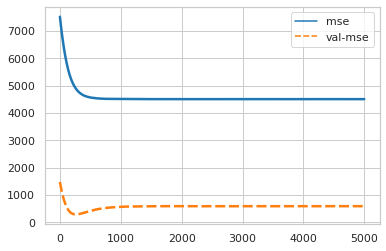

In [8]:
lr.printStats()

In [9]:
lr.predictResult(x_test,y_test)

ytest   predicted
0     13.749   12.007246
1     16.387   23.934637
2      4.646    3.328596
3    903.369  139.240265
4    102.830   98.529221
..       ...         ...
229    9.221   39.878166
230   10.883   12.593811
231   25.687   40.780876
232   26.082   61.040489
233   21.744   50.789864

[234 rows x 2 columns]

In [10]:
lr.model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 1ms/step - loss: 3106.6790 - mse: 3106.6790


[3106.678955078125, 3106.678955078125]

In [11]:
lr.model.evaluate(x_train, y_train)

30/30 [==============================] - 0s 805us/step - loss: 4111.0269 - mse: 4111.0269


[4111.02685546875, 4111.02685546875]

In [21]:
# x_train

In [36]:
class NNModel:

    def __init__(self,learning_rate=0.01,batch_size=16,epochs=100):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.history=[]
        
    def createLRModel(self,input_len):

#         self.model = keras.Sequential([
#             keras.layers.Dense(len(y_train[0]),use_bias=True,input_shape=(len(x_train[0]),))
#         ])

        self.model = keras.Sequential()
#         self.model.add(keras.layers.Dense(len(y_train[0]),use_bias=True,activation='relu',input_shape=(len(x_train[0]),)))
        self.model.add(keras.layers.Dense(64,input_shape=(input_len,), activation='relu'))
        self.model.add(keras.layers.Dense(64,activation='relu'))
        self.model.add(keras.layers.Dense(64,activation='relu'))
        self.model.add(keras.layers.Dense(64,activation='relu'))
        self.model.add(keras.layers.Dense(64,activation='relu'))
        self.model.add(keras.layers.Dense(64,activation='relu'))
        self.model.add(keras.layers.Dense(64,activation='relu'))
        self.model.add(keras.layers.Dense(1, activation='relu'))


        self.optimizer = tf.keras.optimizers.Adam(
            learning_rate=self.learning_rate, beta_1 = 0.9, beta_2=0.99 , epsilon=1e-05,amsgrad=False,name='Adam'
        )
#         self.model.compile(loss='mse',optimizer=self.optimizer,metrics = ['mae','mse'])

        self.model.compile(loss='mse',optimizer=self.optimizer,metrics = ['mse','mae'])

#         self.model.compile(loss='mse',optimizer=self.optimizer,metrics = ['accuracy'])
    
    def train_model(self,x_train,y_train,n_epochs=1000,n_idle_epochs=50):
        self.epochs = n_epochs
        earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=n_idle_epochs, min_delta=0.01)
        
# #         n_epochs = 200
#         self.history.append(self.model.fit(
#           x_train, y_train, batch_size=1,
#           epochs=self.epochs, validation_split = 0.1, verbose=1, callbacks=[earlyStopping]))

        self.history.append(self.model.fit(
          x_train, y_train, batch_size=self.batch_size,
          epochs=self.epochs, validation_split = 0.1, verbose=1, callbacks=[earlyStopping]))
    
    def printStats(self):
        
        # Returning the desired values for plotting and turn to numpy array
        mse = np.asarray(self.history[-1].history['mse'])
        val_mse = np.asarray(self.history[-1].history['val_mse'])

        # Creating the data frame
        num_values = (len(mse))
        values = np.zeros((num_values,2), dtype=float)
        values[:,0] = mse
        values[:,1] = val_mse

        # Using pandas to frame the data
        steps = pd.RangeIndex(start=0,stop=num_values)
        data = pd.DataFrame(values, steps, columns=["mse", "val-mse"])

        # Plotting
        sns.set(style="whitegrid")
        sns.lineplot(data=data, palette="tab10", linewidth=2.5)
        
    def printStats2(self):
        
        # Returning the desired values for plotting and turn to numpy array
        mae = np.asarray(self.history[-1].history['accuracy'])
        val_mae = np.asarray(self.history[-1].history['loss'])

        # Creating the data frame
        num_values = (len(mae))
        values = np.zeros((num_values,2), dtype=float)
        values[:,0] = mae
        values[:,1] = val_mae

        # Using pandas to frame the data
        steps = pd.RangeIndex(start=0,stop=num_values)
        data = pd.DataFrame(values, steps, columns=["mae", "va-mae"])

        # Plotting
        sns.set(style="whitegrid")
        sns.lineplot(data=data, palette="tab10", linewidth=2.5)
        
    def predictResult(self,x_test,y_test):
        pred=[]
        for i in  self.model.predict(x_test):
            for j in i:
                pred.append(j)
        dic={
            'ytest' : [float(x) for x in y_test],
            'predicted' :pred
        }
        return pd.DataFrame(dic)

In [37]:
nn2 = NNModel(0.0001,4,1000)
nn2.createLRModel(len(x_train[0]))

In [38]:
nn2.train_model(x_train,y_train,1000,1000)

Epoch 1/1000
210/210 [==============================] - 1s 3ms/step - loss: 7450.7646 - mse: 7450.7646 - mae: 34.1175 - val_loss: 1360.1543 - val_mse: 1360.1543 - val_mae: 24.6719
Epoch 2/1000
210/210 [==============================] - 1s 3ms/step - loss: 6894.6367 - mse: 6894.6367 - mae: 28.7119 - val_loss: 746.8739 - val_mse: 746.8739 - val_mae: 17.2454
Epoch 3/1000
210/210 [==============================] - 1s 3ms/step - loss: 6095.0332 - mse: 6095.0332 - mae: 25.9104 - val_loss: 572.4501 - val_mse: 572.4501 - val_mae: 15.9771
Epoch 4/1000
210/210 [==============================] - 1s 3ms/step - loss: 5623.2788 - mse: 5623.2788 - mae: 24.6538 - val_loss: 487.3018 - val_mse: 487.3018 - val_mae: 16.5873
Epoch 5/1000
210/210 [==============================] - 1s 3ms/step - loss: 5128.5098 - mse: 5128.5098 - mae: 23.1965 - val_loss: 366.4933 - val_mse: 366.4933 - val_mae: 14.7313
Epoch 6/1000
210/210 [==============================] - 1s 3ms/step - loss: 4669.7930 - mse: 4669.7930 - mae

210/210 [==============================] - 1s 3ms/step - loss: 230.2206 - mse: 230.2206 - mae: 7.0260 - val_loss: 432.0881 - val_mse: 432.0881 - val_mae: 6.6325
Epoch 48/1000
210/210 [==============================] - 1s 3ms/step - loss: 183.8516 - mse: 183.8516 - mae: 6.8708 - val_loss: 142.1384 - val_mse: 142.1384 - val_mae: 5.5254
Epoch 49/1000
210/210 [==============================] - 1s 3ms/step - loss: 173.6226 - mse: 173.6226 - mae: 6.6384 - val_loss: 257.8568 - val_mse: 257.8568 - val_mae: 5.7250
Epoch 50/1000
210/210 [==============================] - 1s 4ms/step - loss: 165.7207 - mse: 165.7207 - mae: 6.4930 - val_loss: 253.4755 - val_mse: 253.4755 - val_mae: 5.6537
Epoch 51/1000
210/210 [==============================] - 1s 4ms/step - loss: 178.8952 - mse: 178.8952 - mae: 6.8312 - val_loss: 82.0684 - val_mse: 82.0684 - val_mae: 4.9382
Epoch 52/1000
210/210 [==============================] - 1s 4ms/step - loss: 134.2249 - mse: 134.2249 - mae: 6.3177 - val_loss: 158.7009 - va

210/210 [==============================] - 1s 3ms/step - loss: 109.4123 - mse: 109.4123 - mae: 4.8852 - val_loss: 137.5436 - val_mse: 137.5436 - val_mae: 4.0984
Epoch 95/1000
210/210 [==============================] - 1s 3ms/step - loss: 89.5136 - mse: 89.5136 - mae: 4.7446 - val_loss: 76.1566 - val_mse: 76.1566 - val_mae: 4.0080
Epoch 96/1000
210/210 [==============================] - 1s 3ms/step - loss: 99.6024 - mse: 99.6024 - mae: 4.7467 - val_loss: 145.8793 - val_mse: 145.8793 - val_mae: 4.0623
Epoch 97/1000
210/210 [==============================] - 1s 4ms/step - loss: 106.4071 - mse: 106.4071 - mae: 4.6896 - val_loss: 64.0886 - val_mse: 64.0886 - val_mae: 3.8661
Epoch 98/1000
210/210 [==============================] - 1s 3ms/step - loss: 88.8940 - mse: 88.8940 - mae: 4.5566 - val_loss: 73.5767 - val_mse: 73.5767 - val_mae: 3.6916
Epoch 99/1000
210/210 [==============================] - 1s 2ms/step - loss: 89.7706 - mse: 89.7706 - mae: 4.5625 - val_loss: 52.5723 - val_mse: 52.572

210/210 [==============================] - 1s 3ms/step - loss: 77.1082 - mse: 77.1082 - mae: 3.9410 - val_loss: 52.6414 - val_mse: 52.6414 - val_mae: 3.5760
Epoch 142/1000
210/210 [==============================] - 1s 4ms/step - loss: 56.3053 - mse: 56.3053 - mae: 3.7067 - val_loss: 183.4766 - val_mse: 183.4766 - val_mae: 4.6164
Epoch 143/1000
210/210 [==============================] - 1s 4ms/step - loss: 79.9552 - mse: 79.9552 - mae: 3.8950 - val_loss: 169.9037 - val_mse: 169.9037 - val_mae: 4.3058
Epoch 144/1000
210/210 [==============================] - 1s 3ms/step - loss: 119.0220 - mse: 119.0220 - mae: 4.1199 - val_loss: 102.1106 - val_mse: 102.1106 - val_mae: 4.0134
Epoch 145/1000
210/210 [==============================] - 1s 3ms/step - loss: 69.8845 - mse: 69.8845 - mae: 3.6518 - val_loss: 31.6737 - val_mse: 31.6737 - val_mae: 3.3302
Epoch 146/1000
210/210 [==============================] - 1s 4ms/step - loss: 64.6151 - mse: 64.6151 - mae: 3.8256 - val_loss: 31.1144 - val_mse: 3

210/210 [==============================] - 1s 3ms/step - loss: 83.2629 - mse: 83.2629 - mae: 3.6052 - val_loss: 53.2513 - val_mse: 53.2513 - val_mae: 3.6069
Epoch 189/1000
210/210 [==============================] - 1s 3ms/step - loss: 52.0679 - mse: 52.0679 - mae: 3.3047 - val_loss: 35.8613 - val_mse: 35.8613 - val_mae: 3.3528
Epoch 190/1000
210/210 [==============================] - 1s 4ms/step - loss: 96.5129 - mse: 96.5129 - mae: 3.7564 - val_loss: 69.7579 - val_mse: 69.7579 - val_mae: 3.8056
Epoch 191/1000
210/210 [==============================] - 1s 4ms/step - loss: 49.0646 - mse: 49.0646 - mae: 3.3904 - val_loss: 26.3876 - val_mse: 26.3876 - val_mae: 3.3829
Epoch 192/1000
210/210 [==============================] - 1s 3ms/step - loss: 82.2345 - mse: 82.2345 - mae: 3.6293 - val_loss: 29.6903 - val_mse: 29.6903 - val_mae: 3.6758
Epoch 193/1000
210/210 [==============================] - 1s 4ms/step - loss: 55.2533 - mse: 55.2533 - mae: 3.2568 - val_loss: 47.0265 - val_mse: 47.0265 -

210/210 [==============================] - 1s 4ms/step - loss: 80.6696 - mse: 80.6696 - mae: 3.4826 - val_loss: 55.6037 - val_mse: 55.6037 - val_mae: 3.6952
Epoch 236/1000
210/210 [==============================] - 1s 3ms/step - loss: 62.8820 - mse: 62.8820 - mae: 3.2931 - val_loss: 86.7293 - val_mse: 86.7293 - val_mae: 4.1302
Epoch 237/1000
210/210 [==============================] - 1s 3ms/step - loss: 54.1443 - mse: 54.1443 - mae: 3.1077 - val_loss: 36.1392 - val_mse: 36.1392 - val_mae: 3.5130
Epoch 238/1000
210/210 [==============================] - 1s 3ms/step - loss: 51.5406 - mse: 51.5406 - mae: 3.2667 - val_loss: 51.4786 - val_mse: 51.4786 - val_mae: 4.0943
Epoch 239/1000
210/210 [==============================] - 1s 3ms/step - loss: 57.6582 - mse: 57.6582 - mae: 3.1086 - val_loss: 27.0979 - val_mse: 27.0979 - val_mae: 3.3528
Epoch 240/1000
210/210 [==============================] - 1s 3ms/step - loss: 51.0945 - mse: 51.0945 - mae: 3.1189 - val_loss: 19.9083 - val_mse: 19.9083 -

Epoch 283/1000
210/210 [==============================] - 1s 3ms/step - loss: 48.2262 - mse: 48.2262 - mae: 3.1735 - val_loss: 68.0749 - val_mse: 68.0749 - val_mae: 3.9725
Epoch 284/1000
210/210 [==============================] - 1s 4ms/step - loss: 45.7165 - mse: 45.7165 - mae: 2.9797 - val_loss: 90.6650 - val_mse: 90.6650 - val_mae: 4.2577
Epoch 285/1000
210/210 [==============================] - 1s 4ms/step - loss: 56.1429 - mse: 56.1429 - mae: 3.0528 - val_loss: 30.0025 - val_mse: 30.0025 - val_mae: 3.2821
Epoch 286/1000
210/210 [==============================] - 1s 4ms/step - loss: 67.8689 - mse: 67.8689 - mae: 3.3906 - val_loss: 40.0672 - val_mse: 40.0672 - val_mae: 3.5272
Epoch 287/1000
210/210 [==============================] - 1s 3ms/step - loss: 45.5538 - mse: 45.5538 - mae: 2.9825 - val_loss: 109.3274 - val_mse: 109.3274 - val_mae: 4.3872
Epoch 288/1000
210/210 [==============================] - 1s 3ms/step - loss: 51.3698 - mse: 51.3698 - mae: 3.0389 - val_loss: 58.1635 - v

210/210 [==============================] - 0s 2ms/step - loss: 51.7368 - mse: 51.7368 - mae: 3.0000 - val_loss: 39.4366 - val_mse: 39.4366 - val_mae: 3.5407
Epoch 331/1000
210/210 [==============================] - 0s 2ms/step - loss: 43.8861 - mse: 43.8861 - mae: 2.7779 - val_loss: 36.7621 - val_mse: 36.7621 - val_mae: 3.5372
Epoch 332/1000
210/210 [==============================] - 0s 2ms/step - loss: 42.6241 - mse: 42.6241 - mae: 2.7169 - val_loss: 53.7583 - val_mse: 53.7583 - val_mae: 3.8626
Epoch 333/1000
210/210 [==============================] - 0s 2ms/step - loss: 46.2511 - mse: 46.2511 - mae: 2.8907 - val_loss: 82.3204 - val_mse: 82.3204 - val_mae: 4.3149
Epoch 334/1000
210/210 [==============================] - 1s 2ms/step - loss: 57.5106 - mse: 57.5106 - mae: 3.0908 - val_loss: 25.8863 - val_mse: 25.8863 - val_mae: 3.2418
Epoch 335/1000
210/210 [==============================] - 1s 2ms/step - loss: 39.8936 - mse: 39.8936 - mae: 2.7251 - val_loss: 37.4625 - val_mse: 37.4625 -

Epoch 378/1000
210/210 [==============================] - 1s 3ms/step - loss: 32.6825 - mse: 32.6825 - mae: 2.4775 - val_loss: 42.8798 - val_mse: 42.8798 - val_mae: 3.5081
Epoch 379/1000
210/210 [==============================] - 1s 3ms/step - loss: 26.3224 - mse: 26.3224 - mae: 2.5115 - val_loss: 57.4876 - val_mse: 57.4876 - val_mae: 3.7484
Epoch 380/1000
210/210 [==============================] - 1s 3ms/step - loss: 44.3485 - mse: 44.3485 - mae: 2.7851 - val_loss: 44.2872 - val_mse: 44.2872 - val_mae: 3.6440
Epoch 381/1000
210/210 [==============================] - 1s 3ms/step - loss: 45.8868 - mse: 45.8868 - mae: 2.8244 - val_loss: 47.6979 - val_mse: 47.6979 - val_mae: 4.1236
Epoch 382/1000
210/210 [==============================] - 1s 3ms/step - loss: 44.1831 - mse: 44.1831 - mae: 2.6374 - val_loss: 64.5785 - val_mse: 64.5785 - val_mae: 3.9256
Epoch 383/1000
210/210 [==============================] - 1s 3ms/step - loss: 27.0480 - mse: 27.0480 - mae: 2.5063 - val_loss: 39.7999 - val

210/210 [==============================] - 0s 2ms/step - loss: 27.2876 - mse: 27.2876 - mae: 2.5525 - val_loss: 32.6966 - val_mse: 32.6966 - val_mae: 3.5145
Epoch 426/1000
210/210 [==============================] - 0s 2ms/step - loss: 43.6150 - mse: 43.6150 - mae: 2.8157 - val_loss: 34.5919 - val_mse: 34.5919 - val_mae: 3.5531
Epoch 427/1000
210/210 [==============================] - 1s 2ms/step - loss: 42.3844 - mse: 42.3844 - mae: 2.5781 - val_loss: 48.9212 - val_mse: 48.9212 - val_mae: 3.6656
Epoch 428/1000
210/210 [==============================] - 1s 3ms/step - loss: 33.3626 - mse: 33.3626 - mae: 2.5052 - val_loss: 43.4724 - val_mse: 43.4724 - val_mae: 3.6803
Epoch 429/1000
210/210 [==============================] - 0s 2ms/step - loss: 39.7447 - mse: 39.7447 - mae: 2.5934 - val_loss: 56.8527 - val_mse: 56.8527 - val_mae: 4.0253
Epoch 430/1000
210/210 [==============================] - 1s 3ms/step - loss: 22.0454 - mse: 22.0454 - mae: 2.3593 - val_loss: 35.2198 - val_mse: 35.2198 -

Epoch 473/1000
210/210 [==============================] - 1s 3ms/step - loss: 21.4129 - mse: 21.4129 - mae: 2.3788 - val_loss: 24.4674 - val_mse: 24.4674 - val_mae: 3.2845
Epoch 474/1000
210/210 [==============================] - 1s 3ms/step - loss: 40.3226 - mse: 40.3226 - mae: 2.5917 - val_loss: 49.5153 - val_mse: 49.5153 - val_mae: 3.8817
Epoch 475/1000
210/210 [==============================] - 1s 3ms/step - loss: 28.1714 - mse: 28.1714 - mae: 2.4859 - val_loss: 58.2464 - val_mse: 58.2464 - val_mae: 4.1274
Epoch 476/1000
210/210 [==============================] - 1s 4ms/step - loss: 45.3633 - mse: 45.3633 - mae: 2.5815 - val_loss: 33.0411 - val_mse: 33.0411 - val_mae: 3.5161
Epoch 477/1000
210/210 [==============================] - 1s 4ms/step - loss: 17.8757 - mse: 17.8757 - mae: 2.1014 - val_loss: 83.8961 - val_mse: 83.8961 - val_mae: 4.0328
Epoch 478/1000
210/210 [==============================] - 1s 4ms/step - loss: 24.9841 - mse: 24.9841 - mae: 2.3095 - val_loss: 102.2860 - va

210/210 [==============================] - 1s 3ms/step - loss: 24.2341 - mse: 24.2341 - mae: 2.3067 - val_loss: 81.6994 - val_mse: 81.6994 - val_mae: 4.2166
Epoch 521/1000
210/210 [==============================] - 1s 3ms/step - loss: 50.6773 - mse: 50.6773 - mae: 2.5766 - val_loss: 61.3323 - val_mse: 61.3323 - val_mae: 3.9348
Epoch 522/1000
210/210 [==============================] - 1s 3ms/step - loss: 23.4476 - mse: 23.4476 - mae: 2.1383 - val_loss: 91.7908 - val_mse: 91.7908 - val_mae: 4.3936
Epoch 523/1000
210/210 [==============================] - 1s 3ms/step - loss: 17.4056 - mse: 17.4056 - mae: 2.1065 - val_loss: 42.0411 - val_mse: 42.0411 - val_mae: 3.7334
Epoch 524/1000
210/210 [==============================] - 1s 3ms/step - loss: 25.6838 - mse: 25.6838 - mae: 2.0774 - val_loss: 68.0648 - val_mse: 68.0648 - val_mae: 4.1657
Epoch 525/1000
210/210 [==============================] - 1s 3ms/step - loss: 21.1236 - mse: 21.1236 - mae: 2.1938 - val_loss: 126.9411 - val_mse: 126.9411

Epoch 568/1000
210/210 [==============================] - 1s 3ms/step - loss: 18.4556 - mse: 18.4556 - mae: 2.0474 - val_loss: 103.8598 - val_mse: 103.8598 - val_mae: 4.1951
Epoch 569/1000
210/210 [==============================] - 1s 3ms/step - loss: 29.2497 - mse: 29.2497 - mae: 2.2110 - val_loss: 56.4119 - val_mse: 56.4119 - val_mae: 3.6643
Epoch 570/1000
210/210 [==============================] - 1s 3ms/step - loss: 17.1110 - mse: 17.1110 - mae: 1.9934 - val_loss: 36.9168 - val_mse: 36.9168 - val_mae: 3.4220
Epoch 571/1000
210/210 [==============================] - 1s 3ms/step - loss: 14.5802 - mse: 14.5802 - mae: 1.9696 - val_loss: 34.1879 - val_mse: 34.1879 - val_mae: 3.5243
Epoch 572/1000
210/210 [==============================] - 1s 3ms/step - loss: 53.5006 - mse: 53.5006 - mae: 2.4157 - val_loss: 32.1512 - val_mse: 32.1512 - val_mae: 3.3637
Epoch 573/1000
210/210 [==============================] - 1s 3ms/step - loss: 12.7077 - mse: 12.7077 - mae: 1.8794 - val_loss: 42.4113 - v

210/210 [==============================] - 1s 4ms/step - loss: 62.6109 - mse: 62.6109 - mae: 2.2568 - val_loss: 80.4377 - val_mse: 80.4377 - val_mae: 4.0660
Epoch 616/1000
210/210 [==============================] - 1s 3ms/step - loss: 11.2228 - mse: 11.2228 - mae: 1.7365 - val_loss: 96.6587 - val_mse: 96.6587 - val_mae: 4.3418
Epoch 617/1000
210/210 [==============================] - 1s 3ms/step - loss: 11.5553 - mse: 11.5553 - mae: 1.7110 - val_loss: 38.3443 - val_mse: 38.3443 - val_mae: 3.4368
Epoch 618/1000
210/210 [==============================] - 1s 3ms/step - loss: 22.3618 - mse: 22.3618 - mae: 2.0206 - val_loss: 127.8729 - val_mse: 127.8729 - val_mae: 4.5279
Epoch 619/1000
210/210 [==============================] - 1s 3ms/step - loss: 44.9480 - mse: 44.9480 - mae: 2.1875 - val_loss: 65.3324 - val_mse: 65.3324 - val_mae: 3.9035
Epoch 620/1000
210/210 [==============================] - 1s 3ms/step - loss: 9.9708 - mse: 9.9708 - mae: 1.5755 - val_loss: 73.7998 - val_mse: 73.7998 -

Epoch 663/1000
210/210 [==============================] - 0s 2ms/step - loss: 26.7942 - mse: 26.7942 - mae: 1.8431 - val_loss: 62.2985 - val_mse: 62.2985 - val_mae: 3.9419
Epoch 664/1000
210/210 [==============================] - 1s 3ms/step - loss: 13.3252 - mse: 13.3252 - mae: 1.6338 - val_loss: 42.2141 - val_mse: 42.2141 - val_mae: 3.5281
Epoch 665/1000
210/210 [==============================] - 1s 2ms/step - loss: 13.2262 - mse: 13.2262 - mae: 1.7049 - val_loss: 66.2208 - val_mse: 66.2208 - val_mae: 3.7069
Epoch 666/1000
210/210 [==============================] - 1s 3ms/step - loss: 19.8376 - mse: 19.8376 - mae: 1.8614 - val_loss: 75.6616 - val_mse: 75.6616 - val_mae: 3.9270
Epoch 667/1000
210/210 [==============================] - 1s 3ms/step - loss: 29.3445 - mse: 29.3445 - mae: 1.9043 - val_loss: 65.3996 - val_mse: 65.3996 - val_mae: 3.8307
Epoch 668/1000
210/210 [==============================] - 1s 3ms/step - loss: 10.2210 - mse: 10.2210 - mae: 1.5000 - val_loss: 48.7951 - val

Epoch 711/1000
210/210 [==============================] - 1s 3ms/step - loss: 9.9306 - mse: 9.9306 - mae: 1.5566 - val_loss: 80.9607 - val_mse: 80.9607 - val_mae: 3.8488
Epoch 712/1000
210/210 [==============================] - 1s 3ms/step - loss: 21.7194 - mse: 21.7194 - mae: 1.6840 - val_loss: 61.0550 - val_mse: 61.0550 - val_mae: 3.7160
Epoch 713/1000
210/210 [==============================] - 1s 3ms/step - loss: 18.6187 - mse: 18.6187 - mae: 1.6379 - val_loss: 114.1944 - val_mse: 114.1944 - val_mae: 4.3016
Epoch 714/1000
210/210 [==============================] - 1s 3ms/step - loss: 29.7860 - mse: 29.7860 - mae: 1.6520 - val_loss: 71.1160 - val_mse: 71.1160 - val_mae: 3.9813
Epoch 715/1000
210/210 [==============================] - 1s 3ms/step - loss: 12.7720 - mse: 12.7720 - mae: 1.4271 - val_loss: 74.3129 - val_mse: 74.3129 - val_mae: 3.7816
Epoch 716/1000
210/210 [==============================] - 1s 3ms/step - loss: 12.9483 - mse: 12.9483 - mae: 1.4520 - val_loss: 45.8397 - val

Epoch 759/1000
210/210 [==============================] - 1s 3ms/step - loss: 20.9850 - mse: 20.9850 - mae: 1.6163 - val_loss: 62.5838 - val_mse: 62.5838 - val_mae: 3.8420
Epoch 760/1000
210/210 [==============================] - 0s 2ms/step - loss: 14.3627 - mse: 14.3627 - mae: 1.5396 - val_loss: 63.3905 - val_mse: 63.3905 - val_mae: 3.7391
Epoch 761/1000
210/210 [==============================] - 0s 2ms/step - loss: 24.8837 - mse: 24.8837 - mae: 1.7632 - val_loss: 92.8496 - val_mse: 92.8496 - val_mae: 3.9657
Epoch 762/1000
210/210 [==============================] - 0s 2ms/step - loss: 9.8325 - mse: 9.8325 - mae: 1.3355 - val_loss: 77.7566 - val_mse: 77.7566 - val_mae: 4.0921
Epoch 763/1000
210/210 [==============================] - 0s 2ms/step - loss: 17.3669 - mse: 17.3669 - mae: 1.5473 - val_loss: 126.9097 - val_mse: 126.9097 - val_mae: 4.6014
Epoch 764/1000
210/210 [==============================] - 1s 2ms/step - loss: 13.1689 - mse: 13.1689 - mae: 1.4488 - val_loss: 104.1042 - va

210/210 [==============================] - 1s 3ms/step - loss: 12.0081 - mse: 12.0081 - mae: 1.2922 - val_loss: 65.5418 - val_mse: 65.5418 - val_mae: 3.8064
Epoch 807/1000
210/210 [==============================] - 1s 3ms/step - loss: 12.2514 - mse: 12.2514 - mae: 1.2751 - val_loss: 83.9353 - val_mse: 83.9353 - val_mae: 3.7448
Epoch 808/1000
210/210 [==============================] - 1s 4ms/step - loss: 24.2543 - mse: 24.2543 - mae: 1.6312 - val_loss: 85.0576 - val_mse: 85.0576 - val_mae: 3.6205
Epoch 809/1000
210/210 [==============================] - 1s 4ms/step - loss: 21.0086 - mse: 21.0086 - mae: 1.3955 - val_loss: 52.2060 - val_mse: 52.2060 - val_mae: 3.5476
Epoch 810/1000
210/210 [==============================] - 1s 4ms/step - loss: 4.7106 - mse: 4.7106 - mae: 1.1875 - val_loss: 80.2310 - val_mse: 80.2310 - val_mae: 4.1771
Epoch 811/1000
210/210 [==============================] - 1s 4ms/step - loss: 12.0043 - mse: 12.0043 - mae: 1.4956 - val_loss: 64.5858 - val_mse: 64.5858 - v

Epoch 854/1000
210/210 [==============================] - 0s 2ms/step - loss: 11.6598 - mse: 11.6598 - mae: 1.3963 - val_loss: 47.2169 - val_mse: 47.2169 - val_mae: 3.4526
Epoch 855/1000
210/210 [==============================] - 0s 2ms/step - loss: 10.3764 - mse: 10.3764 - mae: 1.2927 - val_loss: 40.8953 - val_mse: 40.8953 - val_mae: 3.3907
Epoch 856/1000
210/210 [==============================] - 0s 2ms/step - loss: 14.1500 - mse: 14.1500 - mae: 1.3993 - val_loss: 61.4972 - val_mse: 61.4972 - val_mae: 3.6281
Epoch 857/1000
210/210 [==============================] - 1s 3ms/step - loss: 20.0596 - mse: 20.0596 - mae: 1.4926 - val_loss: 75.6803 - val_mse: 75.6803 - val_mae: 3.7030
Epoch 858/1000
210/210 [==============================] - 0s 2ms/step - loss: 11.0062 - mse: 11.0062 - mae: 1.3595 - val_loss: 139.2751 - val_mse: 139.2751 - val_mae: 4.4769
Epoch 859/1000
210/210 [==============================] - 0s 2ms/step - loss: 16.5393 - mse: 16.5393 - mae: 1.3769 - val_loss: 41.8484 - v

Epoch 902/1000
210/210 [==============================] - 1s 4ms/step - loss: 15.5646 - mse: 15.5646 - mae: 1.3982 - val_loss: 87.2208 - val_mse: 87.2208 - val_mae: 3.9038
Epoch 903/1000
210/210 [==============================] - 1s 3ms/step - loss: 14.0203 - mse: 14.0203 - mae: 1.4861 - val_loss: 82.5254 - val_mse: 82.5254 - val_mae: 3.8252
Epoch 904/1000
210/210 [==============================] - 1s 4ms/step - loss: 10.6398 - mse: 10.6398 - mae: 1.2179 - val_loss: 72.6034 - val_mse: 72.6034 - val_mae: 3.6027
Epoch 905/1000
210/210 [==============================] - 1s 3ms/step - loss: 7.0768 - mse: 7.0768 - mae: 1.1807 - val_loss: 77.2093 - val_mse: 77.2093 - val_mae: 3.7306
Epoch 906/1000
210/210 [==============================] - 1s 4ms/step - loss: 25.1754 - mse: 25.1754 - mae: 1.5028 - val_loss: 61.3502 - val_mse: 61.3502 - val_mae: 3.7307
Epoch 907/1000
210/210 [==============================] - 1s 3ms/step - loss: 15.3733 - mse: 15.3733 - mae: 1.3089 - val_loss: 73.7692 - val_m

Epoch 950/1000
210/210 [==============================] - 1s 3ms/step - loss: 6.1968 - mse: 6.1968 - mae: 1.2177 - val_loss: 76.0449 - val_mse: 76.0449 - val_mae: 3.9115
Epoch 951/1000
210/210 [==============================] - 1s 3ms/step - loss: 22.1665 - mse: 22.1665 - mae: 1.4055 - val_loss: 83.0584 - val_mse: 83.0584 - val_mae: 3.7892
Epoch 952/1000
210/210 [==============================] - 1s 3ms/step - loss: 8.3845 - mse: 8.3845 - mae: 1.1337 - val_loss: 88.1708 - val_mse: 88.1708 - val_mae: 4.1868
Epoch 953/1000
210/210 [==============================] - 0s 2ms/step - loss: 13.8997 - mse: 13.8997 - mae: 1.3231 - val_loss: 76.0820 - val_mse: 76.0820 - val_mae: 3.8462
Epoch 954/1000
210/210 [==============================] - 1s 3ms/step - loss: 9.3067 - mse: 9.3067 - mae: 1.1847 - val_loss: 106.3752 - val_mse: 106.3752 - val_mae: 4.0424
Epoch 955/1000
210/210 [==============================] - 0s 2ms/step - loss: 10.4546 - mse: 10.4546 - mae: 1.1720 - val_loss: 57.3273 - val_mse

Epoch 998/1000
210/210 [==============================] - 1s 3ms/step - loss: 8.8831 - mse: 8.8831 - mae: 1.0766 - val_loss: 139.4413 - val_mse: 139.4413 - val_mae: 4.5080
Epoch 999/1000
210/210 [==============================] - 1s 3ms/step - loss: 29.0153 - mse: 29.0153 - mae: 1.7180 - val_loss: 64.2406 - val_mse: 64.2406 - val_mae: 3.6631
Epoch 1000/1000
210/210 [==============================] - 1s 3ms/step - loss: 9.8137 - mse: 9.8137 - mae: 1.1439 - val_loss: 108.3887 - val_mse: 108.3887 - val_mae: 4.2292


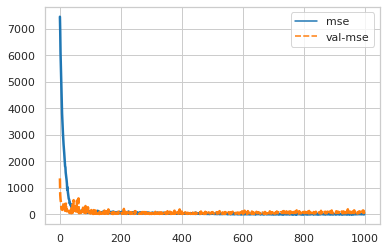

In [39]:
nn2.printStats()

In [40]:
nn2.predictResult(x_test,y_test)

ytest   predicted
0     13.749   12.099688
1     16.387   18.176455
2      4.646    4.910118
3    903.369  160.268524
4    102.830  102.405060
..       ...         ...
229    9.221   11.751112
230   10.883   10.149604
231   25.687   31.181522
232   26.082   25.892328
233   21.744   19.641628

[234 rows x 2 columns]

In [41]:
nn2.model.evaluate(x_train, y_train)

30/30 [==============================] - 0s 2ms/step - loss: 16.2786 - mse: 16.2786 - mae: 1.3821


[16.278606414794922, 16.278606414794922, 1.3820661306381226]

In [42]:
nn2.model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 2480.7822 - mse: 2480.7822 - mae: 7.4132


[2480.7822265625, 2480.7822265625, 7.413168907165527]

In [43]:
nn2.train_model(x_train,y_train,4000,4000)

Epoch 1/4000
210/210 [==============================] - 1s 3ms/step - loss: 11.7574 - mse: 11.7574 - mae: 1.2819 - val_loss: 38.0460 - val_mse: 38.0460 - val_mae: 3.1083
Epoch 2/4000
210/210 [==============================] - 1s 4ms/step - loss: 11.7432 - mse: 11.7432 - mae: 1.1361 - val_loss: 44.8302 - val_mse: 44.8302 - val_mae: 3.3599
Epoch 3/4000
210/210 [==============================] - 1s 3ms/step - loss: 18.7184 - mse: 18.7184 - mae: 1.3730 - val_loss: 55.5506 - val_mse: 55.5506 - val_mae: 3.4679
Epoch 4/4000
210/210 [==============================] - 1s 3ms/step - loss: 9.7381 - mse: 9.7381 - mae: 1.1721 - val_loss: 96.4531 - val_mse: 96.4531 - val_mae: 4.0380
Epoch 5/4000
210/210 [==============================] - 1s 3ms/step - loss: 14.2150 - mse: 14.2150 - mae: 1.2538 - val_loss: 71.9834 - val_mse: 71.9834 - val_mae: 3.8032
Epoch 6/4000
210/210 [==============================] - 1s 3ms/step - loss: 16.6545 - mse: 16.6545 - mae: 1.3619 - val_loss: 125.1403 - val_mse: 125.140

210/210 [==============================] - 0s 2ms/step - loss: 16.9026 - mse: 16.9026 - mae: 1.1271 - val_loss: 79.1910 - val_mse: 79.1910 - val_mae: 3.7231
Epoch 50/4000
210/210 [==============================] - 0s 2ms/step - loss: 10.7752 - mse: 10.7752 - mae: 1.1927 - val_loss: 58.0452 - val_mse: 58.0452 - val_mae: 3.3942
Epoch 51/4000
210/210 [==============================] - 0s 2ms/step - loss: 22.2179 - mse: 22.2179 - mae: 1.3259 - val_loss: 73.3362 - val_mse: 73.3362 - val_mae: 3.4996
Epoch 52/4000
210/210 [==============================] - 0s 2ms/step - loss: 5.5397 - mse: 5.5397 - mae: 1.0077 - val_loss: 81.2365 - val_mse: 81.2365 - val_mae: 3.7525
Epoch 53/4000
210/210 [==============================] - 0s 2ms/step - loss: 8.3013 - mse: 8.3013 - mae: 1.1056 - val_loss: 61.3255 - val_mse: 61.3255 - val_mae: 3.7552
Epoch 54/4000
210/210 [==============================] - 0s 2ms/step - loss: 8.5642 - mse: 8.5642 - mae: 1.1730 - val_loss: 89.5614 - val_mse: 89.5614 - val_mae: 3

210/210 [==============================] - 1s 4ms/step - loss: 16.1977 - mse: 16.1977 - mae: 1.4382 - val_loss: 91.4983 - val_mse: 91.4983 - val_mae: 3.9490
Epoch 98/4000
210/210 [==============================] - 1s 3ms/step - loss: 11.1937 - mse: 11.1937 - mae: 1.1108 - val_loss: 51.8887 - val_mse: 51.8887 - val_mae: 3.3905
Epoch 99/4000
210/210 [==============================] - 1s 3ms/step - loss: 8.9026 - mse: 8.9026 - mae: 1.0946 - val_loss: 122.1209 - val_mse: 122.1209 - val_mae: 4.1974
Epoch 100/4000
210/210 [==============================] - 1s 4ms/step - loss: 15.8700 - mse: 15.8700 - mae: 1.1411 - val_loss: 92.9638 - val_mse: 92.9638 - val_mae: 3.7555
Epoch 101/4000
210/210 [==============================] - 1s 3ms/step - loss: 18.1477 - mse: 18.1477 - mae: 1.3276 - val_loss: 43.3902 - val_mse: 43.3902 - val_mae: 3.1606
Epoch 102/4000
210/210 [==============================] - 1s 4ms/step - loss: 13.8094 - mse: 13.8094 - mae: 1.1580 - val_loss: 132.0790 - val_mse: 132.0790 -

Epoch 145/4000
210/210 [==============================] - 1s 4ms/step - loss: 14.1131 - mse: 14.1131 - mae: 1.3004 - val_loss: 63.1887 - val_mse: 63.1887 - val_mae: 3.6125
Epoch 146/4000
210/210 [==============================] - 1s 4ms/step - loss: 10.3488 - mse: 10.3488 - mae: 1.1642 - val_loss: 78.4633 - val_mse: 78.4633 - val_mae: 4.0742
Epoch 147/4000
210/210 [==============================] - 1s 3ms/step - loss: 7.1092 - mse: 7.1092 - mae: 1.0781 - val_loss: 125.1569 - val_mse: 125.1569 - val_mae: 4.3416
Epoch 148/4000
210/210 [==============================] - 1s 4ms/step - loss: 13.3551 - mse: 13.3551 - mae: 1.1339 - val_loss: 126.1772 - val_mse: 126.1772 - val_mae: 4.1812
Epoch 149/4000
210/210 [==============================] - 1s 4ms/step - loss: 9.6154 - mse: 9.6154 - mae: 1.0047 - val_loss: 79.4652 - val_mse: 79.4652 - val_mae: 3.6017
Epoch 150/4000
210/210 [==============================] - 1s 4ms/step - loss: 14.6808 - mse: 14.6808 - mae: 1.2039 - val_loss: 74.1304 - val

Epoch 193/4000
210/210 [==============================] - 1s 3ms/step - loss: 5.1566 - mse: 5.1566 - mae: 0.9430 - val_loss: 50.6892 - val_mse: 50.6892 - val_mae: 3.2490
Epoch 194/4000
210/210 [==============================] - 1s 3ms/step - loss: 12.6334 - mse: 12.6334 - mae: 1.2478 - val_loss: 65.1344 - val_mse: 65.1344 - val_mae: 3.5725
Epoch 195/4000
210/210 [==============================] - 1s 3ms/step - loss: 26.4216 - mse: 26.4216 - mae: 1.4701 - val_loss: 75.0719 - val_mse: 75.0719 - val_mae: 3.6274
Epoch 196/4000
210/210 [==============================] - 1s 4ms/step - loss: 4.8759 - mse: 4.8759 - mae: 0.8871 - val_loss: 101.6716 - val_mse: 101.6716 - val_mae: 3.8605
Epoch 197/4000
210/210 [==============================] - 1s 3ms/step - loss: 11.9464 - mse: 11.9464 - mae: 1.1137 - val_loss: 82.5439 - val_mse: 82.5439 - val_mae: 3.6758
Epoch 198/4000
210/210 [==============================] - 1s 3ms/step - loss: 16.0397 - mse: 16.0397 - mae: 1.2143 - val_loss: 85.6341 - val_m

Epoch 241/4000
210/210 [==============================] - 0s 2ms/step - loss: 18.6987 - mse: 18.6987 - mae: 1.2645 - val_loss: 71.8611 - val_mse: 71.8611 - val_mae: 3.6162
Epoch 242/4000
210/210 [==============================] - 1s 3ms/step - loss: 8.7437 - mse: 8.7437 - mae: 0.9090 - val_loss: 80.9196 - val_mse: 80.9196 - val_mae: 3.6590
Epoch 243/4000
210/210 [==============================] - 1s 4ms/step - loss: 5.5242 - mse: 5.5242 - mae: 0.9664 - val_loss: 71.4036 - val_mse: 71.4036 - val_mae: 3.6684
Epoch 244/4000
210/210 [==============================] - 1s 3ms/step - loss: 7.2880 - mse: 7.2880 - mae: 1.1809 - val_loss: 93.3435 - val_mse: 93.3435 - val_mae: 4.1052
Epoch 245/4000
210/210 [==============================] - 1s 3ms/step - loss: 16.4010 - mse: 16.4010 - mae: 1.2868 - val_loss: 73.3853 - val_mse: 73.3853 - val_mae: 3.5176
Epoch 246/4000
210/210 [==============================] - 1s 3ms/step - loss: 12.6664 - mse: 12.6664 - mae: 1.0312 - val_loss: 59.3541 - val_mse: 

Epoch 289/4000
210/210 [==============================] - 1s 3ms/step - loss: 12.6165 - mse: 12.6165 - mae: 1.2714 - val_loss: 72.1146 - val_mse: 72.1146 - val_mae: 3.5790
Epoch 290/4000
210/210 [==============================] - 1s 2ms/step - loss: 18.7539 - mse: 18.7539 - mae: 1.2167 - val_loss: 97.1424 - val_mse: 97.1424 - val_mae: 3.6639
Epoch 291/4000
210/210 [==============================] - 1s 3ms/step - loss: 6.6027 - mse: 6.6027 - mae: 0.9171 - val_loss: 54.3664 - val_mse: 54.3664 - val_mae: 3.5316
Epoch 292/4000
210/210 [==============================] - 1s 3ms/step - loss: 7.6046 - mse: 7.6046 - mae: 1.0639 - val_loss: 81.5198 - val_mse: 81.5198 - val_mae: 3.7177
Epoch 293/4000
210/210 [==============================] - 0s 2ms/step - loss: 13.8740 - mse: 13.8740 - mae: 1.2265 - val_loss: 73.1530 - val_mse: 73.1530 - val_mae: 3.5156
Epoch 294/4000
210/210 [==============================] - 1s 3ms/step - loss: 10.8179 - mse: 10.8179 - mae: 0.9601 - val_loss: 71.9952 - val_mse

Epoch 337/4000
210/210 [==============================] - 0s 2ms/step - loss: 13.6844 - mse: 13.6844 - mae: 1.0507 - val_loss: 108.8172 - val_mse: 108.8172 - val_mae: 3.7676
Epoch 338/4000
210/210 [==============================] - 1s 3ms/step - loss: 5.0774 - mse: 5.0774 - mae: 0.9305 - val_loss: 132.4172 - val_mse: 132.4172 - val_mae: 4.1207
Epoch 339/4000
210/210 [==============================] - 0s 2ms/step - loss: 5.4052 - mse: 5.4052 - mae: 0.9550 - val_loss: 85.5039 - val_mse: 85.5039 - val_mae: 3.8904
Epoch 340/4000
210/210 [==============================] - 1s 3ms/step - loss: 13.9654 - mse: 13.9654 - mae: 1.1752 - val_loss: 104.0694 - val_mse: 104.0694 - val_mae: 3.7623
Epoch 341/4000
210/210 [==============================] - 1s 3ms/step - loss: 19.3387 - mse: 19.3387 - mae: 1.0170 - val_loss: 94.8730 - val_mse: 94.8730 - val_mae: 3.7357
Epoch 342/4000
210/210 [==============================] - 1s 2ms/step - loss: 4.6423 - mse: 4.6423 - mae: 0.8301 - val_loss: 89.9185 - val

Epoch 385/4000
210/210 [==============================] - 1s 3ms/step - loss: 5.6419 - mse: 5.6419 - mae: 0.8941 - val_loss: 94.7351 - val_mse: 94.7351 - val_mae: 3.6457
Epoch 386/4000
210/210 [==============================] - 1s 3ms/step - loss: 11.4907 - mse: 11.4907 - mae: 1.1205 - val_loss: 141.9433 - val_mse: 141.9433 - val_mae: 3.9070
Epoch 387/4000
210/210 [==============================] - 1s 3ms/step - loss: 7.5377 - mse: 7.5377 - mae: 1.0456 - val_loss: 164.0946 - val_mse: 164.0946 - val_mae: 4.4637
Epoch 388/4000
210/210 [==============================] - 1s 3ms/step - loss: 13.8978 - mse: 13.8978 - mae: 1.2436 - val_loss: 127.4404 - val_mse: 127.4404 - val_mae: 3.9955
Epoch 389/4000
210/210 [==============================] - 1s 3ms/step - loss: 12.8685 - mse: 12.8685 - mae: 1.0297 - val_loss: 78.2595 - val_mse: 78.2595 - val_mae: 3.4630
Epoch 390/4000
210/210 [==============================] - 1s 3ms/step - loss: 4.4807 - mse: 4.4807 - mae: 0.8117 - val_loss: 67.9726 - val

Epoch 433/4000
210/210 [==============================] - 1s 2ms/step - loss: 7.5771 - mse: 7.5771 - mae: 0.9656 - val_loss: 86.1874 - val_mse: 86.1874 - val_mae: 3.7743
Epoch 434/4000
210/210 [==============================] - 1s 2ms/step - loss: 7.4615 - mse: 7.4615 - mae: 0.8356 - val_loss: 90.3150 - val_mse: 90.3150 - val_mae: 3.6396
Epoch 435/4000
210/210 [==============================] - 1s 3ms/step - loss: 4.9162 - mse: 4.9162 - mae: 0.9290 - val_loss: 112.5824 - val_mse: 112.5824 - val_mae: 3.9190
Epoch 436/4000
210/210 [==============================] - 1s 3ms/step - loss: 15.0692 - mse: 15.0692 - mae: 1.1494 - val_loss: 44.6610 - val_mse: 44.6610 - val_mae: 3.1195
Epoch 437/4000
210/210 [==============================] - 1s 3ms/step - loss: 16.0073 - mse: 16.0073 - mae: 1.1209 - val_loss: 101.1538 - val_mse: 101.1538 - val_mae: 3.8531
Epoch 438/4000
210/210 [==============================] - 1s 3ms/step - loss: 9.2455 - mse: 9.2455 - mae: 0.9410 - val_loss: 89.4300 - val_mse

Epoch 481/4000
210/210 [==============================] - 1s 3ms/step - loss: 6.6816 - mse: 6.6816 - mae: 0.9602 - val_loss: 93.2102 - val_mse: 93.2102 - val_mae: 3.7482
Epoch 482/4000
210/210 [==============================] - 0s 2ms/step - loss: 13.7693 - mse: 13.7693 - mae: 1.1323 - val_loss: 99.6534 - val_mse: 99.6534 - val_mae: 3.7661
Epoch 483/4000
210/210 [==============================] - 0s 2ms/step - loss: 9.6535 - mse: 9.6535 - mae: 1.0039 - val_loss: 77.6110 - val_mse: 77.6110 - val_mae: 3.3927
Epoch 484/4000
210/210 [==============================] - 1s 3ms/step - loss: 12.6136 - mse: 12.6136 - mae: 0.9997 - val_loss: 91.3390 - val_mse: 91.3390 - val_mae: 3.6287
Epoch 485/4000
210/210 [==============================] - 1s 3ms/step - loss: 8.2834 - mse: 8.2834 - mae: 1.0552 - val_loss: 138.8157 - val_mse: 138.8157 - val_mae: 4.0402
Epoch 486/4000
210/210 [==============================] - 1s 2ms/step - loss: 8.9215 - mse: 8.9215 - mae: 1.0290 - val_loss: 56.0944 - val_mse: 

Epoch 529/4000
210/210 [==============================] - 1s 3ms/step - loss: 3.4938 - mse: 3.4938 - mae: 0.7720 - val_loss: 123.5916 - val_mse: 123.5916 - val_mae: 4.0476
Epoch 530/4000
210/210 [==============================] - 0s 2ms/step - loss: 10.7889 - mse: 10.7889 - mae: 1.1198 - val_loss: 187.8085 - val_mse: 187.8085 - val_mae: 4.4670
Epoch 531/4000
210/210 [==============================] - 1s 3ms/step - loss: 11.8959 - mse: 11.8959 - mae: 1.0837 - val_loss: 81.9732 - val_mse: 81.9732 - val_mae: 3.6202
Epoch 532/4000
210/210 [==============================] - 1s 3ms/step - loss: 12.2443 - mse: 12.2443 - mae: 1.0538 - val_loss: 90.2567 - val_mse: 90.2567 - val_mae: 3.7633
Epoch 533/4000
210/210 [==============================] - 1s 2ms/step - loss: 10.7008 - mse: 10.7008 - mae: 1.0080 - val_loss: 77.9304 - val_mse: 77.9304 - val_mae: 3.5021
Epoch 534/4000
210/210 [==============================] - 1s 2ms/step - loss: 6.2807 - mse: 6.2807 - mae: 0.8319 - val_loss: 76.9097 - val

Epoch 577/4000
210/210 [==============================] - 1s 3ms/step - loss: 13.1135 - mse: 13.1135 - mae: 1.0301 - val_loss: 134.5792 - val_mse: 134.5792 - val_mae: 4.0903
Epoch 578/4000
210/210 [==============================] - 1s 4ms/step - loss: 5.0699 - mse: 5.0699 - mae: 0.9038 - val_loss: 88.5041 - val_mse: 88.5041 - val_mae: 3.5087
Epoch 579/4000
210/210 [==============================] - 1s 3ms/step - loss: 8.2689 - mse: 8.2689 - mae: 0.9348 - val_loss: 125.5705 - val_mse: 125.5705 - val_mae: 3.9290
Epoch 580/4000
210/210 [==============================] - 1s 3ms/step - loss: 12.8678 - mse: 12.8678 - mae: 0.9817 - val_loss: 91.8095 - val_mse: 91.8095 - val_mae: 3.5181
Epoch 581/4000
210/210 [==============================] - 1s 4ms/step - loss: 5.6672 - mse: 5.6672 - mae: 0.9127 - val_loss: 140.9114 - val_mse: 140.9114 - val_mae: 3.9984
Epoch 582/4000
210/210 [==============================] - 1s 3ms/step - loss: 10.2788 - mse: 10.2788 - mae: 1.0186 - val_loss: 89.2585 - val

Epoch 625/4000
210/210 [==============================] - 0s 2ms/step - loss: 9.0397 - mse: 9.0397 - mae: 0.9486 - val_loss: 79.2095 - val_mse: 79.2095 - val_mae: 3.5148
Epoch 626/4000
210/210 [==============================] - 1s 2ms/step - loss: 7.0766 - mse: 7.0766 - mae: 0.8022 - val_loss: 86.2047 - val_mse: 86.2047 - val_mae: 3.5391
Epoch 627/4000
210/210 [==============================] - 1s 2ms/step - loss: 7.1772 - mse: 7.1772 - mae: 0.9612 - val_loss: 109.0432 - val_mse: 109.0432 - val_mae: 3.9633
Epoch 628/4000
210/210 [==============================] - 0s 2ms/step - loss: 10.4162 - mse: 10.4162 - mae: 1.0612 - val_loss: 144.7387 - val_mse: 144.7387 - val_mae: 4.0875
Epoch 629/4000
210/210 [==============================] - 1s 2ms/step - loss: 9.5182 - mse: 9.5182 - mae: 0.9288 - val_loss: 144.9306 - val_mse: 144.9306 - val_mae: 4.1061
Epoch 630/4000
210/210 [==============================] - 0s 2ms/step - loss: 4.6152 - mse: 4.6152 - mae: 0.8455 - val_loss: 84.5328 - val_mse

Epoch 673/4000
210/210 [==============================] - 1s 4ms/step - loss: 7.1381 - mse: 7.1381 - mae: 0.9103 - val_loss: 149.5050 - val_mse: 149.5050 - val_mae: 4.1400
Epoch 674/4000
210/210 [==============================] - 1s 4ms/step - loss: 6.1323 - mse: 6.1323 - mae: 0.8705 - val_loss: 101.0376 - val_mse: 101.0376 - val_mae: 3.5744
Epoch 675/4000
210/210 [==============================] - 1s 3ms/step - loss: 9.2858 - mse: 9.2858 - mae: 0.9302 - val_loss: 98.6583 - val_mse: 98.6583 - val_mae: 3.7538
Epoch 676/4000
210/210 [==============================] - 1s 3ms/step - loss: 7.7207 - mse: 7.7207 - mae: 0.8284 - val_loss: 107.7956 - val_mse: 107.7956 - val_mae: 3.8522
Epoch 677/4000
210/210 [==============================] - 1s 3ms/step - loss: 6.1794 - mse: 6.1794 - mae: 0.9776 - val_loss: 92.0363 - val_mse: 92.0363 - val_mae: 3.7425
Epoch 678/4000
210/210 [==============================] - 1s 3ms/step - loss: 13.8763 - mse: 13.8763 - mae: 1.2531 - val_loss: 115.8136 - val_ms

Epoch 721/4000
210/210 [==============================] - 1s 3ms/step - loss: 4.3677 - mse: 4.3677 - mae: 0.6792 - val_loss: 89.4258 - val_mse: 89.4258 - val_mae: 3.6073
Epoch 722/4000
210/210 [==============================] - 1s 5ms/step - loss: 12.7923 - mse: 12.7923 - mae: 1.0533 - val_loss: 103.5711 - val_mse: 103.5711 - val_mae: 3.8030
Epoch 723/4000
210/210 [==============================] - 1s 3ms/step - loss: 3.5273 - mse: 3.5273 - mae: 0.8661 - val_loss: 38.1444 - val_mse: 38.1444 - val_mae: 2.9607
Epoch 724/4000
210/210 [==============================] - 1s 4ms/step - loss: 12.1680 - mse: 12.1680 - mae: 0.9771 - val_loss: 102.6695 - val_mse: 102.6695 - val_mae: 3.8511
Epoch 725/4000
210/210 [==============================] - 1s 4ms/step - loss: 11.5157 - mse: 11.5157 - mae: 1.0366 - val_loss: 87.9520 - val_mse: 87.9520 - val_mae: 3.6469
Epoch 726/4000
210/210 [==============================] - 1s 5ms/step - loss: 4.4424 - mse: 4.4424 - mae: 0.8325 - val_loss: 77.2444 - val_m

Epoch 769/4000
210/210 [==============================] - 1s 4ms/step - loss: 10.7341 - mse: 10.7341 - mae: 0.8826 - val_loss: 86.6586 - val_mse: 86.6586 - val_mae: 3.5548
Epoch 770/4000
210/210 [==============================] - 1s 3ms/step - loss: 2.9175 - mse: 2.9175 - mae: 0.7978 - val_loss: 98.2852 - val_mse: 98.2852 - val_mae: 3.6111
Epoch 771/4000
210/210 [==============================] - 1s 3ms/step - loss: 9.3397 - mse: 9.3397 - mae: 0.8078 - val_loss: 110.2676 - val_mse: 110.2676 - val_mae: 3.7383
Epoch 772/4000
210/210 [==============================] - 1s 3ms/step - loss: 7.3207 - mse: 7.3207 - mae: 0.9369 - val_loss: 111.8530 - val_mse: 111.8530 - val_mae: 3.6868
Epoch 773/4000
210/210 [==============================] - 1s 4ms/step - loss: 9.6659 - mse: 9.6659 - mae: 0.9235 - val_loss: 159.8234 - val_mse: 159.8234 - val_mae: 4.3078
Epoch 774/4000
210/210 [==============================] - 1s 4ms/step - loss: 8.6035 - mse: 8.6035 - mae: 0.9419 - val_loss: 104.6413 - val_ms

Epoch 817/4000
210/210 [==============================] - 1s 3ms/step - loss: 12.9405 - mse: 12.9405 - mae: 0.9227 - val_loss: 93.6154 - val_mse: 93.6154 - val_mae: 3.5754
Epoch 818/4000
210/210 [==============================] - 1s 3ms/step - loss: 5.6766 - mse: 5.6766 - mae: 0.8149 - val_loss: 71.5398 - val_mse: 71.5398 - val_mae: 3.5360
Epoch 819/4000
210/210 [==============================] - 1s 3ms/step - loss: 14.9579 - mse: 14.9579 - mae: 1.0759 - val_loss: 111.7695 - val_mse: 111.7695 - val_mae: 3.8066
Epoch 820/4000
210/210 [==============================] - 1s 3ms/step - loss: 5.1740 - mse: 5.1740 - mae: 0.7866 - val_loss: 104.8699 - val_mse: 104.8699 - val_mae: 3.6594
Epoch 821/4000
210/210 [==============================] - 1s 3ms/step - loss: 7.9863 - mse: 7.9863 - mae: 1.0308 - val_loss: 187.4956 - val_mse: 187.4956 - val_mae: 4.2587
Epoch 822/4000
210/210 [==============================] - 1s 3ms/step - loss: 16.5367 - mse: 16.5367 - mae: 1.0048 - val_loss: 215.7393 - va

Epoch 865/4000
210/210 [==============================] - 0s 2ms/step - loss: 14.1449 - mse: 14.1449 - mae: 1.0133 - val_loss: 136.1483 - val_mse: 136.1483 - val_mae: 3.8366
Epoch 866/4000
210/210 [==============================] - 0s 2ms/step - loss: 6.2523 - mse: 6.2523 - mae: 0.8396 - val_loss: 94.1057 - val_mse: 94.1057 - val_mae: 3.6073
Epoch 867/4000
210/210 [==============================] - 0s 2ms/step - loss: 4.0096 - mse: 4.0096 - mae: 0.7709 - val_loss: 151.1703 - val_mse: 151.1703 - val_mae: 3.9600
Epoch 868/4000
210/210 [==============================] - 0s 2ms/step - loss: 5.9487 - mse: 5.9487 - mae: 0.9416 - val_loss: 90.2597 - val_mse: 90.2597 - val_mae: 3.3780
Epoch 869/4000
210/210 [==============================] - 0s 2ms/step - loss: 12.9472 - mse: 12.9472 - mae: 1.0307 - val_loss: 72.9704 - val_mse: 72.9704 - val_mae: 3.3469
Epoch 870/4000
210/210 [==============================] - 0s 2ms/step - loss: 4.5589 - mse: 4.5589 - mae: 0.9155 - val_loss: 111.1639 - val_ms

Epoch 913/4000
210/210 [==============================] - 1s 4ms/step - loss: 8.1896 - mse: 8.1896 - mae: 0.9590 - val_loss: 125.2444 - val_mse: 125.2444 - val_mae: 3.7343
Epoch 914/4000
210/210 [==============================] - 1s 4ms/step - loss: 15.4360 - mse: 15.4360 - mae: 0.9464 - val_loss: 161.4587 - val_mse: 161.4587 - val_mae: 4.1635
Epoch 915/4000
210/210 [==============================] - 1s 4ms/step - loss: 5.4719 - mse: 5.4719 - mae: 0.7919 - val_loss: 133.5517 - val_mse: 133.5517 - val_mae: 3.8155
Epoch 916/4000
210/210 [==============================] - 1s 4ms/step - loss: 10.0445 - mse: 10.0445 - mae: 0.9111 - val_loss: 125.3532 - val_mse: 125.3532 - val_mae: 3.7851
Epoch 917/4000
210/210 [==============================] - 1s 4ms/step - loss: 4.5485 - mse: 4.5485 - mae: 0.7619 - val_loss: 123.2380 - val_mse: 123.2380 - val_mae: 3.8424
Epoch 918/4000
210/210 [==============================] - 1s 4ms/step - loss: 8.8569 - mse: 8.8569 - mae: 0.8589 - val_loss: 109.9904 - 

Epoch 961/4000
210/210 [==============================] - 0s 2ms/step - loss: 12.3541 - mse: 12.3541 - mae: 0.8907 - val_loss: 93.6236 - val_mse: 93.6236 - val_mae: 3.6058
Epoch 962/4000
210/210 [==============================] - 0s 2ms/step - loss: 6.7912 - mse: 6.7912 - mae: 0.8212 - val_loss: 121.1391 - val_mse: 121.1391 - val_mae: 3.7923
Epoch 963/4000
210/210 [==============================] - 0s 2ms/step - loss: 7.6438 - mse: 7.6438 - mae: 0.8648 - val_loss: 138.2325 - val_mse: 138.2325 - val_mae: 3.8256
Epoch 964/4000
210/210 [==============================] - 0s 2ms/step - loss: 5.3937 - mse: 5.3937 - mae: 0.8482 - val_loss: 108.8671 - val_mse: 108.8671 - val_mae: 3.5933
Epoch 965/4000
210/210 [==============================] - 1s 3ms/step - loss: 7.9266 - mse: 7.9266 - mae: 0.8752 - val_loss: 100.6452 - val_mse: 100.6452 - val_mae: 3.6082
Epoch 966/4000
210/210 [==============================] - 1s 2ms/step - loss: 8.6168 - mse: 8.6168 - mae: 0.9087 - val_loss: 129.2524 - val_

Epoch 1009/4000
210/210 [==============================] - 1s 3ms/step - loss: 8.6807 - mse: 8.6807 - mae: 0.8192 - val_loss: 97.9908 - val_mse: 97.9908 - val_mae: 3.5884
Epoch 1010/4000
210/210 [==============================] - 1s 3ms/step - loss: 9.7418 - mse: 9.7418 - mae: 0.9249 - val_loss: 88.1974 - val_mse: 88.1974 - val_mae: 3.4744
Epoch 1011/4000
210/210 [==============================] - 1s 3ms/step - loss: 8.0250 - mse: 8.0250 - mae: 0.7979 - val_loss: 70.1024 - val_mse: 70.1024 - val_mae: 3.2408
Epoch 1012/4000
210/210 [==============================] - 1s 3ms/step - loss: 4.3570 - mse: 4.3570 - mae: 0.7964 - val_loss: 89.4011 - val_mse: 89.4011 - val_mae: 3.5455
Epoch 1013/4000
210/210 [==============================] - 1s 3ms/step - loss: 9.1058 - mse: 9.1058 - mae: 0.9131 - val_loss: 101.8404 - val_mse: 101.8404 - val_mae: 3.6160
Epoch 1014/4000
210/210 [==============================] - 1s 3ms/step - loss: 9.1905 - mse: 9.1905 - mae: 0.8712 - val_loss: 121.4275 - val_ms

210/210 [==============================] - 1s 2ms/step - loss: 5.3000 - mse: 5.3000 - mae: 0.7401 - val_loss: 86.9263 - val_mse: 86.9263 - val_mae: 3.4035
Epoch 1057/4000
210/210 [==============================] - 1s 3ms/step - loss: 11.8831 - mse: 11.8831 - mae: 0.7632 - val_loss: 129.9557 - val_mse: 129.9557 - val_mae: 3.9247
Epoch 1058/4000
210/210 [==============================] - 1s 3ms/step - loss: 3.0159 - mse: 3.0159 - mae: 0.7237 - val_loss: 92.7860 - val_mse: 92.7860 - val_mae: 3.4262
Epoch 1059/4000
210/210 [==============================] - 0s 2ms/step - loss: 7.1838 - mse: 7.1838 - mae: 0.8737 - val_loss: 79.0857 - val_mse: 79.0857 - val_mae: 3.4944
Epoch 1060/4000
210/210 [==============================] - 0s 2ms/step - loss: 6.6561 - mse: 6.6561 - mae: 0.8687 - val_loss: 93.3425 - val_mse: 93.3425 - val_mae: 3.4954
Epoch 1061/4000
210/210 [==============================] - 1s 3ms/step - loss: 8.3052 - mse: 8.3052 - mae: 0.7476 - val_loss: 90.8754 - val_mse: 90.8754 - va

210/210 [==============================] - 1s 3ms/step - loss: 7.1114 - mse: 7.1114 - mae: 0.8162 - val_loss: 163.3210 - val_mse: 163.3210 - val_mae: 4.0861
Epoch 1104/4000
210/210 [==============================] - 1s 3ms/step - loss: 4.5015 - mse: 4.5015 - mae: 0.7558 - val_loss: 167.0907 - val_mse: 167.0907 - val_mae: 4.2097
Epoch 1105/4000
210/210 [==============================] - 1s 3ms/step - loss: 8.5752 - mse: 8.5752 - mae: 0.8560 - val_loss: 129.4826 - val_mse: 129.4826 - val_mae: 3.8170
Epoch 1106/4000
210/210 [==============================] - 1s 3ms/step - loss: 10.5809 - mse: 10.5809 - mae: 0.8912 - val_loss: 164.8282 - val_mse: 164.8282 - val_mae: 4.1746
Epoch 1107/4000
210/210 [==============================] - 1s 3ms/step - loss: 7.5903 - mse: 7.5903 - mae: 0.7960 - val_loss: 157.9555 - val_mse: 157.9555 - val_mae: 4.1353
Epoch 1108/4000
210/210 [==============================] - 1s 4ms/step - loss: 4.9894 - mse: 4.9894 - mae: 0.8358 - val_loss: 131.5417 - val_mse: 131

210/210 [==============================] - 1s 3ms/step - loss: 3.4337 - mse: 3.4337 - mae: 0.7324 - val_loss: 84.2903 - val_mse: 84.2903 - val_mae: 3.4722
Epoch 1151/4000
210/210 [==============================] - 1s 3ms/step - loss: 7.3051 - mse: 7.3051 - mae: 0.8799 - val_loss: 144.9896 - val_mse: 144.9896 - val_mae: 3.9111
Epoch 1152/4000
210/210 [==============================] - 1s 4ms/step - loss: 8.2620 - mse: 8.2620 - mae: 0.8648 - val_loss: 145.9327 - val_mse: 145.9327 - val_mae: 4.0585
Epoch 1153/4000
210/210 [==============================] - 1s 3ms/step - loss: 3.5729 - mse: 3.5729 - mae: 0.7024 - val_loss: 156.1260 - val_mse: 156.1260 - val_mae: 3.9902
Epoch 1154/4000
210/210 [==============================] - 1s 3ms/step - loss: 7.0692 - mse: 7.0692 - mae: 0.8509 - val_loss: 103.5861 - val_mse: 103.5861 - val_mae: 3.7771
Epoch 1155/4000
210/210 [==============================] - 1s 4ms/step - loss: 10.0835 - mse: 10.0835 - mae: 0.9755 - val_loss: 98.5665 - val_mse: 98.566

210/210 [==============================] - 1s 4ms/step - loss: 5.6840 - mse: 5.6840 - mae: 0.7221 - val_loss: 109.3776 - val_mse: 109.3776 - val_mae: 3.6877
Epoch 1198/4000
210/210 [==============================] - 1s 3ms/step - loss: 2.9265 - mse: 2.9265 - mae: 0.6616 - val_loss: 125.5277 - val_mse: 125.5277 - val_mae: 3.8060
Epoch 1199/4000
210/210 [==============================] - 1s 3ms/step - loss: 6.8177 - mse: 6.8177 - mae: 0.8943 - val_loss: 147.1236 - val_mse: 147.1236 - val_mae: 3.9041
Epoch 1200/4000
210/210 [==============================] - 1s 3ms/step - loss: 3.4886 - mse: 3.4886 - mae: 0.7044 - val_loss: 82.3668 - val_mse: 82.3668 - val_mae: 3.5042
Epoch 1201/4000
210/210 [==============================] - 1s 3ms/step - loss: 8.8585 - mse: 8.8585 - mae: 0.8515 - val_loss: 141.6027 - val_mse: 141.6027 - val_mae: 3.9687
Epoch 1202/4000
210/210 [==============================] - 1s 4ms/step - loss: 9.2149 - mse: 9.2149 - mae: 0.8152 - val_loss: 81.5767 - val_mse: 81.5767 

210/210 [==============================] - 1s 3ms/step - loss: 5.7300 - mse: 5.7300 - mae: 0.7355 - val_loss: 81.6108 - val_mse: 81.6108 - val_mae: 3.2639
Epoch 1245/4000
210/210 [==============================] - 1s 3ms/step - loss: 3.7673 - mse: 3.7673 - mae: 0.6830 - val_loss: 117.8026 - val_mse: 117.8026 - val_mae: 3.6237
Epoch 1246/4000
210/210 [==============================] - 1s 3ms/step - loss: 9.6505 - mse: 9.6505 - mae: 0.8619 - val_loss: 110.7519 - val_mse: 110.7519 - val_mae: 3.5676
Epoch 1247/4000
210/210 [==============================] - 1s 3ms/step - loss: 1.7194 - mse: 1.7194 - mae: 0.6127 - val_loss: 164.3364 - val_mse: 164.3364 - val_mae: 3.9983
Epoch 1248/4000
210/210 [==============================] - 1s 3ms/step - loss: 12.8120 - mse: 12.8120 - mae: 0.9337 - val_loss: 93.0724 - val_mse: 93.0724 - val_mae: 3.5956
Epoch 1249/4000
210/210 [==============================] - 1s 3ms/step - loss: 3.1284 - mse: 3.1284 - mae: 0.7140 - val_loss: 103.5229 - val_mse: 103.522

210/210 [==============================] - 1s 2ms/step - loss: 5.1244 - mse: 5.1244 - mae: 0.7289 - val_loss: 106.3372 - val_mse: 106.3372 - val_mae: 3.6224
Epoch 1292/4000
210/210 [==============================] - 0s 2ms/step - loss: 4.1313 - mse: 4.1313 - mae: 0.6307 - val_loss: 116.0938 - val_mse: 116.0938 - val_mae: 3.6599
Epoch 1293/4000
210/210 [==============================] - 0s 2ms/step - loss: 4.8491 - mse: 4.8491 - mae: 0.8755 - val_loss: 128.5023 - val_mse: 128.5023 - val_mae: 3.7322
Epoch 1294/4000
210/210 [==============================] - 0s 2ms/step - loss: 11.7234 - mse: 11.7234 - mae: 0.9241 - val_loss: 91.9828 - val_mse: 91.9828 - val_mae: 3.4996
Epoch 1295/4000
210/210 [==============================] - 0s 2ms/step - loss: 4.2249 - mse: 4.2249 - mae: 0.6919 - val_loss: 81.0013 - val_mse: 81.0013 - val_mae: 3.4131
Epoch 1296/4000
210/210 [==============================] - 0s 2ms/step - loss: 7.2055 - mse: 7.2055 - mae: 0.8905 - val_loss: 76.8053 - val_mse: 76.8053 

KeyboardInterrupt: 

8/8 [==============================] - 0s 2ms/step - loss: 2176.6943 - mse: 2176.6943


[2176.6943359375, 2176.6943359375]

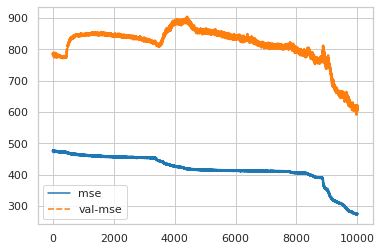

In [20]:
nn2.printStats()
nn2.model.evaluate(x_test, y_test)

In [21]:
nn2.predictResult(x_test,y_test)

ytest   predicted
0     13.749    0.000000
1     16.387    0.000000
2      4.646    0.000000
3    903.369  335.151917
4    102.830   88.070808
..       ...         ...
229    9.221    0.000000
230   10.883    0.000000
231   25.687    0.000000
232   26.082    0.000000
233   21.744    0.000000

[234 rows x 2 columns]

In [23]:
nn2.train_model(x_train,y_train,10000)

Epoch 1/10000
210/210 [==============================] - 2s 7ms/step - loss: 197.0090 - mse: 197.0090 - val_loss: 416.0892 - val_mse: 416.0892
Epoch 2/10000
210/210 [==============================] - 0s 2ms/step - loss: 198.1953 - mse: 198.1953 - val_loss: 416.3054 - val_mse: 416.3054
Epoch 3/10000
210/210 [==============================] - 0s 2ms/step - loss: 197.2699 - mse: 197.2699 - val_loss: 412.8974 - val_mse: 412.8974
Epoch 4/10000
210/210 [==============================] - 0s 2ms/step - loss: 197.8151 - mse: 197.8151 - val_loss: 415.7450 - val_mse: 415.7450
Epoch 5/10000
210/210 [==============================] - 0s 2ms/step - loss: 197.5093 - mse: 197.5093 - val_loss: 415.1837 - val_mse: 415.1837
Epoch 6/10000
210/210 [==============================] - 0s 2ms/step - loss: 197.3622 - mse: 197.3622 - val_loss: 415.2040 - val_mse: 415.2040
Epoch 7/10000
210/210 [==============================] - 0s 2ms/step - loss: 196.7406 - mse: 196.7406 - val_loss: 414.5025 - val_mse: 414.5025

Epoch 58/10000
210/210 [==============================] - 0s 2ms/step - loss: 196.7764 - mse: 196.7764 - val_loss: 411.1132 - val_mse: 411.1132
Epoch 59/10000
210/210 [==============================] - 0s 2ms/step - loss: 196.3550 - mse: 196.3550 - val_loss: 411.0125 - val_mse: 411.0125
Epoch 60/10000
210/210 [==============================] - 0s 2ms/step - loss: 197.1788 - mse: 197.1788 - val_loss: 407.9234 - val_mse: 407.9234
Epoch 61/10000
210/210 [==============================] - 0s 2ms/step - loss: 196.5251 - mse: 196.5251 - val_loss: 408.7721 - val_mse: 408.7721
Epoch 62/10000
210/210 [==============================] - 0s 2ms/step - loss: 197.1304 - mse: 197.1304 - val_loss: 411.1532 - val_mse: 411.1532
Epoch 63/10000
210/210 [==============================] - 0s 2ms/step - loss: 196.9528 - mse: 196.9528 - val_loss: 408.7324 - val_mse: 408.7324
Epoch 64/10000
210/210 [==============================] - 0s 2ms/step - loss: 196.5160 - mse: 196.5160 - val_loss: 410.7018 - val_mse: 4

Epoch 115/10000
210/210 [==============================] - 0s 2ms/step - loss: 195.8734 - mse: 195.8734 - val_loss: 405.6516 - val_mse: 405.6516
Epoch 116/10000
210/210 [==============================] - 0s 2ms/step - loss: 195.8611 - mse: 195.8611 - val_loss: 404.8083 - val_mse: 404.8083
Epoch 117/10000
210/210 [==============================] - 0s 2ms/step - loss: 196.2678 - mse: 196.2678 - val_loss: 408.0538 - val_mse: 408.0538
Epoch 118/10000
210/210 [==============================] - 0s 2ms/step - loss: 196.2359 - mse: 196.2359 - val_loss: 404.2497 - val_mse: 404.2497
Epoch 119/10000
210/210 [==============================] - 0s 2ms/step - loss: 196.4032 - mse: 196.4032 - val_loss: 406.4137 - val_mse: 406.4137
Epoch 120/10000
210/210 [==============================] - 0s 2ms/step - loss: 196.3000 - mse: 196.3000 - val_loss: 406.3108 - val_mse: 406.3108
Epoch 121/10000
210/210 [==============================] - 0s 2ms/step - loss: 197.5677 - mse: 197.5677 - val_loss: 407.2025 - val

210/210 [==============================] - 0s 2ms/step - loss: 195.1868 - mse: 195.1868 - val_loss: 403.9477 - val_mse: 403.9477
Epoch 228/10000
210/210 [==============================] - 0s 2ms/step - loss: 196.2981 - mse: 196.2981 - val_loss: 405.7977 - val_mse: 405.7977
Epoch 229/10000
210/210 [==============================] - 0s 2ms/step - loss: 195.3278 - mse: 195.3278 - val_loss: 403.9425 - val_mse: 403.9425
Epoch 230/10000
210/210 [==============================] - 0s 1ms/step - loss: 195.1039 - mse: 195.1039 - val_loss: 404.1023 - val_mse: 404.1023
Epoch 231/10000
210/210 [==============================] - 0s 1ms/step - loss: 195.5251 - mse: 195.5251 - val_loss: 406.3586 - val_mse: 406.3586
Epoch 232/10000
210/210 [==============================] - 0s 1ms/step - loss: 195.4542 - mse: 195.4542 - val_loss: 403.3746 - val_mse: 403.3746
Epoch 233/10000
210/210 [==============================] - 0s 2ms/step - loss: 195.9242 - mse: 195.9242 - val_loss: 403.5416 - val_mse: 403.5416
E

210/210 [==============================] - 0s 2ms/step - loss: 194.7229 - mse: 194.7229 - val_loss: 399.7654 - val_mse: 399.7654
Epoch 340/10000
210/210 [==============================] - 0s 2ms/step - loss: 193.9998 - mse: 193.9998 - val_loss: 398.2086 - val_mse: 398.2086
Epoch 341/10000
210/210 [==============================] - 0s 2ms/step - loss: 193.8058 - mse: 193.8058 - val_loss: 397.0244 - val_mse: 397.0244
Epoch 342/10000
210/210 [==============================] - 0s 2ms/step - loss: 194.5320 - mse: 194.5320 - val_loss: 398.1151 - val_mse: 398.1151
Epoch 343/10000
210/210 [==============================] - 0s 2ms/step - loss: 194.2591 - mse: 194.2591 - val_loss: 397.3903 - val_mse: 397.3903
Epoch 344/10000
210/210 [==============================] - 0s 2ms/step - loss: 195.2255 - mse: 195.2255 - val_loss: 397.9163 - val_mse: 397.9163
Epoch 345/10000
210/210 [==============================] - 0s 2ms/step - loss: 194.1432 - mse: 194.1432 - val_loss: 398.0835 - val_mse: 398.0835
E

210/210 [==============================] - 0s 2ms/step - loss: 193.4408 - mse: 193.4408 - val_loss: 391.3651 - val_mse: 391.3651
Epoch 452/10000
210/210 [==============================] - 0s 2ms/step - loss: 194.2442 - mse: 194.2442 - val_loss: 390.2616 - val_mse: 390.2616
Epoch 453/10000
210/210 [==============================] - 0s 2ms/step - loss: 193.9451 - mse: 193.9451 - val_loss: 391.0903 - val_mse: 391.0903
Epoch 454/10000
210/210 [==============================] - 0s 2ms/step - loss: 194.1920 - mse: 194.1920 - val_loss: 392.0265 - val_mse: 392.0265
Epoch 455/10000
210/210 [==============================] - 0s 2ms/step - loss: 194.1500 - mse: 194.1500 - val_loss: 390.4177 - val_mse: 390.4177
Epoch 456/10000
210/210 [==============================] - 0s 2ms/step - loss: 193.0724 - mse: 193.0724 - val_loss: 391.7990 - val_mse: 391.7990
Epoch 457/10000
210/210 [==============================] - 0s 2ms/step - loss: 193.7612 - mse: 193.7612 - val_loss: 390.3487 - val_mse: 390.3487
E

210/210 [==============================] - 0s 2ms/step - loss: 192.7372 - mse: 192.7372 - val_loss: 384.3207 - val_mse: 384.3207
Epoch 564/10000
210/210 [==============================] - 0s 2ms/step - loss: 193.3162 - mse: 193.3162 - val_loss: 384.9059 - val_mse: 384.9059
Epoch 565/10000
210/210 [==============================] - 0s 1ms/step - loss: 192.6343 - mse: 192.6343 - val_loss: 387.4250 - val_mse: 387.4250
Epoch 566/10000
210/210 [==============================] - 0s 1ms/step - loss: 193.6302 - mse: 193.6302 - val_loss: 386.3969 - val_mse: 386.3969
Epoch 567/10000
210/210 [==============================] - 0s 1ms/step - loss: 193.0435 - mse: 193.0435 - val_loss: 384.1779 - val_mse: 384.1779
Epoch 568/10000
210/210 [==============================] - 0s 1ms/step - loss: 193.0437 - mse: 193.0437 - val_loss: 383.2277 - val_mse: 383.2277
Epoch 569/10000
210/210 [==============================] - 0s 1ms/step - loss: 193.1320 - mse: 193.1320 - val_loss: 384.6844 - val_mse: 384.6844
E

210/210 [==============================] - 0s 2ms/step - loss: 191.7321 - mse: 191.7321 - val_loss: 375.7997 - val_mse: 375.7997
Epoch 676/10000
210/210 [==============================] - 0s 2ms/step - loss: 191.5703 - mse: 191.5703 - val_loss: 373.6216 - val_mse: 373.6216
Epoch 677/10000
210/210 [==============================] - 0s 2ms/step - loss: 190.8335 - mse: 190.8335 - val_loss: 375.7044 - val_mse: 375.7044
Epoch 678/10000
210/210 [==============================] - 0s 2ms/step - loss: 191.5054 - mse: 191.5054 - val_loss: 375.8633 - val_mse: 375.8633
Epoch 679/10000
210/210 [==============================] - 0s 2ms/step - loss: 191.3495 - mse: 191.3495 - val_loss: 376.9597 - val_mse: 376.9597
Epoch 680/10000
210/210 [==============================] - 0s 1ms/step - loss: 191.2637 - mse: 191.2637 - val_loss: 378.2350 - val_mse: 378.2350
Epoch 681/10000
210/210 [==============================] - 0s 2ms/step - loss: 192.5305 - mse: 192.5305 - val_loss: 377.7796 - val_mse: 377.7796
E

210/210 [==============================] - 0s 2ms/step - loss: 189.3960 - mse: 189.3960 - val_loss: 365.8548 - val_mse: 365.8548
Epoch 788/10000
210/210 [==============================] - 0s 2ms/step - loss: 189.4673 - mse: 189.4673 - val_loss: 365.2622 - val_mse: 365.2622
Epoch 789/10000
210/210 [==============================] - 0s 2ms/step - loss: 189.1668 - mse: 189.1668 - val_loss: 363.7722 - val_mse: 363.7722
Epoch 790/10000
210/210 [==============================] - 0s 1ms/step - loss: 188.6405 - mse: 188.6405 - val_loss: 363.4128 - val_mse: 363.4128
Epoch 791/10000
210/210 [==============================] - 0s 2ms/step - loss: 188.9916 - mse: 188.9916 - val_loss: 360.5130 - val_mse: 360.5130
Epoch 792/10000
210/210 [==============================] - 0s 2ms/step - loss: 189.5393 - mse: 189.5393 - val_loss: 358.9229 - val_mse: 358.9229
Epoch 793/10000
210/210 [==============================] - 0s 2ms/step - loss: 189.2463 - mse: 189.2463 - val_loss: 358.2646 - val_mse: 358.2646
E

210/210 [==============================] - 0s 1ms/step - loss: 182.5389 - mse: 182.5389 - val_loss: 326.4806 - val_mse: 326.4806
Epoch 900/10000
210/210 [==============================] - 0s 1ms/step - loss: 182.3826 - mse: 182.3826 - val_loss: 324.6358 - val_mse: 324.6358
Epoch 901/10000
210/210 [==============================] - 0s 2ms/step - loss: 181.8826 - mse: 181.8826 - val_loss: 323.6116 - val_mse: 323.6116
Epoch 902/10000
210/210 [==============================] - 0s 1ms/step - loss: 182.9628 - mse: 182.9628 - val_loss: 323.7929 - val_mse: 323.7929
Epoch 903/10000
210/210 [==============================] - 0s 1ms/step - loss: 181.9450 - mse: 181.9450 - val_loss: 319.1966 - val_mse: 319.1966
Epoch 904/10000
210/210 [==============================] - 0s 1ms/step - loss: 183.1300 - mse: 183.1300 - val_loss: 321.7646 - val_mse: 321.7646
Epoch 905/10000
210/210 [==============================] - 0s 1ms/step - loss: 181.3054 - mse: 181.3054 - val_loss: 319.2920 - val_mse: 319.2920
E

210/210 [==============================] - 1s 3ms/step - loss: 164.3923 - mse: 164.3923 - val_loss: 292.4921 - val_mse: 292.4921
Epoch 1012/10000
210/210 [==============================] - 0s 2ms/step - loss: 164.1111 - mse: 164.1111 - val_loss: 294.8795 - val_mse: 294.8795
Epoch 1013/10000
210/210 [==============================] - 1s 3ms/step - loss: 163.9291 - mse: 163.9291 - val_loss: 296.9972 - val_mse: 296.9972
Epoch 1014/10000
210/210 [==============================] - 1s 4ms/step - loss: 164.1945 - mse: 164.1945 - val_loss: 292.5611 - val_mse: 292.5611
Epoch 1015/10000
210/210 [==============================] - 1s 3ms/step - loss: 163.4460 - mse: 163.4460 - val_loss: 293.9467 - val_mse: 293.9467
Epoch 1016/10000
210/210 [==============================] - 1s 3ms/step - loss: 163.6431 - mse: 163.6431 - val_loss: 293.8266 - val_mse: 293.8266
Epoch 1017/10000
210/210 [==============================] - 0s 2ms/step - loss: 163.7082 - mse: 163.7082 - val_loss: 293.3384 - val_mse: 293.

210/210 [==============================] - 0s 1ms/step - loss: 157.9202 - mse: 157.9202 - val_loss: 284.3307 - val_mse: 284.3307
Epoch 1124/10000
210/210 [==============================] - 0s 1ms/step - loss: 156.7588 - mse: 156.7588 - val_loss: 292.0380 - val_mse: 292.0380
Epoch 1125/10000
210/210 [==============================] - 0s 1ms/step - loss: 157.6822 - mse: 157.6822 - val_loss: 290.4424 - val_mse: 290.4424
Epoch 1126/10000
210/210 [==============================] - 0s 1ms/step - loss: 157.3499 - mse: 157.3499 - val_loss: 284.9085 - val_mse: 284.9085
Epoch 1127/10000
210/210 [==============================] - 0s 1ms/step - loss: 157.1314 - mse: 157.1314 - val_loss: 287.4971 - val_mse: 287.4971
Epoch 1128/10000
210/210 [==============================] - 0s 1ms/step - loss: 157.1271 - mse: 157.1271 - val_loss: 286.4866 - val_mse: 286.4866
Epoch 1129/10000
210/210 [==============================] - 0s 1ms/step - loss: 157.2212 - mse: 157.2212 - val_loss: 291.9457 - val_mse: 291.

210/210 [==============================] - 0s 1ms/step - loss: 154.6352 - mse: 154.6352 - val_loss: 285.9869 - val_mse: 285.9869
Epoch 1236/10000
210/210 [==============================] - 0s 1ms/step - loss: 154.1814 - mse: 154.1814 - val_loss: 286.8022 - val_mse: 286.8022
Epoch 1237/10000
210/210 [==============================] - 0s 1ms/step - loss: 154.5874 - mse: 154.5874 - val_loss: 290.2336 - val_mse: 290.2336
Epoch 1238/10000
210/210 [==============================] - 0s 1ms/step - loss: 154.5785 - mse: 154.5785 - val_loss: 288.0160 - val_mse: 288.0160
Epoch 1239/10000
210/210 [==============================] - 0s 1ms/step - loss: 154.3854 - mse: 154.3854 - val_loss: 288.9619 - val_mse: 288.9619
Epoch 1240/10000
210/210 [==============================] - 0s 1ms/step - loss: 154.3143 - mse: 154.3143 - val_loss: 290.6874 - val_mse: 290.6874
Epoch 1241/10000
210/210 [==============================] - 0s 1ms/step - loss: 154.7578 - mse: 154.7578 - val_loss: 289.5252 - val_mse: 289.

210/210 [==============================] - 0s 2ms/step - loss: 152.5504 - mse: 152.5504 - val_loss: 290.0815 - val_mse: 290.0815
Epoch 1348/10000
210/210 [==============================] - 0s 2ms/step - loss: 153.0272 - mse: 153.0272 - val_loss: 291.8146 - val_mse: 291.8146
Epoch 1349/10000
210/210 [==============================] - 0s 2ms/step - loss: 152.6898 - mse: 152.6898 - val_loss: 288.4103 - val_mse: 288.4103
Epoch 1350/10000
210/210 [==============================] - 0s 2ms/step - loss: 152.9878 - mse: 152.9878 - val_loss: 290.4719 - val_mse: 290.4719
Epoch 1351/10000
210/210 [==============================] - 0s 2ms/step - loss: 152.8842 - mse: 152.8842 - val_loss: 289.1795 - val_mse: 289.1795
Epoch 1352/10000
210/210 [==============================] - 0s 1ms/step - loss: 153.3982 - mse: 153.3982 - val_loss: 287.7602 - val_mse: 287.7602
Epoch 1353/10000
210/210 [==============================] - 0s 1ms/step - loss: 153.0611 - mse: 153.0611 - val_loss: 290.4407 - val_mse: 290.

210/210 [==============================] - 0s 2ms/step - loss: 150.8864 - mse: 150.8864 - val_loss: 292.8872 - val_mse: 292.8872
Epoch 1460/10000
210/210 [==============================] - 0s 2ms/step - loss: 151.4480 - mse: 151.4480 - val_loss: 298.2412 - val_mse: 298.2412
Epoch 1461/10000
210/210 [==============================] - 0s 2ms/step - loss: 151.2587 - mse: 151.2587 - val_loss: 294.2128 - val_mse: 294.2128
Epoch 1462/10000
210/210 [==============================] - 0s 2ms/step - loss: 151.0945 - mse: 151.0945 - val_loss: 299.9180 - val_mse: 299.9180
Epoch 1463/10000
210/210 [==============================] - 0s 2ms/step - loss: 151.5671 - mse: 151.5671 - val_loss: 296.9705 - val_mse: 296.9705
Epoch 1464/10000
210/210 [==============================] - 0s 2ms/step - loss: 150.8876 - mse: 150.8876 - val_loss: 300.6880 - val_mse: 300.6880
Epoch 1465/10000
210/210 [==============================] - 0s 2ms/step - loss: 150.6020 - mse: 150.6020 - val_loss: 296.1243 - val_mse: 296.

210/210 [==============================] - 0s 2ms/step - loss: 149.2827 - mse: 149.2827 - val_loss: 294.9355 - val_mse: 294.9355
Epoch 1572/10000
210/210 [==============================] - 0s 2ms/step - loss: 149.8045 - mse: 149.8045 - val_loss: 298.9003 - val_mse: 298.9003
Epoch 1573/10000
210/210 [==============================] - 0s 2ms/step - loss: 149.2407 - mse: 149.2407 - val_loss: 294.2403 - val_mse: 294.2403
Epoch 1574/10000
210/210 [==============================] - 0s 2ms/step - loss: 150.1158 - mse: 150.1158 - val_loss: 296.2852 - val_mse: 296.2852
Epoch 1575/10000
210/210 [==============================] - 0s 1ms/step - loss: 149.4997 - mse: 149.4997 - val_loss: 295.0154 - val_mse: 295.0154
Epoch 1576/10000
210/210 [==============================] - 0s 1ms/step - loss: 149.9285 - mse: 149.9285 - val_loss: 298.8323 - val_mse: 298.8323
Epoch 1577/10000
210/210 [==============================] - 0s 2ms/step - loss: 149.8322 - mse: 149.8322 - val_loss: 297.0832 - val_mse: 297.

210/210 [==============================] - 0s 2ms/step - loss: 148.5246 - mse: 148.5246 - val_loss: 296.8222 - val_mse: 296.8222
Epoch 1684/10000
210/210 [==============================] - 0s 2ms/step - loss: 149.1375 - mse: 149.1375 - val_loss: 299.8792 - val_mse: 299.8792
Epoch 1685/10000
210/210 [==============================] - 0s 2ms/step - loss: 149.0633 - mse: 149.0633 - val_loss: 295.2306 - val_mse: 295.2306
Epoch 1686/10000
210/210 [==============================] - 0s 2ms/step - loss: 148.8336 - mse: 148.8336 - val_loss: 300.0050 - val_mse: 300.0050
Epoch 1687/10000
210/210 [==============================] - 0s 2ms/step - loss: 148.4902 - mse: 148.4902 - val_loss: 302.2497 - val_mse: 302.2497
Epoch 1688/10000
210/210 [==============================] - 0s 2ms/step - loss: 148.9903 - mse: 148.9903 - val_loss: 296.0649 - val_mse: 296.0649
Epoch 1689/10000
210/210 [==============================] - 0s 2ms/step - loss: 148.6594 - mse: 148.6594 - val_loss: 297.9772 - val_mse: 297.

210/210 [==============================] - 0s 2ms/step - loss: 148.8670 - mse: 148.8670 - val_loss: 300.3092 - val_mse: 300.3092
Epoch 1796/10000
210/210 [==============================] - 0s 2ms/step - loss: 147.9359 - mse: 147.9359 - val_loss: 297.4008 - val_mse: 297.4008
Epoch 1797/10000
210/210 [==============================] - 0s 2ms/step - loss: 148.4175 - mse: 148.4175 - val_loss: 300.7459 - val_mse: 300.7459
Epoch 1798/10000
210/210 [==============================] - 0s 2ms/step - loss: 148.3766 - mse: 148.3766 - val_loss: 299.4063 - val_mse: 299.4063
Epoch 1799/10000
210/210 [==============================] - 0s 2ms/step - loss: 148.3435 - mse: 148.3435 - val_loss: 296.5073 - val_mse: 296.5073
Epoch 1800/10000
210/210 [==============================] - 0s 2ms/step - loss: 147.8063 - mse: 147.8063 - val_loss: 299.5187 - val_mse: 299.5187
Epoch 1801/10000
210/210 [==============================] - 0s 2ms/step - loss: 148.1340 - mse: 148.1340 - val_loss: 304.4643 - val_mse: 304.

210/210 [==============================] - 0s 1ms/step - loss: 147.7898 - mse: 147.7898 - val_loss: 298.6122 - val_mse: 298.6122
Epoch 1908/10000
210/210 [==============================] - 0s 1ms/step - loss: 147.7038 - mse: 147.7038 - val_loss: 297.3935 - val_mse: 297.3935
Epoch 1909/10000
210/210 [==============================] - 0s 1ms/step - loss: 147.5951 - mse: 147.5951 - val_loss: 298.2852 - val_mse: 298.2852
Epoch 1910/10000
210/210 [==============================] - 0s 1ms/step - loss: 147.5325 - mse: 147.5325 - val_loss: 294.8253 - val_mse: 294.8253
Epoch 1911/10000
210/210 [==============================] - 0s 1ms/step - loss: 147.3573 - mse: 147.3573 - val_loss: 295.0426 - val_mse: 295.0426
Epoch 1912/10000
210/210 [==============================] - 0s 1ms/step - loss: 147.4559 - mse: 147.4559 - val_loss: 294.0373 - val_mse: 294.0373
Epoch 1913/10000
210/210 [==============================] - 0s 2ms/step - loss: 146.8768 - mse: 146.8768 - val_loss: 297.6448 - val_mse: 297.

210/210 [==============================] - 0s 2ms/step - loss: 146.8150 - mse: 146.8150 - val_loss: 293.8967 - val_mse: 293.8967
Epoch 2020/10000
210/210 [==============================] - 0s 2ms/step - loss: 147.2795 - mse: 147.2795 - val_loss: 295.0478 - val_mse: 295.0478
Epoch 2021/10000
210/210 [==============================] - 0s 2ms/step - loss: 147.4120 - mse: 147.4120 - val_loss: 294.1831 - val_mse: 294.1831
Epoch 2022/10000
210/210 [==============================] - 0s 2ms/step - loss: 146.9864 - mse: 146.9864 - val_loss: 297.2784 - val_mse: 297.2784
Epoch 2023/10000
210/210 [==============================] - 0s 2ms/step - loss: 146.5535 - mse: 146.5535 - val_loss: 295.5839 - val_mse: 295.5839
Epoch 2024/10000
210/210 [==============================] - 0s 1ms/step - loss: 146.5810 - mse: 146.5810 - val_loss: 295.4459 - val_mse: 295.4459
Epoch 2025/10000
210/210 [==============================] - 0s 2ms/step - loss: 147.2102 - mse: 147.2102 - val_loss: 297.2560 - val_mse: 297.

210/210 [==============================] - 0s 2ms/step - loss: 146.4000 - mse: 146.4000 - val_loss: 296.5189 - val_mse: 296.5189
Epoch 2132/10000
210/210 [==============================] - 0s 2ms/step - loss: 146.5294 - mse: 146.5294 - val_loss: 292.8843 - val_mse: 292.8843
Epoch 2133/10000
210/210 [==============================] - 0s 1ms/step - loss: 146.9702 - mse: 146.9702 - val_loss: 291.7968 - val_mse: 291.7968
Epoch 2134/10000
210/210 [==============================] - 0s 2ms/step - loss: 147.1772 - mse: 147.1772 - val_loss: 296.0965 - val_mse: 296.0965
Epoch 2135/10000
210/210 [==============================] - 0s 2ms/step - loss: 146.6561 - mse: 146.6561 - val_loss: 292.3226 - val_mse: 292.3226
Epoch 2136/10000
210/210 [==============================] - 0s 2ms/step - loss: 146.7278 - mse: 146.7278 - val_loss: 294.5677 - val_mse: 294.5677
Epoch 2137/10000
210/210 [==============================] - 0s 2ms/step - loss: 146.6969 - mse: 146.6969 - val_loss: 292.0354 - val_mse: 292.

210/210 [==============================] - 0s 1ms/step - loss: 145.9844 - mse: 145.9844 - val_loss: 294.3769 - val_mse: 294.3769
Epoch 2244/10000
210/210 [==============================] - 0s 1ms/step - loss: 145.8965 - mse: 145.8965 - val_loss: 296.1678 - val_mse: 296.1678
Epoch 2245/10000
210/210 [==============================] - 0s 1ms/step - loss: 145.8128 - mse: 145.8128 - val_loss: 294.5155 - val_mse: 294.5155
Epoch 2246/10000
210/210 [==============================] - 0s 1ms/step - loss: 145.9994 - mse: 145.9994 - val_loss: 294.2388 - val_mse: 294.2388
Epoch 2247/10000
210/210 [==============================] - 0s 1ms/step - loss: 146.4889 - mse: 146.4889 - val_loss: 294.4210 - val_mse: 294.4210
Epoch 2248/10000
210/210 [==============================] - 0s 1ms/step - loss: 145.7631 - mse: 145.7631 - val_loss: 295.1596 - val_mse: 295.1596
Epoch 2249/10000
210/210 [==============================] - 0s 1ms/step - loss: 145.8274 - mse: 145.8274 - val_loss: 294.4797 - val_mse: 294.

210/210 [==============================] - 0s 2ms/step - loss: 145.9572 - mse: 145.9572 - val_loss: 291.1873 - val_mse: 291.1873
Epoch 2356/10000
210/210 [==============================] - 0s 2ms/step - loss: 146.0327 - mse: 146.0327 - val_loss: 292.2922 - val_mse: 292.2922
Epoch 2357/10000
210/210 [==============================] - 0s 2ms/step - loss: 145.4325 - mse: 145.4325 - val_loss: 290.5355 - val_mse: 290.5355
Epoch 2358/10000
210/210 [==============================] - 0s 2ms/step - loss: 146.2387 - mse: 146.2387 - val_loss: 289.5067 - val_mse: 289.5067
Epoch 2359/10000
210/210 [==============================] - 0s 2ms/step - loss: 145.9171 - mse: 145.9171 - val_loss: 293.7495 - val_mse: 293.7495
Epoch 2360/10000
210/210 [==============================] - 0s 2ms/step - loss: 145.6565 - mse: 145.6565 - val_loss: 291.1439 - val_mse: 291.1439
Epoch 2361/10000
210/210 [==============================] - 0s 2ms/step - loss: 146.0701 - mse: 146.0701 - val_loss: 292.5792 - val_mse: 292.

210/210 [==============================] - 0s 2ms/step - loss: 145.4998 - mse: 145.4998 - val_loss: 292.2831 - val_mse: 292.2831
Epoch 2468/10000
210/210 [==============================] - 0s 2ms/step - loss: 145.8960 - mse: 145.8960 - val_loss: 289.3620 - val_mse: 289.3620
Epoch 2469/10000
210/210 [==============================] - 0s 2ms/step - loss: 145.3964 - mse: 145.3964 - val_loss: 290.0657 - val_mse: 290.0657
Epoch 2470/10000
210/210 [==============================] - 0s 2ms/step - loss: 145.7735 - mse: 145.7735 - val_loss: 293.1479 - val_mse: 293.1479
Epoch 2471/10000
210/210 [==============================] - 0s 2ms/step - loss: 145.7101 - mse: 145.7101 - val_loss: 291.0106 - val_mse: 291.0106
Epoch 2472/10000
210/210 [==============================] - 0s 2ms/step - loss: 146.2741 - mse: 146.2741 - val_loss: 289.7162 - val_mse: 289.7162
Epoch 2473/10000
210/210 [==============================] - 0s 2ms/step - loss: 145.6018 - mse: 145.6018 - val_loss: 290.3258 - val_mse: 290.

210/210 [==============================] - 0s 2ms/step - loss: 144.7273 - mse: 144.7273 - val_loss: 291.2369 - val_mse: 291.2369
Epoch 2580/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.7637 - mse: 144.7637 - val_loss: 292.3123 - val_mse: 292.3123
Epoch 2581/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.5586 - mse: 144.5586 - val_loss: 292.0364 - val_mse: 292.0364
Epoch 2582/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.9472 - mse: 144.9472 - val_loss: 294.6316 - val_mse: 294.6316
Epoch 2583/10000
210/210 [==============================] - 0s 2ms/step - loss: 145.0214 - mse: 145.0214 - val_loss: 290.0648 - val_mse: 290.0648
Epoch 2584/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.7054 - mse: 144.7054 - val_loss: 292.4488 - val_mse: 292.4488
Epoch 2585/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.8923 - mse: 144.8923 - val_loss: 292.9240 - val_mse: 292.

210/210 [==============================] - 0s 2ms/step - loss: 144.4366 - mse: 144.4366 - val_loss: 289.9219 - val_mse: 289.9219
Epoch 2692/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.5620 - mse: 144.5620 - val_loss: 291.2270 - val_mse: 291.2270
Epoch 2693/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.2713 - mse: 144.2713 - val_loss: 290.0310 - val_mse: 290.0310
Epoch 2694/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.9718 - mse: 144.9718 - val_loss: 290.4927 - val_mse: 290.4927
Epoch 2695/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.4622 - mse: 144.4622 - val_loss: 287.1764 - val_mse: 287.1764
Epoch 2696/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.5632 - mse: 144.5632 - val_loss: 288.3646 - val_mse: 288.3646
Epoch 2697/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.9991 - mse: 144.9991 - val_loss: 293.4883 - val_mse: 293.

210/210 [==============================] - 0s 2ms/step - loss: 143.8240 - mse: 143.8240 - val_loss: 293.8099 - val_mse: 293.8099
Epoch 2804/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.1329 - mse: 144.1329 - val_loss: 290.2932 - val_mse: 290.2932
Epoch 2805/10000
210/210 [==============================] - 0s 2ms/step - loss: 143.9250 - mse: 143.9250 - val_loss: 291.1412 - val_mse: 291.1412
Epoch 2806/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.2715 - mse: 144.2715 - val_loss: 289.0785 - val_mse: 289.0785
Epoch 2807/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.1946 - mse: 144.1946 - val_loss: 287.4981 - val_mse: 287.4981
Epoch 2808/10000
210/210 [==============================] - 0s 2ms/step - loss: 143.7554 - mse: 143.7554 - val_loss: 287.8900 - val_mse: 287.8900
Epoch 2809/10000
210/210 [==============================] - 0s 2ms/step - loss: 144.3186 - mse: 144.3186 - val_loss: 289.8405 - val_mse: 289.

210/210 [==============================] - 0s 2ms/step - loss: 143.2557 - mse: 143.2557 - val_loss: 285.2735 - val_mse: 285.2735
Epoch 2916/10000
210/210 [==============================] - 0s 2ms/step - loss: 143.4398 - mse: 143.4398 - val_loss: 285.1488 - val_mse: 285.1488
Epoch 2917/10000
210/210 [==============================] - 0s 2ms/step - loss: 143.7913 - mse: 143.7913 - val_loss: 285.5696 - val_mse: 285.5696
Epoch 2918/10000
210/210 [==============================] - 0s 2ms/step - loss: 143.4633 - mse: 143.4633 - val_loss: 286.2079 - val_mse: 286.2079
Epoch 2919/10000
210/210 [==============================] - 0s 2ms/step - loss: 143.4510 - mse: 143.4510 - val_loss: 283.9335 - val_mse: 283.9335
Epoch 2920/10000
210/210 [==============================] - 0s 2ms/step - loss: 143.5649 - mse: 143.5649 - val_loss: 284.6474 - val_mse: 284.6474
Epoch 2921/10000
210/210 [==============================] - 0s 2ms/step - loss: 143.2887 - mse: 143.2887 - val_loss: 287.2995 - val_mse: 287.

210/210 [==============================] - 0s 2ms/step - loss: 142.8788 - mse: 142.8788 - val_loss: 284.6717 - val_mse: 284.6717
Epoch 3028/10000
210/210 [==============================] - 0s 2ms/step - loss: 143.2521 - mse: 143.2521 - val_loss: 282.1638 - val_mse: 282.1638
Epoch 3029/10000
210/210 [==============================] - 0s 1ms/step - loss: 144.4508 - mse: 144.4508 - val_loss: 285.2277 - val_mse: 285.2277
Epoch 3030/10000
210/210 [==============================] - 0s 1ms/step - loss: 143.1992 - mse: 143.1992 - val_loss: 284.1468 - val_mse: 284.1468
Epoch 3031/10000
210/210 [==============================] - 0s 1ms/step - loss: 143.0620 - mse: 143.0620 - val_loss: 284.1224 - val_mse: 284.1224
Epoch 3032/10000
210/210 [==============================] - 0s 1ms/step - loss: 143.3600 - mse: 143.3600 - val_loss: 284.8005 - val_mse: 284.8005
Epoch 3033/10000
210/210 [==============================] - 0s 1ms/step - loss: 142.7367 - mse: 142.7367 - val_loss: 287.7610 - val_mse: 287.

210/210 [==============================] - 0s 2ms/step - loss: 142.8652 - mse: 142.8652 - val_loss: 281.5045 - val_mse: 281.5045
Epoch 3140/10000
210/210 [==============================] - 0s 2ms/step - loss: 142.6362 - mse: 142.6362 - val_loss: 283.0044 - val_mse: 283.0044
Epoch 3141/10000
210/210 [==============================] - 0s 2ms/step - loss: 143.0422 - mse: 143.0422 - val_loss: 282.0316 - val_mse: 282.0316
Epoch 3142/10000
210/210 [==============================] - 0s 1ms/step - loss: 142.6637 - mse: 142.6637 - val_loss: 283.2803 - val_mse: 283.2803
Epoch 3143/10000
210/210 [==============================] - 0s 2ms/step - loss: 143.1232 - mse: 143.1232 - val_loss: 283.1007 - val_mse: 283.1007
Epoch 3144/10000
210/210 [==============================] - 0s 2ms/step - loss: 142.9280 - mse: 142.9280 - val_loss: 281.6129 - val_mse: 281.6129
Epoch 3145/10000
210/210 [==============================] - 0s 2ms/step - loss: 143.0564 - mse: 143.0564 - val_loss: 282.5416 - val_mse: 282.

210/210 [==============================] - 0s 2ms/step - loss: 143.1989 - mse: 143.1989 - val_loss: 282.7745 - val_mse: 282.7745
Epoch 3252/10000
210/210 [==============================] - 0s 2ms/step - loss: 142.2431 - mse: 142.2431 - val_loss: 282.0574 - val_mse: 282.0574
Epoch 3253/10000
210/210 [==============================] - 0s 2ms/step - loss: 142.9059 - mse: 142.9059 - val_loss: 282.9990 - val_mse: 282.9990
Epoch 3254/10000
210/210 [==============================] - 0s 2ms/step - loss: 142.3166 - mse: 142.3166 - val_loss: 281.7235 - val_mse: 281.7235
Epoch 3255/10000
210/210 [==============================] - 0s 2ms/step - loss: 142.4093 - mse: 142.4093 - val_loss: 283.7763 - val_mse: 283.7763
Epoch 3256/10000
210/210 [==============================] - 0s 2ms/step - loss: 142.5806 - mse: 142.5806 - val_loss: 285.0049 - val_mse: 285.0049
Epoch 3257/10000
210/210 [==============================] - 0s 2ms/step - loss: 142.0239 - mse: 142.0239 - val_loss: 284.8214 - val_mse: 284.

210/210 [==============================] - 0s 1ms/step - loss: 141.9844 - mse: 141.9844 - val_loss: 284.5076 - val_mse: 284.5076
Epoch 3364/10000
210/210 [==============================] - 0s 1ms/step - loss: 142.3590 - mse: 142.3590 - val_loss: 282.4244 - val_mse: 282.4244
Epoch 3365/10000
210/210 [==============================] - 0s 1ms/step - loss: 142.7321 - mse: 142.7321 - val_loss: 282.4039 - val_mse: 282.4039
Epoch 3366/10000
210/210 [==============================] - 0s 1ms/step - loss: 142.0385 - mse: 142.0385 - val_loss: 282.4925 - val_mse: 282.4925
Epoch 3367/10000
210/210 [==============================] - 0s 1ms/step - loss: 142.1759 - mse: 142.1759 - val_loss: 281.7622 - val_mse: 281.7622
Epoch 3368/10000
210/210 [==============================] - 0s 2ms/step - loss: 142.5418 - mse: 142.5418 - val_loss: 283.0901 - val_mse: 283.0901
Epoch 3369/10000
210/210 [==============================] - 0s 1ms/step - loss: 141.9890 - mse: 141.9890 - val_loss: 283.3452 - val_mse: 283.

210/210 [==============================] - 0s 2ms/step - loss: 141.1536 - mse: 141.1536 - val_loss: 282.6883 - val_mse: 282.6883
Epoch 3476/10000
210/210 [==============================] - 0s 2ms/step - loss: 142.0431 - mse: 142.0431 - val_loss: 280.6274 - val_mse: 280.6274
Epoch 3477/10000
210/210 [==============================] - 0s 2ms/step - loss: 141.9877 - mse: 141.9877 - val_loss: 281.5436 - val_mse: 281.5436
Epoch 3478/10000
210/210 [==============================] - 0s 2ms/step - loss: 141.8828 - mse: 141.8828 - val_loss: 282.1028 - val_mse: 282.1028
Epoch 3479/10000
210/210 [==============================] - 0s 2ms/step - loss: 142.0396 - mse: 142.0396 - val_loss: 280.6779 - val_mse: 280.6779
Epoch 3480/10000
210/210 [==============================] - 0s 2ms/step - loss: 141.8628 - mse: 141.8628 - val_loss: 282.6481 - val_mse: 282.6481
Epoch 3481/10000
210/210 [==============================] - 0s 2ms/step - loss: 142.1400 - mse: 142.1400 - val_loss: 282.7032 - val_mse: 282.

210/210 [==============================] - 0s 2ms/step - loss: 141.7373 - mse: 141.7373 - val_loss: 282.7364 - val_mse: 282.7364
Epoch 3588/10000
210/210 [==============================] - 0s 2ms/step - loss: 141.8707 - mse: 141.8707 - val_loss: 284.9333 - val_mse: 284.9333
Epoch 3589/10000
210/210 [==============================] - 0s 2ms/step - loss: 141.0885 - mse: 141.0885 - val_loss: 281.6192 - val_mse: 281.6192
Epoch 3590/10000
210/210 [==============================] - 0s 2ms/step - loss: 141.7692 - mse: 141.7692 - val_loss: 284.4566 - val_mse: 284.4566
Epoch 3591/10000
210/210 [==============================] - 0s 2ms/step - loss: 141.7061 - mse: 141.7061 - val_loss: 284.2400 - val_mse: 284.2400
Epoch 3592/10000
210/210 [==============================] - 0s 2ms/step - loss: 141.3328 - mse: 141.3328 - val_loss: 281.8701 - val_mse: 281.8701
Epoch 3593/10000
210/210 [==============================] - 0s 2ms/step - loss: 141.2743 - mse: 141.2743 - val_loss: 281.3559 - val_mse: 281.

210/210 [==============================] - 0s 1ms/step - loss: 141.2128 - mse: 141.2128 - val_loss: 281.7264 - val_mse: 281.7264
Epoch 3700/10000
210/210 [==============================] - 0s 2ms/step - loss: 141.2448 - mse: 141.2448 - val_loss: 285.2601 - val_mse: 285.2601
Epoch 3701/10000
210/210 [==============================] - 0s 1ms/step - loss: 141.5403 - mse: 141.5403 - val_loss: 283.9825 - val_mse: 283.9825
Epoch 3702/10000
210/210 [==============================] - 0s 1ms/step - loss: 141.0005 - mse: 141.0005 - val_loss: 285.0351 - val_mse: 285.0351
Epoch 3703/10000
210/210 [==============================] - 0s 1ms/step - loss: 141.2280 - mse: 141.2280 - val_loss: 281.8787 - val_mse: 281.8787
Epoch 3704/10000
210/210 [==============================] - 0s 1ms/step - loss: 140.7450 - mse: 140.7450 - val_loss: 282.6063 - val_mse: 282.6063
Epoch 3705/10000
210/210 [==============================] - 0s 1ms/step - loss: 141.4345 - mse: 141.4345 - val_loss: 283.8582 - val_mse: 283.

210/210 [==============================] - 0s 2ms/step - loss: 141.3584 - mse: 141.3584 - val_loss: 281.6472 - val_mse: 281.6472
Epoch 3812/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.9146 - mse: 140.9146 - val_loss: 281.5841 - val_mse: 281.5841
Epoch 3813/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.6794 - mse: 140.6794 - val_loss: 280.7077 - val_mse: 280.7077
Epoch 3814/10000
210/210 [==============================] - 0s 2ms/step - loss: 141.2424 - mse: 141.2424 - val_loss: 280.8669 - val_mse: 280.8669
Epoch 3815/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.8081 - mse: 140.8081 - val_loss: 280.9742 - val_mse: 280.9742
Epoch 3816/10000
210/210 [==============================] - 0s 2ms/step - loss: 141.0612 - mse: 141.0612 - val_loss: 283.2733 - val_mse: 283.2733
Epoch 3817/10000
210/210 [==============================] - 0s 1ms/step - loss: 140.7876 - mse: 140.7876 - val_loss: 280.9186 - val_mse: 280.

210/210 [==============================] - 0s 2ms/step - loss: 140.3770 - mse: 140.3770 - val_loss: 279.7563 - val_mse: 279.7563
Epoch 3924/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.8109 - mse: 140.8109 - val_loss: 281.0890 - val_mse: 281.0890
Epoch 3925/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.2519 - mse: 140.2519 - val_loss: 281.8923 - val_mse: 281.8923
Epoch 3926/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.4908 - mse: 140.4908 - val_loss: 281.6089 - val_mse: 281.6089
Epoch 3927/10000
210/210 [==============================] - 0s 2ms/step - loss: 141.1352 - mse: 141.1352 - val_loss: 283.1246 - val_mse: 283.1246
Epoch 3928/10000
210/210 [==============================] - 0s 2ms/step - loss: 141.0236 - mse: 141.0236 - val_loss: 282.1523 - val_mse: 282.1523
Epoch 3929/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.7117 - mse: 140.7117 - val_loss: 282.8962 - val_mse: 282.

210/210 [==============================] - 0s 2ms/step - loss: 140.2169 - mse: 140.2169 - val_loss: 282.6070 - val_mse: 282.6070
Epoch 4036/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.3714 - mse: 140.3714 - val_loss: 281.2943 - val_mse: 281.2943
Epoch 4037/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.8702 - mse: 139.8702 - val_loss: 279.8432 - val_mse: 279.8432
Epoch 4038/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.5818 - mse: 140.5818 - val_loss: 280.5705 - val_mse: 280.5705
Epoch 4039/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.7266 - mse: 140.7266 - val_loss: 280.7595 - val_mse: 280.7595
Epoch 4040/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.2863 - mse: 140.2863 - val_loss: 281.6393 - val_mse: 281.6393
Epoch 4041/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.1328 - mse: 140.1328 - val_loss: 280.0388 - val_mse: 280.

210/210 [==============================] - 0s 2ms/step - loss: 140.2610 - mse: 140.2610 - val_loss: 277.3797 - val_mse: 277.3797
Epoch 4148/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.2551 - mse: 140.2551 - val_loss: 280.9229 - val_mse: 280.9229
Epoch 4149/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.0747 - mse: 140.0747 - val_loss: 278.2781 - val_mse: 278.2781
Epoch 4150/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.2904 - mse: 140.2904 - val_loss: 278.3773 - val_mse: 278.3773
Epoch 4151/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.8551 - mse: 139.8551 - val_loss: 279.0655 - val_mse: 279.0655
Epoch 4152/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.5415 - mse: 140.5415 - val_loss: 279.8100 - val_mse: 279.8100
Epoch 4153/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.9780 - mse: 139.9780 - val_loss: 278.8371 - val_mse: 278.

210/210 [==============================] - 0s 2ms/step - loss: 140.1952 - mse: 140.1952 - val_loss: 278.2210 - val_mse: 278.2210
Epoch 4260/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.9287 - mse: 139.9287 - val_loss: 279.6652 - val_mse: 279.6652
Epoch 4261/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.9099 - mse: 139.9099 - val_loss: 279.3661 - val_mse: 279.3661
Epoch 4262/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.8649 - mse: 139.8649 - val_loss: 277.0815 - val_mse: 277.0815
Epoch 4263/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.7233 - mse: 139.7233 - val_loss: 278.4467 - val_mse: 278.4467
Epoch 4264/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.7886 - mse: 139.7886 - val_loss: 277.1125 - val_mse: 277.1125
Epoch 4265/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.9879 - mse: 139.9879 - val_loss: 276.3144 - val_mse: 276.

210/210 [==============================] - 0s 2ms/step - loss: 139.7142 - mse: 139.7142 - val_loss: 276.2056 - val_mse: 276.2056
Epoch 4372/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.7944 - mse: 139.7944 - val_loss: 275.4489 - val_mse: 275.4489
Epoch 4373/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.1796 - mse: 140.1796 - val_loss: 274.9789 - val_mse: 274.9789
Epoch 4374/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.3684 - mse: 139.3684 - val_loss: 276.0142 - val_mse: 276.0142
Epoch 4375/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.5619 - mse: 139.5619 - val_loss: 275.4063 - val_mse: 275.4063
Epoch 4376/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.7246 - mse: 139.7246 - val_loss: 277.2543 - val_mse: 277.2543
Epoch 4377/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.8784 - mse: 139.8784 - val_loss: 276.0789 - val_mse: 276.

210/210 [==============================] - 0s 2ms/step - loss: 139.9508 - mse: 139.9508 - val_loss: 274.5519 - val_mse: 274.5519
Epoch 4484/10000
210/210 [==============================] - 0s 2ms/step - loss: 140.0974 - mse: 140.0974 - val_loss: 272.5472 - val_mse: 272.5472
Epoch 4485/10000
210/210 [==============================] - 0s 1ms/step - loss: 139.2755 - mse: 139.2755 - val_loss: 271.7326 - val_mse: 271.7326
Epoch 4486/10000
210/210 [==============================] - 0s 1ms/step - loss: 139.2932 - mse: 139.2932 - val_loss: 275.5911 - val_mse: 275.5911
Epoch 4487/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.5334 - mse: 139.5334 - val_loss: 276.3539 - val_mse: 276.3539
Epoch 4488/10000
210/210 [==============================] - 0s 1ms/step - loss: 138.8254 - mse: 138.8254 - val_loss: 275.9716 - val_mse: 275.9716
Epoch 4489/10000
210/210 [==============================] - 0s 1ms/step - loss: 139.8734 - mse: 139.8734 - val_loss: 275.1719 - val_mse: 275.

210/210 [==============================] - 0s 1ms/step - loss: 138.9327 - mse: 138.9327 - val_loss: 270.5775 - val_mse: 270.5775
Epoch 4596/10000
210/210 [==============================] - 0s 1ms/step - loss: 139.1066 - mse: 139.1066 - val_loss: 269.8328 - val_mse: 269.8328
Epoch 4597/10000
210/210 [==============================] - 0s 1ms/step - loss: 139.2906 - mse: 139.2906 - val_loss: 270.5395 - val_mse: 270.5395
Epoch 4598/10000
210/210 [==============================] - 0s 1ms/step - loss: 139.9187 - mse: 139.9187 - val_loss: 271.4974 - val_mse: 271.4974
Epoch 4599/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.8463 - mse: 139.8463 - val_loss: 269.5338 - val_mse: 269.5338
Epoch 4600/10000
210/210 [==============================] - 0s 2ms/step - loss: 138.9938 - mse: 138.9938 - val_loss: 271.5057 - val_mse: 271.5057
Epoch 4601/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.1260 - mse: 139.1260 - val_loss: 272.2689 - val_mse: 272.

210/210 [==============================] - 0s 2ms/step - loss: 138.7643 - mse: 138.7643 - val_loss: 265.0967 - val_mse: 265.0967
Epoch 4708/10000
210/210 [==============================] - 0s 2ms/step - loss: 138.6510 - mse: 138.6510 - val_loss: 267.9976 - val_mse: 267.9976
Epoch 4709/10000
210/210 [==============================] - 0s 1ms/step - loss: 138.9857 - mse: 138.9857 - val_loss: 267.8842 - val_mse: 267.8842
Epoch 4710/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.0171 - mse: 139.0171 - val_loss: 265.6654 - val_mse: 265.6654
Epoch 4711/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.3494 - mse: 139.3494 - val_loss: 266.2719 - val_mse: 266.2719
Epoch 4712/10000
210/210 [==============================] - 0s 2ms/step - loss: 139.2288 - mse: 139.2288 - val_loss: 264.6344 - val_mse: 264.6344
Epoch 4713/10000
210/210 [==============================] - 0s 2ms/step - loss: 138.8368 - mse: 138.8368 - val_loss: 266.8948 - val_mse: 266.

210/210 [==============================] - 0s 1ms/step - loss: 137.6583 - mse: 137.6583 - val_loss: 259.2240 - val_mse: 259.2240
Epoch 4820/10000
210/210 [==============================] - 0s 1ms/step - loss: 137.5191 - mse: 137.5191 - val_loss: 259.5227 - val_mse: 259.5227
Epoch 4821/10000
210/210 [==============================] - 0s 1ms/step - loss: 138.0786 - mse: 138.0786 - val_loss: 260.9205 - val_mse: 260.9205
Epoch 4822/10000
210/210 [==============================] - 0s 1ms/step - loss: 137.8298 - mse: 137.8298 - val_loss: 261.1630 - val_mse: 261.1630
Epoch 4823/10000
210/210 [==============================] - 0s 2ms/step - loss: 137.9813 - mse: 137.9813 - val_loss: 261.5781 - val_mse: 261.5781
Epoch 4824/10000
210/210 [==============================] - 0s 1ms/step - loss: 137.8178 - mse: 137.8178 - val_loss: 261.4515 - val_mse: 261.4515
Epoch 4825/10000
210/210 [==============================] - 0s 1ms/step - loss: 137.6922 - mse: 137.6922 - val_loss: 260.5256 - val_mse: 260.

210/210 [==============================] - 0s 2ms/step - loss: 137.1498 - mse: 137.1498 - val_loss: 257.8960 - val_mse: 257.8960
Epoch 4932/10000
210/210 [==============================] - 0s 2ms/step - loss: 136.8758 - mse: 136.8758 - val_loss: 258.4669 - val_mse: 258.4669
Epoch 4933/10000
210/210 [==============================] - 0s 2ms/step - loss: 137.6080 - mse: 137.6080 - val_loss: 258.9154 - val_mse: 258.9154
Epoch 4934/10000
210/210 [==============================] - 0s 2ms/step - loss: 137.9327 - mse: 137.9327 - val_loss: 257.4282 - val_mse: 257.4282
Epoch 4935/10000
210/210 [==============================] - 0s 2ms/step - loss: 137.0500 - mse: 137.0500 - val_loss: 258.3658 - val_mse: 258.3658
Epoch 4936/10000
210/210 [==============================] - 0s 1ms/step - loss: 137.3195 - mse: 137.3195 - val_loss: 257.7211 - val_mse: 257.7211
Epoch 4937/10000
210/210 [==============================] - 0s 1ms/step - loss: 137.3472 - mse: 137.3472 - val_loss: 259.2115 - val_mse: 259.

210/210 [==============================] - 0s 2ms/step - loss: 136.3811 - mse: 136.3811 - val_loss: 256.5172 - val_mse: 256.5172
Epoch 5044/10000
210/210 [==============================] - 0s 2ms/step - loss: 137.5149 - mse: 137.5149 - val_loss: 255.7581 - val_mse: 255.7581
Epoch 5045/10000
210/210 [==============================] - 0s 2ms/step - loss: 136.9093 - mse: 136.9093 - val_loss: 255.3801 - val_mse: 255.3801
Epoch 5046/10000
210/210 [==============================] - 0s 2ms/step - loss: 136.5963 - mse: 136.5963 - val_loss: 254.1438 - val_mse: 254.1438
Epoch 5047/10000
210/210 [==============================] - 0s 2ms/step - loss: 137.0181 - mse: 137.0181 - val_loss: 255.1019 - val_mse: 255.1019
Epoch 5048/10000
210/210 [==============================] - 0s 2ms/step - loss: 136.8353 - mse: 136.8353 - val_loss: 256.0764 - val_mse: 256.0764
Epoch 5049/10000
210/210 [==============================] - 0s 2ms/step - loss: 135.9854 - mse: 135.9854 - val_loss: 254.5174 - val_mse: 254.

210/210 [==============================] - 0s 1ms/step - loss: 136.6611 - mse: 136.6611 - val_loss: 255.5580 - val_mse: 255.5580
Epoch 5156/10000
210/210 [==============================] - 0s 1ms/step - loss: 136.2791 - mse: 136.2791 - val_loss: 255.3996 - val_mse: 255.3996
Epoch 5157/10000
210/210 [==============================] - 0s 1ms/step - loss: 136.3889 - mse: 136.3889 - val_loss: 255.8488 - val_mse: 255.8488
Epoch 5158/10000
210/210 [==============================] - 0s 1ms/step - loss: 136.9613 - mse: 136.9613 - val_loss: 254.9297 - val_mse: 254.9297
Epoch 5159/10000
210/210 [==============================] - 0s 2ms/step - loss: 136.7316 - mse: 136.7316 - val_loss: 252.8698 - val_mse: 252.8698
Epoch 5160/10000
210/210 [==============================] - 0s 2ms/step - loss: 136.3810 - mse: 136.3810 - val_loss: 255.7961 - val_mse: 255.7961
Epoch 5161/10000
210/210 [==============================] - 0s 2ms/step - loss: 136.4441 - mse: 136.4441 - val_loss: 254.9863 - val_mse: 254.

210/210 [==============================] - 0s 2ms/step - loss: 135.3167 - mse: 135.3167 - val_loss: 255.8276 - val_mse: 255.8276
Epoch 5268/10000
210/210 [==============================] - 0s 2ms/step - loss: 135.6856 - mse: 135.6856 - val_loss: 255.6657 - val_mse: 255.6657
Epoch 5269/10000
210/210 [==============================] - 0s 2ms/step - loss: 135.3403 - mse: 135.3403 - val_loss: 254.2524 - val_mse: 254.2524
Epoch 5270/10000
210/210 [==============================] - 0s 2ms/step - loss: 135.6465 - mse: 135.6465 - val_loss: 254.2750 - val_mse: 254.2750
Epoch 5271/10000
210/210 [==============================] - 0s 2ms/step - loss: 135.2716 - mse: 135.2716 - val_loss: 253.9870 - val_mse: 253.9870
Epoch 5272/10000
210/210 [==============================] - 0s 2ms/step - loss: 135.5416 - mse: 135.5416 - val_loss: 255.5112 - val_mse: 255.5112
Epoch 5273/10000
210/210 [==============================] - 0s 2ms/step - loss: 135.9314 - mse: 135.9314 - val_loss: 254.1182 - val_mse: 254.

210/210 [==============================] - 0s 2ms/step - loss: 125.8161 - mse: 125.8161 - val_loss: 251.4657 - val_mse: 251.4657
Epoch 5380/10000
210/210 [==============================] - 0s 2ms/step - loss: 126.1316 - mse: 126.1316 - val_loss: 247.7709 - val_mse: 247.7709
Epoch 5381/10000
210/210 [==============================] - 0s 2ms/step - loss: 125.2067 - mse: 125.2067 - val_loss: 248.7055 - val_mse: 248.7055
Epoch 5382/10000
210/210 [==============================] - 0s 2ms/step - loss: 125.6853 - mse: 125.6853 - val_loss: 250.7356 - val_mse: 250.7356
Epoch 5383/10000
210/210 [==============================] - 0s 2ms/step - loss: 125.6877 - mse: 125.6877 - val_loss: 247.5836 - val_mse: 247.5836
Epoch 5384/10000
210/210 [==============================] - 0s 2ms/step - loss: 125.4286 - mse: 125.4286 - val_loss: 250.8325 - val_mse: 250.8325
Epoch 5385/10000
210/210 [==============================] - 0s 2ms/step - loss: 125.0775 - mse: 125.0775 - val_loss: 248.6896 - val_mse: 248.

210/210 [==============================] - 0s 2ms/step - loss: 122.8058 - mse: 122.8058 - val_loss: 245.4780 - val_mse: 245.4780
Epoch 5492/10000
210/210 [==============================] - 0s 2ms/step - loss: 122.6908 - mse: 122.6908 - val_loss: 247.9183 - val_mse: 247.9183
Epoch 5493/10000
210/210 [==============================] - 0s 2ms/step - loss: 122.1188 - mse: 122.1188 - val_loss: 246.3651 - val_mse: 246.3651
Epoch 5494/10000
210/210 [==============================] - 0s 2ms/step - loss: 122.6470 - mse: 122.6470 - val_loss: 249.7395 - val_mse: 249.7395
Epoch 5495/10000
210/210 [==============================] - 0s 2ms/step - loss: 122.6776 - mse: 122.6776 - val_loss: 246.6709 - val_mse: 246.6709
Epoch 5496/10000
210/210 [==============================] - 0s 2ms/step - loss: 122.1642 - mse: 122.1642 - val_loss: 249.5054 - val_mse: 249.5054
Epoch 5497/10000
210/210 [==============================] - 0s 2ms/step - loss: 122.6873 - mse: 122.6873 - val_loss: 248.2902 - val_mse: 248.

210/210 [==============================] - 0s 2ms/step - loss: 121.6512 - mse: 121.6512 - val_loss: 243.6229 - val_mse: 243.6229
Epoch 5604/10000
210/210 [==============================] - 0s 2ms/step - loss: 120.7953 - mse: 120.7953 - val_loss: 244.4473 - val_mse: 244.4473
Epoch 5605/10000
210/210 [==============================] - 0s 2ms/step - loss: 121.1791 - mse: 121.1791 - val_loss: 243.6117 - val_mse: 243.6117
Epoch 5606/10000
210/210 [==============================] - 1s 3ms/step - loss: 121.2113 - mse: 121.2113 - val_loss: 245.7884 - val_mse: 245.7884
Epoch 5607/10000
210/210 [==============================] - 0s 2ms/step - loss: 121.1780 - mse: 121.1780 - val_loss: 245.1070 - val_mse: 245.1070
Epoch 5608/10000
210/210 [==============================] - 0s 2ms/step - loss: 120.9390 - mse: 120.9390 - val_loss: 244.5888 - val_mse: 244.5888
Epoch 5609/10000
210/210 [==============================] - 0s 2ms/step - loss: 121.0149 - mse: 121.0149 - val_loss: 246.9050 - val_mse: 246.

210/210 [==============================] - 0s 2ms/step - loss: 120.0150 - mse: 120.0150 - val_loss: 243.7552 - val_mse: 243.7552
Epoch 5716/10000
210/210 [==============================] - 0s 2ms/step - loss: 120.5570 - mse: 120.5570 - val_loss: 245.1412 - val_mse: 245.1412
Epoch 5717/10000
210/210 [==============================] - 0s 2ms/step - loss: 119.7477 - mse: 119.7477 - val_loss: 244.1627 - val_mse: 244.1627
Epoch 5718/10000
210/210 [==============================] - 0s 2ms/step - loss: 119.9101 - mse: 119.9101 - val_loss: 244.6779 - val_mse: 244.6779
Epoch 5719/10000
210/210 [==============================] - 0s 2ms/step - loss: 120.3199 - mse: 120.3199 - val_loss: 244.7424 - val_mse: 244.7424
Epoch 5720/10000
210/210 [==============================] - 0s 2ms/step - loss: 119.5368 - mse: 119.5368 - val_loss: 244.0204 - val_mse: 244.0204
Epoch 5721/10000
210/210 [==============================] - 0s 2ms/step - loss: 119.8763 - mse: 119.8763 - val_loss: 244.1882 - val_mse: 244.

210/210 [==============================] - 0s 2ms/step - loss: 118.9539 - mse: 118.9539 - val_loss: 243.1169 - val_mse: 243.1169
Epoch 5828/10000
210/210 [==============================] - 0s 2ms/step - loss: 119.2291 - mse: 119.2291 - val_loss: 243.4341 - val_mse: 243.4341
Epoch 5829/10000
210/210 [==============================] - 0s 2ms/step - loss: 119.0280 - mse: 119.0280 - val_loss: 242.7401 - val_mse: 242.7401
Epoch 5830/10000
210/210 [==============================] - 0s 2ms/step - loss: 119.3039 - mse: 119.3039 - val_loss: 242.6002 - val_mse: 242.6002
Epoch 5831/10000
210/210 [==============================] - 0s 2ms/step - loss: 119.5056 - mse: 119.5056 - val_loss: 241.5674 - val_mse: 241.5674
Epoch 5832/10000
210/210 [==============================] - 0s 2ms/step - loss: 118.8854 - mse: 118.8854 - val_loss: 242.6954 - val_mse: 242.6954
Epoch 5833/10000
210/210 [==============================] - 0s 2ms/step - loss: 118.4273 - mse: 118.4273 - val_loss: 244.5097 - val_mse: 244.

210/210 [==============================] - 0s 1ms/step - loss: 117.8488 - mse: 117.8488 - val_loss: 231.3298 - val_mse: 231.3298
Epoch 5940/10000
210/210 [==============================] - 0s 1ms/step - loss: 117.9743 - mse: 117.9743 - val_loss: 223.4294 - val_mse: 223.4294
Epoch 5941/10000
210/210 [==============================] - 0s 1ms/step - loss: 117.8029 - mse: 117.8029 - val_loss: 230.4241 - val_mse: 230.4241
Epoch 5942/10000
210/210 [==============================] - 0s 1ms/step - loss: 117.5096 - mse: 117.5096 - val_loss: 232.9464 - val_mse: 232.9464
Epoch 5943/10000
210/210 [==============================] - 0s 2ms/step - loss: 117.8586 - mse: 117.8586 - val_loss: 226.7627 - val_mse: 226.7627
Epoch 5944/10000
210/210 [==============================] - 0s 1ms/step - loss: 117.6024 - mse: 117.6024 - val_loss: 231.4585 - val_mse: 231.4585
Epoch 5945/10000
210/210 [==============================] - 0s 1ms/step - loss: 117.5772 - mse: 117.5772 - val_loss: 233.6773 - val_mse: 233.

210/210 [==============================] - 0s 2ms/step - loss: 117.0689 - mse: 117.0689 - val_loss: 217.9769 - val_mse: 217.9769
Epoch 6052/10000
210/210 [==============================] - 0s 2ms/step - loss: 116.4006 - mse: 116.4006 - val_loss: 221.2684 - val_mse: 221.2684
Epoch 6053/10000
210/210 [==============================] - 0s 2ms/step - loss: 116.7083 - mse: 116.7083 - val_loss: 221.8809 - val_mse: 221.8809
Epoch 6054/10000
210/210 [==============================] - 0s 2ms/step - loss: 116.8898 - mse: 116.8898 - val_loss: 222.6898 - val_mse: 222.6898
Epoch 6055/10000
210/210 [==============================] - 0s 2ms/step - loss: 116.9622 - mse: 116.9622 - val_loss: 223.6776 - val_mse: 223.6776
Epoch 6056/10000
210/210 [==============================] - 0s 2ms/step - loss: 117.1570 - mse: 117.1570 - val_loss: 218.7777 - val_mse: 218.7777
Epoch 6057/10000
210/210 [==============================] - 0s 2ms/step - loss: 117.4571 - mse: 117.4571 - val_loss: 217.6590 - val_mse: 217.

210/210 [==============================] - 0s 2ms/step - loss: 107.3608 - mse: 107.3608 - val_loss: 170.5624 - val_mse: 170.5624
Epoch 6164/10000
210/210 [==============================] - 0s 2ms/step - loss: 107.4886 - mse: 107.4886 - val_loss: 166.5273 - val_mse: 166.5273
Epoch 6165/10000
210/210 [==============================] - 0s 2ms/step - loss: 107.2784 - mse: 107.2784 - val_loss: 171.1130 - val_mse: 171.1130
Epoch 6166/10000
210/210 [==============================] - 0s 2ms/step - loss: 106.9050 - mse: 106.9050 - val_loss: 165.1591 - val_mse: 165.1591
Epoch 6167/10000
210/210 [==============================] - 0s 2ms/step - loss: 106.9924 - mse: 106.9924 - val_loss: 172.7933 - val_mse: 172.7933
Epoch 6168/10000
210/210 [==============================] - 0s 2ms/step - loss: 107.5964 - mse: 107.5964 - val_loss: 168.9028 - val_mse: 168.9028
Epoch 6169/10000
210/210 [==============================] - 0s 2ms/step - loss: 107.4711 - mse: 107.4711 - val_loss: 167.5139 - val_mse: 167.

210/210 [==============================] - 0s 1ms/step - loss: 103.7511 - mse: 103.7511 - val_loss: 168.8634 - val_mse: 168.8634
Epoch 6276/10000
210/210 [==============================] - 0s 1ms/step - loss: 104.1974 - mse: 104.1974 - val_loss: 171.8170 - val_mse: 171.8170
Epoch 6277/10000
210/210 [==============================] - 0s 1ms/step - loss: 103.1275 - mse: 103.1275 - val_loss: 173.8368 - val_mse: 173.8368
Epoch 6278/10000
210/210 [==============================] - 0s 1ms/step - loss: 103.9948 - mse: 103.9948 - val_loss: 169.4136 - val_mse: 169.4136
Epoch 6279/10000
210/210 [==============================] - 0s 1ms/step - loss: 103.3217 - mse: 103.3217 - val_loss: 169.0314 - val_mse: 169.0314
Epoch 6280/10000
210/210 [==============================] - 0s 2ms/step - loss: 103.9721 - mse: 103.9721 - val_loss: 169.6660 - val_mse: 169.6660
Epoch 6281/10000
210/210 [==============================] - 0s 1ms/step - loss: 103.2279 - mse: 103.2279 - val_loss: 166.4679 - val_mse: 166.

210/210 [==============================] - 0s 2ms/step - loss: 102.1658 - mse: 102.1658 - val_loss: 168.3596 - val_mse: 168.3596
Epoch 6388/10000
210/210 [==============================] - 0s 2ms/step - loss: 101.8878 - mse: 101.8878 - val_loss: 169.6897 - val_mse: 169.6897
Epoch 6389/10000
210/210 [==============================] - 0s 2ms/step - loss: 101.7454 - mse: 101.7454 - val_loss: 170.4308 - val_mse: 170.4308
Epoch 6390/10000
210/210 [==============================] - 0s 2ms/step - loss: 101.6637 - mse: 101.6637 - val_loss: 169.0117 - val_mse: 169.0117
Epoch 6391/10000
210/210 [==============================] - 0s 2ms/step - loss: 101.7668 - mse: 101.7668 - val_loss: 170.8011 - val_mse: 170.8011
Epoch 6392/10000
210/210 [==============================] - 0s 2ms/step - loss: 101.1161 - mse: 101.1161 - val_loss: 168.2923 - val_mse: 168.2923
Epoch 6393/10000
210/210 [==============================] - 0s 2ms/step - loss: 102.0512 - mse: 102.0512 - val_loss: 171.2209 - val_mse: 171.

210/210 [==============================] - 0s 2ms/step - loss: 101.0297 - mse: 101.0297 - val_loss: 167.3148 - val_mse: 167.3148
Epoch 6500/10000
210/210 [==============================] - 0s 2ms/step - loss: 101.2735 - mse: 101.2735 - val_loss: 168.5479 - val_mse: 168.5479
Epoch 6501/10000
210/210 [==============================] - 0s 2ms/step - loss: 101.7406 - mse: 101.7406 - val_loss: 167.9226 - val_mse: 167.9226
Epoch 6502/10000
210/210 [==============================] - 0s 2ms/step - loss: 100.8152 - mse: 100.8152 - val_loss: 166.8214 - val_mse: 166.8214
Epoch 6503/10000
210/210 [==============================] - 0s 2ms/step - loss: 101.6314 - mse: 101.6314 - val_loss: 168.3859 - val_mse: 168.3859
Epoch 6504/10000
210/210 [==============================] - 0s 2ms/step - loss: 100.6116 - mse: 100.6116 - val_loss: 170.9604 - val_mse: 170.9604
Epoch 6505/10000
210/210 [==============================] - 0s 2ms/step - loss: 100.8858 - mse: 100.8858 - val_loss: 169.2811 - val_mse: 169.

210/210 [==============================] - 0s 2ms/step - loss: 97.5167 - mse: 97.5167 - val_loss: 169.1880 - val_mse: 169.1880
Epoch 6613/10000
210/210 [==============================] - 0s 2ms/step - loss: 96.9464 - mse: 96.9464 - val_loss: 168.4570 - val_mse: 168.4570
Epoch 6614/10000
210/210 [==============================] - 0s 2ms/step - loss: 97.6472 - mse: 97.6472 - val_loss: 169.9858 - val_mse: 169.9858
Epoch 6615/10000
210/210 [==============================] - 0s 2ms/step - loss: 97.2613 - mse: 97.2613 - val_loss: 169.2521 - val_mse: 169.2521
Epoch 6616/10000
210/210 [==============================] - 0s 2ms/step - loss: 96.7022 - mse: 96.7022 - val_loss: 169.5740 - val_mse: 169.5740
Epoch 6617/10000
210/210 [==============================] - 0s 2ms/step - loss: 97.0659 - mse: 97.0659 - val_loss: 168.8840 - val_mse: 168.8840
Epoch 6618/10000
210/210 [==============================] - 0s 2ms/step - loss: 97.5732 - mse: 97.5732 - val_loss: 170.0450 - val_mse: 170.0450
Epoch 661

210/210 [==============================] - 0s 2ms/step - loss: 96.2735 - mse: 96.2735 - val_loss: 168.1960 - val_mse: 168.1960
Epoch 6670/10000
210/210 [==============================] - 0s 2ms/step - loss: 96.2806 - mse: 96.2806 - val_loss: 167.4457 - val_mse: 167.4457
Epoch 6671/10000
210/210 [==============================] - 0s 2ms/step - loss: 96.6607 - mse: 96.6607 - val_loss: 174.9170 - val_mse: 174.9170
Epoch 6672/10000
210/210 [==============================] - 0s 2ms/step - loss: 96.4956 - mse: 96.4956 - val_loss: 170.2788 - val_mse: 170.2788
Epoch 6673/10000
210/210 [==============================] - 0s 1ms/step - loss: 95.2042 - mse: 95.2042 - val_loss: 171.3489 - val_mse: 171.3489
Epoch 6674/10000
210/210 [==============================] - 0s 2ms/step - loss: 95.8371 - mse: 95.8371 - val_loss: 169.0245 - val_mse: 169.0245
Epoch 6675/10000
210/210 [==============================] - 0s 2ms/step - loss: 95.6357 - mse: 95.6357 - val_loss: 173.6119 - val_mse: 173.6119
Epoch 667

210/210 [==============================] - 0s 2ms/step - loss: 95.4564 - mse: 95.4564 - val_loss: 167.5868 - val_mse: 167.5868
Epoch 6727/10000
210/210 [==============================] - 0s 2ms/step - loss: 95.0721 - mse: 95.0721 - val_loss: 168.4163 - val_mse: 168.4163
Epoch 6728/10000
210/210 [==============================] - 0s 2ms/step - loss: 94.8684 - mse: 94.8684 - val_loss: 167.6794 - val_mse: 167.6794
Epoch 6729/10000
210/210 [==============================] - 0s 2ms/step - loss: 95.3405 - mse: 95.3405 - val_loss: 171.1207 - val_mse: 171.1207
Epoch 6730/10000
210/210 [==============================] - 0s 2ms/step - loss: 95.8673 - mse: 95.8673 - val_loss: 166.1433 - val_mse: 166.1433
Epoch 6731/10000
210/210 [==============================] - 0s 2ms/step - loss: 95.4128 - mse: 95.4128 - val_loss: 167.3887 - val_mse: 167.3887
Epoch 6732/10000
210/210 [==============================] - 0s 2ms/step - loss: 95.1258 - mse: 95.1258 - val_loss: 167.5583 - val_mse: 167.5583
Epoch 673

210/210 [==============================] - 0s 2ms/step - loss: 93.5616 - mse: 93.5616 - val_loss: 173.1560 - val_mse: 173.1560
Epoch 6784/10000
210/210 [==============================] - 0s 2ms/step - loss: 95.0765 - mse: 95.0765 - val_loss: 170.7855 - val_mse: 170.7855
Epoch 6785/10000
210/210 [==============================] - 0s 2ms/step - loss: 94.4029 - mse: 94.4029 - val_loss: 167.9323 - val_mse: 167.9323
Epoch 6786/10000
210/210 [==============================] - 0s 2ms/step - loss: 95.0188 - mse: 95.0188 - val_loss: 165.5896 - val_mse: 165.5896
Epoch 6787/10000
210/210 [==============================] - 0s 2ms/step - loss: 95.0557 - mse: 95.0557 - val_loss: 165.8568 - val_mse: 165.8568
Epoch 6788/10000
210/210 [==============================] - 0s 2ms/step - loss: 94.4133 - mse: 94.4133 - val_loss: 167.4224 - val_mse: 167.4224
Epoch 6789/10000
210/210 [==============================] - 0s 2ms/step - loss: 95.1974 - mse: 95.1974 - val_loss: 165.7900 - val_mse: 165.7900
Epoch 679

210/210 [==============================] - 0s 2ms/step - loss: 94.0414 - mse: 94.0414 - val_loss: 168.5064 - val_mse: 168.5064
Epoch 6841/10000
210/210 [==============================] - 0s 2ms/step - loss: 93.8811 - mse: 93.8811 - val_loss: 167.1903 - val_mse: 167.1903
Epoch 6842/10000
210/210 [==============================] - 0s 2ms/step - loss: 94.1125 - mse: 94.1125 - val_loss: 168.0926 - val_mse: 168.0926
Epoch 6843/10000
210/210 [==============================] - 0s 2ms/step - loss: 94.0696 - mse: 94.0696 - val_loss: 164.5018 - val_mse: 164.5018
Epoch 6844/10000
210/210 [==============================] - 0s 2ms/step - loss: 93.9838 - mse: 93.9838 - val_loss: 166.0928 - val_mse: 166.0928
Epoch 6845/10000
210/210 [==============================] - 0s 2ms/step - loss: 94.2435 - mse: 94.2435 - val_loss: 163.9880 - val_mse: 163.9880
Epoch 6846/10000
210/210 [==============================] - 0s 2ms/step - loss: 94.0845 - mse: 94.0845 - val_loss: 167.5779 - val_mse: 167.5779
Epoch 684

210/210 [==============================] - 0s 2ms/step - loss: 92.0161 - mse: 92.0161 - val_loss: 160.3597 - val_mse: 160.3597
Epoch 6898/10000
210/210 [==============================] - 0s 2ms/step - loss: 92.0511 - mse: 92.0511 - val_loss: 165.0966 - val_mse: 165.0966
Epoch 6899/10000
210/210 [==============================] - 0s 2ms/step - loss: 92.3083 - mse: 92.3083 - val_loss: 168.2168 - val_mse: 168.2168
Epoch 6900/10000
210/210 [==============================] - 0s 1ms/step - loss: 92.0442 - mse: 92.0442 - val_loss: 160.4380 - val_mse: 160.4380
Epoch 6901/10000
210/210 [==============================] - 0s 1ms/step - loss: 91.8689 - mse: 91.8689 - val_loss: 166.0441 - val_mse: 166.0441
Epoch 6902/10000
210/210 [==============================] - 0s 1ms/step - loss: 91.9935 - mse: 91.9935 - val_loss: 161.3676 - val_mse: 161.3676
Epoch 6903/10000
210/210 [==============================] - 0s 1ms/step - loss: 92.4411 - mse: 92.4411 - val_loss: 162.8715 - val_mse: 162.8715
Epoch 690

210/210 [==============================] - 0s 2ms/step - loss: 90.9111 - mse: 90.9111 - val_loss: 165.4400 - val_mse: 165.4400
Epoch 6955/10000
210/210 [==============================] - 0s 2ms/step - loss: 90.5368 - mse: 90.5368 - val_loss: 161.6963 - val_mse: 161.6963
Epoch 6956/10000
210/210 [==============================] - 0s 2ms/step - loss: 90.3207 - mse: 90.3207 - val_loss: 159.0129 - val_mse: 159.0129
Epoch 6957/10000
210/210 [==============================] - 0s 2ms/step - loss: 90.7386 - mse: 90.7386 - val_loss: 165.9364 - val_mse: 165.9364
Epoch 6958/10000
210/210 [==============================] - 0s 2ms/step - loss: 90.6112 - mse: 90.6112 - val_loss: 163.2604 - val_mse: 163.2604
Epoch 6959/10000
210/210 [==============================] - 0s 2ms/step - loss: 91.0880 - mse: 91.0880 - val_loss: 163.4256 - val_mse: 163.4256
Epoch 6960/10000
210/210 [==============================] - 0s 2ms/step - loss: 91.4657 - mse: 91.4657 - val_loss: 161.0867 - val_mse: 161.0867
Epoch 696

210/210 [==============================] - 0s 2ms/step - loss: 90.6141 - mse: 90.6141 - val_loss: 160.3305 - val_mse: 160.3305
Epoch 7012/10000
210/210 [==============================] - 0s 2ms/step - loss: 89.6445 - mse: 89.6445 - val_loss: 158.0822 - val_mse: 158.0822
Epoch 7013/10000
210/210 [==============================] - 0s 2ms/step - loss: 89.8026 - mse: 89.8026 - val_loss: 161.9592 - val_mse: 161.9592
Epoch 7014/10000
210/210 [==============================] - 0s 2ms/step - loss: 90.1178 - mse: 90.1178 - val_loss: 165.8149 - val_mse: 165.8149
Epoch 7015/10000
210/210 [==============================] - 0s 2ms/step - loss: 89.5116 - mse: 89.5116 - val_loss: 159.2731 - val_mse: 159.2731
Epoch 7016/10000
210/210 [==============================] - 0s 2ms/step - loss: 89.5177 - mse: 89.5177 - val_loss: 165.4373 - val_mse: 165.4373
Epoch 7017/10000
210/210 [==============================] - 0s 2ms/step - loss: 89.8972 - mse: 89.8972 - val_loss: 162.7835 - val_mse: 162.7835
Epoch 701

210/210 [==============================] - 0s 1ms/step - loss: 89.0834 - mse: 89.0834 - val_loss: 161.7968 - val_mse: 161.7968
Epoch 7069/10000
210/210 [==============================] - 0s 2ms/step - loss: 89.4766 - mse: 89.4766 - val_loss: 167.2893 - val_mse: 167.2893
Epoch 7070/10000
210/210 [==============================] - 0s 1ms/step - loss: 89.3285 - mse: 89.3285 - val_loss: 159.1750 - val_mse: 159.1750
Epoch 7071/10000
210/210 [==============================] - 0s 1ms/step - loss: 89.4649 - mse: 89.4649 - val_loss: 160.0861 - val_mse: 160.0861
Epoch 7072/10000
210/210 [==============================] - 0s 2ms/step - loss: 89.3147 - mse: 89.3147 - val_loss: 159.5778 - val_mse: 159.5778
Epoch 7073/10000
210/210 [==============================] - 0s 2ms/step - loss: 89.1440 - mse: 89.1440 - val_loss: 160.4792 - val_mse: 160.4792
Epoch 7074/10000
210/210 [==============================] - 0s 1ms/step - loss: 88.8913 - mse: 88.8913 - val_loss: 161.4788 - val_mse: 161.4788
Epoch 707

210/210 [==============================] - 0s 2ms/step - loss: 88.3436 - mse: 88.3436 - val_loss: 158.4017 - val_mse: 158.4017
Epoch 7126/10000
210/210 [==============================] - 0s 2ms/step - loss: 88.9921 - mse: 88.9921 - val_loss: 160.2669 - val_mse: 160.2669
Epoch 7127/10000
210/210 [==============================] - 0s 2ms/step - loss: 88.6748 - mse: 88.6748 - val_loss: 161.9227 - val_mse: 161.9227
Epoch 7128/10000
210/210 [==============================] - 0s 2ms/step - loss: 88.4205 - mse: 88.4205 - val_loss: 164.9695 - val_mse: 164.9695
Epoch 7129/10000
210/210 [==============================] - 0s 2ms/step - loss: 88.5976 - mse: 88.5976 - val_loss: 161.0839 - val_mse: 161.0839
Epoch 7130/10000
210/210 [==============================] - 0s 2ms/step - loss: 88.2046 - mse: 88.2046 - val_loss: 160.6923 - val_mse: 160.6923
Epoch 7131/10000
210/210 [==============================] - 0s 2ms/step - loss: 88.3290 - mse: 88.3290 - val_loss: 162.0522 - val_mse: 162.0522
Epoch 713

210/210 [==============================] - 0s 2ms/step - loss: 88.0166 - mse: 88.0166 - val_loss: 158.4075 - val_mse: 158.4075
Epoch 7183/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.9911 - mse: 87.9911 - val_loss: 167.5650 - val_mse: 167.5650
Epoch 7184/10000
210/210 [==============================] - 0s 2ms/step - loss: 88.3901 - mse: 88.3901 - val_loss: 161.2055 - val_mse: 161.2055
Epoch 7185/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.8089 - mse: 87.8089 - val_loss: 163.8490 - val_mse: 163.8490
Epoch 7186/10000
210/210 [==============================] - 0s 2ms/step - loss: 88.0336 - mse: 88.0336 - val_loss: 161.8467 - val_mse: 161.8467
Epoch 7187/10000
210/210 [==============================] - 0s 2ms/step - loss: 88.3102 - mse: 88.3102 - val_loss: 161.0766 - val_mse: 161.0766
Epoch 7188/10000
210/210 [==============================] - 0s 2ms/step - loss: 88.1136 - mse: 88.1136 - val_loss: 159.2776 - val_mse: 159.2776
Epoch 718

210/210 [==============================] - 0s 1ms/step - loss: 88.4643 - mse: 88.4643 - val_loss: 164.7191 - val_mse: 164.7191
Epoch 7240/10000
210/210 [==============================] - 0s 1ms/step - loss: 87.8223 - mse: 87.8223 - val_loss: 160.1618 - val_mse: 160.1618
Epoch 7241/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.4061 - mse: 87.4061 - val_loss: 157.5528 - val_mse: 157.5528
Epoch 7242/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.8594 - mse: 87.8594 - val_loss: 154.2939 - val_mse: 154.2939
Epoch 7243/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.4956 - mse: 87.4956 - val_loss: 162.8697 - val_mse: 162.8697
Epoch 7244/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.4562 - mse: 87.4562 - val_loss: 164.2495 - val_mse: 164.2495
Epoch 7245/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.2770 - mse: 87.2770 - val_loss: 159.4055 - val_mse: 159.4055
Epoch 724

210/210 [==============================] - 0s 2ms/step - loss: 87.8143 - mse: 87.8143 - val_loss: 163.1848 - val_mse: 163.1848
Epoch 7297/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.3087 - mse: 87.3087 - val_loss: 160.2800 - val_mse: 160.2800
Epoch 7298/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.6205 - mse: 87.6205 - val_loss: 155.8278 - val_mse: 155.8278
Epoch 7299/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.4543 - mse: 87.4543 - val_loss: 161.9299 - val_mse: 161.9299
Epoch 7300/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.8338 - mse: 86.8338 - val_loss: 158.3853 - val_mse: 158.3853
Epoch 7301/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.2390 - mse: 87.2390 - val_loss: 158.0143 - val_mse: 158.0143
Epoch 7302/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.0867 - mse: 87.0867 - val_loss: 160.6523 - val_mse: 160.6523
Epoch 730

210/210 [==============================] - 0s 2ms/step - loss: 86.7318 - mse: 86.7318 - val_loss: 158.1679 - val_mse: 158.1679
Epoch 7354/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.8557 - mse: 86.8557 - val_loss: 158.2121 - val_mse: 158.2121
Epoch 7355/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.0732 - mse: 87.0732 - val_loss: 166.9900 - val_mse: 166.9900
Epoch 7356/10000
210/210 [==============================] - 1s 3ms/step - loss: 87.2539 - mse: 87.2539 - val_loss: 160.0173 - val_mse: 160.0173
Epoch 7357/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.7595 - mse: 87.7595 - val_loss: 159.0852 - val_mse: 159.0852
Epoch 7358/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.6401 - mse: 87.6401 - val_loss: 160.4249 - val_mse: 160.4249
Epoch 7359/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.7243 - mse: 86.7243 - val_loss: 160.5946 - val_mse: 160.5946
Epoch 736

Epoch 7410/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.6680 - mse: 86.6680 - val_loss: 163.2217 - val_mse: 163.2217
Epoch 7411/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.0286 - mse: 87.0286 - val_loss: 160.0690 - val_mse: 160.0690
Epoch 7412/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.8635 - mse: 87.8635 - val_loss: 164.4524 - val_mse: 164.4524
Epoch 7413/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.5056 - mse: 86.5056 - val_loss: 163.1072 - val_mse: 163.1072
Epoch 7414/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.1474 - mse: 86.1474 - val_loss: 162.1917 - val_mse: 162.1917
Epoch 7415/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.7560 - mse: 86.7560 - val_loss: 158.9034 - val_mse: 158.9034
Epoch 7416/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.6204 - mse: 86.6204 - val_loss: 160.5604 - val_mse: 1

Epoch 7467/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.8238 - mse: 86.8238 - val_loss: 159.9050 - val_mse: 159.9050
Epoch 7468/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.1410 - mse: 86.1410 - val_loss: 156.6611 - val_mse: 156.6611
Epoch 7469/10000
210/210 [==============================] - 0s 1ms/step - loss: 86.6244 - mse: 86.6244 - val_loss: 155.5204 - val_mse: 155.5204
Epoch 7470/10000
210/210 [==============================] - 0s 2ms/step - loss: 87.0042 - mse: 87.0042 - val_loss: 159.6243 - val_mse: 159.6243
Epoch 7471/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.7793 - mse: 86.7793 - val_loss: 161.5738 - val_mse: 161.5738
Epoch 7472/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.9599 - mse: 86.9599 - val_loss: 160.2586 - val_mse: 160.2586
Epoch 7473/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.2122 - mse: 86.2122 - val_loss: 159.3289 - val_mse: 1

Epoch 7524/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.7933 - mse: 85.7933 - val_loss: 156.1408 - val_mse: 156.1408
Epoch 7525/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.8357 - mse: 86.8357 - val_loss: 161.9555 - val_mse: 161.9555
Epoch 7526/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.9139 - mse: 85.9139 - val_loss: 157.0768 - val_mse: 157.0768
Epoch 7527/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.1407 - mse: 86.1407 - val_loss: 160.3442 - val_mse: 160.3442
Epoch 7528/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.1853 - mse: 86.1853 - val_loss: 162.4999 - val_mse: 162.4999
Epoch 7529/10000
210/210 [==============================] - 0s 1ms/step - loss: 87.0863 - mse: 87.0863 - val_loss: 159.1684 - val_mse: 159.1684
Epoch 7530/10000
210/210 [==============================] - 0s 1ms/step - loss: 86.0732 - mse: 86.0732 - val_loss: 161.2882 - val_mse: 1

Epoch 7581/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.4300 - mse: 86.4300 - val_loss: 158.0506 - val_mse: 158.0506
Epoch 7582/10000
210/210 [==============================] - 1s 4ms/step - loss: 86.5491 - mse: 86.5491 - val_loss: 159.4321 - val_mse: 159.4321
Epoch 7583/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.1727 - mse: 86.1727 - val_loss: 156.0509 - val_mse: 156.0509
Epoch 7584/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.4399 - mse: 86.4399 - val_loss: 157.2342 - val_mse: 157.2342
Epoch 7585/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.1203 - mse: 86.1203 - val_loss: 158.7106 - val_mse: 158.7106
Epoch 7586/10000
210/210 [==============================] - 0s 2ms/step - loss: 86.0309 - mse: 86.0309 - val_loss: 162.2937 - val_mse: 162.2937
Epoch 7587/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.8681 - mse: 85.8681 - val_loss: 164.7114 - val_mse: 1

Epoch 7638/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.3131 - mse: 85.3131 - val_loss: 161.8239 - val_mse: 161.8239
Epoch 7639/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.8921 - mse: 85.8921 - val_loss: 162.0085 - val_mse: 162.0085
Epoch 7640/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.0957 - mse: 85.0957 - val_loss: 156.9674 - val_mse: 156.9674
Epoch 7641/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.9484 - mse: 85.9484 - val_loss: 156.2363 - val_mse: 156.2363
Epoch 7642/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.4928 - mse: 85.4928 - val_loss: 156.9306 - val_mse: 156.9306
Epoch 7643/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.7246 - mse: 85.7246 - val_loss: 160.9673 - val_mse: 160.9673
Epoch 7644/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.5000 - mse: 85.5000 - val_loss: 160.3434 - val_mse: 1

Epoch 7695/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.3520 - mse: 85.3520 - val_loss: 156.8497 - val_mse: 156.8497
Epoch 7696/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.0945 - mse: 85.0945 - val_loss: 159.1134 - val_mse: 159.1134
Epoch 7697/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.0369 - mse: 85.0369 - val_loss: 157.2295 - val_mse: 157.2295
Epoch 7698/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.2392 - mse: 85.2392 - val_loss: 162.4415 - val_mse: 162.4415
Epoch 7699/10000
210/210 [==============================] - 0s 1ms/step - loss: 85.4598 - mse: 85.4598 - val_loss: 157.5926 - val_mse: 157.5926
Epoch 7700/10000
210/210 [==============================] - 0s 1ms/step - loss: 85.8422 - mse: 85.8422 - val_loss: 158.4021 - val_mse: 158.4021
Epoch 7701/10000
210/210 [==============================] - 0s 1ms/step - loss: 85.3552 - mse: 85.3552 - val_loss: 154.7387 - val_mse: 1

Epoch 7752/10000
210/210 [==============================] - 0s 2ms/step - loss: 84.4546 - mse: 84.4546 - val_loss: 153.1566 - val_mse: 153.1566
Epoch 7753/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.0669 - mse: 85.0669 - val_loss: 157.7126 - val_mse: 157.7126
Epoch 7754/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.1100 - mse: 85.1100 - val_loss: 154.7395 - val_mse: 154.7395
Epoch 7755/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.2102 - mse: 85.2102 - val_loss: 164.8068 - val_mse: 164.8068
Epoch 7756/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.2393 - mse: 85.2393 - val_loss: 155.6768 - val_mse: 155.6768
Epoch 7757/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.5163 - mse: 85.5163 - val_loss: 155.8738 - val_mse: 155.8738
Epoch 7758/10000
210/210 [==============================] - 0s 2ms/step - loss: 84.3938 - mse: 84.3938 - val_loss: 151.6625 - val_mse: 1

Epoch 7809/10000
210/210 [==============================] - 0s 2ms/step - loss: 84.3389 - mse: 84.3389 - val_loss: 151.4317 - val_mse: 151.4317
Epoch 7810/10000
210/210 [==============================] - 0s 2ms/step - loss: 84.6218 - mse: 84.6218 - val_loss: 148.7350 - val_mse: 148.7350
Epoch 7811/10000
210/210 [==============================] - 0s 2ms/step - loss: 84.4201 - mse: 84.4201 - val_loss: 157.2458 - val_mse: 157.2458
Epoch 7812/10000
210/210 [==============================] - 0s 2ms/step - loss: 84.6610 - mse: 84.6610 - val_loss: 149.5370 - val_mse: 149.5370
Epoch 7813/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.2703 - mse: 85.2703 - val_loss: 150.8722 - val_mse: 150.8722
Epoch 7814/10000
210/210 [==============================] - 0s 2ms/step - loss: 85.1501 - mse: 85.1501 - val_loss: 147.2626 - val_mse: 147.2626
Epoch 7815/10000
210/210 [==============================] - 0s 2ms/step - loss: 84.3797 - mse: 84.3797 - val_loss: 145.9694 - val_mse: 1

Epoch 7866/10000
210/210 [==============================] - 0s 2ms/step - loss: 83.8675 - mse: 83.8675 - val_loss: 145.8672 - val_mse: 145.8672
Epoch 7867/10000
210/210 [==============================] - 0s 2ms/step - loss: 83.6724 - mse: 83.6724 - val_loss: 149.4779 - val_mse: 149.4779
Epoch 7868/10000
210/210 [==============================] - 0s 2ms/step - loss: 84.2324 - mse: 84.2324 - val_loss: 139.8157 - val_mse: 139.8157
Epoch 7869/10000
210/210 [==============================] - 0s 1ms/step - loss: 84.4759 - mse: 84.4759 - val_loss: 145.1317 - val_mse: 145.1317
Epoch 7870/10000
210/210 [==============================] - 0s 1ms/step - loss: 83.8238 - mse: 83.8238 - val_loss: 146.5847 - val_mse: 146.5847
Epoch 7871/10000
210/210 [==============================] - 0s 2ms/step - loss: 83.7296 - mse: 83.7296 - val_loss: 142.2756 - val_mse: 142.2756
Epoch 7872/10000
210/210 [==============================] - 0s 2ms/step - loss: 83.8617 - mse: 83.8617 - val_loss: 142.5933 - val_mse: 1

Epoch 7923/10000
210/210 [==============================] - 0s 2ms/step - loss: 82.6727 - mse: 82.6727 - val_loss: 128.8627 - val_mse: 128.8627
Epoch 7924/10000
210/210 [==============================] - 0s 2ms/step - loss: 83.5298 - mse: 83.5298 - val_loss: 141.3311 - val_mse: 141.3311
Epoch 7925/10000
210/210 [==============================] - 0s 2ms/step - loss: 82.7051 - mse: 82.7051 - val_loss: 139.0447 - val_mse: 139.0447
Epoch 7926/10000
210/210 [==============================] - 0s 2ms/step - loss: 83.4624 - mse: 83.4624 - val_loss: 138.6806 - val_mse: 138.6806
Epoch 7927/10000
210/210 [==============================] - 0s 2ms/step - loss: 82.9154 - mse: 82.9154 - val_loss: 132.8388 - val_mse: 132.8388
Epoch 7928/10000
210/210 [==============================] - 0s 2ms/step - loss: 83.1486 - mse: 83.1486 - val_loss: 131.3339 - val_mse: 131.3339
Epoch 7929/10000
210/210 [==============================] - 0s 2ms/step - loss: 83.0351 - mse: 83.0351 - val_loss: 130.9003 - val_mse: 1

Epoch 7980/10000
210/210 [==============================] - 0s 2ms/step - loss: 82.6895 - mse: 82.6895 - val_loss: 127.2804 - val_mse: 127.2804
Epoch 7981/10000
210/210 [==============================] - 0s 1ms/step - loss: 82.4014 - mse: 82.4014 - val_loss: 141.5146 - val_mse: 141.5146
Epoch 7982/10000
210/210 [==============================] - 0s 2ms/step - loss: 82.3837 - mse: 82.3837 - val_loss: 130.2487 - val_mse: 130.2487
Epoch 7983/10000
210/210 [==============================] - 0s 2ms/step - loss: 82.5651 - mse: 82.5651 - val_loss: 129.7033 - val_mse: 129.7033
Epoch 7984/10000
210/210 [==============================] - 0s 1ms/step - loss: 82.5144 - mse: 82.5144 - val_loss: 132.4968 - val_mse: 132.4968
Epoch 7985/10000
210/210 [==============================] - 0s 1ms/step - loss: 82.3235 - mse: 82.3235 - val_loss: 129.7332 - val_mse: 129.7332
Epoch 7986/10000
210/210 [==============================] - 0s 1ms/step - loss: 82.3345 - mse: 82.3345 - val_loss: 130.9553 - val_mse: 1

Epoch 8037/10000
210/210 [==============================] - 0s 1ms/step - loss: 81.8493 - mse: 81.8493 - val_loss: 129.4762 - val_mse: 129.4762
Epoch 8038/10000
210/210 [==============================] - 0s 2ms/step - loss: 82.3760 - mse: 82.3760 - val_loss: 128.3451 - val_mse: 128.3451
Epoch 8039/10000
210/210 [==============================] - 0s 1ms/step - loss: 82.1387 - mse: 82.1387 - val_loss: 131.5937 - val_mse: 131.5937
Epoch 8040/10000
210/210 [==============================] - 0s 2ms/step - loss: 82.2220 - mse: 82.2220 - val_loss: 133.3964 - val_mse: 133.3964
Epoch 8041/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.8436 - mse: 81.8436 - val_loss: 129.3631 - val_mse: 129.3631
Epoch 8042/10000
210/210 [==============================] - 0s 2ms/step - loss: 82.1748 - mse: 82.1748 - val_loss: 130.6631 - val_mse: 130.6631
Epoch 8043/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.7246 - mse: 81.7246 - val_loss: 130.1202 - val_mse: 1

Epoch 8094/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.3164 - mse: 81.3164 - val_loss: 129.2610 - val_mse: 129.2610
Epoch 8095/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.6053 - mse: 81.6053 - val_loss: 126.6804 - val_mse: 126.6804
Epoch 8096/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.9836 - mse: 81.9836 - val_loss: 135.3145 - val_mse: 135.3145
Epoch 8097/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.2680 - mse: 81.2680 - val_loss: 134.1356 - val_mse: 134.1356
Epoch 8098/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.6811 - mse: 80.6811 - val_loss: 131.5341 - val_mse: 131.5341
Epoch 8099/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.2173 - mse: 81.2173 - val_loss: 131.1467 - val_mse: 131.1467
Epoch 8100/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.4228 - mse: 81.4228 - val_loss: 130.6312 - val_mse: 1

Epoch 8151/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.2510 - mse: 81.2510 - val_loss: 132.0200 - val_mse: 132.0200
Epoch 8152/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.6846 - mse: 81.6846 - val_loss: 135.7258 - val_mse: 135.7258
Epoch 8153/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.0814 - mse: 81.0814 - val_loss: 129.1918 - val_mse: 129.1918
Epoch 8154/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.9469 - mse: 80.9469 - val_loss: 130.0959 - val_mse: 130.0959
Epoch 8155/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.1987 - mse: 81.1987 - val_loss: 125.4006 - val_mse: 125.4006
Epoch 8156/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.0773 - mse: 81.0773 - val_loss: 135.6095 - val_mse: 135.6095
Epoch 8157/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.2429 - mse: 81.2429 - val_loss: 130.0809 - val_mse: 1

Epoch 8208/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.7706 - mse: 80.7706 - val_loss: 131.9357 - val_mse: 131.9357
Epoch 8209/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.9100 - mse: 80.9100 - val_loss: 130.0119 - val_mse: 130.0119
Epoch 8210/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.6896 - mse: 80.6896 - val_loss: 128.2369 - val_mse: 128.2369
Epoch 8211/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.6160 - mse: 80.6160 - val_loss: 124.9753 - val_mse: 124.9753
Epoch 8212/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.9670 - mse: 80.9670 - val_loss: 126.3445 - val_mse: 126.3445
Epoch 8213/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.2174 - mse: 81.2174 - val_loss: 126.1744 - val_mse: 126.1744
Epoch 8214/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.9114 - mse: 80.9114 - val_loss: 132.1479 - val_mse: 1

Epoch 8265/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.4737 - mse: 80.4737 - val_loss: 124.1009 - val_mse: 124.1009
Epoch 8266/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.0364 - mse: 81.0364 - val_loss: 125.2837 - val_mse: 125.2837
Epoch 8267/10000
210/210 [==============================] - 0s 1ms/step - loss: 80.8103 - mse: 80.8103 - val_loss: 125.9781 - val_mse: 125.9781
Epoch 8268/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.5261 - mse: 80.5261 - val_loss: 126.3890 - val_mse: 126.3890
Epoch 8269/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.4935 - mse: 80.4935 - val_loss: 122.9366 - val_mse: 122.9366
Epoch 8270/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.9372 - mse: 79.9372 - val_loss: 119.9558 - val_mse: 119.9558
Epoch 8271/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.7877 - mse: 80.7877 - val_loss: 125.8621 - val_mse: 1

Epoch 8322/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.8814 - mse: 79.8814 - val_loss: 122.2006 - val_mse: 122.2006
Epoch 8323/10000
210/210 [==============================] - 0s 1ms/step - loss: 79.9058 - mse: 79.9058 - val_loss: 122.0416 - val_mse: 122.0416
Epoch 8324/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.5522 - mse: 80.5522 - val_loss: 118.5609 - val_mse: 118.5609
Epoch 8325/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.4904 - mse: 80.4904 - val_loss: 122.3819 - val_mse: 122.3819
Epoch 8326/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.4978 - mse: 80.4978 - val_loss: 122.4979 - val_mse: 122.4979
Epoch 8327/10000
210/210 [==============================] - 0s 2ms/step - loss: 81.0024 - mse: 81.0024 - val_loss: 123.2362 - val_mse: 123.2362
Epoch 8328/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.7012 - mse: 80.7012 - val_loss: 121.9869 - val_mse: 1

Epoch 8379/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.1102 - mse: 80.1102 - val_loss: 124.0275 - val_mse: 124.0275
Epoch 8380/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.1462 - mse: 80.1462 - val_loss: 118.7595 - val_mse: 118.7595
Epoch 8381/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.8622 - mse: 79.8622 - val_loss: 119.9026 - val_mse: 119.9026
Epoch 8382/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.6074 - mse: 80.6074 - val_loss: 118.2590 - val_mse: 118.2590
Epoch 8383/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.9789 - mse: 79.9789 - val_loss: 121.9865 - val_mse: 121.9865
Epoch 8384/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.3542 - mse: 80.3542 - val_loss: 126.4117 - val_mse: 126.4117
Epoch 8385/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.3666 - mse: 80.3666 - val_loss: 122.0489 - val_mse: 1

Epoch 8436/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.9001 - mse: 79.9001 - val_loss: 126.1568 - val_mse: 126.1568
Epoch 8437/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.2532 - mse: 80.2532 - val_loss: 123.8910 - val_mse: 123.8910
Epoch 8438/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.4176 - mse: 80.4176 - val_loss: 127.0238 - val_mse: 127.0238
Epoch 8439/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.8003 - mse: 80.8003 - val_loss: 119.7939 - val_mse: 119.7939
Epoch 8440/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.7527 - mse: 79.7527 - val_loss: 121.7893 - val_mse: 121.7893
Epoch 8441/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.3268 - mse: 80.3268 - val_loss: 121.5768 - val_mse: 121.5768
Epoch 8442/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.0844 - mse: 80.0844 - val_loss: 121.2457 - val_mse: 1

Epoch 8493/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.2196 - mse: 80.2196 - val_loss: 123.0273 - val_mse: 123.0273
Epoch 8494/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.4076 - mse: 79.4076 - val_loss: 121.6291 - val_mse: 121.6291
Epoch 8495/10000
210/210 [==============================] - 0s 1ms/step - loss: 80.6581 - mse: 80.6581 - val_loss: 122.3167 - val_mse: 122.3167
Epoch 8496/10000
210/210 [==============================] - 0s 2ms/step - loss: 80.1060 - mse: 80.1060 - val_loss: 121.9240 - val_mse: 121.9240
Epoch 8497/10000
210/210 [==============================] - 0s 1ms/step - loss: 79.7548 - mse: 79.7548 - val_loss: 118.9456 - val_mse: 118.9456
Epoch 8498/10000
210/210 [==============================] - 0s 1ms/step - loss: 79.7832 - mse: 79.7832 - val_loss: 120.5833 - val_mse: 120.5833
Epoch 8499/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.6793 - mse: 79.6793 - val_loss: 120.8017 - val_mse: 1

Epoch 8550/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.3920 - mse: 79.3920 - val_loss: 123.2354 - val_mse: 123.2354
Epoch 8551/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.6937 - mse: 79.6937 - val_loss: 119.9317 - val_mse: 119.9317
Epoch 8552/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.6259 - mse: 79.6259 - val_loss: 120.8051 - val_mse: 120.8051
Epoch 8553/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.7860 - mse: 79.7860 - val_loss: 118.0488 - val_mse: 118.0488
Epoch 8554/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.6779 - mse: 79.6779 - val_loss: 122.1249 - val_mse: 122.1249
Epoch 8555/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.6779 - mse: 79.6779 - val_loss: 118.4475 - val_mse: 118.4475
Epoch 8556/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.7950 - mse: 79.7950 - val_loss: 120.9279 - val_mse: 1

Epoch 8607/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.3639 - mse: 79.3639 - val_loss: 116.9895 - val_mse: 116.9895
Epoch 8608/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.5394 - mse: 79.5394 - val_loss: 120.5727 - val_mse: 120.5727
Epoch 8609/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.3426 - mse: 79.3426 - val_loss: 121.6839 - val_mse: 121.6839
Epoch 8610/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.5215 - mse: 79.5215 - val_loss: 119.9999 - val_mse: 119.9999
Epoch 8611/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.5340 - mse: 79.5340 - val_loss: 115.3797 - val_mse: 115.3797
Epoch 8612/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.4595 - mse: 79.4595 - val_loss: 122.9071 - val_mse: 122.9071
Epoch 8613/10000
210/210 [==============================] - 1s 2ms/step - loss: 79.6616 - mse: 79.6616 - val_loss: 116.9132 - val_mse: 1

Epoch 8664/10000
210/210 [==============================] - 0s 1ms/step - loss: 79.4072 - mse: 79.4072 - val_loss: 117.3701 - val_mse: 117.3701
Epoch 8665/10000
210/210 [==============================] - 0s 1ms/step - loss: 79.1077 - mse: 79.1077 - val_loss: 120.6295 - val_mse: 120.6295
Epoch 8666/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.8222 - mse: 79.8222 - val_loss: 122.6812 - val_mse: 122.6812
Epoch 8667/10000
210/210 [==============================] - 0s 1ms/step - loss: 79.2800 - mse: 79.2800 - val_loss: 119.8226 - val_mse: 119.8226
Epoch 8668/10000
210/210 [==============================] - 0s 1ms/step - loss: 79.1603 - mse: 79.1603 - val_loss: 122.5661 - val_mse: 122.5661
Epoch 8669/10000
210/210 [==============================] - 0s 1ms/step - loss: 79.4581 - mse: 79.4581 - val_loss: 118.5376 - val_mse: 118.5376
Epoch 8670/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.7974 - mse: 79.7974 - val_loss: 118.8618 - val_mse: 1

Epoch 8721/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.5939 - mse: 79.5939 - val_loss: 120.2821 - val_mse: 120.2821
Epoch 8722/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.0285 - mse: 79.0285 - val_loss: 122.8384 - val_mse: 122.8384
Epoch 8723/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.3075 - mse: 79.3075 - val_loss: 117.1892 - val_mse: 117.1892
Epoch 8724/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.5606 - mse: 79.5606 - val_loss: 121.2418 - val_mse: 121.2418
Epoch 8725/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.4583 - mse: 79.4583 - val_loss: 118.2113 - val_mse: 118.2113
Epoch 8726/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.2429 - mse: 79.2429 - val_loss: 119.4886 - val_mse: 119.4886
Epoch 8727/10000
210/210 [==============================] - 0s 2ms/step - loss: 78.7644 - mse: 78.7644 - val_loss: 116.3275 - val_mse: 1

Epoch 8778/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.3805 - mse: 79.3805 - val_loss: 119.5356 - val_mse: 119.5356
Epoch 8779/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.1743 - mse: 79.1743 - val_loss: 111.2607 - val_mse: 111.2607
Epoch 8780/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.6135 - mse: 79.6135 - val_loss: 115.5264 - val_mse: 115.5264
Epoch 8781/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.0044 - mse: 79.0044 - val_loss: 114.8365 - val_mse: 114.8365
Epoch 8782/10000
210/210 [==============================] - 0s 2ms/step - loss: 78.9520 - mse: 78.9520 - val_loss: 114.2055 - val_mse: 114.2055
Epoch 8783/10000
210/210 [==============================] - 0s 2ms/step - loss: 78.7004 - mse: 78.7004 - val_loss: 113.5660 - val_mse: 113.5660
Epoch 8784/10000
210/210 [==============================] - 0s 2ms/step - loss: 79.8161 - mse: 79.8161 - val_loss: 114.4954 - val_mse: 1

Epoch 8835/10000
210/210 [==============================] - 0s 1ms/step - loss: 78.5230 - mse: 78.5230 - val_loss: 110.1607 - val_mse: 110.1607
Epoch 8836/10000
210/210 [==============================] - 0s 1ms/step - loss: 78.9482 - mse: 78.9482 - val_loss: 110.9791 - val_mse: 110.9791
Epoch 8837/10000
210/210 [==============================] - 0s 2ms/step - loss: 78.6590 - mse: 78.6590 - val_loss: 113.5886 - val_mse: 113.5886
Epoch 8838/10000
210/210 [==============================] - 0s 1ms/step - loss: 78.2881 - mse: 78.2881 - val_loss: 110.9817 - val_mse: 110.9817
Epoch 8839/10000
210/210 [==============================] - 0s 1ms/step - loss: 78.6537 - mse: 78.6537 - val_loss: 110.3150 - val_mse: 110.3150
Epoch 8840/10000
210/210 [==============================] - 0s 1ms/step - loss: 78.4054 - mse: 78.4054 - val_loss: 111.6241 - val_mse: 111.6241
Epoch 8841/10000
210/210 [==============================] - 0s 1ms/step - loss: 78.6104 - mse: 78.6104 - val_loss: 112.3715 - val_mse: 1

Epoch 8892/10000
210/210 [==============================] - 0s 2ms/step - loss: 77.9417 - mse: 77.9417 - val_loss: 109.5870 - val_mse: 109.5870
Epoch 8893/10000
210/210 [==============================] - 0s 1ms/step - loss: 78.8341 - mse: 78.8341 - val_loss: 111.7537 - val_mse: 111.7537
Epoch 8894/10000
210/210 [==============================] - 0s 2ms/step - loss: 78.8958 - mse: 78.8958 - val_loss: 115.1552 - val_mse: 115.1552
Epoch 8895/10000
210/210 [==============================] - 0s 2ms/step - loss: 78.9462 - mse: 78.9462 - val_loss: 112.0769 - val_mse: 112.0769
Epoch 8896/10000
210/210 [==============================] - 0s 2ms/step - loss: 78.6422 - mse: 78.6422 - val_loss: 113.9419 - val_mse: 113.9419
Epoch 8897/10000
210/210 [==============================] - 0s 2ms/step - loss: 78.6837 - mse: 78.6837 - val_loss: 112.6503 - val_mse: 112.6503
Epoch 8898/10000
210/210 [==============================] - 0s 2ms/step - loss: 78.5667 - mse: 78.5667 - val_loss: 116.0778 - val_mse: 1

Epoch 8949/10000
210/210 [==============================] - 0s 2ms/step - loss: 77.2206 - mse: 77.2206 - val_loss: 108.7097 - val_mse: 108.7097
Epoch 8950/10000
210/210 [==============================] - 0s 2ms/step - loss: 77.6242 - mse: 77.6242 - val_loss: 107.3080 - val_mse: 107.3080
Epoch 8951/10000
210/210 [==============================] - 0s 2ms/step - loss: 77.3656 - mse: 77.3656 - val_loss: 109.9411 - val_mse: 109.9411
Epoch 8952/10000
210/210 [==============================] - 0s 2ms/step - loss: 76.8571 - mse: 76.8571 - val_loss: 107.2171 - val_mse: 107.2171
Epoch 8953/10000
210/210 [==============================] - 0s 2ms/step - loss: 77.3646 - mse: 77.3646 - val_loss: 108.4819 - val_mse: 108.4819
Epoch 8954/10000
210/210 [==============================] - 0s 1ms/step - loss: 77.4335 - mse: 77.4335 - val_loss: 109.1654 - val_mse: 109.1654
Epoch 8955/10000
210/210 [==============================] - 0s 2ms/step - loss: 77.1041 - mse: 77.1041 - val_loss: 109.8220 - val_mse: 1

Epoch 9006/10000
210/210 [==============================] - 0s 1ms/step - loss: 76.8312 - mse: 76.8312 - val_loss: 110.0071 - val_mse: 110.0071
Epoch 9007/10000
210/210 [==============================] - 0s 1ms/step - loss: 76.2189 - mse: 76.2189 - val_loss: 109.1796 - val_mse: 109.1796
Epoch 9008/10000
210/210 [==============================] - 0s 1ms/step - loss: 76.3411 - mse: 76.3411 - val_loss: 110.2647 - val_mse: 110.2647
Epoch 9009/10000
210/210 [==============================] - 0s 2ms/step - loss: 76.0461 - mse: 76.0461 - val_loss: 114.2457 - val_mse: 114.2457
Epoch 9010/10000
210/210 [==============================] - 0s 2ms/step - loss: 76.4343 - mse: 76.4343 - val_loss: 110.5663 - val_mse: 110.5663
Epoch 9011/10000
210/210 [==============================] - 0s 2ms/step - loss: 76.8629 - mse: 76.8629 - val_loss: 110.7691 - val_mse: 110.7691
Epoch 9012/10000
210/210 [==============================] - 0s 2ms/step - loss: 76.1095 - mse: 76.1095 - val_loss: 111.5578 - val_mse: 1

Epoch 9063/10000
210/210 [==============================] - 0s 2ms/step - loss: 76.3594 - mse: 76.3594 - val_loss: 108.4587 - val_mse: 108.4587
Epoch 9064/10000
210/210 [==============================] - 0s 2ms/step - loss: 76.1810 - mse: 76.1810 - val_loss: 109.9461 - val_mse: 109.9461
Epoch 9065/10000
210/210 [==============================] - 0s 2ms/step - loss: 76.2813 - mse: 76.2813 - val_loss: 112.6893 - val_mse: 112.6893
Epoch 9066/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.8410 - mse: 75.8410 - val_loss: 107.1392 - val_mse: 107.1392
Epoch 9067/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.9212 - mse: 75.9212 - val_loss: 111.8666 - val_mse: 111.8666
Epoch 9068/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.7665 - mse: 75.7665 - val_loss: 109.1415 - val_mse: 109.1415
Epoch 9069/10000
210/210 [==============================] - 0s 2ms/step - loss: 76.2358 - mse: 76.2358 - val_loss: 112.6411 - val_mse: 1

Epoch 9120/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.9264 - mse: 75.9264 - val_loss: 110.1262 - val_mse: 110.1262
Epoch 9121/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.6724 - mse: 75.6724 - val_loss: 107.9940 - val_mse: 107.9940
Epoch 9122/10000
210/210 [==============================] - 0s 2ms/step - loss: 76.0718 - mse: 76.0718 - val_loss: 107.7774 - val_mse: 107.7774
Epoch 9123/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.4454 - mse: 75.4454 - val_loss: 113.9883 - val_mse: 113.9883
Epoch 9124/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.8921 - mse: 75.8921 - val_loss: 109.5405 - val_mse: 109.5405
Epoch 9125/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.7243 - mse: 75.7243 - val_loss: 110.9069 - val_mse: 110.9069
Epoch 9126/10000
210/210 [==============================] - 0s 1ms/step - loss: 75.4169 - mse: 75.4169 - val_loss: 110.0841 - val_mse: 1

Epoch 9177/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.8142 - mse: 75.8142 - val_loss: 112.3772 - val_mse: 112.3772
Epoch 9178/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.4162 - mse: 75.4162 - val_loss: 108.7218 - val_mse: 108.7218
Epoch 9179/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.2210 - mse: 75.2210 - val_loss: 109.6745 - val_mse: 109.6745
Epoch 9180/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.1436 - mse: 75.1436 - val_loss: 108.3930 - val_mse: 108.3930
Epoch 9181/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.8395 - mse: 75.8395 - val_loss: 113.0327 - val_mse: 113.0327
Epoch 9182/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.2328 - mse: 75.2328 - val_loss: 114.3149 - val_mse: 114.3149
Epoch 9183/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.7763 - mse: 75.7763 - val_loss: 106.9292 - val_mse: 1

Epoch 9234/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.2560 - mse: 75.2560 - val_loss: 108.5128 - val_mse: 108.5128
Epoch 9235/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.4181 - mse: 75.4181 - val_loss: 108.4314 - val_mse: 108.4314
Epoch 9236/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.4864 - mse: 75.4864 - val_loss: 108.3660 - val_mse: 108.3660
Epoch 9237/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.5613 - mse: 75.5613 - val_loss: 109.8399 - val_mse: 109.8399
Epoch 9238/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.6907 - mse: 74.6907 - val_loss: 110.9525 - val_mse: 110.9525
Epoch 9239/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.5800 - mse: 75.5800 - val_loss: 109.7896 - val_mse: 109.7896
Epoch 9240/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.4167 - mse: 75.4167 - val_loss: 108.5282 - val_mse: 1

Epoch 9291/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.7116 - mse: 74.7116 - val_loss: 109.8477 - val_mse: 109.8477
Epoch 9292/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.9783 - mse: 74.9783 - val_loss: 111.7073 - val_mse: 111.7073
Epoch 9293/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.3045 - mse: 75.3045 - val_loss: 108.4282 - val_mse: 108.4282
Epoch 9294/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.8666 - mse: 74.8666 - val_loss: 108.2204 - val_mse: 108.2204
Epoch 9295/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.3805 - mse: 75.3805 - val_loss: 109.2361 - val_mse: 109.2361
Epoch 9296/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.6228 - mse: 74.6228 - val_loss: 111.8503 - val_mse: 111.8503
Epoch 9297/10000
210/210 [==============================] - 0s 1ms/step - loss: 75.1179 - mse: 75.1179 - val_loss: 108.0092 - val_mse: 1

Epoch 9348/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.1891 - mse: 75.1891 - val_loss: 109.5416 - val_mse: 109.5416
Epoch 9349/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.8731 - mse: 74.8731 - val_loss: 108.3468 - val_mse: 108.3468
Epoch 9350/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.2877 - mse: 75.2877 - val_loss: 107.4230 - val_mse: 107.4230
Epoch 9351/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.1043 - mse: 75.1043 - val_loss: 107.0813 - val_mse: 107.0813
Epoch 9352/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.2757 - mse: 74.2757 - val_loss: 110.2432 - val_mse: 110.2432
Epoch 9353/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.5174 - mse: 75.5174 - val_loss: 109.5749 - val_mse: 109.5749
Epoch 9354/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.6588 - mse: 74.6588 - val_loss: 110.3729 - val_mse: 1

Epoch 9405/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.5083 - mse: 74.5083 - val_loss: 108.6288 - val_mse: 108.6288
Epoch 9406/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.7682 - mse: 74.7682 - val_loss: 107.7321 - val_mse: 107.7321
Epoch 9407/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.5969 - mse: 74.5969 - val_loss: 108.6769 - val_mse: 108.6769
Epoch 9408/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.3391 - mse: 74.3391 - val_loss: 108.2914 - val_mse: 108.2914
Epoch 9409/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.1296 - mse: 75.1296 - val_loss: 108.7136 - val_mse: 108.7136
Epoch 9410/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.9626 - mse: 74.9626 - val_loss: 108.5136 - val_mse: 108.5136
Epoch 9411/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.7686 - mse: 74.7686 - val_loss: 109.6977 - val_mse: 1

Epoch 9462/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.0561 - mse: 75.0561 - val_loss: 108.8191 - val_mse: 108.8191
Epoch 9463/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.1527 - mse: 74.1527 - val_loss: 110.0345 - val_mse: 110.0345
Epoch 9464/10000
210/210 [==============================] - 0s 1ms/step - loss: 74.6745 - mse: 74.6745 - val_loss: 108.6425 - val_mse: 108.6425
Epoch 9465/10000
210/210 [==============================] - 0s 1ms/step - loss: 74.3100 - mse: 74.3100 - val_loss: 108.7100 - val_mse: 108.7100
Epoch 9466/10000
210/210 [==============================] - 0s 1ms/step - loss: 75.5186 - mse: 75.5186 - val_loss: 107.9047 - val_mse: 107.9047
Epoch 9467/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.6207 - mse: 74.6207 - val_loss: 110.8719 - val_mse: 110.8719
Epoch 9468/10000
210/210 [==============================] - 0s 1ms/step - loss: 74.3520 - mse: 74.3520 - val_loss: 107.9301 - val_mse: 1

Epoch 9519/10000
210/210 [==============================] - 0s 2ms/step - loss: 75.0686 - mse: 75.0686 - val_loss: 108.9408 - val_mse: 108.9408
Epoch 9520/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.8493 - mse: 74.8493 - val_loss: 108.2185 - val_mse: 108.2185
Epoch 9521/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.1739 - mse: 74.1739 - val_loss: 107.7010 - val_mse: 107.7010
Epoch 9522/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.9171 - mse: 74.9171 - val_loss: 109.1448 - val_mse: 109.1448
Epoch 9523/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.5174 - mse: 74.5174 - val_loss: 108.4837 - val_mse: 108.4837
Epoch 9524/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.5783 - mse: 74.5783 - val_loss: 110.6261 - val_mse: 110.6261
Epoch 9525/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.1769 - mse: 74.1769 - val_loss: 109.4308 - val_mse: 1

Epoch 9576/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.4571 - mse: 74.4571 - val_loss: 111.9154 - val_mse: 111.9154
Epoch 9577/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.2291 - mse: 74.2291 - val_loss: 110.3418 - val_mse: 110.3418
Epoch 9578/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.2934 - mse: 74.2934 - val_loss: 106.2167 - val_mse: 106.2167
Epoch 9579/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.4934 - mse: 74.4934 - val_loss: 106.9117 - val_mse: 106.9117
Epoch 9580/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.7889 - mse: 73.7889 - val_loss: 109.4138 - val_mse: 109.4138
Epoch 9581/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.1169 - mse: 74.1169 - val_loss: 106.1107 - val_mse: 106.1107
Epoch 9582/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.6581 - mse: 74.6581 - val_loss: 106.1154 - val_mse: 1

Epoch 9633/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.6881 - mse: 74.6881 - val_loss: 107.3801 - val_mse: 107.3801
Epoch 9634/10000
210/210 [==============================] - 0s 1ms/step - loss: 73.9118 - mse: 73.9118 - val_loss: 106.5005 - val_mse: 106.5005
Epoch 9635/10000
210/210 [==============================] - 0s 1ms/step - loss: 74.6013 - mse: 74.6013 - val_loss: 105.3471 - val_mse: 105.3471
Epoch 9636/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.5556 - mse: 74.5556 - val_loss: 108.7610 - val_mse: 108.7610
Epoch 9637/10000
210/210 [==============================] - 0s 1ms/step - loss: 74.4861 - mse: 74.4861 - val_loss: 108.0188 - val_mse: 108.0188
Epoch 9638/10000
210/210 [==============================] - 0s 1ms/step - loss: 74.3262 - mse: 74.3262 - val_loss: 109.3549 - val_mse: 109.3549
Epoch 9639/10000
210/210 [==============================] - 0s 1ms/step - loss: 74.1827 - mse: 74.1827 - val_loss: 108.4328 - val_mse: 1

Epoch 9690/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.1037 - mse: 74.1037 - val_loss: 108.3787 - val_mse: 108.3787
Epoch 9691/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.5751 - mse: 73.5751 - val_loss: 106.6454 - val_mse: 106.6454
Epoch 9692/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.8750 - mse: 73.8750 - val_loss: 107.2985 - val_mse: 107.2985
Epoch 9693/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.0988 - mse: 74.0988 - val_loss: 110.6062 - val_mse: 110.6062
Epoch 9694/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.2332 - mse: 74.2332 - val_loss: 107.6837 - val_mse: 107.6837
Epoch 9695/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.5185 - mse: 74.5185 - val_loss: 106.1628 - val_mse: 106.1628
Epoch 9696/10000
210/210 [==============================] - 0s 1ms/step - loss: 74.2122 - mse: 74.2122 - val_loss: 107.0809 - val_mse: 1

Epoch 9747/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.3064 - mse: 74.3064 - val_loss: 107.2412 - val_mse: 107.2412
Epoch 9748/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.9861 - mse: 73.9861 - val_loss: 107.8490 - val_mse: 107.8490
Epoch 9749/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.1110 - mse: 74.1110 - val_loss: 109.6419 - val_mse: 109.6419
Epoch 9750/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.0351 - mse: 74.0351 - val_loss: 105.7311 - val_mse: 105.7311
Epoch 9751/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.5123 - mse: 74.5123 - val_loss: 106.5826 - val_mse: 106.5826
Epoch 9752/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.8130 - mse: 73.8130 - val_loss: 110.3866 - val_mse: 110.3866
Epoch 9753/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.2264 - mse: 74.2264 - val_loss: 110.0888 - val_mse: 1

Epoch 9804/10000
210/210 [==============================] - 0s 1ms/step - loss: 73.9554 - mse: 73.9554 - val_loss: 112.6983 - val_mse: 112.6983
Epoch 9805/10000
210/210 [==============================] - 0s 1ms/step - loss: 73.7465 - mse: 73.7465 - val_loss: 109.0772 - val_mse: 109.0772
Epoch 9806/10000
210/210 [==============================] - 0s 1ms/step - loss: 74.0850 - mse: 74.0850 - val_loss: 105.9208 - val_mse: 105.9208
Epoch 9807/10000
210/210 [==============================] - 0s 1ms/step - loss: 74.1702 - mse: 74.1702 - val_loss: 107.6815 - val_mse: 107.6815
Epoch 9808/10000
210/210 [==============================] - 0s 1ms/step - loss: 73.9792 - mse: 73.9792 - val_loss: 109.2842 - val_mse: 109.2842
Epoch 9809/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.0665 - mse: 74.0665 - val_loss: 110.2910 - val_mse: 110.2910
Epoch 9810/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.9312 - mse: 73.9312 - val_loss: 107.8132 - val_mse: 1

Epoch 9861/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.8647 - mse: 73.8647 - val_loss: 108.3502 - val_mse: 108.3502
Epoch 9862/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.7039 - mse: 73.7039 - val_loss: 106.2953 - val_mse: 106.2953
Epoch 9863/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.6329 - mse: 73.6329 - val_loss: 106.5182 - val_mse: 106.5182
Epoch 9864/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.4402 - mse: 73.4402 - val_loss: 113.6566 - val_mse: 113.6566
Epoch 9865/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.9336 - mse: 73.9336 - val_loss: 108.4374 - val_mse: 108.4374
Epoch 9866/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.9332 - mse: 73.9332 - val_loss: 104.2123 - val_mse: 104.2123
Epoch 9867/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.2810 - mse: 74.2810 - val_loss: 105.9623 - val_mse: 1

Epoch 9918/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.7111 - mse: 73.7111 - val_loss: 105.2826 - val_mse: 105.2826
Epoch 9919/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.4520 - mse: 73.4520 - val_loss: 103.7621 - val_mse: 103.7621
Epoch 9920/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.7652 - mse: 73.7652 - val_loss: 107.6578 - val_mse: 107.6578
Epoch 9921/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.7578 - mse: 73.7578 - val_loss: 109.4913 - val_mse: 109.4913
Epoch 9922/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.9872 - mse: 73.9872 - val_loss: 107.4109 - val_mse: 107.4109
Epoch 9923/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.3160 - mse: 74.3160 - val_loss: 108.7003 - val_mse: 108.7003
Epoch 9924/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.8083 - mse: 73.8083 - val_loss: 108.7518 - val_mse: 1

Epoch 9975/10000
210/210 [==============================] - 0s 1ms/step - loss: 73.9378 - mse: 73.9378 - val_loss: 106.8411 - val_mse: 106.8411
Epoch 9976/10000
210/210 [==============================] - 0s 1ms/step - loss: 74.0518 - mse: 74.0518 - val_loss: 107.1879 - val_mse: 107.1879
Epoch 9977/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.7923 - mse: 73.7923 - val_loss: 108.7974 - val_mse: 108.7974
Epoch 9978/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.5482 - mse: 73.5482 - val_loss: 108.2575 - val_mse: 108.2575
Epoch 9979/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.9864 - mse: 73.9864 - val_loss: 106.7167 - val_mse: 106.7167
Epoch 9980/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.4702 - mse: 73.4702 - val_loss: 107.9344 - val_mse: 107.9344
Epoch 9981/10000
210/210 [==============================] - 0s 2ms/step - loss: 74.1742 - mse: 74.1742 - val_loss: 109.4854 - val_mse: 1

In [24]:
nn2.predictResult(x_test,y_test)

ytest   predicted
0     13.749    9.697815
1     16.387    0.000000
2      4.646    0.000000
3    903.369  334.708313
4    102.830   91.389328
..       ...         ...
229    9.221    0.000000
230   10.883   20.854370
231   25.687   32.424576
232   26.082   35.246964
233   21.744    0.000000

[234 rows x 2 columns]

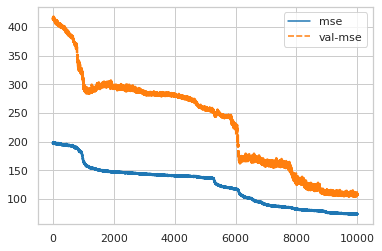

In [25]:
nn2.printStats()

In [26]:
nn2.model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 2ms/step - loss: 1514.3826 - mse: 1514.3826


[1514.382568359375, 1514.382568359375]

In [ ]:
nn2.train_model(x_train,y_train,10000)

Epoch 1/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.5215 - mse: 73.5215 - val_loss: 106.7008 - val_mse: 106.7008
Epoch 2/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.6692 - mse: 73.6692 - val_loss: 106.2435 - val_mse: 106.2435
Epoch 3/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.8705 - mse: 73.8705 - val_loss: 109.1141 - val_mse: 109.1141
Epoch 4/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.3483 - mse: 73.3483 - val_loss: 111.1909 - val_mse: 111.1909
Epoch 5/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.6243 - mse: 73.6243 - val_loss: 107.7590 - val_mse: 107.7590
Epoch 6/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.4521 - mse: 73.4521 - val_loss: 110.7160 - val_mse: 110.7160
Epoch 7/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.9712 - mse: 73.9712 - val_loss: 107.4503 - val_mse: 107.4503
Epoch 8/10000

Epoch 59/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.5995 - mse: 73.5995 - val_loss: 107.0835 - val_mse: 107.0835
Epoch 60/10000
210/210 [==============================] - 0s 1ms/step - loss: 73.5105 - mse: 73.5105 - val_loss: 105.4640 - val_mse: 105.4640
Epoch 61/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.0944 - mse: 73.0944 - val_loss: 106.1277 - val_mse: 106.1277
Epoch 62/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.4855 - mse: 73.4855 - val_loss: 105.1086 - val_mse: 105.1086
Epoch 63/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.1823 - mse: 73.1823 - val_loss: 106.2135 - val_mse: 106.2135
Epoch 64/10000
210/210 [==============================] - 0s 1ms/step - loss: 73.1398 - mse: 73.1398 - val_loss: 107.1963 - val_mse: 107.1963
Epoch 65/10000
210/210 [==============================] - 0s 1ms/step - loss: 73.9599 - mse: 73.9599 - val_loss: 108.1282 - val_mse: 108.1282
Epoch 

210/210 [==============================] - 0s 2ms/step - loss: 72.8492 - mse: 72.8492 - val_loss: 107.0947 - val_mse: 107.0947
Epoch 174/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.0989 - mse: 73.0989 - val_loss: 106.4917 - val_mse: 106.4917
Epoch 175/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.0865 - mse: 73.0865 - val_loss: 106.3880 - val_mse: 106.3880
Epoch 176/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.2473 - mse: 73.2473 - val_loss: 104.9430 - val_mse: 104.9430
Epoch 177/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.0210 - mse: 73.0210 - val_loss: 107.0046 - val_mse: 107.0046
Epoch 178/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.9729 - mse: 72.9729 - val_loss: 107.4180 - val_mse: 107.4180
Epoch 179/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.3945 - mse: 73.3945 - val_loss: 103.1577 - val_mse: 103.1577
Epoch 180/10000

210/210 [==============================] - 0s 2ms/step - loss: 72.8780 - mse: 72.8780 - val_loss: 104.5400 - val_mse: 104.5400
Epoch 288/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.8154 - mse: 72.8154 - val_loss: 106.3902 - val_mse: 106.3902
Epoch 289/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.7798 - mse: 72.7798 - val_loss: 107.1322 - val_mse: 107.1322
Epoch 290/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.1777 - mse: 73.1777 - val_loss: 103.5884 - val_mse: 103.5884
Epoch 291/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.5479 - mse: 72.5479 - val_loss: 105.7266 - val_mse: 105.7266
Epoch 292/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.8584 - mse: 72.8584 - val_loss: 106.2168 - val_mse: 106.2168
Epoch 293/10000
210/210 [==============================] - 0s 2ms/step - loss: 73.0299 - mse: 73.0299 - val_loss: 104.6145 - val_mse: 104.6145
Epoch 294/10000

210/210 [==============================] - 0s 2ms/step - loss: 73.1138 - mse: 73.1138 - val_loss: 101.5449 - val_mse: 101.5449
Epoch 402/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.4359 - mse: 72.4359 - val_loss: 100.3316 - val_mse: 100.3316
Epoch 403/10000
210/210 [==============================] - 0s 1ms/step - loss: 72.1018 - mse: 72.1018 - val_loss: 103.1110 - val_mse: 103.1110
Epoch 404/10000
210/210 [==============================] - 0s 1ms/step - loss: 72.8111 - mse: 72.8111 - val_loss: 101.9823 - val_mse: 101.9823
Epoch 405/10000
210/210 [==============================] - 0s 1ms/step - loss: 72.0504 - mse: 72.0504 - val_loss: 101.4369 - val_mse: 101.4369
Epoch 406/10000
210/210 [==============================] - 0s 1ms/step - loss: 72.5116 - mse: 72.5116 - val_loss: 103.6286 - val_mse: 103.6286
Epoch 407/10000
210/210 [==============================] - 0s 1ms/step - loss: 72.5272 - mse: 72.5272 - val_loss: 100.4717 - val_mse: 100.4717
Epoch 408/10000

210/210 [==============================] - 0s 2ms/step - loss: 72.2380 - mse: 72.2380 - val_loss: 100.7956 - val_mse: 100.7956
Epoch 516/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.5976 - mse: 72.5976 - val_loss: 99.6405 - val_mse: 99.6405
Epoch 517/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.6080 - mse: 72.6080 - val_loss: 102.5226 - val_mse: 102.5226
Epoch 518/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.2651 - mse: 72.2651 - val_loss: 101.2553 - val_mse: 101.2553
Epoch 519/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.4617 - mse: 72.4617 - val_loss: 99.9439 - val_mse: 99.9439
Epoch 520/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.2871 - mse: 72.2871 - val_loss: 98.9788 - val_mse: 98.9788
Epoch 521/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.2904 - mse: 72.2904 - val_loss: 102.7449 - val_mse: 102.7449
Epoch 522/10000
210/2

Epoch 573/10000
210/210 [==============================] - 0s 1ms/step - loss: 72.0169 - mse: 72.0169 - val_loss: 99.6982 - val_mse: 99.6982
Epoch 574/10000
210/210 [==============================] - 0s 1ms/step - loss: 72.6446 - mse: 72.6446 - val_loss: 102.8390 - val_mse: 102.8390
Epoch 575/10000
210/210 [==============================] - 0s 1ms/step - loss: 71.9845 - mse: 71.9845 - val_loss: 98.1754 - val_mse: 98.1754
Epoch 576/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.3312 - mse: 72.3312 - val_loss: 98.4871 - val_mse: 98.4871
Epoch 577/10000
210/210 [==============================] - 0s 1ms/step - loss: 72.1840 - mse: 72.1840 - val_loss: 98.0703 - val_mse: 98.0703
Epoch 578/10000
210/210 [==============================] - 0s 1ms/step - loss: 72.7837 - mse: 72.7837 - val_loss: 100.9936 - val_mse: 100.9936
Epoch 579/10000
210/210 [==============================] - 0s 1ms/step - loss: 72.4664 - mse: 72.4664 - val_loss: 98.6757 - val_mse: 98.6757
Epoch 580

Epoch 688/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.7404 - mse: 71.7404 - val_loss: 98.6638 - val_mse: 98.6638
Epoch 689/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.1894 - mse: 72.1894 - val_loss: 98.0725 - val_mse: 98.0725
Epoch 690/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.6726 - mse: 71.6726 - val_loss: 99.8039 - val_mse: 99.8039
Epoch 691/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.6045 - mse: 72.6045 - val_loss: 101.6981 - val_mse: 101.6981
Epoch 692/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.8752 - mse: 71.8752 - val_loss: 99.7558 - val_mse: 99.7558
Epoch 693/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.2873 - mse: 72.2873 - val_loss: 100.0086 - val_mse: 100.0086
Epoch 694/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.5407 - mse: 72.5407 - val_loss: 100.9547 - val_mse: 100.9547
Epoch 6

Epoch 746/10000
210/210 [==============================] - 0s 1ms/step - loss: 71.7880 - mse: 71.7880 - val_loss: 103.1389 - val_mse: 103.1389
Epoch 747/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.0512 - mse: 72.0512 - val_loss: 97.8904 - val_mse: 97.8904
Epoch 748/10000
210/210 [==============================] - 0s 1ms/step - loss: 71.9157 - mse: 71.9157 - val_loss: 100.7557 - val_mse: 100.7557
Epoch 749/10000
210/210 [==============================] - 0s 1ms/step - loss: 72.1559 - mse: 72.1559 - val_loss: 99.2542 - val_mse: 99.2542
Epoch 750/10000
210/210 [==============================] - 0s 1ms/step - loss: 72.6483 - mse: 72.6483 - val_loss: 98.6875 - val_mse: 98.6875
Epoch 751/10000
210/210 [==============================] - 0s 1ms/step - loss: 71.9201 - mse: 71.9201 - val_loss: 99.8043 - val_mse: 99.8043
Epoch 752/10000
210/210 [==============================] - 0s 1ms/step - loss: 71.9538 - mse: 71.9538 - val_loss: 95.9871 - val_mse: 95.9871
Epoch 753

Epoch 804/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.6023 - mse: 71.6023 - val_loss: 100.0134 - val_mse: 100.0134
Epoch 805/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.9611 - mse: 71.9611 - val_loss: 97.6895 - val_mse: 97.6895
Epoch 806/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.9256 - mse: 71.9256 - val_loss: 98.0560 - val_mse: 98.0560
Epoch 807/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.9567 - mse: 71.9567 - val_loss: 102.8634 - val_mse: 102.8634
Epoch 808/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.2219 - mse: 72.2219 - val_loss: 99.0913 - val_mse: 99.0913
Epoch 809/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.1019 - mse: 72.1019 - val_loss: 96.8742 - val_mse: 96.8742
Epoch 810/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.1797 - mse: 72.1797 - val_loss: 98.1381 - val_mse: 98.1381
Epoch 811

Epoch 862/10000
210/210 [==============================] - 0s 2ms/step - loss: 72.2194 - mse: 72.2194 - val_loss: 97.8434 - val_mse: 97.8434
Epoch 863/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.4492 - mse: 71.4492 - val_loss: 97.2485 - val_mse: 97.2485
Epoch 864/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.5754 - mse: 71.5754 - val_loss: 99.4699 - val_mse: 99.4699
Epoch 865/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.7238 - mse: 71.7238 - val_loss: 98.0711 - val_mse: 98.0711
Epoch 866/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.5600 - mse: 71.5600 - val_loss: 100.3689 - val_mse: 100.3689
Epoch 867/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.5917 - mse: 71.5917 - val_loss: 98.8885 - val_mse: 98.8885
Epoch 868/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.7828 - mse: 71.7828 - val_loss: 96.2888 - val_mse: 96.2888
Epoch 869/1

210/210 [==============================] - 0s 2ms/step - loss: 71.8585 - mse: 71.8585 - val_loss: 95.7502 - val_mse: 95.7502
Epoch 921/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.1721 - mse: 71.1721 - val_loss: 100.7599 - val_mse: 100.7599
Epoch 922/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.6919 - mse: 71.6919 - val_loss: 95.6717 - val_mse: 95.6717
Epoch 923/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.8406 - mse: 71.8406 - val_loss: 95.3966 - val_mse: 95.3966
Epoch 924/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.7896 - mse: 71.7896 - val_loss: 99.7364 - val_mse: 99.7364
Epoch 925/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.8387 - mse: 71.8387 - val_loss: 100.1381 - val_mse: 100.1381
Epoch 926/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.7430 - mse: 71.7430 - val_loss: 96.2814 - val_mse: 96.2814
Epoch 927/10000
210/210 [

Epoch 1036/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.4280 - mse: 71.4280 - val_loss: 97.1440 - val_mse: 97.1440
Epoch 1037/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.3811 - mse: 71.3811 - val_loss: 97.3655 - val_mse: 97.3655
Epoch 1038/10000
210/210 [==============================] - 0s 1ms/step - loss: 71.0969 - mse: 71.0969 - val_loss: 103.3804 - val_mse: 103.3804
Epoch 1039/10000
210/210 [==============================] - 0s 1ms/step - loss: 71.4916 - mse: 71.4916 - val_loss: 95.5894 - val_mse: 95.5894
Epoch 1040/10000
210/210 [==============================] - 0s 1ms/step - loss: 71.4287 - mse: 71.4287 - val_loss: 95.9006 - val_mse: 95.9006
Epoch 1041/10000
210/210 [==============================] - 0s 1ms/step - loss: 71.2660 - mse: 71.2660 - val_loss: 95.8939 - val_mse: 95.8939
Epoch 1042/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.6726 - mse: 71.6726 - val_loss: 97.4393 - val_mse: 97.4393
Epoc

Epoch 1151/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.4116 - mse: 71.4116 - val_loss: 94.4906 - val_mse: 94.4906
Epoch 1152/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.2597 - mse: 71.2597 - val_loss: 95.8707 - val_mse: 95.8707
Epoch 1153/10000
210/210 [==============================] - 0s 1ms/step - loss: 71.4081 - mse: 71.4081 - val_loss: 95.5863 - val_mse: 95.5863
Epoch 1154/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.5803 - mse: 71.5803 - val_loss: 95.6817 - val_mse: 95.6817
Epoch 1155/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.3375 - mse: 71.3375 - val_loss: 98.4690 - val_mse: 98.4690
Epoch 1156/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.1750 - mse: 71.1750 - val_loss: 96.1982 - val_mse: 96.1982
Epoch 1157/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.2577 - mse: 71.2577 - val_loss: 97.3795 - val_mse: 97.3795
Epoch 

Epoch 1266/10000
210/210 [==============================] - 0s 2ms/step - loss: 70.9369 - mse: 70.9369 - val_loss: 95.8010 - val_mse: 95.8010
Epoch 1267/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.1164 - mse: 71.1164 - val_loss: 95.0469 - val_mse: 95.0469
Epoch 1268/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.2370 - mse: 71.2370 - val_loss: 94.0528 - val_mse: 94.0528
Epoch 1269/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.4586 - mse: 71.4586 - val_loss: 94.7052 - val_mse: 94.7052
Epoch 1270/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.2740 - mse: 71.2740 - val_loss: 95.2211 - val_mse: 95.2211
Epoch 1271/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.1733 - mse: 71.1733 - val_loss: 97.2411 - val_mse: 97.2411
Epoch 1272/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.2762 - mse: 71.2762 - val_loss: 95.2975 - val_mse: 95.2975
Epoch 

Epoch 1381/10000
210/210 [==============================] - 0s 1ms/step - loss: 71.0881 - mse: 71.0881 - val_loss: 96.2837 - val_mse: 96.2837
Epoch 1382/10000
210/210 [==============================] - 0s 2ms/step - loss: 71.0445 - mse: 71.0445 - val_loss: 96.1785 - val_mse: 96.1785
Epoch 1383/10000
210/210 [==============================] - 0s 1ms/step - loss: 71.0419 - mse: 71.0419 - val_loss: 97.1771 - val_mse: 97.1771
Epoch 1384/10000
210/210 [==============================] - 0s 1ms/step - loss: 71.1277 - mse: 71.1277 - val_loss: 95.8130 - val_mse: 95.8130
Epoch 1385/10000
210/210 [==============================] - 0s 1ms/step - loss: 70.6930 - mse: 70.6930 - val_loss: 97.0800 - val_mse: 97.0800
Epoch 1386/10000
210/210 [==============================] - 0s 1ms/step - loss: 71.0226 - mse: 71.0226 - val_loss: 94.1842 - val_mse: 94.1842
Epoch 1387/10000
210/210 [==============================] - 0s 1ms/step - loss: 70.8632 - mse: 70.8632 - val_loss: 96.7851 - val_mse: 96.7851
Epoch 

Epoch 1496/10000
210/210 [==============================] - 0s 2ms/step - loss: 70.1701 - mse: 70.1701 - val_loss: 95.0070 - val_mse: 95.0070
Epoch 1497/10000
210/210 [==============================] - 0s 2ms/step - loss: 70.4158 - mse: 70.4158 - val_loss: 90.9159 - val_mse: 90.9159
Epoch 1498/10000
210/210 [==============================] - 0s 2ms/step - loss: 70.2917 - mse: 70.2917 - val_loss: 88.4317 - val_mse: 88.4317
Epoch 1499/10000
210/210 [==============================] - 0s 2ms/step - loss: 70.1967 - mse: 70.1967 - val_loss: 89.6969 - val_mse: 89.6969
Epoch 1500/10000
210/210 [==============================] - 0s 2ms/step - loss: 70.9418 - mse: 70.9418 - val_loss: 90.0273 - val_mse: 90.0273
Epoch 1501/10000
210/210 [==============================] - 0s 2ms/step - loss: 70.2993 - mse: 70.2993 - val_loss: 92.7306 - val_mse: 92.7306
Epoch 1502/10000
210/210 [==============================] - 0s 2ms/step - loss: 70.0380 - mse: 70.0380 - val_loss: 89.4671 - val_mse: 89.4671
Epoch 

Epoch 1611/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.6308 - mse: 69.6308 - val_loss: 89.1261 - val_mse: 89.1261
Epoch 1612/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.5912 - mse: 69.5912 - val_loss: 87.4662 - val_mse: 87.4662
Epoch 1613/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.6984 - mse: 69.6984 - val_loss: 89.7981 - val_mse: 89.7981
Epoch 1614/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.2357 - mse: 69.2357 - val_loss: 87.3579 - val_mse: 87.3579
Epoch 1615/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.8531 - mse: 69.8531 - val_loss: 87.4538 - val_mse: 87.4538
Epoch 1616/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.5091 - mse: 69.5091 - val_loss: 88.3808 - val_mse: 88.3808
Epoch 1617/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.8034 - mse: 69.8034 - val_loss: 86.3464 - val_mse: 86.3464
Epoch 

Epoch 1726/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.6151 - mse: 69.6151 - val_loss: 85.5057 - val_mse: 85.5057
Epoch 1727/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.5301 - mse: 69.5301 - val_loss: 85.1776 - val_mse: 85.1776
Epoch 1728/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.1519 - mse: 69.1519 - val_loss: 87.3544 - val_mse: 87.3544
Epoch 1729/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.3204 - mse: 69.3204 - val_loss: 86.2003 - val_mse: 86.2003
Epoch 1730/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.3985 - mse: 69.3985 - val_loss: 87.5033 - val_mse: 87.5033
Epoch 1731/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.6727 - mse: 69.6727 - val_loss: 86.7777 - val_mse: 86.7777
Epoch 1732/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.2061 - mse: 69.2061 - val_loss: 83.6957 - val_mse: 83.6957
Epoch 

Epoch 1784/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.0577 - mse: 69.0577 - val_loss: 86.4084 - val_mse: 86.4084
Epoch 1785/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.7819 - mse: 68.7819 - val_loss: 83.7004 - val_mse: 83.7004
Epoch 1786/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.5087 - mse: 69.5087 - val_loss: 85.8551 - val_mse: 85.8551
Epoch 1787/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.1551 - mse: 69.1551 - val_loss: 82.6826 - val_mse: 82.6826
Epoch 1788/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.6491 - mse: 69.6491 - val_loss: 85.5406 - val_mse: 85.5406
Epoch 1789/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.7702 - mse: 68.7702 - val_loss: 86.0713 - val_mse: 86.0713
Epoch 1790/10000
210/210 [==============================] - 0s 1ms/step - loss: 69.3697 - mse: 69.3697 - val_loss: 86.1825 - val_mse: 86.1825
Epoch 

Epoch 1842/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.0350 - mse: 69.0350 - val_loss: 82.5083 - val_mse: 82.5083
Epoch 1843/10000
210/210 [==============================] - 0s 1ms/step - loss: 68.9751 - mse: 68.9751 - val_loss: 83.8256 - val_mse: 83.8256
Epoch 1844/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.9943 - mse: 68.9943 - val_loss: 87.5270 - val_mse: 87.5270
Epoch 1845/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.8873 - mse: 68.8873 - val_loss: 85.1267 - val_mse: 85.1267
Epoch 1846/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.1905 - mse: 69.1905 - val_loss: 83.9829 - val_mse: 83.9829
Epoch 1847/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.6102 - mse: 68.6102 - val_loss: 85.8876 - val_mse: 85.8876
Epoch 1848/10000
210/210 [==============================] - 0s 1ms/step - loss: 69.0990 - mse: 69.0990 - val_loss: 84.8282 - val_mse: 84.8282
Epoch 

Epoch 1900/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.6787 - mse: 68.6787 - val_loss: 84.8214 - val_mse: 84.8214
Epoch 1901/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.8878 - mse: 68.8878 - val_loss: 82.6698 - val_mse: 82.6698
Epoch 1902/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.8164 - mse: 68.8164 - val_loss: 83.2774 - val_mse: 83.2774
Epoch 1903/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.7056 - mse: 68.7056 - val_loss: 84.7579 - val_mse: 84.7579
Epoch 1904/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.3902 - mse: 68.3902 - val_loss: 84.0607 - val_mse: 84.0607
Epoch 1905/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.1403 - mse: 69.1403 - val_loss: 84.6653 - val_mse: 84.6653
Epoch 1906/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.5011 - mse: 68.5011 - val_loss: 84.7378 - val_mse: 84.7378
Epoch 

Epoch 1958/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.7237 - mse: 68.7237 - val_loss: 83.9626 - val_mse: 83.9626
Epoch 1959/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.5485 - mse: 68.5485 - val_loss: 84.7188 - val_mse: 84.7188
Epoch 1960/10000
210/210 [==============================] - 0s 1ms/step - loss: 68.9641 - mse: 68.9641 - val_loss: 87.6917 - val_mse: 87.6917
Epoch 1961/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.6384 - mse: 68.6384 - val_loss: 82.4745 - val_mse: 82.4745
Epoch 1962/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.3894 - mse: 68.3894 - val_loss: 81.7131 - val_mse: 81.7131
Epoch 1963/10000
210/210 [==============================] - 0s 2ms/step - loss: 69.2502 - mse: 69.2502 - val_loss: 84.3367 - val_mse: 84.3367
Epoch 1964/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.4100 - mse: 68.4100 - val_loss: 86.3639 - val_mse: 86.3639
Epoch 

Epoch 2016/10000
210/210 [==============================] - 0s 1ms/step - loss: 68.4468 - mse: 68.4468 - val_loss: 84.6433 - val_mse: 84.6433
Epoch 2017/10000
210/210 [==============================] - 0s 1ms/step - loss: 68.0663 - mse: 68.0663 - val_loss: 79.9836 - val_mse: 79.9836
Epoch 2018/10000
210/210 [==============================] - 0s 1ms/step - loss: 68.6568 - mse: 68.6568 - val_loss: 84.1017 - val_mse: 84.1017
Epoch 2019/10000
210/210 [==============================] - 0s 1ms/step - loss: 68.5733 - mse: 68.5733 - val_loss: 81.8252 - val_mse: 81.8252
Epoch 2020/10000
210/210 [==============================] - 0s 1ms/step - loss: 68.1153 - mse: 68.1153 - val_loss: 80.0820 - val_mse: 80.0820
Epoch 2021/10000
210/210 [==============================] - 0s 1ms/step - loss: 68.4903 - mse: 68.4903 - val_loss: 81.8763 - val_mse: 81.8763
Epoch 2022/10000
210/210 [==============================] - 0s 1ms/step - loss: 68.7774 - mse: 68.7774 - val_loss: 83.3240 - val_mse: 83.3240
Epoch 

Epoch 2074/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.9781 - mse: 67.9781 - val_loss: 86.7869 - val_mse: 86.7869
Epoch 2075/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.2600 - mse: 68.2600 - val_loss: 81.9923 - val_mse: 81.9923
Epoch 2076/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.3525 - mse: 68.3525 - val_loss: 82.0077 - val_mse: 82.0077
Epoch 2077/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.5060 - mse: 68.5060 - val_loss: 81.4351 - val_mse: 81.4351
Epoch 2078/10000
210/210 [==============================] - 0s 1ms/step - loss: 68.4220 - mse: 68.4220 - val_loss: 81.9526 - val_mse: 81.9526
Epoch 2079/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.6444 - mse: 67.6444 - val_loss: 79.7688 - val_mse: 79.7688
Epoch 2080/10000
210/210 [==============================] - 0s 2ms/step - loss: 68.3882 - mse: 68.3882 - val_loss: 84.4310 - val_mse: 84.4310
Epoch 

Epoch 2189/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.6613 - mse: 67.6613 - val_loss: 80.2863 - val_mse: 80.2863
Epoch 2190/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.6285 - mse: 67.6285 - val_loss: 83.6247 - val_mse: 83.6247
Epoch 2191/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.9610 - mse: 67.9610 - val_loss: 80.7508 - val_mse: 80.7508
Epoch 2192/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.7733 - mse: 67.7733 - val_loss: 78.5121 - val_mse: 78.5121
Epoch 2193/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.5816 - mse: 67.5816 - val_loss: 79.9921 - val_mse: 79.9921
Epoch 2194/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.9341 - mse: 67.9341 - val_loss: 82.6333 - val_mse: 82.6333
Epoch 2195/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.7383 - mse: 67.7383 - val_loss: 80.2485 - val_mse: 80.2485
Epoch 

Epoch 2304/10000
210/210 [==============================] - 0s 1ms/step - loss: 67.2955 - mse: 67.2955 - val_loss: 80.5355 - val_mse: 80.5355
Epoch 2305/10000
210/210 [==============================] - 0s 1ms/step - loss: 67.6716 - mse: 67.6716 - val_loss: 78.2513 - val_mse: 78.2513
Epoch 2306/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.8291 - mse: 67.8291 - val_loss: 77.4722 - val_mse: 77.4722
Epoch 2307/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.2877 - mse: 67.2877 - val_loss: 81.5159 - val_mse: 81.5159
Epoch 2308/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.3438 - mse: 67.3438 - val_loss: 78.3895 - val_mse: 78.3895
Epoch 2309/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.4028 - mse: 67.4028 - val_loss: 79.1158 - val_mse: 79.1158
Epoch 2310/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.2107 - mse: 67.2107 - val_loss: 78.4383 - val_mse: 78.4383
Epoch 

Epoch 2362/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.9792 - mse: 66.9792 - val_loss: 77.9234 - val_mse: 77.9234
Epoch 2363/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.4117 - mse: 67.4117 - val_loss: 76.7375 - val_mse: 76.7375
Epoch 2364/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.0069 - mse: 67.0069 - val_loss: 77.5145 - val_mse: 77.5145
Epoch 2365/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.1299 - mse: 67.1299 - val_loss: 79.0815 - val_mse: 79.0815
Epoch 2366/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.3774 - mse: 67.3774 - val_loss: 78.0300 - val_mse: 78.0300
Epoch 2367/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.1519 - mse: 67.1519 - val_loss: 77.1387 - val_mse: 77.1387
Epoch 2368/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.1396 - mse: 67.1396 - val_loss: 76.9692 - val_mse: 76.9692
Epoch 

Epoch 2477/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.0331 - mse: 67.0331 - val_loss: 79.3549 - val_mse: 79.3549
Epoch 2478/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.9755 - mse: 66.9755 - val_loss: 79.6882 - val_mse: 79.6882
Epoch 2479/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.9819 - mse: 66.9819 - val_loss: 79.3101 - val_mse: 79.3101
Epoch 2480/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.1893 - mse: 67.1893 - val_loss: 78.4675 - val_mse: 78.4675
Epoch 2481/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.9804 - mse: 66.9804 - val_loss: 80.0236 - val_mse: 80.0236
Epoch 2482/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.2038 - mse: 67.2038 - val_loss: 78.7616 - val_mse: 78.7616
Epoch 2483/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.6715 - mse: 66.6715 - val_loss: 78.0987 - val_mse: 78.0987
Epoch 

Epoch 2535/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.5527 - mse: 66.5527 - val_loss: 82.1831 - val_mse: 82.1831
Epoch 2536/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.2040 - mse: 67.2040 - val_loss: 78.8372 - val_mse: 78.8372
Epoch 2537/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.8304 - mse: 66.8304 - val_loss: 79.5737 - val_mse: 79.5737
Epoch 2538/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.1442 - mse: 67.1442 - val_loss: 78.6272 - val_mse: 78.6272
Epoch 2539/10000
210/210 [==============================] - 1s 3ms/step - loss: 67.0828 - mse: 67.0828 - val_loss: 81.2961 - val_mse: 81.2961
Epoch 2540/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.6956 - mse: 66.6956 - val_loss: 77.4016 - val_mse: 77.4016
Epoch 2541/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.8006 - mse: 66.8006 - val_loss: 80.9018 - val_mse: 80.9018
Epoch 

Epoch 2650/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.7468 - mse: 66.7468 - val_loss: 78.5484 - val_mse: 78.5484
Epoch 2651/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.7973 - mse: 66.7973 - val_loss: 78.2124 - val_mse: 78.2124
Epoch 2652/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.8144 - mse: 66.8144 - val_loss: 80.5730 - val_mse: 80.5730
Epoch 2653/10000
210/210 [==============================] - 0s 2ms/step - loss: 67.0001 - mse: 67.0001 - val_loss: 79.8722 - val_mse: 79.8722
Epoch 2654/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.6184 - mse: 66.6184 - val_loss: 78.2874 - val_mse: 78.2874
Epoch 2655/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.7448 - mse: 66.7448 - val_loss: 79.4539 - val_mse: 79.4539
Epoch 2656/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.5815 - mse: 66.5815 - val_loss: 79.6012 - val_mse: 79.6012
Epoch 

Epoch 2708/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.7633 - mse: 66.7633 - val_loss: 78.9437 - val_mse: 78.9437
Epoch 2709/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.5762 - mse: 66.5762 - val_loss: 80.0344 - val_mse: 80.0344
Epoch 2710/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.5222 - mse: 66.5222 - val_loss: 78.4921 - val_mse: 78.4921
Epoch 2711/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.8022 - mse: 66.8022 - val_loss: 79.8385 - val_mse: 79.8385
Epoch 2712/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.4725 - mse: 66.4725 - val_loss: 80.6909 - val_mse: 80.6909
Epoch 2713/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.3066 - mse: 66.3066 - val_loss: 81.9529 - val_mse: 81.9529
Epoch 2714/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.7528 - mse: 66.7528 - val_loss: 78.6128 - val_mse: 78.6128
Epoch 

Epoch 2766/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.4495 - mse: 66.4495 - val_loss: 78.6227 - val_mse: 78.6227
Epoch 2767/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.5130 - mse: 66.5130 - val_loss: 78.4793 - val_mse: 78.4793
Epoch 2768/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.6892 - mse: 66.6892 - val_loss: 78.5465 - val_mse: 78.5465
Epoch 2769/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.3360 - mse: 66.3360 - val_loss: 78.0711 - val_mse: 78.0711
Epoch 2770/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.5777 - mse: 66.5777 - val_loss: 82.5363 - val_mse: 82.5363
Epoch 2771/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.1758 - mse: 66.1758 - val_loss: 77.6373 - val_mse: 77.6373
Epoch 2772/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.6581 - mse: 66.6581 - val_loss: 79.8383 - val_mse: 79.8383
Epoch 

Epoch 2824/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.5149 - mse: 66.5149 - val_loss: 77.5393 - val_mse: 77.5393
Epoch 2825/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.0694 - mse: 66.0694 - val_loss: 78.6164 - val_mse: 78.6164
Epoch 2826/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.4025 - mse: 66.4025 - val_loss: 80.9819 - val_mse: 80.9819
Epoch 2827/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.3613 - mse: 66.3613 - val_loss: 78.6737 - val_mse: 78.6737
Epoch 2828/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.4852 - mse: 66.4852 - val_loss: 77.5794 - val_mse: 77.5794
Epoch 2829/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.5654 - mse: 66.5654 - val_loss: 79.5153 - val_mse: 79.5153
Epoch 2830/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.9321 - mse: 66.9321 - val_loss: 79.9944 - val_mse: 79.9944
Epoch 

Epoch 2882/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.4926 - mse: 66.4926 - val_loss: 77.6236 - val_mse: 77.6236
Epoch 2883/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.3566 - mse: 66.3566 - val_loss: 78.5756 - val_mse: 78.5756
Epoch 2884/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.3467 - mse: 66.3467 - val_loss: 76.0102 - val_mse: 76.0102
Epoch 2885/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.5229 - mse: 66.5229 - val_loss: 79.0836 - val_mse: 79.0836
Epoch 2886/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.1272 - mse: 66.1272 - val_loss: 77.7502 - val_mse: 77.7502
Epoch 2887/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.4877 - mse: 66.4877 - val_loss: 79.1648 - val_mse: 79.1648
Epoch 2888/10000
210/210 [==============================] - 1s 3ms/step - loss: 66.4903 - mse: 66.4903 - val_loss: 77.4322 - val_mse: 77.4322
Epoch 

Epoch 2940/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.7178 - mse: 66.7178 - val_loss: 78.7732 - val_mse: 78.7732
Epoch 2941/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.2120 - mse: 66.2120 - val_loss: 79.9128 - val_mse: 79.9128
Epoch 2942/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.5639 - mse: 66.5639 - val_loss: 79.0591 - val_mse: 79.0591
Epoch 2943/10000
210/210 [==============================] - 1s 3ms/step - loss: 66.1037 - mse: 66.1037 - val_loss: 76.5343 - val_mse: 76.5343
Epoch 2944/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.5897 - mse: 66.5897 - val_loss: 78.1662 - val_mse: 78.1662
Epoch 2945/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.2314 - mse: 66.2314 - val_loss: 79.9246 - val_mse: 79.9246
Epoch 2946/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.2790 - mse: 66.2790 - val_loss: 79.1235 - val_mse: 79.1235
Epoch 

Epoch 2998/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.5294 - mse: 66.5294 - val_loss: 77.4773 - val_mse: 77.4773
Epoch 2999/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.9936 - mse: 65.9936 - val_loss: 77.1605 - val_mse: 77.1605
Epoch 3000/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.3649 - mse: 66.3649 - val_loss: 77.0803 - val_mse: 77.0803
Epoch 3001/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.3186 - mse: 66.3186 - val_loss: 79.1980 - val_mse: 79.1980
Epoch 3002/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.0596 - mse: 66.0596 - val_loss: 77.1815 - val_mse: 77.1815
Epoch 3003/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.2348 - mse: 66.2348 - val_loss: 76.4317 - val_mse: 76.4317
Epoch 3004/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.0721 - mse: 66.0721 - val_loss: 78.6853 - val_mse: 78.6853
Epoch 

Epoch 3056/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.1031 - mse: 66.1031 - val_loss: 78.6322 - val_mse: 78.6322
Epoch 3057/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.3628 - mse: 66.3628 - val_loss: 78.4127 - val_mse: 78.4127
Epoch 3058/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.3208 - mse: 66.3208 - val_loss: 78.9367 - val_mse: 78.9367
Epoch 3059/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.2519 - mse: 66.2519 - val_loss: 78.6766 - val_mse: 78.6766
Epoch 3060/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.1064 - mse: 66.1064 - val_loss: 81.4644 - val_mse: 81.4644
Epoch 3061/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.1705 - mse: 66.1705 - val_loss: 76.8718 - val_mse: 76.8718
Epoch 3062/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.9732 - mse: 65.9732 - val_loss: 79.1957 - val_mse: 79.1957
Epoch 

Epoch 3171/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.2027 - mse: 66.2027 - val_loss: 78.2897 - val_mse: 78.2897
Epoch 3172/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.0666 - mse: 66.0666 - val_loss: 74.5741 - val_mse: 74.5741
Epoch 3173/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.0790 - mse: 66.0790 - val_loss: 79.4931 - val_mse: 79.4931
Epoch 3174/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.9840 - mse: 65.9840 - val_loss: 78.1036 - val_mse: 78.1036
Epoch 3175/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.0443 - mse: 66.0443 - val_loss: 78.2315 - val_mse: 78.2315
Epoch 3176/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.9497 - mse: 65.9497 - val_loss: 77.7386 - val_mse: 77.7386
Epoch 3177/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.1186 - mse: 66.1186 - val_loss: 75.5083 - val_mse: 75.5083
Epoch 

Epoch 3286/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.8894 - mse: 65.8894 - val_loss: 76.2448 - val_mse: 76.2448
Epoch 3287/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.4382 - mse: 65.4382 - val_loss: 76.6108 - val_mse: 76.6108
Epoch 3288/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.9694 - mse: 65.9694 - val_loss: 76.3474 - val_mse: 76.3474
Epoch 3289/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.7356 - mse: 65.7356 - val_loss: 78.1472 - val_mse: 78.1472
Epoch 3290/10000
210/210 [==============================] - 0s 2ms/step - loss: 66.2624 - mse: 66.2624 - val_loss: 76.4088 - val_mse: 76.4088
Epoch 3291/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.8224 - mse: 65.8224 - val_loss: 75.1537 - val_mse: 75.1537
Epoch 3292/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.8216 - mse: 65.8216 - val_loss: 77.4431 - val_mse: 77.4431
Epoch 

Epoch 3401/10000
210/210 [==============================] - 1s 3ms/step - loss: 65.8621 - mse: 65.8621 - val_loss: 77.5035 - val_mse: 77.5035
Epoch 3402/10000
210/210 [==============================] - 1s 3ms/step - loss: 65.9871 - mse: 65.9871 - val_loss: 76.4291 - val_mse: 76.4291
Epoch 3403/10000
210/210 [==============================] - 1s 3ms/step - loss: 65.7004 - mse: 65.7004 - val_loss: 78.5641 - val_mse: 78.5641
Epoch 3404/10000
210/210 [==============================] - 1s 3ms/step - loss: 65.6373 - mse: 65.6373 - val_loss: 77.3785 - val_mse: 77.3785
Epoch 3405/10000
210/210 [==============================] - 1s 3ms/step - loss: 65.8605 - mse: 65.8605 - val_loss: 77.2697 - val_mse: 77.2697
Epoch 3406/10000
210/210 [==============================] - 1s 3ms/step - loss: 65.7984 - mse: 65.7984 - val_loss: 78.7102 - val_mse: 78.7102
Epoch 3407/10000
210/210 [==============================] - 1s 3ms/step - loss: 65.7421 - mse: 65.7421 - val_loss: 78.9607 - val_mse: 78.9607
Epoch 

Epoch 3516/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.6392 - mse: 65.6392 - val_loss: 77.0875 - val_mse: 77.0875
Epoch 3517/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.9167 - mse: 65.9167 - val_loss: 78.3979 - val_mse: 78.3979
Epoch 3518/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.1733 - mse: 65.1733 - val_loss: 77.9273 - val_mse: 77.9273
Epoch 3519/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.6298 - mse: 65.6298 - val_loss: 77.4162 - val_mse: 77.4162
Epoch 3520/10000
210/210 [==============================] - 1s 2ms/step - loss: 65.6221 - mse: 65.6221 - val_loss: 77.9450 - val_mse: 77.9450
Epoch 3521/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.4340 - mse: 65.4340 - val_loss: 76.8450 - val_mse: 76.8450
Epoch 3522/10000
210/210 [==============================] - 1s 2ms/step - loss: 65.6113 - mse: 65.6113 - val_loss: 77.8946 - val_mse: 77.8946
Epoch 

Epoch 3631/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.4962 - mse: 65.4962 - val_loss: 78.3270 - val_mse: 78.3270
Epoch 3632/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.1833 - mse: 65.1833 - val_loss: 76.0379 - val_mse: 76.0379
Epoch 3633/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.4014 - mse: 65.4014 - val_loss: 77.7070 - val_mse: 77.7070
Epoch 3634/10000
210/210 [==============================] - 1s 3ms/step - loss: 64.9867 - mse: 64.9867 - val_loss: 79.5420 - val_mse: 79.5420
Epoch 3635/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.5120 - mse: 65.5120 - val_loss: 77.8788 - val_mse: 77.8788
Epoch 3636/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.7460 - mse: 65.7460 - val_loss: 78.4439 - val_mse: 78.4439
Epoch 3637/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.6582 - mse: 65.6582 - val_loss: 77.5249 - val_mse: 77.5249
Epoch 

Epoch 3746/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.2076 - mse: 65.2076 - val_loss: 76.3308 - val_mse: 76.3308
Epoch 3747/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.2017 - mse: 65.2017 - val_loss: 78.6233 - val_mse: 78.6233
Epoch 3748/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.9701 - mse: 64.9701 - val_loss: 77.1858 - val_mse: 77.1858
Epoch 3749/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.8916 - mse: 65.8916 - val_loss: 78.2215 - val_mse: 78.2215
Epoch 3750/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.1825 - mse: 65.1825 - val_loss: 76.9753 - val_mse: 76.9753
Epoch 3751/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.8539 - mse: 64.8539 - val_loss: 77.4562 - val_mse: 77.4562
Epoch 3752/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.1133 - mse: 65.1133 - val_loss: 78.0925 - val_mse: 78.0925
Epoch 

Epoch 3804/10000
210/210 [==============================] - 1s 3ms/step - loss: 65.0572 - mse: 65.0572 - val_loss: 78.5530 - val_mse: 78.5530
Epoch 3805/10000
210/210 [==============================] - 1s 3ms/step - loss: 65.5454 - mse: 65.5454 - val_loss: 77.8010 - val_mse: 77.8010
Epoch 3806/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.0125 - mse: 65.0125 - val_loss: 78.9725 - val_mse: 78.9725
Epoch 3807/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.9237 - mse: 64.9237 - val_loss: 77.4419 - val_mse: 77.4419
Epoch 3808/10000
210/210 [==============================] - 1s 2ms/step - loss: 65.4034 - mse: 65.4034 - val_loss: 78.0499 - val_mse: 78.0499
Epoch 3809/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.0117 - mse: 65.0117 - val_loss: 76.4952 - val_mse: 76.4952
Epoch 3810/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.6647 - mse: 65.6647 - val_loss: 77.8632 - val_mse: 77.8632
Epoch 

Epoch 3862/10000
210/210 [==============================] - 1s 3ms/step - loss: 65.4679 - mse: 65.4679 - val_loss: 77.6454 - val_mse: 77.6454
Epoch 3863/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.2106 - mse: 65.2106 - val_loss: 77.2039 - val_mse: 77.2039
Epoch 3864/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.0834 - mse: 65.0834 - val_loss: 75.5135 - val_mse: 75.5135
Epoch 3865/10000
210/210 [==============================] - 1s 4ms/step - loss: 65.0981 - mse: 65.0981 - val_loss: 76.5358 - val_mse: 76.5358
Epoch 3866/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.5158 - mse: 65.5158 - val_loss: 77.0592 - val_mse: 77.0592
Epoch 3867/10000
210/210 [==============================] - 1s 3ms/step - loss: 64.8309 - mse: 64.8309 - val_loss: 77.1474 - val_mse: 77.1474
Epoch 3868/10000
210/210 [==============================] - 1s 3ms/step - loss: 65.5695 - mse: 65.5695 - val_loss: 77.6208 - val_mse: 77.6208
Epoch 

Epoch 3920/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.9124 - mse: 64.9124 - val_loss: 76.1727 - val_mse: 76.1727
Epoch 3921/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.2869 - mse: 65.2869 - val_loss: 77.1654 - val_mse: 77.1654
Epoch 3922/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.0434 - mse: 65.0434 - val_loss: 76.6228 - val_mse: 76.6228
Epoch 3923/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.2306 - mse: 65.2306 - val_loss: 78.1022 - val_mse: 78.1022
Epoch 3924/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.3082 - mse: 65.3082 - val_loss: 78.4601 - val_mse: 78.4601
Epoch 3925/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.5246 - mse: 65.5246 - val_loss: 78.3074 - val_mse: 78.3074
Epoch 3926/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.0230 - mse: 65.0230 - val_loss: 78.3722 - val_mse: 78.3722
Epoch 

Epoch 3978/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.0860 - mse: 65.0860 - val_loss: 78.6999 - val_mse: 78.6999
Epoch 3979/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.2974 - mse: 65.2974 - val_loss: 78.9559 - val_mse: 78.9559
Epoch 3980/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.7446 - mse: 64.7446 - val_loss: 77.4535 - val_mse: 77.4535
Epoch 3981/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.3144 - mse: 65.3144 - val_loss: 78.1131 - val_mse: 78.1131
Epoch 3982/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.6759 - mse: 64.6759 - val_loss: 77.9525 - val_mse: 77.9525
Epoch 3983/10000
210/210 [==============================] - 1s 3ms/step - loss: 65.2095 - mse: 65.2095 - val_loss: 77.6871 - val_mse: 77.6871
Epoch 3984/10000
210/210 [==============================] - 0s 2ms/step - loss: 65.1233 - mse: 65.1233 - val_loss: 77.8539 - val_mse: 77.8539
Epoch 

Epoch 4036/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.8242 - mse: 64.8242 - val_loss: 75.2246 - val_mse: 75.2246
Epoch 4037/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.6057 - mse: 64.6057 - val_loss: 78.6741 - val_mse: 78.6741
Epoch 4038/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.6183 - mse: 64.6183 - val_loss: 75.7486 - val_mse: 75.7486
Epoch 4039/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.7676 - mse: 64.7676 - val_loss: 75.7289 - val_mse: 75.7289
Epoch 4040/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.8944 - mse: 64.8944 - val_loss: 76.2548 - val_mse: 76.2548
Epoch 4041/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.6025 - mse: 64.6025 - val_loss: 77.5663 - val_mse: 77.5663
Epoch 4042/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.7111 - mse: 64.7111 - val_loss: 77.2809 - val_mse: 77.2809
Epoch 

Epoch 4094/10000
210/210 [==============================] - 1s 3ms/step - loss: 64.2723 - mse: 64.2723 - val_loss: 79.2162 - val_mse: 79.2162
Epoch 4095/10000
210/210 [==============================] - 1s 3ms/step - loss: 63.9746 - mse: 63.9746 - val_loss: 76.2834 - val_mse: 76.2834
Epoch 4096/10000
210/210 [==============================] - 1s 2ms/step - loss: 64.7533 - mse: 64.7533 - val_loss: 75.1795 - val_mse: 75.1795
Epoch 4097/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.2855 - mse: 64.2855 - val_loss: 75.5156 - val_mse: 75.5156
Epoch 4098/10000
210/210 [==============================] - 1s 2ms/step - loss: 64.8037 - mse: 64.8037 - val_loss: 74.9426 - val_mse: 74.9426
Epoch 4099/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.4707 - mse: 64.4707 - val_loss: 74.7963 - val_mse: 74.7963
Epoch 4100/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.1649 - mse: 64.1649 - val_loss: 77.7423 - val_mse: 77.7423
Epoch 

Epoch 4209/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.8025 - mse: 64.8025 - val_loss: 78.2179 - val_mse: 78.2179
Epoch 4210/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.3997 - mse: 64.3997 - val_loss: 76.6134 - val_mse: 76.6134
Epoch 4211/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.1189 - mse: 64.1189 - val_loss: 77.0720 - val_mse: 77.0720
Epoch 4212/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.5095 - mse: 64.5095 - val_loss: 76.3912 - val_mse: 76.3912
Epoch 4213/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.0934 - mse: 64.0934 - val_loss: 76.9898 - val_mse: 76.9898
Epoch 4214/10000
210/210 [==============================] - 0s 2ms/step - loss: 64.0028 - mse: 64.0028 - val_loss: 77.1626 - val_mse: 77.1626
Epoch 4215/10000
210/210 [==============================] - 0s 1ms/step - loss: 64.4370 - mse: 64.4370 - val_loss: 77.2350 - val_mse: 77.2350
Epoch 

Epoch 4267/10000
210/210 [==============================] - 0s 2ms/step - loss: 63.6915 - mse: 63.6915 - val_loss: 76.1347 - val_mse: 76.1347
Epoch 4268/10000
210/210 [==============================] - 0s 2ms/step - loss: 63.8422 - mse: 63.8422 - val_loss: 78.3917 - val_mse: 78.3917
Epoch 4269/10000
210/210 [==============================] - 0s 2ms/step - loss: 63.8741 - mse: 63.8741 - val_loss: 76.0325 - val_mse: 76.0325
Epoch 4270/10000
210/210 [==============================] - 0s 2ms/step - loss: 63.8032 - mse: 63.8032 - val_loss: 78.3187 - val_mse: 78.3187
Epoch 4271/10000
210/210 [==============================] - 0s 2ms/step - loss: 63.1204 - mse: 63.1204 - val_loss: 77.2302 - val_mse: 77.2302
Epoch 4272/10000
210/210 [==============================] - 0s 2ms/step - loss: 63.6883 - mse: 63.6883 - val_loss: 78.2487 - val_mse: 78.2487
Epoch 4273/10000
210/210 [==============================] - 0s 2ms/step - loss: 63.9214 - mse: 63.9214 - val_loss: 77.7805 - val_mse: 77.7805
Epoch 

Epoch 4382/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.9169 - mse: 62.9169 - val_loss: 81.0028 - val_mse: 81.0028
Epoch 4383/10000
210/210 [==============================] - 0s 2ms/step - loss: 63.2846 - mse: 63.2846 - val_loss: 79.9036 - val_mse: 79.9036
Epoch 4384/10000
210/210 [==============================] - 0s 2ms/step - loss: 63.0025 - mse: 63.0025 - val_loss: 80.8626 - val_mse: 80.8626
Epoch 4385/10000
210/210 [==============================] - 0s 2ms/step - loss: 63.1130 - mse: 63.1130 - val_loss: 81.5363 - val_mse: 81.5363
Epoch 4386/10000
210/210 [==============================] - 0s 2ms/step - loss: 63.0495 - mse: 63.0495 - val_loss: 79.2689 - val_mse: 79.2689
Epoch 4387/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.7796 - mse: 62.7796 - val_loss: 80.4548 - val_mse: 80.4548
Epoch 4388/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.9960 - mse: 62.9960 - val_loss: 82.2136 - val_mse: 82.2136
Epoch 

Epoch 4440/10000
210/210 [==============================] - 1s 3ms/step - loss: 63.1170 - mse: 63.1170 - val_loss: 80.7857 - val_mse: 80.7857
Epoch 4441/10000
210/210 [==============================] - 1s 4ms/step - loss: 62.6702 - mse: 62.6702 - val_loss: 82.4635 - val_mse: 82.4635
Epoch 4442/10000
210/210 [==============================] - 1s 3ms/step - loss: 62.8866 - mse: 62.8866 - val_loss: 80.9912 - val_mse: 80.9912
Epoch 4443/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.8340 - mse: 62.8340 - val_loss: 81.2455 - val_mse: 81.2455
Epoch 4444/10000
210/210 [==============================] - 1s 3ms/step - loss: 62.9862 - mse: 62.9862 - val_loss: 81.8118 - val_mse: 81.8118
Epoch 4445/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.8975 - mse: 62.8975 - val_loss: 81.9388 - val_mse: 81.9388
Epoch 4446/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.7058 - mse: 62.7058 - val_loss: 81.3138 - val_mse: 81.3138
Epoch 

Epoch 4498/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.6194 - mse: 62.6194 - val_loss: 81.5154 - val_mse: 81.5154
Epoch 4499/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.6686 - mse: 62.6686 - val_loss: 81.9089 - val_mse: 81.9089
Epoch 4500/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.2740 - mse: 62.2740 - val_loss: 81.4530 - val_mse: 81.4530
Epoch 4501/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.6679 - mse: 62.6679 - val_loss: 83.2245 - val_mse: 83.2245
Epoch 4502/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.5561 - mse: 62.5561 - val_loss: 80.8281 - val_mse: 80.8281
Epoch 4503/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.8827 - mse: 62.8827 - val_loss: 81.9342 - val_mse: 81.9342
Epoch 4504/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.6953 - mse: 62.6953 - val_loss: 81.9486 - val_mse: 81.9486
Epoch 

Epoch 4613/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.6141 - mse: 62.6141 - val_loss: 83.3267 - val_mse: 83.3267
Epoch 4614/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.3392 - mse: 62.3392 - val_loss: 82.2651 - val_mse: 82.2651
Epoch 4615/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.4865 - mse: 62.4865 - val_loss: 83.2222 - val_mse: 83.2222
Epoch 4616/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.4858 - mse: 62.4858 - val_loss: 82.1793 - val_mse: 82.1793
Epoch 4617/10000
210/210 [==============================] - 1s 3ms/step - loss: 62.0027 - mse: 62.0027 - val_loss: 81.1390 - val_mse: 81.1390
Epoch 4618/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.4074 - mse: 62.4074 - val_loss: 82.4409 - val_mse: 82.4409
Epoch 4619/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.8471 - mse: 62.8471 - val_loss: 82.0571 - val_mse: 82.0571
Epoch 

Epoch 4671/10000
210/210 [==============================] - 0s 1ms/step - loss: 62.1817 - mse: 62.1817 - val_loss: 83.7759 - val_mse: 83.7759
Epoch 4672/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.4897 - mse: 62.4897 - val_loss: 82.8178 - val_mse: 82.8178
Epoch 4673/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.2149 - mse: 62.2149 - val_loss: 82.1173 - val_mse: 82.1173
Epoch 4674/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.9022 - mse: 62.9022 - val_loss: 81.9776 - val_mse: 81.9776
Epoch 4675/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.4021 - mse: 62.4021 - val_loss: 83.3214 - val_mse: 83.3214
Epoch 4676/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.3408 - mse: 62.3408 - val_loss: 82.2944 - val_mse: 82.2944
Epoch 4677/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.3392 - mse: 62.3392 - val_loss: 82.4860 - val_mse: 82.4860
Epoch 

Epoch 4729/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.8321 - mse: 61.8321 - val_loss: 82.7921 - val_mse: 82.7921
Epoch 4730/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.1784 - mse: 62.1784 - val_loss: 83.4009 - val_mse: 83.4009
Epoch 4731/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.4698 - mse: 62.4698 - val_loss: 81.7044 - val_mse: 81.7044
Epoch 4732/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.2008 - mse: 62.2008 - val_loss: 81.6167 - val_mse: 81.6167
Epoch 4733/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.3230 - mse: 62.3230 - val_loss: 81.8018 - val_mse: 81.8018
Epoch 4734/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.1709 - mse: 62.1709 - val_loss: 83.1459 - val_mse: 83.1459
Epoch 4735/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.1052 - mse: 62.1052 - val_loss: 82.6973 - val_mse: 82.6973
Epoch 

Epoch 4844/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.4538 - mse: 62.4538 - val_loss: 84.3852 - val_mse: 84.3852
Epoch 4845/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.1453 - mse: 62.1453 - val_loss: 84.4939 - val_mse: 84.4939
Epoch 4846/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.9498 - mse: 61.9498 - val_loss: 82.1791 - val_mse: 82.1791
Epoch 4847/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.9605 - mse: 61.9605 - val_loss: 82.7296 - val_mse: 82.7296
Epoch 4848/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.1986 - mse: 62.1986 - val_loss: 84.1861 - val_mse: 84.1861
Epoch 4849/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.4090 - mse: 62.4090 - val_loss: 82.3901 - val_mse: 82.3901
Epoch 4850/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.2749 - mse: 62.2749 - val_loss: 84.1976 - val_mse: 84.1976
Epoch 

Epoch 4902/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.9336 - mse: 61.9336 - val_loss: 83.8023 - val_mse: 83.8023
Epoch 4903/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.8971 - mse: 61.8971 - val_loss: 84.6394 - val_mse: 84.6394
Epoch 4904/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.9064 - mse: 61.9064 - val_loss: 82.1798 - val_mse: 82.1798
Epoch 4905/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.0010 - mse: 62.0010 - val_loss: 82.4695 - val_mse: 82.4695
Epoch 4906/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.3633 - mse: 62.3633 - val_loss: 83.0898 - val_mse: 83.0898
Epoch 4907/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.9924 - mse: 61.9924 - val_loss: 83.2407 - val_mse: 83.2407
Epoch 4908/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.8975 - mse: 61.8975 - val_loss: 82.5588 - val_mse: 82.5588
Epoch 

Epoch 4960/10000
210/210 [==============================] - 0s 1ms/step - loss: 61.7790 - mse: 61.7790 - val_loss: 84.0627 - val_mse: 84.0627
Epoch 4961/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.8537 - mse: 61.8537 - val_loss: 82.0559 - val_mse: 82.0559
Epoch 4962/10000
210/210 [==============================] - 0s 1ms/step - loss: 62.2905 - mse: 62.2905 - val_loss: 83.4868 - val_mse: 83.4868
Epoch 4963/10000
210/210 [==============================] - 0s 1ms/step - loss: 61.9032 - mse: 61.9032 - val_loss: 83.0975 - val_mse: 83.0975
Epoch 4964/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.0168 - mse: 62.0168 - val_loss: 82.5436 - val_mse: 82.5436
Epoch 4965/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.7592 - mse: 61.7592 - val_loss: 82.7994 - val_mse: 82.7994
Epoch 4966/10000
210/210 [==============================] - 0s 1ms/step - loss: 61.9798 - mse: 61.9798 - val_loss: 82.6613 - val_mse: 82.6613
Epoch 

Epoch 5018/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.3281 - mse: 62.3281 - val_loss: 83.2683 - val_mse: 83.2683
Epoch 5019/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.7802 - mse: 61.7802 - val_loss: 84.2524 - val_mse: 84.2524
Epoch 5020/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.8818 - mse: 61.8818 - val_loss: 84.2437 - val_mse: 84.2437
Epoch 5021/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.5793 - mse: 61.5793 - val_loss: 83.6540 - val_mse: 83.6540
Epoch 5022/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.6747 - mse: 61.6747 - val_loss: 82.7817 - val_mse: 82.7817
Epoch 5023/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.5879 - mse: 61.5879 - val_loss: 81.6322 - val_mse: 81.6322
Epoch 5024/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.1816 - mse: 62.1816 - val_loss: 84.0452 - val_mse: 84.0452
Epoch 

Epoch 5076/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.7224 - mse: 61.7224 - val_loss: 82.8414 - val_mse: 82.8414
Epoch 5077/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.7426 - mse: 61.7426 - val_loss: 85.4454 - val_mse: 85.4454
Epoch 5078/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.8730 - mse: 61.8730 - val_loss: 83.8362 - val_mse: 83.8362
Epoch 5079/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.1450 - mse: 62.1450 - val_loss: 84.7230 - val_mse: 84.7230
Epoch 5080/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.6682 - mse: 61.6682 - val_loss: 83.1858 - val_mse: 83.1858
Epoch 5081/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.8406 - mse: 61.8406 - val_loss: 84.0515 - val_mse: 84.0515
Epoch 5082/10000
210/210 [==============================] - 1s 2ms/step - loss: 61.6953 - mse: 61.6953 - val_loss: 86.2798 - val_mse: 86.2798
Epoch 

Epoch 5134/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.5949 - mse: 61.5949 - val_loss: 83.9012 - val_mse: 83.9012
Epoch 5135/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.2475 - mse: 61.2475 - val_loss: 83.5602 - val_mse: 83.5602
Epoch 5136/10000
210/210 [==============================] - 0s 1ms/step - loss: 61.7215 - mse: 61.7215 - val_loss: 82.6034 - val_mse: 82.6034
Epoch 5137/10000
210/210 [==============================] - 0s 1ms/step - loss: 61.6423 - mse: 61.6423 - val_loss: 84.3877 - val_mse: 84.3877
Epoch 5138/10000
210/210 [==============================] - 0s 1ms/step - loss: 61.8790 - mse: 61.8790 - val_loss: 84.6434 - val_mse: 84.6434
Epoch 5139/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.7985 - mse: 61.7985 - val_loss: 85.2011 - val_mse: 85.2011
Epoch 5140/10000
210/210 [==============================] - 0s 1ms/step - loss: 61.7150 - mse: 61.7150 - val_loss: 85.2724 - val_mse: 85.2724
Epoch 

Epoch 5249/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.9515 - mse: 61.9515 - val_loss: 83.7636 - val_mse: 83.7636
Epoch 5250/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.6032 - mse: 61.6032 - val_loss: 83.7453 - val_mse: 83.7453
Epoch 5251/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.5586 - mse: 61.5586 - val_loss: 85.3880 - val_mse: 85.3880
Epoch 5252/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.9171 - mse: 61.9171 - val_loss: 86.0655 - val_mse: 86.0655
Epoch 5253/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.3372 - mse: 61.3372 - val_loss: 83.9060 - val_mse: 83.9060
Epoch 5254/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.4913 - mse: 61.4913 - val_loss: 85.1640 - val_mse: 85.1640
Epoch 5255/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.5631 - mse: 61.5631 - val_loss: 84.4486 - val_mse: 84.4486
Epoch 

Epoch 5307/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.5320 - mse: 61.5320 - val_loss: 84.8790 - val_mse: 84.8790
Epoch 5308/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.2433 - mse: 61.2433 - val_loss: 86.5209 - val_mse: 86.5209
Epoch 5309/10000
210/210 [==============================] - 0s 2ms/step - loss: 62.0802 - mse: 62.0802 - val_loss: 84.4684 - val_mse: 84.4684
Epoch 5310/10000
210/210 [==============================] - 0s 1ms/step - loss: 61.6320 - mse: 61.6320 - val_loss: 83.6443 - val_mse: 83.6443
Epoch 5311/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.1118 - mse: 61.1118 - val_loss: 87.0156 - val_mse: 87.0156
Epoch 5312/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.5315 - mse: 61.5315 - val_loss: 83.2077 - val_mse: 83.2077
Epoch 5313/10000
210/210 [==============================] - 0s 1ms/step - loss: 61.5517 - mse: 61.5517 - val_loss: 83.2316 - val_mse: 83.2316
Epoch 

Epoch 5365/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.4641 - mse: 61.4641 - val_loss: 84.3562 - val_mse: 84.3562
Epoch 5366/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.4186 - mse: 61.4186 - val_loss: 85.6785 - val_mse: 85.6785
Epoch 5367/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.7286 - mse: 61.7286 - val_loss: 84.7094 - val_mse: 84.7094
Epoch 5368/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.2972 - mse: 61.2972 - val_loss: 85.0053 - val_mse: 85.0053
Epoch 5369/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.1377 - mse: 61.1377 - val_loss: 84.4198 - val_mse: 84.4198
Epoch 5370/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.4428 - mse: 61.4428 - val_loss: 85.1452 - val_mse: 85.1452
Epoch 5371/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.6421 - mse: 61.6421 - val_loss: 83.5003 - val_mse: 83.5003
Epoch 

Epoch 5423/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.1633 - mse: 61.1633 - val_loss: 83.5227 - val_mse: 83.5227
Epoch 5424/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.7353 - mse: 61.7353 - val_loss: 83.5260 - val_mse: 83.5260
Epoch 5425/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.1646 - mse: 61.1646 - val_loss: 83.0449 - val_mse: 83.0449
Epoch 5426/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.6489 - mse: 61.6489 - val_loss: 84.5641 - val_mse: 84.5641
Epoch 5427/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.1010 - mse: 61.1010 - val_loss: 84.4057 - val_mse: 84.4057
Epoch 5428/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.1848 - mse: 61.1848 - val_loss: 84.2768 - val_mse: 84.2768
Epoch 5429/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.7337 - mse: 61.7337 - val_loss: 83.2541 - val_mse: 83.2541
Epoch 

Epoch 5538/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.3002 - mse: 61.3002 - val_loss: 83.8653 - val_mse: 83.8653
Epoch 5539/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.1368 - mse: 61.1368 - val_loss: 82.9683 - val_mse: 82.9683
Epoch 5540/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.2859 - mse: 61.2859 - val_loss: 83.1957 - val_mse: 83.1957
Epoch 5541/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.2709 - mse: 61.2709 - val_loss: 83.1688 - val_mse: 83.1688
Epoch 5542/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.6368 - mse: 61.6368 - val_loss: 84.3264 - val_mse: 84.3264
Epoch 5543/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.1510 - mse: 61.1510 - val_loss: 83.3946 - val_mse: 83.3946
Epoch 5544/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.3110 - mse: 61.3110 - val_loss: 82.8428 - val_mse: 82.8428
Epoch 

Epoch 5596/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.0912 - mse: 61.0912 - val_loss: 83.1581 - val_mse: 83.1581
Epoch 5597/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.8832 - mse: 60.8832 - val_loss: 82.8930 - val_mse: 82.8930
Epoch 5598/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.2353 - mse: 61.2353 - val_loss: 83.9723 - val_mse: 83.9723
Epoch 5599/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.1320 - mse: 61.1320 - val_loss: 84.4487 - val_mse: 84.4487
Epoch 5600/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.5427 - mse: 61.5427 - val_loss: 83.3088 - val_mse: 83.3088
Epoch 5601/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.0092 - mse: 61.0092 - val_loss: 83.1949 - val_mse: 83.1949
Epoch 5602/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.5631 - mse: 61.5631 - val_loss: 83.7212 - val_mse: 83.7212
Epoch 

Epoch 5654/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.0187 - mse: 61.0187 - val_loss: 85.6549 - val_mse: 85.6549
Epoch 5655/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.9775 - mse: 60.9775 - val_loss: 84.7831 - val_mse: 84.7831
Epoch 5656/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.4045 - mse: 61.4045 - val_loss: 85.0454 - val_mse: 85.0454
Epoch 5657/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.3332 - mse: 61.3332 - val_loss: 86.4901 - val_mse: 86.4901
Epoch 5658/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.0546 - mse: 61.0546 - val_loss: 86.8483 - val_mse: 86.8483
Epoch 5659/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.3634 - mse: 61.3634 - val_loss: 87.2086 - val_mse: 87.2086
Epoch 5660/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.0702 - mse: 61.0702 - val_loss: 85.6728 - val_mse: 85.6728
Epoch 

Epoch 5769/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.1043 - mse: 61.1043 - val_loss: 85.1169 - val_mse: 85.1169
Epoch 5770/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.5009 - mse: 61.5009 - val_loss: 84.7066 - val_mse: 84.7066
Epoch 5771/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.2190 - mse: 61.2190 - val_loss: 86.3355 - val_mse: 86.3355
Epoch 5772/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.7636 - mse: 60.7636 - val_loss: 85.6290 - val_mse: 85.6290
Epoch 5773/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.2473 - mse: 61.2473 - val_loss: 87.2465 - val_mse: 87.2465
Epoch 5774/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.2225 - mse: 61.2225 - val_loss: 84.9269 - val_mse: 84.9269
Epoch 5775/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.0570 - mse: 61.0570 - val_loss: 86.3417 - val_mse: 86.3417
Epoch 

Epoch 5884/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.0004 - mse: 61.0004 - val_loss: 86.8621 - val_mse: 86.8621
Epoch 5885/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.7749 - mse: 60.7749 - val_loss: 87.1005 - val_mse: 87.1005
Epoch 5886/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.8759 - mse: 60.8759 - val_loss: 88.6841 - val_mse: 88.6841
Epoch 5887/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.9539 - mse: 60.9539 - val_loss: 85.6305 - val_mse: 85.6305
Epoch 5888/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.7281 - mse: 60.7281 - val_loss: 86.6535 - val_mse: 86.6535
Epoch 5889/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.8441 - mse: 60.8441 - val_loss: 87.1139 - val_mse: 87.1139
Epoch 5890/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.8984 - mse: 60.8984 - val_loss: 86.5229 - val_mse: 86.5229
Epoch 

Epoch 5942/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3400 - mse: 60.3400 - val_loss: 85.7274 - val_mse: 85.7274
Epoch 5943/10000
210/210 [==============================] - 0s 1ms/step - loss: 60.8540 - mse: 60.8540 - val_loss: 86.2680 - val_mse: 86.2680
Epoch 5944/10000
210/210 [==============================] - 0s 1ms/step - loss: 60.7969 - mse: 60.7969 - val_loss: 86.7100 - val_mse: 86.7100
Epoch 5945/10000
210/210 [==============================] - 0s 1ms/step - loss: 60.6187 - mse: 60.6187 - val_loss: 87.6797 - val_mse: 87.6797
Epoch 5946/10000
210/210 [==============================] - 0s 1ms/step - loss: 61.0548 - mse: 61.0548 - val_loss: 86.3137 - val_mse: 86.3137
Epoch 5947/10000
210/210 [==============================] - 0s 1ms/step - loss: 60.4431 - mse: 60.4431 - val_loss: 86.7778 - val_mse: 86.7778
Epoch 5948/10000
210/210 [==============================] - 0s 1ms/step - loss: 60.7116 - mse: 60.7116 - val_loss: 87.9795 - val_mse: 87.9795
Epoch 

Epoch 6000/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.4274 - mse: 60.4274 - val_loss: 86.5638 - val_mse: 86.5638
Epoch 6001/10000
210/210 [==============================] - 0s 1ms/step - loss: 60.4421 - mse: 60.4421 - val_loss: 86.1848 - val_mse: 86.1848
Epoch 6002/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.7042 - mse: 60.7042 - val_loss: 85.8075 - val_mse: 85.8075
Epoch 6003/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.5773 - mse: 60.5773 - val_loss: 86.2029 - val_mse: 86.2029
Epoch 6004/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2259 - mse: 60.2259 - val_loss: 86.3178 - val_mse: 86.3178
Epoch 6005/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.2414 - mse: 61.2414 - val_loss: 86.3642 - val_mse: 86.3642
Epoch 6006/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.5744 - mse: 60.5744 - val_loss: 84.5578 - val_mse: 84.5578
Epoch 

Epoch 6058/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.7613 - mse: 60.7613 - val_loss: 84.9504 - val_mse: 84.9504
Epoch 6059/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1728 - mse: 60.1728 - val_loss: 88.2144 - val_mse: 88.2144
Epoch 6060/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.7412 - mse: 60.7412 - val_loss: 87.0801 - val_mse: 87.0801
Epoch 6061/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.6884 - mse: 60.6884 - val_loss: 85.5368 - val_mse: 85.5368
Epoch 6062/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2768 - mse: 60.2768 - val_loss: 85.6267 - val_mse: 85.6267
Epoch 6063/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.5337 - mse: 60.5337 - val_loss: 86.8592 - val_mse: 86.8592
Epoch 6064/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.5746 - mse: 60.5746 - val_loss: 84.9390 - val_mse: 84.9390
Epoch 

Epoch 6116/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2643 - mse: 60.2643 - val_loss: 86.5992 - val_mse: 86.5992
Epoch 6117/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.8116 - mse: 60.8116 - val_loss: 85.4595 - val_mse: 85.4595
Epoch 6118/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1798 - mse: 60.1798 - val_loss: 84.5810 - val_mse: 84.5810
Epoch 6119/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.6762 - mse: 60.6762 - val_loss: 87.3388 - val_mse: 87.3388
Epoch 6120/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.6843 - mse: 60.6843 - val_loss: 84.6852 - val_mse: 84.6852
Epoch 6121/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.5736 - mse: 60.5736 - val_loss: 86.8947 - val_mse: 86.8947
Epoch 6122/10000
210/210 [==============================] - 0s 2ms/step - loss: 61.1352 - mse: 61.1352 - val_loss: 86.6610 - val_mse: 86.6610
Epoch 

Epoch 6231/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2639 - mse: 60.2639 - val_loss: 86.5716 - val_mse: 86.5716
Epoch 6232/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.4337 - mse: 60.4337 - val_loss: 85.3909 - val_mse: 85.3909
Epoch 6233/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2010 - mse: 60.2010 - val_loss: 86.0567 - val_mse: 86.0567
Epoch 6234/10000
210/210 [==============================] - 0s 1ms/step - loss: 60.5950 - mse: 60.5950 - val_loss: 84.6754 - val_mse: 84.6754
Epoch 6235/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.5580 - mse: 60.5580 - val_loss: 83.4535 - val_mse: 83.4535
Epoch 6236/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.7608 - mse: 60.7608 - val_loss: 83.3047 - val_mse: 83.3047
Epoch 6237/10000
210/210 [==============================] - 0s 1ms/step - loss: 60.4520 - mse: 60.4520 - val_loss: 84.4258 - val_mse: 84.4258
Epoch 

Epoch 6289/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2295 - mse: 60.2295 - val_loss: 84.6398 - val_mse: 84.6398
Epoch 6290/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.5373 - mse: 60.5373 - val_loss: 87.0573 - val_mse: 87.0573
Epoch 6291/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.4075 - mse: 60.4075 - val_loss: 84.1549 - val_mse: 84.1549
Epoch 6292/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.8685 - mse: 60.8685 - val_loss: 85.7880 - val_mse: 85.7880
Epoch 6293/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.5296 - mse: 60.5296 - val_loss: 83.6362 - val_mse: 83.6362
Epoch 6294/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1200 - mse: 60.1200 - val_loss: 84.7572 - val_mse: 84.7572
Epoch 6295/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.6193 - mse: 60.6193 - val_loss: 84.4193 - val_mse: 84.4193
Epoch 

Epoch 6347/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3518 - mse: 60.3518 - val_loss: 86.2452 - val_mse: 86.2452
Epoch 6348/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.7004 - mse: 60.7004 - val_loss: 85.9223 - val_mse: 85.9223
Epoch 6349/10000
210/210 [==============================] - 0s 1ms/step - loss: 60.2590 - mse: 60.2590 - val_loss: 84.5028 - val_mse: 84.5028
Epoch 6350/10000
210/210 [==============================] - 0s 1ms/step - loss: 60.3733 - mse: 60.3733 - val_loss: 84.0533 - val_mse: 84.0533
Epoch 6351/10000
210/210 [==============================] - 0s 1ms/step - loss: 60.1876 - mse: 60.1876 - val_loss: 83.8085 - val_mse: 83.8085
Epoch 6352/10000
210/210 [==============================] - 0s 1ms/step - loss: 60.6032 - mse: 60.6032 - val_loss: 85.5380 - val_mse: 85.5380
Epoch 6353/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3561 - mse: 60.3561 - val_loss: 84.7333 - val_mse: 84.7333
Epoch 

Epoch 6462/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.7998 - mse: 60.7998 - val_loss: 85.2418 - val_mse: 85.2418
Epoch 6463/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3720 - mse: 60.3720 - val_loss: 85.6502 - val_mse: 85.6502
Epoch 6464/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.0780 - mse: 60.0780 - val_loss: 84.6490 - val_mse: 84.6490
Epoch 6465/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1590 - mse: 60.1590 - val_loss: 86.3251 - val_mse: 86.3251
Epoch 6466/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1048 - mse: 60.1048 - val_loss: 84.6228 - val_mse: 84.6228
Epoch 6467/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.6065 - mse: 60.6065 - val_loss: 83.5422 - val_mse: 83.5422
Epoch 6468/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.7313 - mse: 60.7313 - val_loss: 83.7689 - val_mse: 83.7689
Epoch 

Epoch 6520/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1696 - mse: 60.1696 - val_loss: 84.0814 - val_mse: 84.0814
Epoch 6521/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.4777 - mse: 60.4777 - val_loss: 84.5172 - val_mse: 84.5172
Epoch 6522/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3732 - mse: 60.3732 - val_loss: 84.5779 - val_mse: 84.5779
Epoch 6523/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.4803 - mse: 60.4803 - val_loss: 85.1663 - val_mse: 85.1663
Epoch 6524/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2349 - mse: 60.2349 - val_loss: 85.7530 - val_mse: 85.7530
Epoch 6525/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.0125 - mse: 60.0125 - val_loss: 83.9335 - val_mse: 83.9335
Epoch 6526/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3806 - mse: 60.3806 - val_loss: 84.3934 - val_mse: 84.3934
Epoch 

Epoch 6578/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1762 - mse: 60.1762 - val_loss: 84.6997 - val_mse: 84.6997
Epoch 6579/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.0929 - mse: 60.0929 - val_loss: 83.1591 - val_mse: 83.1591
Epoch 6580/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.9657 - mse: 60.9657 - val_loss: 83.9411 - val_mse: 83.9411
Epoch 6581/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.9178 - mse: 59.9178 - val_loss: 84.9237 - val_mse: 84.9237
Epoch 6582/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2711 - mse: 60.2711 - val_loss: 84.1391 - val_mse: 84.1391
Epoch 6583/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.7096 - mse: 59.7096 - val_loss: 86.8752 - val_mse: 86.8752
Epoch 6584/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3428 - mse: 60.3428 - val_loss: 84.9118 - val_mse: 84.9118
Epoch 

Epoch 6636/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2828 - mse: 60.2828 - val_loss: 84.6763 - val_mse: 84.6763
Epoch 6637/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.8045 - mse: 59.8045 - val_loss: 85.0099 - val_mse: 85.0099
Epoch 6638/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.4649 - mse: 60.4649 - val_loss: 84.0404 - val_mse: 84.0404
Epoch 6639/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3377 - mse: 60.3377 - val_loss: 84.7173 - val_mse: 84.7173
Epoch 6640/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.0884 - mse: 60.0884 - val_loss: 84.3565 - val_mse: 84.3565
Epoch 6641/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.4539 - mse: 60.4539 - val_loss: 85.0319 - val_mse: 85.0319
Epoch 6642/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2431 - mse: 60.2431 - val_loss: 83.9990 - val_mse: 83.9990
Epoch 

Epoch 6694/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3491 - mse: 60.3491 - val_loss: 84.7591 - val_mse: 84.7591
Epoch 6695/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.4229 - mse: 60.4229 - val_loss: 83.4777 - val_mse: 83.4777
Epoch 6696/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.9287 - mse: 60.9287 - val_loss: 84.7395 - val_mse: 84.7395
Epoch 6697/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2464 - mse: 60.2464 - val_loss: 84.6418 - val_mse: 84.6418
Epoch 6698/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.9615 - mse: 59.9615 - val_loss: 84.3366 - val_mse: 84.3366
Epoch 6699/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2098 - mse: 60.2098 - val_loss: 86.0739 - val_mse: 86.0739
Epoch 6700/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.5221 - mse: 60.5221 - val_loss: 84.5441 - val_mse: 84.5441
Epoch 

Epoch 6752/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.8834 - mse: 59.8834 - val_loss: 84.3756 - val_mse: 84.3756
Epoch 6753/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3130 - mse: 60.3130 - val_loss: 84.0957 - val_mse: 84.0957
Epoch 6754/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.0866 - mse: 60.0866 - val_loss: 84.8828 - val_mse: 84.8828
Epoch 6755/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1721 - mse: 60.1721 - val_loss: 83.9100 - val_mse: 83.9100
Epoch 6756/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3820 - mse: 60.3820 - val_loss: 85.5402 - val_mse: 85.5402
Epoch 6757/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1252 - mse: 60.1252 - val_loss: 85.8548 - val_mse: 85.8548
Epoch 6758/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.4519 - mse: 60.4519 - val_loss: 85.5525 - val_mse: 85.5525
Epoch 

Epoch 6867/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.9202 - mse: 59.9202 - val_loss: 84.6344 - val_mse: 84.6344
Epoch 6868/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3314 - mse: 60.3314 - val_loss: 84.7688 - val_mse: 84.7688
Epoch 6869/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.6396 - mse: 60.6396 - val_loss: 84.8035 - val_mse: 84.8035
Epoch 6870/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1337 - mse: 60.1337 - val_loss: 84.1787 - val_mse: 84.1787
Epoch 6871/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2559 - mse: 60.2559 - val_loss: 84.7627 - val_mse: 84.7627
Epoch 6872/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.0584 - mse: 60.0584 - val_loss: 85.6732 - val_mse: 85.6732
Epoch 6873/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3922 - mse: 60.3922 - val_loss: 86.1182 - val_mse: 86.1182
Epoch 

Epoch 6982/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.9875 - mse: 59.9875 - val_loss: 85.4999 - val_mse: 85.4999
Epoch 6983/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.7519 - mse: 59.7519 - val_loss: 86.5123 - val_mse: 86.5123
Epoch 6984/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2782 - mse: 60.2782 - val_loss: 84.9328 - val_mse: 84.9328
Epoch 6985/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1320 - mse: 60.1320 - val_loss: 85.5198 - val_mse: 85.5198
Epoch 6986/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1516 - mse: 60.1516 - val_loss: 84.3026 - val_mse: 84.3026
Epoch 6987/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.7017 - mse: 59.7017 - val_loss: 86.3218 - val_mse: 86.3218
Epoch 6988/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3258 - mse: 60.3258 - val_loss: 85.8875 - val_mse: 85.8875
Epoch 

Epoch 7040/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.8133 - mse: 59.8133 - val_loss: 84.6475 - val_mse: 84.6475
Epoch 7041/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.0895 - mse: 60.0895 - val_loss: 84.8382 - val_mse: 84.8382
Epoch 7042/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.0430 - mse: 60.0430 - val_loss: 84.6054 - val_mse: 84.6054
Epoch 7043/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.9117 - mse: 59.9117 - val_loss: 83.7128 - val_mse: 83.7128
Epoch 7044/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2128 - mse: 60.2128 - val_loss: 85.9421 - val_mse: 85.9421
Epoch 7045/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.9639 - mse: 59.9639 - val_loss: 84.8858 - val_mse: 84.8858
Epoch 7046/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.8783 - mse: 59.8783 - val_loss: 85.6777 - val_mse: 85.6777
Epoch 

Epoch 7098/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.7630 - mse: 59.7630 - val_loss: 84.5763 - val_mse: 84.5763
Epoch 7099/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.9379 - mse: 59.9379 - val_loss: 85.3881 - val_mse: 85.3881
Epoch 7100/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.8550 - mse: 59.8550 - val_loss: 84.8409 - val_mse: 84.8409
Epoch 7101/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.8404 - mse: 59.8404 - val_loss: 85.2160 - val_mse: 85.2160
Epoch 7102/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.4680 - mse: 60.4680 - val_loss: 84.9246 - val_mse: 84.9246
Epoch 7103/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.8696 - mse: 59.8696 - val_loss: 85.4886 - val_mse: 85.4886
Epoch 7104/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1864 - mse: 60.1864 - val_loss: 85.3634 - val_mse: 85.3634
Epoch 

Epoch 7156/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.6788 - mse: 59.6788 - val_loss: 83.9458 - val_mse: 83.9458
Epoch 7157/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1515 - mse: 60.1515 - val_loss: 85.4975 - val_mse: 85.4975
Epoch 7158/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.1327 - mse: 60.1327 - val_loss: 84.7389 - val_mse: 84.7389
Epoch 7159/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.0322 - mse: 60.0322 - val_loss: 84.5993 - val_mse: 84.5993
Epoch 7160/10000
210/210 [==============================] - 0s 1ms/step - loss: 59.7751 - mse: 59.7751 - val_loss: 85.3796 - val_mse: 85.3796
Epoch 7161/10000
210/210 [==============================] - 0s 1ms/step - loss: 60.3213 - mse: 60.3213 - val_loss: 83.9498 - val_mse: 83.9498
Epoch 7162/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.2467 - mse: 60.2467 - val_loss: 85.5293 - val_mse: 85.5293
Epoch 

Epoch 7214/10000
210/210 [==============================] - 0s 2ms/step - loss: 60.3394 - mse: 60.3394 - val_loss: 85.7534 - val_mse: 85.7534
Epoch 7215/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.9537 - mse: 59.9537 - val_loss: 83.4333 - val_mse: 83.4333
Epoch 7216/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.7709 - mse: 59.7709 - val_loss: 85.2665 - val_mse: 85.2665
Epoch 7217/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.9466 - mse: 59.9466 - val_loss: 83.7518 - val_mse: 83.7518
Epoch 7218/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.9474 - mse: 59.9474 - val_loss: 85.0997 - val_mse: 85.0997
Epoch 7219/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.7170 - mse: 59.7170 - val_loss: 83.3064 - val_mse: 83.3064
Epoch 7220/10000
210/210 [==============================] - 0s 2ms/step - loss: 59.9719 - mse: 59.9719 - val_loss: 86.3804 - val_mse: 86.3804
Epoch 

In [7]:
nn3 = NNModel(0.0001,4,10000)
nn3.createLRModel(len(x_train[0]))
nn3.train_model(x_train,y_train,1000)

Epoch 1/1000
210/210 [==============================] - 1s 3ms/step - loss: 7483.5923 - mse: 7483.5923 - mae: 34.5107 - val_loss: 1454.0063 - val_mse: 1454.0063 - val_mae: 26.2867
Epoch 2/1000
210/210 [==============================] - 0s 2ms/step - loss: 7480.2529 - mse: 7480.2529 - mae: 34.4694 - val_loss: 1448.7733 - val_mse: 1448.7733 - val_mae: 26.2113
Epoch 3/1000
210/210 [==============================] - 0s 2ms/step - loss: 7468.7617 - mse: 7468.7617 - mae: 34.3354 - val_loss: 1438.2174 - val_mse: 1438.2174 - val_mae: 26.0344
Epoch 4/1000
210/210 [==============================] - 0s 2ms/step - loss: 7451.4941 - mse: 7451.4941 - mae: 34.1185 - val_loss: 1423.2266 - val_mse: 1423.2266 - val_mae: 25.7614
Epoch 5/1000
210/210 [==============================] - 0s 2ms/step - loss: 7431.7837 - mse: 7431.7837 - mae: 33.8394 - val_loss: 1408.0487 - val_mse: 1408.0487 - val_mae: 25.4816
Epoch 6/1000
210/210 [==============================] - 0s 2ms/step - loss: 7409.9614 - mse: 7409.96

210/210 [==============================] - 0s 2ms/step - loss: 5515.4473 - mse: 5515.4473 - mae: 20.9071 - val_loss: 431.4228 - val_mse: 431.4228 - val_mae: 12.9661
Epoch 47/1000
210/210 [==============================] - 0s 2ms/step - loss: 5465.8896 - mse: 5465.8896 - mae: 20.7892 - val_loss: 420.2075 - val_mse: 420.2075 - val_mae: 12.8698
Epoch 48/1000
210/210 [==============================] - 0s 1ms/step - loss: 5421.9937 - mse: 5421.9937 - mae: 20.7172 - val_loss: 410.7129 - val_mse: 410.7129 - val_mae: 12.7969
Epoch 49/1000
210/210 [==============================] - 0s 2ms/step - loss: 5379.6089 - mse: 5379.6089 - mae: 20.6254 - val_loss: 401.6558 - val_mse: 401.6558 - val_mae: 12.7489
Epoch 50/1000
210/210 [==============================] - 0s 2ms/step - loss: 5334.1514 - mse: 5334.1514 - mae: 20.5403 - val_loss: 392.6877 - val_mse: 392.6877 - val_mae: 12.7260
Epoch 51/1000
210/210 [==============================] - 0s 2ms/step - loss: 5290.5635 - mse: 5290.5635 - mae: 20.4276 

Epoch 92/1000
210/210 [==============================] - 0s 2ms/step - loss: 4212.6558 - mse: 4212.6558 - mae: 18.8997 - val_loss: 307.0015 - val_mse: 307.0015 - val_mae: 12.8294
Epoch 93/1000
210/210 [==============================] - 0s 1ms/step - loss: 4197.3716 - mse: 4197.3716 - mae: 18.9183 - val_loss: 308.3742 - val_mse: 308.3742 - val_mae: 12.8551
Epoch 94/1000
210/210 [==============================] - 0s 2ms/step - loss: 4183.1763 - mse: 4183.1763 - mae: 18.7340 - val_loss: 308.0336 - val_mse: 308.0336 - val_mae: 12.8358
Epoch 95/1000
210/210 [==============================] - 0s 2ms/step - loss: 4167.4443 - mse: 4167.4443 - mae: 18.8359 - val_loss: 310.5656 - val_mse: 310.5656 - val_mae: 12.8931
Epoch 96/1000
210/210 [==============================] - 0s 2ms/step - loss: 4155.3853 - mse: 4155.3853 - mae: 18.7545 - val_loss: 311.8828 - val_mse: 311.8828 - val_mae: 12.9218
Epoch 97/1000
210/210 [==============================] - 0s 2ms/step - loss: 4140.6328 - mse: 4140.6328 -

In [9]:
nn3.train_model(x_train,y_train,10000,10000)

Epoch 1/10000
210/210 [==============================] - 0s 2ms/step - loss: 3479.5493 - mse: 3479.5493 - mae: 20.2251 - val_loss: 407.8849 - val_mse: 407.8849 - val_mae: 15.1041
Epoch 2/10000
210/210 [==============================] - 0s 2ms/step - loss: 3476.6401 - mse: 3476.6401 - mae: 20.1308 - val_loss: 402.8693 - val_mse: 402.8693 - val_mae: 15.0065
Epoch 3/10000
210/210 [==============================] - 0s 2ms/step - loss: 3469.2292 - mse: 3469.2292 - mae: 20.1811 - val_loss: 411.3729 - val_mse: 411.3729 - val_mae: 15.1472
Epoch 4/10000
210/210 [==============================] - 0s 2ms/step - loss: 3471.2488 - mse: 3471.2488 - mae: 20.0262 - val_loss: 404.7766 - val_mse: 404.7766 - val_mae: 15.0154
Epoch 5/10000
210/210 [==============================] - 0s 2ms/step - loss: 3461.2776 - mse: 3461.2776 - mae: 20.2110 - val_loss: 412.7943 - val_mse: 412.7943 - val_mae: 15.1558
Epoch 6/10000
210/210 [==============================] - 0s 2ms/step - loss: 3457.9004 - mse: 3457.9004 -

210/210 [==============================] - 1s 3ms/step - loss: 3273.7000 - mse: 3273.7000 - mae: 21.0734 - val_loss: 424.8777 - val_mse: 424.8777 - val_mae: 14.7383
Epoch 47/10000
210/210 [==============================] - 1s 2ms/step - loss: 3268.6553 - mse: 3268.6553 - mae: 21.0363 - val_loss: 423.8463 - val_mse: 423.8463 - val_mae: 14.7086
Epoch 48/10000
210/210 [==============================] - 1s 3ms/step - loss: 3265.1062 - mse: 3265.1062 - mae: 20.9976 - val_loss: 423.7269 - val_mse: 423.7269 - val_mae: 14.6962
Epoch 49/10000
210/210 [==============================] - 0s 2ms/step - loss: 3257.9331 - mse: 3257.9331 - mae: 21.1225 - val_loss: 424.1152 - val_mse: 424.1152 - val_mae: 14.6900
Epoch 50/10000
210/210 [==============================] - 0s 2ms/step - loss: 3254.6062 - mse: 3254.6062 - mae: 21.1995 - val_loss: 426.0612 - val_mse: 426.0612 - val_mae: 14.7114
Epoch 51/10000
210/210 [==============================] - 0s 2ms/step - loss: 3250.0681 - mse: 3250.0681 - mae: 21.

210/210 [==============================] - 0s 2ms/step - loss: 3098.9639 - mse: 3098.9639 - mae: 21.7803 - val_loss: 446.8620 - val_mse: 446.8620 - val_mae: 14.7447
Epoch 92/10000
210/210 [==============================] - 0s 2ms/step - loss: 3096.9197 - mse: 3096.9197 - mae: 21.8443 - val_loss: 439.0560 - val_mse: 439.0560 - val_mae: 14.6713
Epoch 93/10000
210/210 [==============================] - 0s 2ms/step - loss: 3096.8401 - mse: 3096.8401 - mae: 21.6681 - val_loss: 442.1714 - val_mse: 442.1714 - val_mae: 14.7027
Epoch 94/10000
210/210 [==============================] - 0s 2ms/step - loss: 3087.4658 - mse: 3087.4658 - mae: 21.7704 - val_loss: 447.1371 - val_mse: 447.1371 - val_mae: 14.7567
Epoch 95/10000
210/210 [==============================] - 1s 2ms/step - loss: 3084.5803 - mse: 3084.5803 - mae: 21.7995 - val_loss: 446.0125 - val_mse: 446.0125 - val_mae: 14.7617
Epoch 96/10000
210/210 [==============================] - 0s 2ms/step - loss: 3080.6191 - mse: 3080.6191 - mae: 21.

210/210 [==============================] - 0s 2ms/step - loss: 2940.7339 - mse: 2940.7339 - mae: 22.1138 - val_loss: 482.5194 - val_mse: 482.5194 - val_mae: 15.9520
Epoch 137/10000
210/210 [==============================] - 0s 2ms/step - loss: 2941.2722 - mse: 2941.2722 - mae: 22.0380 - val_loss: 488.9770 - val_mse: 488.9770 - val_mae: 16.0024
Epoch 138/10000
210/210 [==============================] - 0s 2ms/step - loss: 2938.9624 - mse: 2938.9624 - mae: 22.0193 - val_loss: 492.3846 - val_mse: 492.3846 - val_mae: 16.0398
Epoch 139/10000
210/210 [==============================] - 0s 2ms/step - loss: 2933.7090 - mse: 2933.7090 - mae: 22.0844 - val_loss: 495.7353 - val_mse: 495.7353 - val_mae: 16.0757
Epoch 140/10000
210/210 [==============================] - 0s 2ms/step - loss: 2928.7842 - mse: 2928.7842 - mae: 22.0492 - val_loss: 493.0439 - val_mse: 493.0439 - val_mae: 16.0770
Epoch 141/10000
210/210 [==============================] - 0s 2ms/step - loss: 2929.8572 - mse: 2929.8572 - mae

210/210 [==============================] - 0s 2ms/step - loss: 2804.1350 - mse: 2804.1350 - mae: 22.3185 - val_loss: 556.9477 - val_mse: 556.9477 - val_mae: 17.5152
Epoch 182/10000
210/210 [==============================] - 0s 2ms/step - loss: 2798.2463 - mse: 2798.2463 - mae: 22.3413 - val_loss: 562.4859 - val_mse: 562.4859 - val_mae: 17.5459
Epoch 183/10000
210/210 [==============================] - 0s 2ms/step - loss: 2794.0557 - mse: 2794.0557 - mae: 22.4135 - val_loss: 563.1932 - val_mse: 563.1932 - val_mae: 17.6043
Epoch 184/10000
210/210 [==============================] - 0s 2ms/step - loss: 2791.8589 - mse: 2791.8589 - mae: 22.3914 - val_loss: 565.4843 - val_mse: 565.4843 - val_mae: 17.6444
Epoch 185/10000
210/210 [==============================] - 0s 2ms/step - loss: 2786.8831 - mse: 2786.8831 - mae: 22.3877 - val_loss: 568.9878 - val_mse: 568.9878 - val_mae: 17.6784
Epoch 186/10000
210/210 [==============================] - 0s 2ms/step - loss: 2784.8809 - mse: 2784.8809 - mae

210/210 [==============================] - 0s 2ms/step - loss: 2674.3767 - mse: 2674.3767 - mae: 22.6217 - val_loss: 641.3270 - val_mse: 641.3270 - val_mae: 18.8071
Epoch 227/10000
210/210 [==============================] - 0s 2ms/step - loss: 2664.5425 - mse: 2664.5425 - mae: 22.6585 - val_loss: 642.7579 - val_mse: 642.7579 - val_mae: 18.8208
Epoch 228/10000
210/210 [==============================] - 0s 2ms/step - loss: 2665.1123 - mse: 2665.1123 - mae: 22.7048 - val_loss: 641.5916 - val_mse: 641.5916 - val_mae: 18.8257
Epoch 229/10000
210/210 [==============================] - 0s 2ms/step - loss: 2660.1499 - mse: 2660.1499 - mae: 22.6268 - val_loss: 643.4587 - val_mse: 643.4587 - val_mae: 18.8422
Epoch 230/10000
210/210 [==============================] - 0s 2ms/step - loss: 2653.4836 - mse: 2653.4836 - mae: 22.7183 - val_loss: 646.2672 - val_mse: 646.2672 - val_mae: 18.8681
Epoch 231/10000
210/210 [==============================] - 0s 2ms/step - loss: 2658.8625 - mse: 2658.8625 - mae

210/210 [==============================] - 0s 2ms/step - loss: 2557.1155 - mse: 2557.1155 - mae: 22.7931 - val_loss: 694.4791 - val_mse: 694.4791 - val_mae: 19.4448
Epoch 272/10000
210/210 [==============================] - 0s 2ms/step - loss: 2551.7932 - mse: 2551.7932 - mae: 22.8378 - val_loss: 694.7654 - val_mse: 694.7654 - val_mae: 19.4576
Epoch 273/10000
210/210 [==============================] - 0s 2ms/step - loss: 2553.2402 - mse: 2553.2402 - mae: 22.7591 - val_loss: 695.3864 - val_mse: 695.3864 - val_mae: 19.4689
Epoch 274/10000
210/210 [==============================] - 0s 2ms/step - loss: 2546.2305 - mse: 2546.2305 - mae: 22.8237 - val_loss: 696.4646 - val_mse: 696.4646 - val_mae: 19.4804
Epoch 275/10000
210/210 [==============================] - 0s 2ms/step - loss: 2546.6499 - mse: 2546.6499 - mae: 22.7860 - val_loss: 699.4055 - val_mse: 699.4055 - val_mae: 19.5071
Epoch 276/10000
210/210 [==============================] - 0s 2ms/step - loss: 2545.0010 - mse: 2545.0010 - mae

210/210 [==============================] - 0s 2ms/step - loss: 2449.2156 - mse: 2449.2156 - mae: 22.8944 - val_loss: 736.7929 - val_mse: 736.7929 - val_mae: 19.8951
Epoch 317/10000
210/210 [==============================] - 0s 2ms/step - loss: 2450.4736 - mse: 2450.4736 - mae: 22.8890 - val_loss: 733.4455 - val_mse: 733.4455 - val_mae: 19.8749
Epoch 318/10000
210/210 [==============================] - 0s 2ms/step - loss: 2444.3076 - mse: 2444.3076 - mae: 22.9267 - val_loss: 736.5312 - val_mse: 736.5312 - val_mae: 19.8952
Epoch 319/10000
210/210 [==============================] - 0s 2ms/step - loss: 2443.5173 - mse: 2443.5173 - mae: 22.9068 - val_loss: 738.7454 - val_mse: 738.7454 - val_mae: 19.9106
Epoch 320/10000
210/210 [==============================] - 0s 2ms/step - loss: 2439.2979 - mse: 2439.2979 - mae: 22.9518 - val_loss: 739.0260 - val_mse: 739.0260 - val_mae: 19.9159
Epoch 321/10000
210/210 [==============================] - 0s 2ms/step - loss: 2440.7878 - mse: 2440.7878 - mae

210/210 [==============================] - 0s 2ms/step - loss: 2363.1995 - mse: 2363.1995 - mae: 23.0344 - val_loss: 763.5427 - val_mse: 763.5427 - val_mae: 20.1076
Epoch 362/10000
210/210 [==============================] - 0s 2ms/step - loss: 2357.1675 - mse: 2357.1675 - mae: 23.0418 - val_loss: 763.7064 - val_mse: 763.7064 - val_mae: 20.0994
Epoch 363/10000
210/210 [==============================] - 0s 2ms/step - loss: 2354.2756 - mse: 2354.2756 - mae: 23.0718 - val_loss: 760.9446 - val_mse: 760.9446 - val_mae: 20.0626
Epoch 364/10000
210/210 [==============================] - 0s 2ms/step - loss: 2357.5100 - mse: 2357.5100 - mae: 22.9994 - val_loss: 762.6916 - val_mse: 762.6916 - val_mae: 20.0871
Epoch 365/10000
210/210 [==============================] - 0s 2ms/step - loss: 2351.1416 - mse: 2351.1416 - mae: 23.0437 - val_loss: 767.7785 - val_mse: 767.7785 - val_mae: 20.1268
Epoch 366/10000
210/210 [==============================] - 0s 2ms/step - loss: 2349.5947 - mse: 2349.5947 - mae

210/210 [==============================] - 0s 2ms/step - loss: 2278.1267 - mse: 2278.1267 - mae: 23.0222 - val_loss: 764.3204 - val_mse: 764.3204 - val_mae: 20.0222
Epoch 407/10000
210/210 [==============================] - 0s 2ms/step - loss: 2273.3394 - mse: 2273.3394 - mae: 23.0719 - val_loss: 765.7350 - val_mse: 765.7350 - val_mae: 20.0296
Epoch 408/10000
210/210 [==============================] - 0s 2ms/step - loss: 2273.4934 - mse: 2273.4934 - mae: 23.0365 - val_loss: 766.6747 - val_mse: 766.6747 - val_mae: 20.0362
Epoch 409/10000
210/210 [==============================] - 0s 2ms/step - loss: 2271.9644 - mse: 2271.9644 - mae: 23.0365 - val_loss: 768.3686 - val_mse: 768.3686 - val_mae: 20.0429
Epoch 410/10000
210/210 [==============================] - 0s 2ms/step - loss: 2270.2646 - mse: 2270.2646 - mae: 23.0245 - val_loss: 769.2263 - val_mse: 769.2263 - val_mae: 20.0460
Epoch 411/10000
210/210 [==============================] - 0s 2ms/step - loss: 2266.7507 - mse: 2266.7507 - mae

210/210 [==============================] - 1s 2ms/step - loss: 2201.7964 - mse: 2201.7964 - mae: 23.0719 - val_loss: 765.5549 - val_mse: 765.5549 - val_mae: 19.9467
Epoch 452/10000
210/210 [==============================] - 0s 2ms/step - loss: 2195.4133 - mse: 2195.4133 - mae: 23.0762 - val_loss: 762.7825 - val_mse: 762.7825 - val_mae: 19.9263
Epoch 453/10000
210/210 [==============================] - 0s 2ms/step - loss: 2196.3252 - mse: 2196.3252 - mae: 23.0791 - val_loss: 766.7020 - val_mse: 766.7020 - val_mae: 19.9487
Epoch 454/10000
210/210 [==============================] - 1s 2ms/step - loss: 2194.8215 - mse: 2194.8215 - mae: 23.0514 - val_loss: 766.5457 - val_mse: 766.5457 - val_mae: 19.9484
Epoch 455/10000
210/210 [==============================] - 1s 3ms/step - loss: 2191.3572 - mse: 2191.3572 - mae: 23.0792 - val_loss: 763.9655 - val_mse: 763.9655 - val_mae: 19.9280
Epoch 456/10000
210/210 [==============================] - 0s 2ms/step - loss: 2195.1223 - mse: 2195.1223 - mae

210/210 [==============================] - 0s 2ms/step - loss: 2129.4702 - mse: 2129.4702 - mae: 23.1214 - val_loss: 770.8201 - val_mse: 770.8201 - val_mae: 19.9095
Epoch 497/10000
210/210 [==============================] - 0s 2ms/step - loss: 2133.5051 - mse: 2133.5051 - mae: 23.0460 - val_loss: 768.2987 - val_mse: 768.2987 - val_mae: 19.8991
Epoch 498/10000
210/210 [==============================] - 1s 2ms/step - loss: 2123.8420 - mse: 2123.8420 - mae: 23.1085 - val_loss: 767.8818 - val_mse: 767.8818 - val_mae: 19.8988
Epoch 499/10000
210/210 [==============================] - 1s 3ms/step - loss: 2124.8516 - mse: 2124.8516 - mae: 23.0726 - val_loss: 768.3353 - val_mse: 768.3353 - val_mae: 19.8970
Epoch 500/10000
210/210 [==============================] - 1s 3ms/step - loss: 2120.8232 - mse: 2120.8232 - mae: 23.1111 - val_loss: 771.6514 - val_mse: 771.6514 - val_mae: 19.9043
Epoch 501/10000
210/210 [==============================] - 0s 1ms/step - loss: 2122.8762 - mse: 2122.8762 - mae

210/210 [==============================] - 0s 1ms/step - loss: 2072.9092 - mse: 2072.9092 - mae: 23.0478 - val_loss: 769.7631 - val_mse: 769.7631 - val_mae: 19.8202
Epoch 542/10000
210/210 [==============================] - 0s 1ms/step - loss: 2068.3381 - mse: 2068.3381 - mae: 23.0817 - val_loss: 768.5481 - val_mse: 768.5481 - val_mae: 19.8191
Epoch 543/10000
210/210 [==============================] - 0s 1ms/step - loss: 2068.6169 - mse: 2068.6169 - mae: 23.0792 - val_loss: 770.2920 - val_mse: 770.2920 - val_mae: 19.8198
Epoch 544/10000
210/210 [==============================] - 0s 2ms/step - loss: 2064.3921 - mse: 2064.3921 - mae: 23.0530 - val_loss: 771.6257 - val_mse: 771.6257 - val_mae: 19.8200
Epoch 545/10000
210/210 [==============================] - 0s 1ms/step - loss: 2066.7063 - mse: 2066.7063 - mae: 23.0391 - val_loss: 771.3773 - val_mse: 771.3773 - val_mae: 19.8141
Epoch 546/10000
210/210 [==============================] - 0s 1ms/step - loss: 2061.1672 - mse: 2061.1672 - mae

210/210 [==============================] - 0s 1ms/step - loss: 2002.4177 - mse: 2002.4177 - mae: 22.8369 - val_loss: 743.8606 - val_mse: 743.8606 - val_mae: 19.6796
Epoch 587/10000
210/210 [==============================] - 0s 1ms/step - loss: 2003.0345 - mse: 2003.0345 - mae: 22.7970 - val_loss: 740.8131 - val_mse: 740.8131 - val_mae: 19.6710
Epoch 588/10000
210/210 [==============================] - 0s 1ms/step - loss: 1999.8201 - mse: 1999.8201 - mae: 22.7996 - val_loss: 736.4799 - val_mse: 736.4799 - val_mae: 19.6601
Epoch 589/10000
210/210 [==============================] - 0s 1ms/step - loss: 1995.3726 - mse: 1995.3726 - mae: 22.8197 - val_loss: 742.3771 - val_mse: 742.3771 - val_mae: 19.6752
Epoch 590/10000
210/210 [==============================] - 0s 2ms/step - loss: 1999.9906 - mse: 1999.9906 - mae: 22.7947 - val_loss: 739.8674 - val_mse: 739.8674 - val_mae: 19.6648
Epoch 591/10000
210/210 [==============================] - 1s 2ms/step - loss: 1992.0481 - mse: 1992.0481 - mae

210/210 [==============================] - 0s 1ms/step - loss: 1921.3784 - mse: 1921.3784 - mae: 22.6342 - val_loss: 733.0122 - val_mse: 733.0122 - val_mae: 19.5893
Epoch 632/10000
210/210 [==============================] - 0s 2ms/step - loss: 1918.5809 - mse: 1918.5809 - mae: 22.6429 - val_loss: 735.3909 - val_mse: 735.3909 - val_mae: 19.5941
Epoch 633/10000
210/210 [==============================] - 0s 1ms/step - loss: 1917.7916 - mse: 1917.7916 - mae: 22.6811 - val_loss: 735.1149 - val_mse: 735.1149 - val_mae: 19.5928
Epoch 634/10000
210/210 [==============================] - 0s 1ms/step - loss: 1914.7010 - mse: 1914.7010 - mae: 22.6481 - val_loss: 735.2305 - val_mse: 735.2305 - val_mae: 19.5921
Epoch 635/10000
210/210 [==============================] - 0s 1ms/step - loss: 1916.6541 - mse: 1916.6541 - mae: 22.6615 - val_loss: 733.8461 - val_mse: 733.8461 - val_mae: 19.5866
Epoch 636/10000
210/210 [==============================] - 0s 1ms/step - loss: 1912.2762 - mse: 1912.2762 - mae

210/210 [==============================] - 0s 1ms/step - loss: 1847.9348 - mse: 1847.9348 - mae: 22.4913 - val_loss: 729.7578 - val_mse: 729.7578 - val_mae: 19.4598
Epoch 677/10000
210/210 [==============================] - 0s 1ms/step - loss: 1846.1716 - mse: 1846.1716 - mae: 22.4713 - val_loss: 730.1318 - val_mse: 730.1318 - val_mae: 19.4613
Epoch 678/10000
210/210 [==============================] - 0s 1ms/step - loss: 1842.1252 - mse: 1842.1252 - mae: 22.5098 - val_loss: 729.0678 - val_mse: 729.0678 - val_mae: 19.4590
Epoch 679/10000
210/210 [==============================] - 0s 2ms/step - loss: 1845.8770 - mse: 1845.8770 - mae: 22.4599 - val_loss: 727.8504 - val_mse: 727.8504 - val_mae: 19.4494
Epoch 680/10000
210/210 [==============================] - 0s 1ms/step - loss: 1841.1223 - mse: 1841.1223 - mae: 22.4928 - val_loss: 728.2321 - val_mse: 728.2321 - val_mae: 19.4513
Epoch 681/10000
210/210 [==============================] - 0s 1ms/step - loss: 1840.9930 - mse: 1840.9930 - mae

210/210 [==============================] - 0s 1ms/step - loss: 1776.6388 - mse: 1776.6388 - mae: 22.3138 - val_loss: 728.4021 - val_mse: 728.4021 - val_mae: 19.3752
Epoch 722/10000
210/210 [==============================] - 0s 1ms/step - loss: 1774.0400 - mse: 1774.0400 - mae: 22.3729 - val_loss: 727.6863 - val_mse: 727.6863 - val_mae: 19.3784
Epoch 723/10000
210/210 [==============================] - 0s 1ms/step - loss: 1777.0435 - mse: 1777.0435 - mae: 22.3599 - val_loss: 727.6684 - val_mse: 727.6684 - val_mae: 19.3775
Epoch 724/10000
210/210 [==============================] - 0s 1ms/step - loss: 1771.0353 - mse: 1771.0353 - mae: 22.3350 - val_loss: 728.1157 - val_mse: 728.1157 - val_mae: 19.3746
Epoch 725/10000
210/210 [==============================] - 0s 1ms/step - loss: 1774.3257 - mse: 1774.3257 - mae: 22.3367 - val_loss: 727.9120 - val_mse: 727.9120 - val_mae: 19.3771
Epoch 726/10000
210/210 [==============================] - 0s 1ms/step - loss: 1767.4338 - mse: 1767.4338 - mae

210/210 [==============================] - 0s 1ms/step - loss: 1715.4462 - mse: 1715.4462 - mae: 22.1657 - val_loss: 736.3401 - val_mse: 736.3401 - val_mae: 19.3569
Epoch 767/10000
210/210 [==============================] - 0s 1ms/step - loss: 1707.2013 - mse: 1707.2013 - mae: 22.1582 - val_loss: 739.1224 - val_mse: 739.1224 - val_mae: 19.3694
Epoch 768/10000
210/210 [==============================] - 0s 2ms/step - loss: 1706.9382 - mse: 1706.9382 - mae: 22.1579 - val_loss: 739.9304 - val_mse: 739.9304 - val_mae: 19.3726
Epoch 769/10000
210/210 [==============================] - 0s 1ms/step - loss: 1704.4268 - mse: 1704.4268 - mae: 22.2112 - val_loss: 740.8830 - val_mse: 740.8830 - val_mae: 19.3709
Epoch 770/10000
210/210 [==============================] - 0s 1ms/step - loss: 1707.4434 - mse: 1707.4434 - mae: 22.1392 - val_loss: 741.0735 - val_mse: 741.0735 - val_mae: 19.3693
Epoch 771/10000
210/210 [==============================] - 0s 1ms/step - loss: 1700.0590 - mse: 1700.0590 - mae

210/210 [==============================] - 0s 2ms/step - loss: 1642.2352 - mse: 1642.2352 - mae: 21.9553 - val_loss: 763.2496 - val_mse: 763.2496 - val_mae: 19.4416
Epoch 812/10000
210/210 [==============================] - 0s 1ms/step - loss: 1641.5590 - mse: 1641.5590 - mae: 21.9467 - val_loss: 765.5389 - val_mse: 765.5389 - val_mae: 19.4461
Epoch 813/10000
210/210 [==============================] - 0s 1ms/step - loss: 1638.4164 - mse: 1638.4164 - mae: 21.9812 - val_loss: 765.8360 - val_mse: 765.8360 - val_mae: 19.4764
Epoch 814/10000
210/210 [==============================] - 0s 1ms/step - loss: 1638.3513 - mse: 1638.3513 - mae: 21.9356 - val_loss: 765.6909 - val_mse: 765.6909 - val_mae: 19.4700
Epoch 815/10000
210/210 [==============================] - 0s 1ms/step - loss: 1637.7794 - mse: 1637.7794 - mae: 21.9457 - val_loss: 765.0768 - val_mse: 765.0768 - val_mae: 19.4808
Epoch 816/10000
210/210 [==============================] - 0s 1ms/step - loss: 1641.0083 - mse: 1641.0083 - mae

210/210 [==============================] - 0s 1ms/step - loss: 1581.1512 - mse: 1581.1512 - mae: 21.7418 - val_loss: 771.9490 - val_mse: 771.9490 - val_mae: 19.5269
Epoch 857/10000
210/210 [==============================] - 0s 1ms/step - loss: 1576.3457 - mse: 1576.3457 - mae: 21.7630 - val_loss: 773.0931 - val_mse: 773.0931 - val_mae: 19.5432
Epoch 858/10000
210/210 [==============================] - 0s 2ms/step - loss: 1580.3018 - mse: 1580.3018 - mae: 21.7241 - val_loss: 773.1162 - val_mse: 773.1162 - val_mae: 19.5513
Epoch 859/10000
210/210 [==============================] - 0s 2ms/step - loss: 1574.3962 - mse: 1574.3962 - mae: 21.7657 - val_loss: 774.3699 - val_mse: 774.3699 - val_mae: 19.5502
Epoch 860/10000
210/210 [==============================] - 0s 1ms/step - loss: 1574.6721 - mse: 1574.6721 - mae: 21.7538 - val_loss: 773.6962 - val_mse: 773.6962 - val_mae: 19.5456
Epoch 861/10000
210/210 [==============================] - 0s 1ms/step - loss: 1571.4396 - mse: 1571.4396 - mae

210/210 [==============================] - 0s 1ms/step - loss: 1513.4359 - mse: 1513.4359 - mae: 21.6317 - val_loss: 793.8709 - val_mse: 793.8709 - val_mae: 19.7844
Epoch 902/10000
210/210 [==============================] - 0s 1ms/step - loss: 1508.6361 - mse: 1508.6361 - mae: 21.6176 - val_loss: 797.2524 - val_mse: 797.2524 - val_mae: 19.8479
Epoch 903/10000
210/210 [==============================] - 0s 1ms/step - loss: 1512.2892 - mse: 1512.2892 - mae: 21.6271 - val_loss: 797.4086 - val_mse: 797.4086 - val_mae: 19.8804
Epoch 904/10000
210/210 [==============================] - 0s 1ms/step - loss: 1505.0414 - mse: 1505.0414 - mae: 21.5971 - val_loss: 794.1707 - val_mse: 794.1707 - val_mae: 19.7917
Epoch 905/10000
210/210 [==============================] - 0s 1ms/step - loss: 1505.3009 - mse: 1505.3009 - mae: 21.5997 - val_loss: 793.6525 - val_mse: 793.6525 - val_mae: 19.7649
Epoch 906/10000
210/210 [==============================] - 0s 1ms/step - loss: 1504.4187 - mse: 1504.4187 - mae

210/210 [==============================] - 0s 1ms/step - loss: 1450.7815 - mse: 1450.7815 - mae: 21.5365 - val_loss: 815.6027 - val_mse: 815.6027 - val_mae: 20.0680
Epoch 947/10000
210/210 [==============================] - 0s 1ms/step - loss: 1447.6160 - mse: 1447.6160 - mae: 21.5439 - val_loss: 819.9666 - val_mse: 819.9666 - val_mae: 20.1255
Epoch 948/10000
210/210 [==============================] - 0s 1ms/step - loss: 1449.7267 - mse: 1449.7267 - mae: 21.5393 - val_loss: 818.9359 - val_mse: 818.9359 - val_mae: 20.1212
Epoch 949/10000
210/210 [==============================] - 0s 1ms/step - loss: 1445.0634 - mse: 1445.0634 - mae: 21.5326 - val_loss: 818.3943 - val_mse: 818.3943 - val_mae: 20.1073
Epoch 950/10000
210/210 [==============================] - 0s 1ms/step - loss: 1442.0781 - mse: 1442.0781 - mae: 21.5220 - val_loss: 817.5040 - val_mse: 817.5040 - val_mae: 20.0875
Epoch 951/10000
210/210 [==============================] - 0s 1ms/step - loss: 1445.7729 - mse: 1445.7729 - mae

210/210 [==============================] - 0s 1ms/step - loss: 1400.1954 - mse: 1400.1954 - mae: 21.4567 - val_loss: 832.4838 - val_mse: 832.4838 - val_mae: 20.2220
Epoch 992/10000
210/210 [==============================] - 0s 1ms/step - loss: 1396.9830 - mse: 1396.9830 - mae: 21.4475 - val_loss: 832.3846 - val_mse: 832.3846 - val_mae: 20.2154
Epoch 993/10000
210/210 [==============================] - 0s 1ms/step - loss: 1395.3988 - mse: 1395.3988 - mae: 21.4523 - val_loss: 835.9023 - val_mse: 835.9023 - val_mae: 20.2719
Epoch 994/10000
210/210 [==============================] - 0s 1ms/step - loss: 1392.2704 - mse: 1392.2704 - mae: 21.4450 - val_loss: 830.5441 - val_mse: 830.5441 - val_mae: 20.1994
Epoch 995/10000
210/210 [==============================] - 0s 1ms/step - loss: 1390.8925 - mse: 1390.8925 - mae: 21.4689 - val_loss: 837.9171 - val_mse: 837.9171 - val_mae: 20.2990
Epoch 996/10000
210/210 [==============================] - 0s 2ms/step - loss: 1401.0278 - mse: 1401.0278 - mae

210/210 [==============================] - 0s 1ms/step - loss: 1356.5339 - mse: 1356.5339 - mae: 21.3690 - val_loss: 852.3626 - val_mse: 852.3626 - val_mae: 20.4902
Epoch 1037/10000
210/210 [==============================] - 0s 1ms/step - loss: 1359.2744 - mse: 1359.2744 - mae: 21.2681 - val_loss: 848.5992 - val_mse: 848.5992 - val_mae: 20.4577
Epoch 1038/10000
210/210 [==============================] - 0s 1ms/step - loss: 1352.1476 - mse: 1352.1476 - mae: 21.3060 - val_loss: 844.3644 - val_mse: 844.3644 - val_mae: 20.3996
Epoch 1039/10000
210/210 [==============================] - 0s 1ms/step - loss: 1352.0464 - mse: 1352.0464 - mae: 21.3134 - val_loss: 851.7429 - val_mse: 851.7429 - val_mae: 20.4901
Epoch 1040/10000
210/210 [==============================] - 0s 2ms/step - loss: 1355.8267 - mse: 1355.8267 - mae: 21.2519 - val_loss: 846.6347 - val_mse: 846.6347 - val_mae: 20.4324
Epoch 1041/10000
210/210 [==============================] - 0s 1ms/step - loss: 1346.7854 - mse: 1346.7854 

210/210 [==============================] - 0s 1ms/step - loss: 1320.9683 - mse: 1320.9683 - mae: 21.2144 - val_loss: 865.9313 - val_mse: 865.9313 - val_mae: 20.5697
Epoch 1082/10000
210/210 [==============================] - 0s 1ms/step - loss: 1317.7988 - mse: 1317.7988 - mae: 21.1481 - val_loss: 860.4849 - val_mse: 860.4849 - val_mae: 20.5032
Epoch 1083/10000
210/210 [==============================] - 0s 1ms/step - loss: 1320.6897 - mse: 1320.6897 - mae: 21.1831 - val_loss: 859.8149 - val_mse: 859.8149 - val_mae: 20.5283
Epoch 1084/10000
210/210 [==============================] - 0s 1ms/step - loss: 1316.7380 - mse: 1316.7380 - mae: 21.1722 - val_loss: 862.2826 - val_mse: 862.2826 - val_mae: 20.5702
Epoch 1085/10000
210/210 [==============================] - 0s 1ms/step - loss: 1312.7424 - mse: 1312.7424 - mae: 21.1846 - val_loss: 863.8993 - val_mse: 863.8993 - val_mae: 20.5651
Epoch 1086/10000
210/210 [==============================] - 0s 2ms/step - loss: 1313.3016 - mse: 1313.3016 

210/210 [==============================] - 0s 1ms/step - loss: 1279.8652 - mse: 1279.8652 - mae: 21.0037 - val_loss: 883.1400 - val_mse: 883.1400 - val_mae: 20.6912
Epoch 1127/10000
210/210 [==============================] - 0s 1ms/step - loss: 1273.2988 - mse: 1273.2988 - mae: 21.0134 - val_loss: 885.5330 - val_mse: 885.5330 - val_mae: 20.6899
Epoch 1128/10000
210/210 [==============================] - 0s 1ms/step - loss: 1274.4272 - mse: 1274.4272 - mae: 20.9911 - val_loss: 884.4904 - val_mse: 884.4904 - val_mae: 20.7063
Epoch 1129/10000
210/210 [==============================] - 0s 1ms/step - loss: 1272.5879 - mse: 1272.5879 - mae: 21.0326 - val_loss: 885.4147 - val_mse: 885.4147 - val_mae: 20.6849
Epoch 1130/10000
210/210 [==============================] - 0s 1ms/step - loss: 1273.6699 - mse: 1273.6699 - mae: 20.9845 - val_loss: 887.5269 - val_mse: 887.5269 - val_mae: 20.7116
Epoch 1131/10000
210/210 [==============================] - 0s 1ms/step - loss: 1272.1187 - mse: 1272.1187 

210/210 [==============================] - 0s 1ms/step - loss: 1232.7020 - mse: 1232.7020 - mae: 20.8217 - val_loss: 905.9767 - val_mse: 905.9767 - val_mae: 20.7709
Epoch 1172/10000
210/210 [==============================] - 0s 1ms/step - loss: 1233.9553 - mse: 1233.9553 - mae: 20.8702 - val_loss: 908.5080 - val_mse: 908.5080 - val_mae: 20.7906
Epoch 1173/10000
210/210 [==============================] - 0s 1ms/step - loss: 1229.5779 - mse: 1229.5779 - mae: 20.8521 - val_loss: 910.2856 - val_mse: 910.2856 - val_mae: 20.7982
Epoch 1174/10000
210/210 [==============================] - 0s 1ms/step - loss: 1234.1754 - mse: 1234.1754 - mae: 20.8004 - val_loss: 912.7227 - val_mse: 912.7227 - val_mae: 20.8252
Epoch 1175/10000
210/210 [==============================] - 0s 1ms/step - loss: 1229.4192 - mse: 1229.4192 - mae: 20.8340 - val_loss: 909.5457 - val_mse: 909.5457 - val_mae: 20.7914
Epoch 1176/10000
210/210 [==============================] - 0s 1ms/step - loss: 1227.2614 - mse: 1227.2614 

210/210 [==============================] - 0s 1ms/step - loss: 1193.7148 - mse: 1193.7148 - mae: 20.6660 - val_loss: 931.7098 - val_mse: 931.7098 - val_mae: 20.8673
Epoch 1217/10000
210/210 [==============================] - 0s 1ms/step - loss: 1193.5603 - mse: 1193.5603 - mae: 20.6216 - val_loss: 928.4305 - val_mse: 928.4305 - val_mae: 20.8420
Epoch 1218/10000
210/210 [==============================] - 0s 1ms/step - loss: 1197.7083 - mse: 1197.7083 - mae: 20.6945 - val_loss: 929.4052 - val_mse: 929.4052 - val_mae: 20.8486
Epoch 1219/10000
210/210 [==============================] - 0s 1ms/step - loss: 1191.0568 - mse: 1191.0568 - mae: 20.6568 - val_loss: 931.0073 - val_mse: 931.0073 - val_mae: 20.8559
Epoch 1220/10000
210/210 [==============================] - 0s 1ms/step - loss: 1192.4590 - mse: 1192.4590 - mae: 20.6338 - val_loss: 931.1644 - val_mse: 931.1644 - val_mae: 20.8535
Epoch 1221/10000
210/210 [==============================] - 0s 1ms/step - loss: 1188.6426 - mse: 1188.6426 

210/210 [==============================] - 0s 1ms/step - loss: 1154.5157 - mse: 1154.5157 - mae: 20.4972 - val_loss: 939.4722 - val_mse: 939.4722 - val_mae: 20.8940
Epoch 1262/10000
210/210 [==============================] - 0s 1ms/step - loss: 1152.9420 - mse: 1152.9420 - mae: 20.4542 - val_loss: 936.2745 - val_mse: 936.2745 - val_mae: 20.8890
Epoch 1263/10000
210/210 [==============================] - 0s 1ms/step - loss: 1157.1019 - mse: 1157.1019 - mae: 20.4567 - val_loss: 937.0388 - val_mse: 937.0388 - val_mae: 20.8862
Epoch 1264/10000
210/210 [==============================] - 0s 1ms/step - loss: 1154.6569 - mse: 1154.6569 - mae: 20.4818 - val_loss: 938.2789 - val_mse: 938.2789 - val_mae: 20.8917
Epoch 1265/10000
210/210 [==============================] - 0s 1ms/step - loss: 1152.0936 - mse: 1152.0936 - mae: 20.4555 - val_loss: 940.2260 - val_mse: 940.2260 - val_mae: 20.8930
Epoch 1266/10000
210/210 [==============================] - 0s 1ms/step - loss: 1150.9200 - mse: 1150.9200 

210/210 [==============================] - 0s 1ms/step - loss: 1119.7910 - mse: 1119.7910 - mae: 20.3084 - val_loss: 937.7268 - val_mse: 937.7268 - val_mae: 20.8856
Epoch 1307/10000
210/210 [==============================] - 0s 1ms/step - loss: 1122.9999 - mse: 1122.9999 - mae: 20.2991 - val_loss: 937.3939 - val_mse: 937.3939 - val_mae: 20.8826
Epoch 1308/10000
210/210 [==============================] - 0s 1ms/step - loss: 1116.8286 - mse: 1116.8286 - mae: 20.2900 - val_loss: 936.7537 - val_mse: 936.7537 - val_mae: 20.8838
Epoch 1309/10000
210/210 [==============================] - 0s 1ms/step - loss: 1117.6655 - mse: 1117.6655 - mae: 20.3224 - val_loss: 937.1088 - val_mse: 937.1088 - val_mae: 20.8841
Epoch 1310/10000
210/210 [==============================] - 0s 1ms/step - loss: 1116.1561 - mse: 1116.1561 - mae: 20.2751 - val_loss: 934.8472 - val_mse: 934.8472 - val_mae: 20.8844
Epoch 1311/10000
210/210 [==============================] - 0s 1ms/step - loss: 1119.6995 - mse: 1119.6995 

210/210 [==============================] - 0s 1ms/step - loss: 1087.8625 - mse: 1087.8625 - mae: 20.0945 - val_loss: 930.1284 - val_mse: 930.1284 - val_mae: 20.8526
Epoch 1352/10000
210/210 [==============================] - 0s 1ms/step - loss: 1087.8220 - mse: 1087.8220 - mae: 20.1006 - val_loss: 932.2526 - val_mse: 932.2526 - val_mae: 20.8567
Epoch 1353/10000
210/210 [==============================] - 0s 1ms/step - loss: 1090.9646 - mse: 1090.9646 - mae: 20.0797 - val_loss: 931.1342 - val_mse: 931.1342 - val_mae: 20.8547
Epoch 1354/10000
210/210 [==============================] - 0s 1ms/step - loss: 1088.3342 - mse: 1088.3342 - mae: 20.0947 - val_loss: 932.7185 - val_mse: 932.7185 - val_mae: 20.8582
Epoch 1355/10000
210/210 [==============================] - 0s 1ms/step - loss: 1086.1791 - mse: 1086.1791 - mae: 20.0937 - val_loss: 931.3849 - val_mse: 931.3849 - val_mae: 20.8597
Epoch 1356/10000
210/210 [==============================] - 0s 1ms/step - loss: 1084.0762 - mse: 1084.0762 

210/210 [==============================] - 0s 1ms/step - loss: 1059.0308 - mse: 1059.0308 - mae: 19.9067 - val_loss: 920.0867 - val_mse: 920.0867 - val_mae: 20.8293
Epoch 1397/10000
210/210 [==============================] - 0s 1ms/step - loss: 1058.9032 - mse: 1058.9032 - mae: 19.9014 - val_loss: 918.9887 - val_mse: 918.9887 - val_mae: 20.8226
Epoch 1398/10000
210/210 [==============================] - 0s 2ms/step - loss: 1057.6172 - mse: 1057.6172 - mae: 19.8909 - val_loss: 917.8975 - val_mse: 917.8975 - val_mae: 20.8239
Epoch 1399/10000
210/210 [==============================] - 0s 2ms/step - loss: 1055.7659 - mse: 1055.7659 - mae: 19.8855 - val_loss: 917.5370 - val_mse: 917.5370 - val_mae: 20.8205
Epoch 1400/10000
210/210 [==============================] - 0s 2ms/step - loss: 1056.3599 - mse: 1056.3599 - mae: 19.8712 - val_loss: 915.1525 - val_mse: 915.1525 - val_mae: 20.8234
Epoch 1401/10000
210/210 [==============================] - 0s 2ms/step - loss: 1052.8657 - mse: 1052.8657 

210/210 [==============================] - 0s 1ms/step - loss: 1017.2344 - mse: 1017.2344 - mae: 19.7000 - val_loss: 913.8045 - val_mse: 913.8045 - val_mae: 20.7888
Epoch 1442/10000
210/210 [==============================] - 0s 1ms/step - loss: 1016.4931 - mse: 1016.4931 - mae: 19.7075 - val_loss: 913.2344 - val_mse: 913.2344 - val_mae: 20.7901
Epoch 1443/10000
210/210 [==============================] - 0s 1ms/step - loss: 1016.9668 - mse: 1016.9668 - mae: 19.6910 - val_loss: 913.7930 - val_mse: 913.7930 - val_mae: 20.7857
Epoch 1444/10000
210/210 [==============================] - 0s 1ms/step - loss: 1017.4019 - mse: 1017.4019 - mae: 19.7143 - val_loss: 913.1700 - val_mse: 913.1700 - val_mae: 20.7866
Epoch 1445/10000
210/210 [==============================] - 0s 1ms/step - loss: 1014.9711 - mse: 1014.9711 - mae: 19.6901 - val_loss: 913.4810 - val_mse: 913.4810 - val_mae: 20.7834
Epoch 1446/10000
210/210 [==============================] - 0s 1ms/step - loss: 1019.8676 - mse: 1019.8676 

210/210 [==============================] - 0s 1ms/step - loss: 980.1345 - mse: 980.1345 - mae: 19.5143 - val_loss: 916.1204 - val_mse: 916.1204 - val_mae: 20.7831
Epoch 1487/10000
210/210 [==============================] - 0s 1ms/step - loss: 980.2646 - mse: 980.2646 - mae: 19.5112 - val_loss: 918.0527 - val_mse: 918.0527 - val_mae: 20.7853
Epoch 1488/10000
210/210 [==============================] - 0s 1ms/step - loss: 978.0109 - mse: 978.0109 - mae: 19.4980 - val_loss: 916.2608 - val_mse: 916.2608 - val_mae: 20.7866
Epoch 1489/10000
210/210 [==============================] - 0s 1ms/step - loss: 979.4092 - mse: 979.4092 - mae: 19.4918 - val_loss: 915.9322 - val_mse: 915.9322 - val_mae: 20.7858
Epoch 1490/10000
210/210 [==============================] - 0s 1ms/step - loss: 975.6688 - mse: 975.6688 - mae: 19.4832 - val_loss: 918.1100 - val_mse: 918.1100 - val_mae: 20.7918
Epoch 1491/10000
210/210 [==============================] - 0s 2ms/step - loss: 976.4879 - mse: 976.4879 - mae: 19.50

210/210 [==============================] - 0s 1ms/step - loss: 949.2345 - mse: 949.2345 - mae: 19.3538 - val_loss: 917.1375 - val_mse: 917.1375 - val_mae: 20.7780
Epoch 1532/10000
210/210 [==============================] - 0s 1ms/step - loss: 948.4868 - mse: 948.4868 - mae: 19.3543 - val_loss: 917.0731 - val_mse: 917.0731 - val_mae: 20.7763
Epoch 1533/10000
210/210 [==============================] - 0s 1ms/step - loss: 948.7924 - mse: 948.7924 - mae: 19.3537 - val_loss: 917.1400 - val_mse: 917.1400 - val_mae: 20.7738
Epoch 1534/10000
210/210 [==============================] - 0s 1ms/step - loss: 949.3629 - mse: 949.3629 - mae: 19.3494 - val_loss: 917.8254 - val_mse: 917.8254 - val_mae: 20.7712
Epoch 1535/10000
210/210 [==============================] - 0s 1ms/step - loss: 944.0594 - mse: 944.0594 - mae: 19.3252 - val_loss: 918.6680 - val_mse: 918.6680 - val_mae: 20.7730
Epoch 1536/10000
210/210 [==============================] - 0s 1ms/step - loss: 946.1957 - mse: 946.1957 - mae: 19.34

210/210 [==============================] - 0s 1ms/step - loss: 924.4256 - mse: 924.4256 - mae: 19.2129 - val_loss: 915.7373 - val_mse: 915.7373 - val_mae: 20.7343
Epoch 1577/10000
210/210 [==============================] - 0s 2ms/step - loss: 925.6586 - mse: 925.6586 - mae: 19.2437 - val_loss: 914.2158 - val_mse: 914.2158 - val_mae: 20.7315
Epoch 1578/10000
210/210 [==============================] - 0s 2ms/step - loss: 920.2679 - mse: 920.2679 - mae: 19.1940 - val_loss: 916.8251 - val_mse: 916.8251 - val_mae: 20.7363
Epoch 1579/10000
210/210 [==============================] - 0s 2ms/step - loss: 924.0142 - mse: 924.0142 - mae: 19.2062 - val_loss: 916.7001 - val_mse: 916.7001 - val_mae: 20.7349
Epoch 1580/10000
210/210 [==============================] - 0s 1ms/step - loss: 923.4126 - mse: 923.4126 - mae: 19.2059 - val_loss: 917.9042 - val_mse: 917.9042 - val_mae: 20.7327
Epoch 1581/10000
210/210 [==============================] - 0s 1ms/step - loss: 921.2146 - mse: 921.2146 - mae: 19.18

210/210 [==============================] - 0s 1ms/step - loss: 902.6893 - mse: 902.6893 - mae: 19.0696 - val_loss: 918.4455 - val_mse: 918.4455 - val_mae: 20.6667
Epoch 1622/10000
210/210 [==============================] - 0s 1ms/step - loss: 901.2289 - mse: 901.2289 - mae: 19.0954 - val_loss: 919.2037 - val_mse: 919.2037 - val_mae: 20.6654
Epoch 1623/10000
210/210 [==============================] - 0s 1ms/step - loss: 905.0972 - mse: 905.0972 - mae: 19.0931 - val_loss: 918.7185 - val_mse: 918.7185 - val_mae: 20.6631
Epoch 1624/10000
210/210 [==============================] - 0s 1ms/step - loss: 902.3997 - mse: 902.3997 - mae: 19.0823 - val_loss: 918.4365 - val_mse: 918.4365 - val_mae: 20.6570
Epoch 1625/10000
210/210 [==============================] - 0s 1ms/step - loss: 898.4429 - mse: 898.4429 - mae: 19.0836 - val_loss: 917.8644 - val_mse: 917.8644 - val_mae: 20.6583
Epoch 1626/10000
210/210 [==============================] - 0s 1ms/step - loss: 902.1892 - mse: 902.1892 - mae: 19.07

210/210 [==============================] - 0s 1ms/step - loss: 886.4429 - mse: 886.4429 - mae: 18.9820 - val_loss: 921.9258 - val_mse: 921.9258 - val_mae: 20.5665
Epoch 1667/10000
210/210 [==============================] - 0s 1ms/step - loss: 887.2134 - mse: 887.2134 - mae: 18.9841 - val_loss: 921.9338 - val_mse: 921.9338 - val_mae: 20.5605
Epoch 1668/10000
210/210 [==============================] - 0s 1ms/step - loss: 883.7705 - mse: 883.7705 - mae: 18.9800 - val_loss: 924.1946 - val_mse: 924.1946 - val_mae: 20.5600
Epoch 1669/10000
210/210 [==============================] - 0s 1ms/step - loss: 883.2063 - mse: 883.2063 - mae: 18.9585 - val_loss: 926.3417 - val_mse: 926.3417 - val_mae: 20.5636
Epoch 1670/10000
210/210 [==============================] - 0s 1ms/step - loss: 887.2377 - mse: 887.2377 - mae: 18.9890 - val_loss: 925.6617 - val_mse: 925.6617 - val_mae: 20.5577
Epoch 1671/10000
210/210 [==============================] - 0s 1ms/step - loss: 882.9282 - mse: 882.9282 - mae: 18.95

210/210 [==============================] - 0s 1ms/step - loss: 870.6681 - mse: 870.6681 - mae: 18.8761 - val_loss: 926.9838 - val_mse: 926.9838 - val_mae: 20.4485
Epoch 1712/10000
210/210 [==============================] - 1s 3ms/step - loss: 871.3182 - mse: 871.3182 - mae: 18.8837 - val_loss: 927.8475 - val_mse: 927.8475 - val_mae: 20.4440
Epoch 1713/10000
210/210 [==============================] - 0s 1ms/step - loss: 871.2566 - mse: 871.2566 - mae: 18.8867 - val_loss: 926.7929 - val_mse: 926.7929 - val_mae: 20.4419
Epoch 1714/10000
210/210 [==============================] - 0s 1ms/step - loss: 868.8441 - mse: 868.8441 - mae: 18.8888 - val_loss: 928.9628 - val_mse: 928.9628 - val_mae: 20.4407
Epoch 1715/10000
210/210 [==============================] - 0s 2ms/step - loss: 868.9423 - mse: 868.9423 - mae: 18.8745 - val_loss: 928.8080 - val_mse: 928.8080 - val_mae: 20.4365
Epoch 1716/10000
210/210 [==============================] - 0s 2ms/step - loss: 868.5143 - mse: 868.5143 - mae: 18.86

210/210 [==============================] - 1s 3ms/step - loss: 861.0697 - mse: 861.0697 - mae: 18.7933 - val_loss: 930.7416 - val_mse: 930.7416 - val_mae: 20.3116
Epoch 1757/10000
210/210 [==============================] - 0s 2ms/step - loss: 858.3478 - mse: 858.3478 - mae: 18.7907 - val_loss: 931.3711 - val_mse: 931.3711 - val_mae: 20.3140
Epoch 1758/10000
210/210 [==============================] - 0s 2ms/step - loss: 857.2778 - mse: 857.2778 - mae: 18.7625 - val_loss: 932.2875 - val_mse: 932.2875 - val_mae: 20.3125
Epoch 1759/10000
210/210 [==============================] - 0s 2ms/step - loss: 858.2057 - mse: 858.2057 - mae: 18.7806 - val_loss: 932.6373 - val_mse: 932.6373 - val_mae: 20.3144
Epoch 1760/10000
210/210 [==============================] - 1s 3ms/step - loss: 857.9871 - mse: 857.9871 - mae: 18.7777 - val_loss: 936.3651 - val_mse: 936.3651 - val_mae: 20.3103
Epoch 1761/10000
210/210 [==============================] - 1s 3ms/step - loss: 857.3328 - mse: 857.3328 - mae: 18.77

210/210 [==============================] - 0s 2ms/step - loss: 850.5792 - mse: 850.5792 - mae: 18.7007 - val_loss: 933.2121 - val_mse: 933.2121 - val_mae: 20.1875
Epoch 1802/10000
210/210 [==============================] - 0s 2ms/step - loss: 848.8604 - mse: 848.8604 - mae: 18.6920 - val_loss: 932.4664 - val_mse: 932.4664 - val_mae: 20.1829
Epoch 1803/10000
210/210 [==============================] - 0s 2ms/step - loss: 846.2537 - mse: 846.2537 - mae: 18.6879 - val_loss: 933.2542 - val_mse: 933.2542 - val_mae: 20.1844
Epoch 1804/10000
210/210 [==============================] - 0s 2ms/step - loss: 847.6562 - mse: 847.6562 - mae: 18.6904 - val_loss: 937.2516 - val_mse: 937.2516 - val_mae: 20.1864
Epoch 1805/10000
210/210 [==============================] - 0s 2ms/step - loss: 844.8318 - mse: 844.8318 - mae: 18.6796 - val_loss: 937.4031 - val_mse: 937.4031 - val_mae: 20.1832
Epoch 1806/10000
210/210 [==============================] - 0s 2ms/step - loss: 848.0594 - mse: 848.0594 - mae: 18.69

210/210 [==============================] - 0s 2ms/step - loss: 843.0254 - mse: 843.0254 - mae: 18.6132 - val_loss: 933.0518 - val_mse: 933.0518 - val_mae: 20.0323
Epoch 1847/10000
210/210 [==============================] - 0s 2ms/step - loss: 837.3006 - mse: 837.3006 - mae: 18.5714 - val_loss: 935.7668 - val_mse: 935.7668 - val_mae: 20.0288
Epoch 1848/10000
210/210 [==============================] - 0s 2ms/step - loss: 838.6368 - mse: 838.6368 - mae: 18.5719 - val_loss: 935.2688 - val_mse: 935.2688 - val_mae: 20.0283
Epoch 1849/10000
210/210 [==============================] - 0s 2ms/step - loss: 841.6329 - mse: 841.6329 - mae: 18.5947 - val_loss: 933.4263 - val_mse: 933.4263 - val_mae: 20.0230
Epoch 1850/10000
210/210 [==============================] - 0s 2ms/step - loss: 835.9968 - mse: 835.9968 - mae: 18.5762 - val_loss: 934.4587 - val_mse: 934.4587 - val_mae: 20.0205
Epoch 1851/10000
210/210 [==============================] - 0s 2ms/step - loss: 838.5964 - mse: 838.5964 - mae: 18.57

210/210 [==============================] - 0s 2ms/step - loss: 833.0813 - mse: 833.0813 - mae: 18.4971 - val_loss: 934.3781 - val_mse: 934.3781 - val_mae: 19.8441
Epoch 1892/10000
210/210 [==============================] - 1s 3ms/step - loss: 830.3464 - mse: 830.3464 - mae: 18.4767 - val_loss: 934.4214 - val_mse: 934.4214 - val_mae: 19.8439
Epoch 1893/10000
210/210 [==============================] - 1s 3ms/step - loss: 830.7245 - mse: 830.7245 - mae: 18.4724 - val_loss: 935.6299 - val_mse: 935.6299 - val_mae: 19.8364
Epoch 1894/10000
210/210 [==============================] - 0s 2ms/step - loss: 828.3811 - mse: 828.3811 - mae: 18.4640 - val_loss: 934.6289 - val_mse: 934.6289 - val_mae: 19.8334
Epoch 1895/10000
210/210 [==============================] - 0s 2ms/step - loss: 831.4576 - mse: 831.4576 - mae: 18.4870 - val_loss: 934.5505 - val_mse: 934.5505 - val_mae: 19.8265
Epoch 1896/10000
210/210 [==============================] - 0s 2ms/step - loss: 829.9007 - mse: 829.9007 - mae: 18.45

210/210 [==============================] - 0s 2ms/step - loss: 823.5098 - mse: 823.5098 - mae: 18.3915 - val_loss: 938.6963 - val_mse: 938.6963 - val_mae: 19.7054
Epoch 1937/10000
210/210 [==============================] - 0s 2ms/step - loss: 822.9283 - mse: 822.9283 - mae: 18.3764 - val_loss: 938.1175 - val_mse: 938.1175 - val_mae: 19.6988
Epoch 1938/10000
210/210 [==============================] - 0s 2ms/step - loss: 823.1840 - mse: 823.1840 - mae: 18.3713 - val_loss: 939.7695 - val_mse: 939.7695 - val_mae: 19.6983
Epoch 1939/10000
210/210 [==============================] - 0s 2ms/step - loss: 823.6307 - mse: 823.6307 - mae: 18.3794 - val_loss: 938.5894 - val_mse: 938.5894 - val_mae: 19.6926
Epoch 1940/10000
210/210 [==============================] - 0s 2ms/step - loss: 823.1296 - mse: 823.1296 - mae: 18.3814 - val_loss: 938.4956 - val_mse: 938.4956 - val_mae: 19.6874
Epoch 1941/10000
210/210 [==============================] - 0s 2ms/step - loss: 822.7330 - mse: 822.7330 - mae: 18.36

210/210 [==============================] - 0s 2ms/step - loss: 814.4597 - mse: 814.4597 - mae: 18.3136 - val_loss: 946.8120 - val_mse: 946.8120 - val_mae: 19.5592
Epoch 1982/10000
210/210 [==============================] - 0s 2ms/step - loss: 818.4124 - mse: 818.4124 - mae: 18.3290 - val_loss: 944.2031 - val_mse: 944.2031 - val_mae: 19.5493
Epoch 1983/10000
210/210 [==============================] - 0s 2ms/step - loss: 814.9245 - mse: 814.9245 - mae: 18.2986 - val_loss: 947.7415 - val_mse: 947.7415 - val_mae: 19.5493
Epoch 1984/10000
210/210 [==============================] - 0s 2ms/step - loss: 812.7718 - mse: 812.7718 - mae: 18.2879 - val_loss: 945.0696 - val_mse: 945.0696 - val_mae: 19.5450
Epoch 1985/10000
210/210 [==============================] - 0s 2ms/step - loss: 813.1185 - mse: 813.1185 - mae: 18.3015 - val_loss: 948.3869 - val_mse: 948.3869 - val_mae: 19.5375
Epoch 1986/10000
210/210 [==============================] - 0s 2ms/step - loss: 814.3688 - mse: 814.3688 - mae: 18.30

210/210 [==============================] - 0s 2ms/step - loss: 806.1283 - mse: 806.1283 - mae: 18.2284 - val_loss: 960.1721 - val_mse: 960.1721 - val_mae: 19.4685
Epoch 2027/10000
210/210 [==============================] - 0s 2ms/step - loss: 805.6437 - mse: 805.6437 - mae: 18.2435 - val_loss: 958.9897 - val_mse: 958.9897 - val_mae: 19.4680
Epoch 2028/10000
210/210 [==============================] - 0s 2ms/step - loss: 807.1076 - mse: 807.1076 - mae: 18.2447 - val_loss: 957.7292 - val_mse: 957.7292 - val_mae: 19.4715
Epoch 2029/10000
210/210 [==============================] - 0s 2ms/step - loss: 803.8363 - mse: 803.8363 - mae: 18.2212 - val_loss: 958.5563 - val_mse: 958.5563 - val_mae: 19.4646
Epoch 2030/10000
210/210 [==============================] - 0s 2ms/step - loss: 805.4484 - mse: 805.4484 - mae: 18.2190 - val_loss: 958.4266 - val_mse: 958.4266 - val_mae: 19.4619
Epoch 2031/10000
210/210 [==============================] - 0s 2ms/step - loss: 805.0432 - mse: 805.0432 - mae: 18.22

210/210 [==============================] - 0s 2ms/step - loss: 797.4922 - mse: 797.4922 - mae: 18.1362 - val_loss: 964.6498 - val_mse: 964.6498 - val_mae: 19.3764
Epoch 2072/10000
210/210 [==============================] - 0s 2ms/step - loss: 797.9928 - mse: 797.9928 - mae: 18.1451 - val_loss: 966.3938 - val_mse: 966.3938 - val_mae: 19.3817
Epoch 2073/10000
210/210 [==============================] - 0s 2ms/step - loss: 798.9120 - mse: 798.9120 - mae: 18.1327 - val_loss: 965.0688 - val_mse: 965.0688 - val_mae: 19.3773
Epoch 2074/10000
210/210 [==============================] - 0s 2ms/step - loss: 798.4955 - mse: 798.4955 - mae: 18.1450 - val_loss: 969.3632 - val_mse: 969.3632 - val_mae: 19.3878
Epoch 2075/10000
210/210 [==============================] - 0s 2ms/step - loss: 799.3882 - mse: 799.3882 - mae: 18.1616 - val_loss: 965.2966 - val_mse: 965.2966 - val_mae: 19.3747
Epoch 2076/10000
210/210 [==============================] - 0s 2ms/step - loss: 797.6379 - mse: 797.6379 - mae: 18.13

210/210 [==============================] - 0s 2ms/step - loss: 792.6100 - mse: 792.6100 - mae: 18.1047 - val_loss: 981.7438 - val_mse: 981.7438 - val_mae: 19.3745
Epoch 2117/10000
210/210 [==============================] - 0s 2ms/step - loss: 794.9412 - mse: 794.9412 - mae: 18.0936 - val_loss: 978.7175 - val_mse: 978.7175 - val_mae: 19.3743
Epoch 2118/10000
210/210 [==============================] - 0s 2ms/step - loss: 793.8469 - mse: 793.8469 - mae: 18.0966 - val_loss: 980.5000 - val_mse: 980.5000 - val_mae: 19.3709
Epoch 2119/10000
210/210 [==============================] - 0s 2ms/step - loss: 790.9408 - mse: 790.9408 - mae: 18.0682 - val_loss: 980.5953 - val_mse: 980.5953 - val_mae: 19.3759
Epoch 2120/10000
210/210 [==============================] - 0s 2ms/step - loss: 793.2059 - mse: 793.2059 - mae: 18.0925 - val_loss: 974.6838 - val_mse: 974.6838 - val_mae: 19.3720
Epoch 2121/10000
210/210 [==============================] - 0s 2ms/step - loss: 793.2235 - mse: 793.2235 - mae: 18.06

210/210 [==============================] - 0s 2ms/step - loss: 786.2476 - mse: 786.2476 - mae: 18.0142 - val_loss: 993.2557 - val_mse: 993.2557 - val_mae: 19.2932
Epoch 2162/10000
210/210 [==============================] - 0s 2ms/step - loss: 784.7697 - mse: 784.7697 - mae: 17.9879 - val_loss: 993.5476 - val_mse: 993.5476 - val_mae: 19.2929
Epoch 2163/10000
210/210 [==============================] - 0s 1ms/step - loss: 788.5428 - mse: 788.5428 - mae: 18.0066 - val_loss: 993.6170 - val_mse: 993.6170 - val_mae: 19.2928
Epoch 2164/10000
210/210 [==============================] - 0s 2ms/step - loss: 787.4590 - mse: 787.4590 - mae: 18.0038 - val_loss: 992.0335 - val_mse: 992.0335 - val_mae: 19.2883
Epoch 2165/10000
210/210 [==============================] - 0s 2ms/step - loss: 785.6599 - mse: 785.6599 - mae: 18.0057 - val_loss: 994.1335 - val_mse: 994.1335 - val_mae: 19.2894
Epoch 2166/10000
210/210 [==============================] - 0s 1ms/step - loss: 786.2907 - mse: 786.2907 - mae: 18.01

210/210 [==============================] - 0s 2ms/step - loss: 781.9485 - mse: 781.9485 - mae: 17.9733 - val_loss: 1010.1532 - val_mse: 1010.1532 - val_mae: 19.2733
Epoch 2207/10000
210/210 [==============================] - 0s 2ms/step - loss: 777.0060 - mse: 777.0060 - mae: 17.9157 - val_loss: 1012.4819 - val_mse: 1012.4819 - val_mae: 19.2786
Epoch 2208/10000
210/210 [==============================] - 0s 2ms/step - loss: 777.1281 - mse: 777.1281 - mae: 17.9178 - val_loss: 1015.7830 - val_mse: 1015.7830 - val_mae: 19.2840
Epoch 2209/10000
210/210 [==============================] - 0s 2ms/step - loss: 774.8074 - mse: 774.8074 - mae: 17.9013 - val_loss: 1014.5012 - val_mse: 1014.5012 - val_mae: 19.2802
Epoch 2210/10000
210/210 [==============================] - 0s 2ms/step - loss: 776.9450 - mse: 776.9450 - mae: 17.9120 - val_loss: 1013.9394 - val_mse: 1013.9394 - val_mae: 19.2799
Epoch 2211/10000
210/210 [==============================] - 0s 2ms/step - loss: 777.9179 - mse: 777.9179 - 

210/210 [==============================] - 0s 2ms/step - loss: 769.5574 - mse: 769.5574 - mae: 17.8368 - val_loss: 1017.1225 - val_mse: 1017.1225 - val_mae: 19.2613
Epoch 2252/10000
210/210 [==============================] - 0s 2ms/step - loss: 770.2286 - mse: 770.2286 - mae: 17.8409 - val_loss: 1017.7404 - val_mse: 1017.7404 - val_mae: 19.2641
Epoch 2253/10000
210/210 [==============================] - 1s 3ms/step - loss: 770.3820 - mse: 770.3820 - mae: 17.8351 - val_loss: 1017.1925 - val_mse: 1017.1925 - val_mae: 19.2607
Epoch 2254/10000
210/210 [==============================] - 1s 3ms/step - loss: 769.6381 - mse: 769.6381 - mae: 17.8339 - val_loss: 1019.6641 - val_mse: 1019.6641 - val_mae: 19.2647
Epoch 2255/10000
210/210 [==============================] - 1s 2ms/step - loss: 769.6889 - mse: 769.6889 - mae: 17.8317 - val_loss: 1020.0450 - val_mse: 1020.0450 - val_mae: 19.2629
Epoch 2256/10000
210/210 [==============================] - 1s 3ms/step - loss: 771.4578 - mse: 771.4578 - 

210/210 [==============================] - 0s 1ms/step - loss: 764.1364 - mse: 764.1364 - mae: 17.7772 - val_loss: 1028.8785 - val_mse: 1028.8785 - val_mae: 19.2192
Epoch 2297/10000
210/210 [==============================] - 0s 1ms/step - loss: 764.1599 - mse: 764.1599 - mae: 17.7855 - val_loss: 1027.7124 - val_mse: 1027.7124 - val_mae: 19.2211
Epoch 2298/10000
210/210 [==============================] - 0s 1ms/step - loss: 762.3206 - mse: 762.3206 - mae: 17.7747 - val_loss: 1025.0530 - val_mse: 1025.0530 - val_mae: 19.2177
Epoch 2299/10000
210/210 [==============================] - 0s 1ms/step - loss: 761.7397 - mse: 761.7397 - mae: 17.7648 - val_loss: 1023.5111 - val_mse: 1023.5111 - val_mae: 19.2123
Epoch 2300/10000
210/210 [==============================] - 0s 1ms/step - loss: 763.3594 - mse: 763.3594 - mae: 17.7802 - val_loss: 1024.7260 - val_mse: 1024.7260 - val_mae: 19.2122
Epoch 2301/10000
210/210 [==============================] - 0s 1ms/step - loss: 763.2663 - mse: 763.2663 - 

210/210 [==============================] - 0s 2ms/step - loss: 758.6555 - mse: 758.6555 - mae: 17.7405 - val_loss: 1032.6221 - val_mse: 1032.6221 - val_mae: 19.1643
Epoch 2342/10000
210/210 [==============================] - 0s 2ms/step - loss: 756.6307 - mse: 756.6307 - mae: 17.7105 - val_loss: 1028.9335 - val_mse: 1028.9335 - val_mae: 19.1527
Epoch 2343/10000
210/210 [==============================] - 0s 2ms/step - loss: 754.6488 - mse: 754.6488 - mae: 17.7200 - val_loss: 1032.4036 - val_mse: 1032.4036 - val_mae: 19.1585
Epoch 2344/10000
210/210 [==============================] - 0s 2ms/step - loss: 755.0768 - mse: 755.0768 - mae: 17.7045 - val_loss: 1033.9858 - val_mse: 1033.9858 - val_mae: 19.1586
Epoch 2345/10000
210/210 [==============================] - 0s 2ms/step - loss: 761.5905 - mse: 761.5905 - mae: 17.7349 - val_loss: 1036.1049 - val_mse: 1036.1049 - val_mae: 19.1621
Epoch 2346/10000
210/210 [==============================] - 0s 2ms/step - loss: 755.0167 - mse: 755.0167 - 

210/210 [==============================] - 0s 2ms/step - loss: 751.3906 - mse: 751.3906 - mae: 17.6458 - val_loss: 1040.6455 - val_mse: 1040.6455 - val_mae: 19.1207
Epoch 2387/10000
210/210 [==============================] - 0s 2ms/step - loss: 749.9036 - mse: 749.9036 - mae: 17.6589 - val_loss: 1042.5455 - val_mse: 1042.5455 - val_mae: 19.1240
Epoch 2388/10000
210/210 [==============================] - 0s 2ms/step - loss: 748.2687 - mse: 748.2687 - mae: 17.6476 - val_loss: 1036.4009 - val_mse: 1036.4009 - val_mae: 19.1106
Epoch 2389/10000
210/210 [==============================] - 0s 2ms/step - loss: 750.5541 - mse: 750.5541 - mae: 17.6507 - val_loss: 1039.4928 - val_mse: 1039.4928 - val_mae: 19.1131
Epoch 2390/10000
210/210 [==============================] - 0s 2ms/step - loss: 749.0390 - mse: 749.0390 - mae: 17.6543 - val_loss: 1039.9956 - val_mse: 1039.9956 - val_mae: 19.1136
Epoch 2391/10000
210/210 [==============================] - 0s 2ms/step - loss: 751.5789 - mse: 751.5789 - 

210/210 [==============================] - 0s 2ms/step - loss: 744.4406 - mse: 744.4406 - mae: 17.6177 - val_loss: 1042.9448 - val_mse: 1042.9448 - val_mae: 19.0879
Epoch 2432/10000
210/210 [==============================] - 0s 2ms/step - loss: 748.8675 - mse: 748.8675 - mae: 17.6292 - val_loss: 1045.1696 - val_mse: 1045.1696 - val_mae: 19.0903
Epoch 2433/10000
210/210 [==============================] - 0s 2ms/step - loss: 744.7020 - mse: 744.7020 - mae: 17.5960 - val_loss: 1046.6641 - val_mse: 1046.6641 - val_mae: 19.0888
Epoch 2434/10000
210/210 [==============================] - 0s 2ms/step - loss: 746.3556 - mse: 746.3556 - mae: 17.5889 - val_loss: 1043.2727 - val_mse: 1043.2727 - val_mae: 19.0828
Epoch 2435/10000
210/210 [==============================] - 0s 2ms/step - loss: 746.9348 - mse: 746.9348 - mae: 17.6009 - val_loss: 1045.7583 - val_mse: 1045.7583 - val_mae: 19.0864
Epoch 2436/10000
210/210 [==============================] - 0s 2ms/step - loss: 744.1485 - mse: 744.1485 - 

210/210 [==============================] - 0s 1ms/step - loss: 739.2545 - mse: 739.2545 - mae: 17.5627 - val_loss: 1063.6681 - val_mse: 1063.6681 - val_mae: 19.0736
Epoch 2477/10000
210/210 [==============================] - 0s 1ms/step - loss: 735.5574 - mse: 735.5574 - mae: 17.5383 - val_loss: 1064.8306 - val_mse: 1064.8306 - val_mae: 19.0729
Epoch 2478/10000
210/210 [==============================] - 0s 2ms/step - loss: 736.6546 - mse: 736.6546 - mae: 17.5541 - val_loss: 1058.0475 - val_mse: 1058.0475 - val_mae: 19.0549
Epoch 2479/10000
210/210 [==============================] - 0s 2ms/step - loss: 736.6524 - mse: 736.6524 - mae: 17.5403 - val_loss: 1057.9587 - val_mse: 1057.9587 - val_mae: 19.0521
Epoch 2480/10000
210/210 [==============================] - 0s 2ms/step - loss: 737.4363 - mse: 737.4363 - mae: 17.5320 - val_loss: 1058.5208 - val_mse: 1058.5208 - val_mae: 19.0537
Epoch 2481/10000
210/210 [==============================] - 0s 2ms/step - loss: 737.9301 - mse: 737.9301 - 

210/210 [==============================] - 0s 2ms/step - loss: 731.2990 - mse: 731.2990 - mae: 17.4835 - val_loss: 1059.3739 - val_mse: 1059.3739 - val_mae: 19.0001
Epoch 2522/10000
210/210 [==============================] - 0s 2ms/step - loss: 730.3862 - mse: 730.3862 - mae: 17.4509 - val_loss: 1064.1141 - val_mse: 1064.1141 - val_mae: 19.0106
Epoch 2523/10000
210/210 [==============================] - 0s 2ms/step - loss: 733.2056 - mse: 733.2056 - mae: 17.4976 - val_loss: 1063.9103 - val_mse: 1063.9103 - val_mae: 19.0098
Epoch 2524/10000
210/210 [==============================] - 0s 1ms/step - loss: 730.4647 - mse: 730.4647 - mae: 17.4667 - val_loss: 1062.9484 - val_mse: 1062.9484 - val_mae: 19.0052
Epoch 2525/10000
210/210 [==============================] - 0s 2ms/step - loss: 729.4327 - mse: 729.4327 - mae: 17.4667 - val_loss: 1063.8809 - val_mse: 1063.8809 - val_mae: 19.0041
Epoch 2526/10000
210/210 [==============================] - 0s 2ms/step - loss: 733.0069 - mse: 733.0069 - 

210/210 [==============================] - 0s 2ms/step - loss: 726.6682 - mse: 726.6682 - mae: 17.4069 - val_loss: 1069.6108 - val_mse: 1069.6108 - val_mae: 18.9570
Epoch 2567/10000
210/210 [==============================] - 0s 2ms/step - loss: 724.9395 - mse: 724.9395 - mae: 17.4000 - val_loss: 1069.5789 - val_mse: 1069.5789 - val_mae: 18.9550
Epoch 2568/10000
210/210 [==============================] - 0s 2ms/step - loss: 726.8441 - mse: 726.8441 - mae: 17.4017 - val_loss: 1067.4081 - val_mse: 1067.4081 - val_mae: 18.9469
Epoch 2569/10000
210/210 [==============================] - 0s 2ms/step - loss: 726.4373 - mse: 726.4373 - mae: 17.4177 - val_loss: 1059.9197 - val_mse: 1059.9197 - val_mae: 18.9272
Epoch 2570/10000
210/210 [==============================] - 0s 2ms/step - loss: 724.6868 - mse: 724.6868 - mae: 17.3980 - val_loss: 1068.5449 - val_mse: 1068.5449 - val_mae: 18.9481
Epoch 2571/10000
210/210 [==============================] - 0s 2ms/step - loss: 727.2640 - mse: 727.2640 - 

210/210 [==============================] - 0s 1ms/step - loss: 720.3675 - mse: 720.3675 - mae: 17.3414 - val_loss: 1071.4381 - val_mse: 1071.4381 - val_mae: 18.8984
Epoch 2612/10000
210/210 [==============================] - 0s 1ms/step - loss: 721.8627 - mse: 721.8627 - mae: 17.3474 - val_loss: 1070.3140 - val_mse: 1070.3140 - val_mae: 18.8955
Epoch 2613/10000
210/210 [==============================] - 0s 1ms/step - loss: 719.2819 - mse: 719.2819 - mae: 17.3174 - val_loss: 1064.0212 - val_mse: 1064.0212 - val_mae: 18.8745
Epoch 2614/10000
210/210 [==============================] - 0s 1ms/step - loss: 720.1169 - mse: 720.1169 - mae: 17.3332 - val_loss: 1066.3751 - val_mse: 1066.3751 - val_mae: 18.8796
Epoch 2615/10000
210/210 [==============================] - 0s 1ms/step - loss: 720.5975 - mse: 720.5975 - mae: 17.3097 - val_loss: 1068.4198 - val_mse: 1068.4198 - val_mae: 18.8855
Epoch 2616/10000
210/210 [==============================] - 0s 1ms/step - loss: 721.8546 - mse: 721.8546 - 

210/210 [==============================] - 0s 2ms/step - loss: 714.1746 - mse: 714.1746 - mae: 17.2589 - val_loss: 1069.7522 - val_mse: 1069.7522 - val_mae: 18.8391
Epoch 2657/10000
210/210 [==============================] - 0s 2ms/step - loss: 715.7459 - mse: 715.7459 - mae: 17.2693 - val_loss: 1068.1962 - val_mse: 1068.1962 - val_mae: 18.8315
Epoch 2658/10000
210/210 [==============================] - 0s 2ms/step - loss: 717.7178 - mse: 717.7178 - mae: 17.2667 - val_loss: 1069.9868 - val_mse: 1069.9868 - val_mae: 18.8404
Epoch 2659/10000
210/210 [==============================] - 0s 2ms/step - loss: 714.3312 - mse: 714.3312 - mae: 17.2504 - val_loss: 1069.7338 - val_mse: 1069.7338 - val_mae: 18.8350
Epoch 2660/10000
210/210 [==============================] - 0s 2ms/step - loss: 714.8852 - mse: 714.8852 - mae: 17.2529 - val_loss: 1066.6019 - val_mse: 1066.6019 - val_mae: 18.8196
Epoch 2661/10000
210/210 [==============================] - 0s 2ms/step - loss: 714.6583 - mse: 714.6583 - 

210/210 [==============================] - 0s 2ms/step - loss: 712.0004 - mse: 712.0004 - mae: 17.2061 - val_loss: 1070.7465 - val_mse: 1070.7465 - val_mae: 18.7576
Epoch 2702/10000
210/210 [==============================] - 0s 2ms/step - loss: 711.2642 - mse: 711.2642 - mae: 17.2067 - val_loss: 1067.8441 - val_mse: 1067.8441 - val_mae: 18.7474
Epoch 2703/10000
210/210 [==============================] - 0s 2ms/step - loss: 709.1709 - mse: 709.1709 - mae: 17.1886 - val_loss: 1071.7971 - val_mse: 1071.7971 - val_mae: 18.7569
Epoch 2704/10000
210/210 [==============================] - 0s 2ms/step - loss: 709.8619 - mse: 709.8619 - mae: 17.1916 - val_loss: 1069.2397 - val_mse: 1069.2397 - val_mae: 18.7452
Epoch 2705/10000
210/210 [==============================] - 0s 2ms/step - loss: 710.3509 - mse: 710.3509 - mae: 17.1827 - val_loss: 1072.7224 - val_mse: 1072.7224 - val_mae: 18.7558
Epoch 2706/10000
210/210 [==============================] - 0s 2ms/step - loss: 711.4619 - mse: 711.4619 - 

210/210 [==============================] - 1s 3ms/step - loss: 706.1620 - mse: 706.1620 - mae: 17.1562 - val_loss: 1067.6764 - val_mse: 1067.6764 - val_mae: 18.6716
Epoch 2747/10000
210/210 [==============================] - 1s 3ms/step - loss: 706.3768 - mse: 706.3768 - mae: 17.1318 - val_loss: 1068.3629 - val_mse: 1068.3629 - val_mae: 18.6716
Epoch 2748/10000
210/210 [==============================] - 0s 2ms/step - loss: 706.7073 - mse: 706.7073 - mae: 17.1216 - val_loss: 1070.5490 - val_mse: 1070.5490 - val_mae: 18.6782
Epoch 2749/10000
210/210 [==============================] - 0s 2ms/step - loss: 705.7100 - mse: 705.7100 - mae: 17.1271 - val_loss: 1067.0598 - val_mse: 1067.0598 - val_mae: 18.6651
Epoch 2750/10000
210/210 [==============================] - 0s 2ms/step - loss: 705.2852 - mse: 705.2852 - mae: 17.1245 - val_loss: 1068.9020 - val_mse: 1068.9020 - val_mae: 18.6682
Epoch 2751/10000
210/210 [==============================] - 0s 2ms/step - loss: 707.4724 - mse: 707.4724 - 

210/210 [==============================] - 0s 1ms/step - loss: 700.4233 - mse: 700.4233 - mae: 17.0436 - val_loss: 1062.3588 - val_mse: 1062.3588 - val_mae: 18.5490
Epoch 2792/10000
210/210 [==============================] - 0s 2ms/step - loss: 701.2759 - mse: 701.2759 - mae: 17.0444 - val_loss: 1055.3999 - val_mse: 1055.3999 - val_mae: 18.5289
Epoch 2793/10000
210/210 [==============================] - 0s 1ms/step - loss: 700.8923 - mse: 700.8923 - mae: 17.0460 - val_loss: 1058.6469 - val_mse: 1058.6469 - val_mae: 18.5317
Epoch 2794/10000
210/210 [==============================] - 0s 2ms/step - loss: 700.7283 - mse: 700.7283 - mae: 17.0260 - val_loss: 1058.7850 - val_mse: 1058.7850 - val_mae: 18.5292
Epoch 2795/10000
210/210 [==============================] - 0s 2ms/step - loss: 699.9476 - mse: 699.9476 - mae: 17.0272 - val_loss: 1057.7284 - val_mse: 1057.7284 - val_mae: 18.5264
Epoch 2796/10000
210/210 [==============================] - 0s 2ms/step - loss: 702.5412 - mse: 702.5412 - 

210/210 [==============================] - 0s 2ms/step - loss: 695.8746 - mse: 695.8746 - mae: 16.9687 - val_loss: 1047.7289 - val_mse: 1047.7289 - val_mae: 18.3774
Epoch 2837/10000
210/210 [==============================] - 0s 1ms/step - loss: 698.7820 - mse: 698.7820 - mae: 16.9749 - val_loss: 1049.9968 - val_mse: 1049.9968 - val_mae: 18.3765
Epoch 2838/10000
210/210 [==============================] - 0s 2ms/step - loss: 697.0649 - mse: 697.0649 - mae: 16.9628 - val_loss: 1046.3793 - val_mse: 1046.3793 - val_mae: 18.3705
Epoch 2839/10000
210/210 [==============================] - 0s 2ms/step - loss: 699.7845 - mse: 699.7845 - mae: 16.9671 - val_loss: 1046.0261 - val_mse: 1046.0261 - val_mae: 18.3635
Epoch 2840/10000
210/210 [==============================] - 0s 2ms/step - loss: 698.2795 - mse: 698.2795 - mae: 16.9615 - val_loss: 1047.4247 - val_mse: 1047.4247 - val_mae: 18.3641
Epoch 2841/10000
210/210 [==============================] - 0s 2ms/step - loss: 695.9779 - mse: 695.9779 - 

210/210 [==============================] - 0s 2ms/step - loss: 694.2082 - mse: 694.2082 - mae: 16.9199 - val_loss: 1048.2983 - val_mse: 1048.2983 - val_mae: 18.2622
Epoch 2882/10000
210/210 [==============================] - 0s 2ms/step - loss: 692.0453 - mse: 692.0453 - mae: 16.9014 - val_loss: 1047.1920 - val_mse: 1047.1920 - val_mae: 18.2635
Epoch 2883/10000
210/210 [==============================] - 0s 2ms/step - loss: 694.4040 - mse: 694.4040 - mae: 16.9027 - val_loss: 1046.1329 - val_mse: 1046.1329 - val_mae: 18.2585
Epoch 2884/10000
210/210 [==============================] - 0s 2ms/step - loss: 695.7993 - mse: 695.7993 - mae: 16.9244 - val_loss: 1049.4749 - val_mse: 1049.4749 - val_mae: 18.2700
Epoch 2885/10000
210/210 [==============================] - 0s 2ms/step - loss: 692.6942 - mse: 692.6942 - mae: 16.9038 - val_loss: 1048.7273 - val_mse: 1048.7273 - val_mae: 18.2677
Epoch 2886/10000
210/210 [==============================] - 0s 2ms/step - loss: 696.6891 - mse: 696.6891 - 

210/210 [==============================] - 0s 1ms/step - loss: 691.6616 - mse: 691.6616 - mae: 16.8344 - val_loss: 1049.4800 - val_mse: 1049.4800 - val_mae: 18.1942
Epoch 2927/10000
210/210 [==============================] - 0s 1ms/step - loss: 688.8836 - mse: 688.8836 - mae: 16.8340 - val_loss: 1050.8093 - val_mse: 1050.8093 - val_mae: 18.2005
Epoch 2928/10000
210/210 [==============================] - 0s 1ms/step - loss: 690.3888 - mse: 690.3888 - mae: 16.8347 - val_loss: 1049.4723 - val_mse: 1049.4723 - val_mae: 18.1923
Epoch 2929/10000
210/210 [==============================] - 0s 2ms/step - loss: 690.5618 - mse: 690.5618 - mae: 16.8236 - val_loss: 1044.8372 - val_mse: 1044.8372 - val_mae: 18.1728
Epoch 2930/10000
210/210 [==============================] - 0s 2ms/step - loss: 692.0963 - mse: 692.0963 - mae: 16.8475 - val_loss: 1044.6962 - val_mse: 1044.6962 - val_mae: 18.1721
Epoch 2931/10000
210/210 [==============================] - 0s 1ms/step - loss: 690.6247 - mse: 690.6247 - 

210/210 [==============================] - 0s 2ms/step - loss: 687.0046 - mse: 687.0046 - mae: 16.7890 - val_loss: 1046.4021 - val_mse: 1046.4021 - val_mae: 18.1204
Epoch 2972/10000
210/210 [==============================] - 0s 2ms/step - loss: 690.5874 - mse: 690.5874 - mae: 16.7888 - val_loss: 1044.4962 - val_mse: 1044.4962 - val_mae: 18.1210
Epoch 2973/10000
210/210 [==============================] - 0s 2ms/step - loss: 690.5577 - mse: 690.5577 - mae: 16.7882 - val_loss: 1041.8280 - val_mse: 1041.8280 - val_mae: 18.1172
Epoch 2974/10000
210/210 [==============================] - 0s 2ms/step - loss: 686.6204 - mse: 686.6204 - mae: 16.7690 - val_loss: 1049.9312 - val_mse: 1049.9312 - val_mae: 18.1487
Epoch 2975/10000
210/210 [==============================] - 0s 2ms/step - loss: 689.1033 - mse: 689.1033 - mae: 16.7713 - val_loss: 1048.0756 - val_mse: 1048.0756 - val_mae: 18.1395
Epoch 2976/10000
210/210 [==============================] - 0s 2ms/step - loss: 691.8724 - mse: 691.8724 - 

210/210 [==============================] - 0s 2ms/step - loss: 680.8271 - mse: 680.8271 - mae: 16.7166 - val_loss: 1045.4839 - val_mse: 1045.4839 - val_mae: 18.1311
Epoch 3017/10000
210/210 [==============================] - 0s 2ms/step - loss: 680.8007 - mse: 680.8007 - mae: 16.7119 - val_loss: 1046.1012 - val_mse: 1046.1012 - val_mae: 18.1361
Epoch 3018/10000
210/210 [==============================] - 0s 2ms/step - loss: 681.9355 - mse: 681.9355 - mae: 16.6946 - val_loss: 1045.6044 - val_mse: 1045.6044 - val_mae: 18.1300
Epoch 3019/10000
210/210 [==============================] - 0s 2ms/step - loss: 681.2416 - mse: 681.2416 - mae: 16.7136 - val_loss: 1044.6306 - val_mse: 1044.6306 - val_mae: 18.1286
Epoch 3020/10000
210/210 [==============================] - 0s 2ms/step - loss: 680.4144 - mse: 680.4144 - mae: 16.7111 - val_loss: 1047.5304 - val_mse: 1047.5304 - val_mae: 18.1364
Epoch 3021/10000
210/210 [==============================] - 0s 2ms/step - loss: 683.4933 - mse: 683.4933 - 

210/210 [==============================] - 1s 3ms/step - loss: 678.4481 - mse: 678.4481 - mae: 16.6585 - val_loss: 1044.4767 - val_mse: 1044.4767 - val_mae: 18.0673
Epoch 3062/10000
210/210 [==============================] - 1s 3ms/step - loss: 679.1627 - mse: 679.1627 - mae: 16.6854 - val_loss: 1045.7997 - val_mse: 1045.7997 - val_mae: 18.0690
Epoch 3063/10000
210/210 [==============================] - 1s 3ms/step - loss: 676.8651 - mse: 676.8651 - mae: 16.6245 - val_loss: 1046.7633 - val_mse: 1046.7633 - val_mae: 18.0706
Epoch 3064/10000
210/210 [==============================] - 0s 2ms/step - loss: 679.1790 - mse: 679.1790 - mae: 16.6654 - val_loss: 1045.8988 - val_mse: 1045.8988 - val_mae: 18.0660
Epoch 3065/10000
210/210 [==============================] - 0s 2ms/step - loss: 677.6703 - mse: 677.6703 - mae: 16.6858 - val_loss: 1043.0043 - val_mse: 1043.0043 - val_mae: 18.0511
Epoch 3066/10000
210/210 [==============================] - 0s 1ms/step - loss: 677.1198 - mse: 677.1198 - 

KeyboardInterrupt: 

In [23]:
nn3.model.get_weights()

[array([[-0.32714382, -0.46463752,  0.16609895, -1.1348567 ,  0.2099139 ,
         -0.8001822 , -1.3770512 , -0.95070577, -0.48183098, -0.04643033,
         -0.6184668 , -0.5833816 ,  0.32521904,  0.46075332, -0.45665988,
         -0.6090449 , -0.61849284,  0.95736533,  0.29736605,  0.85149556],
        [ 1.9864643 ,  1.8332533 , -0.8483272 ,  2.2615445 ,  0.46270046,
          3.2946432 ,  0.37889245,  3.4218311 ,  1.8112036 ,  1.0073756 ,
          2.2182682 ,  2.728734  ,  2.2399535 ,  0.08640742,  2.4427545 ,
          1.4724581 ,  1.6438341 , -0.645481  ,  2.4243813 , -0.1018035 ],
        [ 0.642232  , -1.4648525 , -0.80186355, -1.1451509 , -1.635781  ,
         -0.07992537, -0.6472195 , -0.2328577 , -1.2238204 , -0.95711917,
          0.24970835, -1.434672  , -1.3250389 , -0.00747652, -1.0446438 ,
         -1.046045  , -0.00989596, -0.76365924, -0.94034326,  0.025239  ],
        [ 0.14326465,  0.36939666, -0.07230941,  0.23404753, -0.71213037,
          0.79043746,  0.22390819, 

In [190]:
X = np.array([[i,i+5] for i in range(0,200,5)])
Y = np.array([2*i+5 for i in range(0,200,5)])
xtest = [[i,i+5] for i in range(200,300,5)]
ytest = [2*i+5 for i in range(200,300,5)]

In [191]:
nn = NNModel(0.001,1,20)
nn.createLRModel(len(X[0]))

In [192]:
nn.train_model(X,Y)

Epoch 1/20
36/36 [==============================] - 0s 5ms/step - loss: 425.6568 - accuracy: 0.0000e+00 - val_loss: 638.2099 - val_accuracy: 0.0000e+00
Epoch 2/20
36/36 [==============================] - 0s 2ms/step - loss: 109.5266 - accuracy: 0.0000e+00 - val_loss: 119.6895 - val_accuracy: 0.0000e+00
Epoch 3/20
36/36 [==============================] - 0s 2ms/step - loss: 18.8602 - accuracy: 0.0000e+00 - val_loss: 8.1869 - val_accuracy: 0.0000e+00
Epoch 4/20
36/36 [==============================] - 0s 2ms/step - loss: 1.2697 - accuracy: 0.0000e+00 - val_loss: 0.0867 - val_accuracy: 0.0000e+00
Epoch 5/20
36/36 [==============================] - 0s 3ms/step - loss: 0.2189 - accuracy: 0.0000e+00 - val_loss: 0.1442 - val_accuracy: 0.0000e+00
Epoch 6/20
36/36 [==============================] - 0s 3ms/step - loss: 0.1842 - accuracy: 0.0000e+00 - val_loss: 0.1636 - val_accuracy: 0.0000e+00
Epoch 7/20
36/36 [==============================] - 0s 3ms/step - loss: 0.1829 - accuracy: 0.0000e+00 -

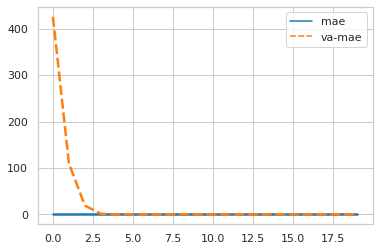

In [193]:
nn.printStats()

In [194]:
nn.predictResult(xtest,ytest)

ytest   predicted
0   405.0  404.560425
1   415.0  414.537170
2   425.0  424.513916
3   435.0  434.490662
4   445.0  444.467407
5   455.0  454.444122
6   465.0  464.420868
7   475.0  474.397614
8   485.0  484.374329
9   495.0  494.351074
10  505.0  504.327789
11  515.0  514.304565
12  525.0  524.281311
13  535.0  534.258118
14  545.0  544.234863
15  555.0  554.211548
16  565.0  564.188293
17  575.0  574.165039
18  585.0  584.141785
19  595.0  594.118530

In [253]:
 scl = StandardScaler()

In [255]:
 scl.fit(X)

StandardScaler()

In [257]:
scl.transform(X)

array([[-1.68927752, -1.68927752],
       [-1.6026479 , -1.6026479 ],
       [-1.51601829, -1.51601829],
       [-1.42938867, -1.42938867],
       [-1.34275905, -1.34275905],
       [-1.25612944, -1.25612944],
       [-1.16949982, -1.16949982],
       [-1.0828702 , -1.0828702 ],
       [-0.99624059, -0.99624059],
       [-0.90961097, -0.90961097],
       [-0.82298136, -0.82298136],
       [-0.73635174, -0.73635174],
       [-0.64972212, -0.64972212],
       [-0.56309251, -0.56309251],
       [-0.47646289, -0.47646289],
       [-0.38983327, -0.38983327],
       [-0.30320366, -0.30320366],
       [-0.21657404, -0.21657404],
       [-0.12994442, -0.12994442],
       [-0.04331481, -0.04331481],
       [ 0.04331481,  0.04331481],
       [ 0.12994442,  0.12994442],
       [ 0.21657404,  0.21657404],
       [ 0.30320366,  0.30320366],
       [ 0.38983327,  0.38983327],
       [ 0.47646289,  0.47646289],
       [ 0.56309251,  0.56309251],
       [ 0.64972212,  0.64972212],
       [ 0.73635174,

In [294]:
tf.keras.utils.plot_model(
    nn.model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [322]:
x_train

array([[ 1., -1., -1., -1.,  1.,  1., -1.],
       [ 1., -1., -1.,  1.,  1.,  1., -1.],
       [-1.,  1., -1.,  1.,  1.,  1.,  1.],
       [-1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1.,  1.,  1., -1., -1.],
       [-1.,  1., -1.,  1., -1.,  1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1., -1.],
       [-1., -1.,  1.,  1., -1., -1., -1.],
       [ 1., -1., -1., -1., -1.,  1.,  1.],
       [ 1.,  1., -1.,  1.,  1.,  1.,  1.],
       [ 1., -1.,  1.,  1., -1., -1.,  1.],
       [-1., -1., -1.,  1.,  1.,  1.,  1.],
       [ 1., -1., -1.,  1.,  1., -1.,  1.],
       [-1., -1.,  1., -1.,  1.,  1., -1.],
       [-1.,  1., -1.,  1.,  1., -1., -1.],
       [ 1., -1., -1., -1., -1., -1.,  1.],
       [ 1., -1.,  1.,  1.,  1.,  1.,  1.],
       [-1., -1.,  1.,  1.,  1.,  1., -1.],
       [-1.,  1.,  1.,  1.,  1.,  1., -1.],
       [ 1.,  1.,  1.,  1., -1., -1.,  1.],
       [-1., -1., -1.,  1., -1., -1.,  1.],
       [-1.,  1., -1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1., -1.,

In [323]:
x_test

array([[-1.,  1.,  1., -1.,  1.,  1.,  1.],
       [-1.,  1., -1.,  1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1.,  1.,  1.],
       [-1., -1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., -1., -1., -1.,  1., -1.],
       [-1.,  1.,  1.,  1., -1., -1., -1.],
       [ 1., -1., -1., -1.,  1., -1.,  1.],
       [ 1.,  1., -1.,  1., -1., -1., -1.],
       [ 1., -1.,  1., -1., -1., -1.,  1.],
       [-1., -1.,  1.,  1., -1.,  1., -1.],
       [ 1., -1.,  1.,  1.,  1.,  1., -1.],
       [-1., -1.,  1.,  1., -1.,  1.,  1.],
       [ 1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1.,  1., -1., -1.],
       [ 1.,  1., -1., -1., -1., -1., -1.],
       [ 1.,  1.,  1., -1., -1., -1.,  1.],
       [-1.,  1., -1., -1.,  1., -1., -1.],
       [ 1., -1.,  1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1., -1.,  1.],
       [ 1., -1.,  1., -1.,  1., -1., -1.],
       [-1., -1.,  1., -1., -1.,  1., -1.],
       [-1., -1., -1.,  1., -1.,  1., -1.],
       [ 1.,  1.,  1., -1.,  1.,